In [1]:
import matplotlib.pyplot as plt
from random import sample
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
from os import listdir
from os.path import isfile, join

In [3]:
root_dir = os.getcwd()

In [4]:
file_set = set()

for dir_, _, files in os.walk(root_dir):
    for file_name in files:
        rel_dir = os.path.relpath(dir_, root_dir)
        rel_file = os.path.join(rel_dir, file_name)
        file_set.add(rel_file)

In [5]:
filtered_file_set = [x for x in file_set if "RPD_output\\graph\\" in x]

In [6]:
len(filtered_file_set)

108

In [7]:
dataset_files = []
for file in filtered_file_set:
    network_data = pd.read_excel(file, sheet_name = ['Sheet1'], index_col=None)
    dataset_files.extend(network_data['Sheet1'].values.tolist())
df_export = pd.DataFrame(dataset_files)


In [8]:
df_export.rename(columns={1:'disc', 2:'vacancy_id', 3: 'oop_name', 4: 'speciality', 5: 'cos_simularity'}, inplace=True)
df_export.drop(columns=df_export.columns[0], axis=1, inplace=True)

In [9]:
df_export.to_excel('text.xlsx')

In [10]:
network_data = df_export

In [11]:
connections_data = network_data[network_data['cos_simularity'] >= 0.5]
edge_cols = ['oop_name', 'speciality', 'cos_simularity']

In [12]:
df_disc_unique = network_data[['disc', 'oop_name']].drop_duplicates()
df_disc_unique.rename(columns={"disc": "node_label", "oop_name": "attribute"}, inplace=True)

In [13]:
df_vac_unique = network_data[['vacancy_id', 'speciality']].drop_duplicates()
df_vac_unique.rename(columns={"vacancy_id": "node_label", "speciality": "attribute"}, inplace=True)

In [14]:
elements_data = df_disc_unique.append(df_vac_unique, ignore_index=True)
elements_data.to_excel('text1.xlsx')

C:\Users\seismopro\AppData\Local\Temp\ipykernel_11764\855689358.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  elements_data = df_disc_unique.append(df_vac_unique, ignore_index=True)


In [15]:
graph = nx.convert_matrix.from_pandas_edgelist(connections_data,
                                               source = 'disc',
                                               target = 'vacancy_id',
                                               edge_attr = edge_cols)

In [16]:
node_dict = elements_data.set_index('node_label').to_dict(orient = 'index')


In [17]:
node_dict['85915191']

{'attribute': 'Финансовый менеджер'}

In [18]:
nx.set_node_attributes(graph, node_dict)
%matplotlib inline

In [19]:
graph.add_nodes_from(elements_data['node_label'])

In [20]:
nx.number_of_isolates(graph)

3485

In [21]:
nx.write_graphml(graph, "RPD_output\graph1.graphml")

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not {'Исследовательский семинар': {'attribute': 'Бизнес-аналитика'}, 'МАТЕМАТИКА 2.3': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Архитектура предприятия': {'attribute': 'Бизнес-аналитика'}, 'Аудит': {'attribute': 'Бизнес-аналитика'}, 'Бизнес-анализ в IT-проектах': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Оценка бизнеса': {'attribute': 'Бизнес-аналитика'}, 'Менеджмент': {'attribute': 'Бизнес-аналитика'}, 'Линейная алгебра': {'attribute': 'Бизнес-аналитика'}, 'Операционный менеджмент': {'attribute': 'Бизнес-аналитика'}, 'Теория игр': {'attribute': 'Бизнес-аналитика'}, 'Региональная экономика': {'attribute': 'Бизнес-аналитика'}, 'Проектирование и разработка информационных систем': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'МАТЕМАТИКА 3.3': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Архитектура информационных систем': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Право': {'attribute': 'Бизнес-аналитика'}, 'Методы принятия оптимальных решений': {'attribute': 'Бизнес-аналитика'}, 'Физика 3.2': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Экономическая социология': {'attribute': 'Бизнес-аналитика'}, 'Критическое мышление и письмо': {'attribute': 'Бизнес-аналитика'}, 'Анализ заинтересованных сторон _* Stakeholder Analysis': {'attribute': 'Бизнес-аналитика'}, 'Стратегический менеджмент': {'attribute': 'Бизнес-аналитика'}, 'Учебно-исследовательская работа студентов': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Экономика и организация производства': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Электротехника 1.3': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Дополнительные главы анализа данных': {'attribute': 'Бизнес-аналитика'}, 'Риск-менеджмент и комплаенс': {'attribute': 'Бизнес-аналитика'}, 'Финансовая система и институты': {'attribute': 'Бизнес-аналитика'}, 'Моделирование цепей поставок': {'attribute': 'Бизнес-аналитика'}, 'Учебный проект': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Информационные системы моделирования бизнес-процессов': {'attribute': 'Бизнес-аналитика'}, 'Математический анализ': {'attribute': 'Бизнес-аналитика'}, 'МАТЕМАТИКА 4.1': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Пакеты прикладных программ бизнес-планирования и оценки инвестиционных проектов': {'attribute': 'Бизнес-аналитика'}, 'Теория вероятностей и случайные процессы': {'attribute': 'Бизнес-аналитика'}, 'Интеллектуальные системы и технологии': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Численное решение инженерных задач': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Пакеты прикладных программ оперативного анализа данных': {'attribute': 'Бизнес-аналитика'}, 'Введение в информационные технологии': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Физика 1.2': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Основы российской государственности': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Портфельные инвестиции': {'attribute': 'Бизнес-аналитика'}, 'Микроэкономика': {'attribute': 'Бизнес-аналитика'}, 'История России': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Корпоративная социальная ответственность и этика бизнеса': {'attribute': 'Бизнес-аналитика'}, 'Программирование': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Дискретная математика': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Деловые коммуникации': {'attribute': 'Бизнес-аналитика'}, 'Физика 2.2': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'История (история России, всеобщая история)': {'attribute': 'Бизнес-аналитика'}, 'Эконометрика': {'attribute': 'Бизнес-аналитика'}, 'Экономическая статистика': {'attribute': 'Бизнес-аналитика'}, 'Маркетинг': {'attribute': 'Бизнес-аналитика'}, 'Основы программирования Ha Python': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Физическая культура и спорт': {'attribute': 'Бизнес-аналитика'}, 'Корпоративные информационные системы': {'attribute': 'Бизнес-аналитика'}, 'Экономический анализ': {'attribute': 'Бизнес-аналитика'}, 'Иностранный язык': {'attribute': 'Бизнес-аналитика'}, 'МАТЕМАТИКА 1.3': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Поведенческая экономика и финансы': {'attribute': 'Бизнес-аналитика'}, 'Экономика отраслевых рынков': {'attribute': 'Бизнес-аналитика'}, 'Эргономика цифровой среды': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Микроэкономика 2': {'attribute': 'Бизнес-аналитика'}, 'Теория информационных процессов и систем': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Финансовый менеджмент': {'attribute': 'Бизнес-аналитика'}, 'Ценообразование': {'attribute': 'Бизнес-аналитика'}, 'Управление данными': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Иностранный язык (английский)': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Информатика 1.2': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Математическая статистика': {'attribute': 'Бизнес-аналитика'}, 'Инфокоммуникационные системы и сети': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Макроэкономика': {'attribute': 'Бизнес-аналитика'}, 'Имитационное моделирование': {'attribute': 'Бизнес-аналитика'}, 'Методы оптимизации': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Машинное обучение': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Инструментальные средства информационных систем': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Институциональная экономика': {'attribute': 'Бизнес-аналитика'}, 'Разработка Web-приложений': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Налоги и налогообложение': {'attribute': 'Бизнес-аналитика'}, 'Предпринимательство': {'attribute': 'Бизнес-аналитика'}, 'Безопасность жизнедеятельности': {'attribute': 'Бизнес-аналитика'}, 'Бизнес в глобальном контексте _* Business in Global Context': {'attribute': 'Бизнес-аналитика'}, 'Информационные технологии в цифровой среде': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Методы и средства управления бизнес-процессами': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Финансовые вычисления': {'attribute': 'Бизнес-аналитика'}, 'Практикум по картинам мира': {'attribute': 'Бизнес-аналитика'}, 'Тестирование информационных систем': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Инвестиции': {'attribute': 'Бизнес-аналитика'}, 'Международная экономика': {'attribute': 'Бизнес-аналитика'}, 'Теория экономических механизмов': {'attribute': 'Бизнес-аналитика'}, 'Основы права': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Введение в профессиональную деятельность': {'attribute': 'Бизнес-аналитика'}, 'Дополнительные главы эконометрики': {'attribute': 'Бизнес-аналитика'}, 'Анализ данных в управлении предприятием': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Начертательная геометрия и инженерная графика 1.4': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Технология командной разработки программного обеспечения': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Управление проектами': {'attribute': 'Бизнес-аналитика'}, 'Финансовый учет и отчетность': {'attribute': 'Бизнес-аналитика'}, 'Анализ данных в бизнес-аналитике': {'attribute': 'Бизнес-аналитика'}, 'Философия': {'attribute': 'Бизнес-аналитика'}, 'Методы и средства разработки информационных систем': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Введение в проектную деятельность': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Информационные технологии': {'attribute': 'Бизнес-аналитика'}, 'Корпоративные информационные системы и разработка бизнес-приложений': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Операционные системы': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, 'Базы данных': {'attribute': 'Бизнес-аналитика'}, 'Аналитика цепей поставок': {'attribute': 'Бизнес-аналитика'}, 'Элективные дисциплины по физической культуре и спорту': {'attribute': 'Бизнес-аналитика'}, 'Английский язык в сфере информационных технологий': {'attribute': 'Бизнес-анализ и разработка информационных систем'}, '86222832': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89385094': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88579460': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87281507': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87490304': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89192332': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89351866': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87396751': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87528480': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89993847': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87785569': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88628678': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87416208': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90105381': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89459345': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86853065': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89537319': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88811373': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87779011': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87722984': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88398355': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87295425': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89287293': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87319756': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90005024': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87679736': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86968943': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89180994': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86583932': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87371806': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86584488': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89693672': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88360917': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86317037': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88207251': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88472088': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89807026': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88598467': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89402975': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88546919': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89852931': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86302669': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86312378': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90107154': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87754911': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89815821': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86449587': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87688368': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89183447': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87643616': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89195847': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86314037': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86847111': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88653852': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88879358': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88093772': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88314035': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89463204': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86376497': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89116229': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87278303': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89388499': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88142591': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86786823': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86319963': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86226315': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86629162': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88085408': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89827673': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88601877': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87509520': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86627730': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89562808': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89060371': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89222402': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88888570': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88401266': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88704654': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89589697': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88997795': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89149920': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89239145': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86596950': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86259389': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86785929': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89399402': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88517890': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89462735': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89995806': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89846621': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89487323': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86352117': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89305864': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87855380': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87540009': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88290479': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88295219': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88767376': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88654826': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89186296': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88026757': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87591833': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89732834': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88593888': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86941102': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87748202': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86618417': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89006630': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86769744': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86342087': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89392045': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88116230': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89785652': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87990242': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86615329': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86316132': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87171312': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89221767': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88933009': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87201187': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89666667': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86188571': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86563504': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86706960': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87791814': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86917624': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88471191': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86581994': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88547315': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89993648': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88638347': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86619213': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86441712': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89449389': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86780985': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88455106': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88151746': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86533917': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87494608': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86649261': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89663909': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86270677': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86620763': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87781965': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86961839': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87203947': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87174729': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88728078': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87123847': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87606995': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90052571': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88538643': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89721590': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89554296': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88816143': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88296820': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86228880': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88576083': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88229973': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87617845': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89378191': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88843670': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88102900': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87647838': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87190562': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90107347': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87964168': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87687906': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88750869': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88222760': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88672071': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87433118': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87781647': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88806114': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87426441': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86466682': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88281378': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88115621': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88895379': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89304369': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88577413': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86787143': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88204979': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89314753': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89828551': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86729680': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88520638': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86397176': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88825992': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88277243': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86808040': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87975342': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89768885': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86225378': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90074102': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88098802': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88672127': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87407005': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88576382': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88586593': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88697771': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89843353': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87621182': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86797164': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88488722': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88800355': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88754131': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89324636': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88203571': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86346913': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86579363': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89880801': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87701343': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87621213': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89911416': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88154374': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88689728': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89596336': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86562025': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88134422': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86197244': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88113581': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87355986': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88603203': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88377224': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87738056': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88588899': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87845427': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89241573': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89441039': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89141833': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86864209': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86880896': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89772253': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88730014': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86666421': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89389990': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86955912': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88342978': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86707357': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88240684': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88509888': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86612447': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89803178': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89653345': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89761499': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88550962': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88545074': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86286882': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87344119': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89147172': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86791785': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88664988': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86336811': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87391638': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86755769': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88214740': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86982345': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86313673': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87434484': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87683543': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86688492': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86487285': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89769035': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89969710': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88269811': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86555881': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89493219': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89016394': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88940221': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87199950': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89382337': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90045655': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88076861': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87159215': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87507504': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86677715': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86507831': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88059920': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86205377': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88358293': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87327010': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88087844': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89299642': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87771363': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86864119': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89649431': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87164786': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89441297': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87836653': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89216086': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88224985': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87709108': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88699389': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88534523': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89155053': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89137258': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90046220': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88398721': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86854641': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86898027': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89884376': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88962425': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86714624': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86165540': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86912764': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89823384': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87651795': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86906212': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89321238': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88418535': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89268153': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88984848': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86187755': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87509726': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89467994': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89597983': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88251125': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86354002': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86611717': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86470151': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87041560': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86862889': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89970180': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88444465': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90093216': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87659408': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88758280': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89582741': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86538462': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88650949': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86935191': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89794184': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88643997': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89209631': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89607861': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89537369': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89539774': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87539777': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90082328': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86447781': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88058729': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86273829': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86517120': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89798668': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88340281': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87927302': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86192597': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89338392': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87434804': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86877910': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89040576': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86932545': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86713883': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87534687': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86772047': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87615244': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86543412': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88322470': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87686719': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87209443': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87493267': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87968493': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87618067': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87876928': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89376344': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87689959': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86287079': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90011438': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90088580': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89634070': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89599229': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86856434': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89247586': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87615172': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88553247': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88388133': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90095801': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88594385': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88941823': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88005311': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87945172': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89238090': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88545932': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89883824': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86379141': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89723488': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88031575': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89149489': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89544330': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86217098': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87493039': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87700952': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88997526': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87917930': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86732437': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88928305': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88046335': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89850189': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86445176': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89060949': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87830542': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90115698': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89007293': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87141011': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89846810': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87769866': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86592898': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86302616': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88565841': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87489535': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89866233': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87777425': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88247414': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87964792': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87832622': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88338707': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90058330': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86868774': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89475862': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89260750': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88503279': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88651433': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89751860': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88493375': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88206476': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89734295': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89297215': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89338115': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88360617': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88468025': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87959941': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89906217': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88488484': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87454574': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88280307': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88544029': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89790933': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86405953': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88961141': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86549644': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89788344': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89624344': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89454937': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88868999': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89749657': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88654508': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88648064': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86991921': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87417935': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89267963': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88707450': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86432638': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88251811': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86569689': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87478050': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89657339': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88834920': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88297275': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88010192': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88029618': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89308505': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90112403': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88397037': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89809816': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86189406': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86929383': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87144282': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89448492': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86871781': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86647350': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89247588': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86261580': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90054519': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87676102': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88300959': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89453510': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87839397': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87496944': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86840161': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86586631': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88440609': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86591197': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88294489': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87591157': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90011761': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87493813': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88775940': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89199127': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88207271': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89792848': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86418802': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89351748': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89461033': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88150881': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89009693': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89787435': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86996936': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88993285': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86687973': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87605539': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89673235': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86217389': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88221775': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88566544': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87357560': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86184263': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89010196': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89900334': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86440799': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87194626': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88673347': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87511631': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89399394': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86177636': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89993647': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87279702': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87242212': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89395829': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88469307': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87708047': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88242103': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88482179': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89569790': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89324722': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87953230': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86686955': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88127911': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88213248': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88547641': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86257422': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87615934': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86443135': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86167985': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87152730': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89428587': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89048903': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89492828': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88448287': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86327983': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89135161': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86969968': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87879929': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88275579': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86462325': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89659576': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87591875': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87253175': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87340714': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88336874': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86379019': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86435121': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87784995': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87331278': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86702337': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89290618': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87947202': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89662544': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89299392': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87322715': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87617250': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86335738': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89476854': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89029323': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89849865': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87756893': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89765904': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89364508': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87802933': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88051492': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89748876': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90019513': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88619241': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89381898': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87430102': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86845056': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87609911': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88058730': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90004084': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89682575': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88302718': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86178230': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88037360': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88170076': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87135046': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87418967': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87587180': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87456015': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88449846': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89486930': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90039689': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89225344': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87481366': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88735260': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87462367': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87451020': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89148034': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89558400': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87306666': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89198043': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89371690': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86183081': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89564239': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87720059': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89611782': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88167230': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89621642': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88400166': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89003350': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89681453': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86282334': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89572562': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89911048': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88888375': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89697864': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87226673': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86593612': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89594506': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86351573': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87173630': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89609060': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86436952': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87834063': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87396271': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87224388': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89314699': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87189515': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86882917': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87875130': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87743425': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89750040': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89005380': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88118350': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88438082': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88547234': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89880030': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86727503': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86182232': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87178472': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89086159': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86604066': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86226862': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88472441': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90084302': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89669034': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86291446': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89436307': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88098642': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87160925': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88685483': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89118028': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88886799': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89572561': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89213677': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88351275': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86466337': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87999066': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89509991': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88944861': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88835875': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88462415': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90112497': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88169181': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87323380': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89761498': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86418801': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89489764': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89561256': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86360130': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86393802': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88587658': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86773613': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86586002': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88082008': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88348762': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89368796': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87252488': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88140134': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88377452': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89841233': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88765751': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87985088': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86418496': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90041319': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88303043': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89057724': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87395413': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87280546': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89200951': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89356928': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89865328': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86532670': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87607546': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88509465': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86714632': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88275575': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87918714': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89825611': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88289500': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86783630': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89426458': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86526053': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88225963': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87590668': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87367210': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88811690': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88092033': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88754562': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88923491': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89462065': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88899038': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86268838': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86383669': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88979385': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89262403': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87125844': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86788982': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88658817': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88171823': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86685679': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86898631': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86847215': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87829865': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89839776': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86874805': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88647563': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87784474': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88871040': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88604242': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87747905': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89796426': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89851046': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86495285': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88756758': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86189298': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86566321': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86379991': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87536083': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86621111': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89367004': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87669501': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88204960': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88652417': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87790370': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88280108': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86186378': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88733168': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89680106': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88475196': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87684122': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87302230': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87616663': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88471475': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86273368': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89685897': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87148531': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88686987': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87596852': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87325122': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88582163': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87170602': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88083420': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86405625': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87336688': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86534566': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86536781': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87437353': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88949753': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89706921': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87900473': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90087893': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86280593': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88532184': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89674515': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88294975': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86880463': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88005208': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89612437': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88641533': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87683456': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88462825': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88566780': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87406806': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87175845': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86547101': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88679148': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88055321': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89271520': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89805422': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87471469': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88454044': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86625834': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88512255': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88099176': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89890831': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87851639': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89696663': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87939126': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88886609': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88591848': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87391743': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86491222': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86354001': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89802929': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87387079': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87360472': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89299089': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86584491': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88929090': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86642046': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89065177': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88642155': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86978859': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86851531': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89005379': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87325222': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89749535': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88135938': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88211456': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86462208': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89003911': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89232486': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90045268': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89737768': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86224366': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88733319': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87705561': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88991773': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88767008': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87535455': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87961406': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89896082': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89495204': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89245415': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87968766': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89902609': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88873350': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87829237': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90013308': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86645271': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88444514': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88833567': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88628437': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89130718': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89831278': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86763939': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87160695': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86261613': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86995063': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87332718': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86242396': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86684454': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87594829': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89202237': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88992570': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86661115': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89536077': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86899048': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86435501': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87358833': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89132040': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86872825': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89486594': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86182197': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89990024': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86483964': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87734498': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86597720': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89485773': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86732195': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87148532': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87759324': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87579751': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87151725': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86821413': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86860265': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90050056': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88820119': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89398094': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87347250': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89413035': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89615653': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89850831': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87627435': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88753556': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88581616': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89258107': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87789985': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87480750': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86380464': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89532616': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89461670': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88551859': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87928877': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88532559': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87622901': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87169489': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89603701': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87707718': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87365218': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88381878': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88008735': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89973038': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87426415': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87996989': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86439308': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89827789': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87234732': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88408428': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88231776': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90019442': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88584185': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89177334': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89782267': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88177241': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86281889': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88508954': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89211878': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88573443': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86176360': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89323612': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88593081': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86220558': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88962602': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87416862': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87974118': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89403766': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86289194': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87471594': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89442250': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88883186': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89091348': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90079435': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89540103': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89474920': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86778312': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86260962': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89714665': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87717595': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87791793': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86334619': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86853653': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88321707': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88874856': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88986685': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90047053': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89410944': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87879925': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86678395': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89870604': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89057442': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89044005': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89677984': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89064354': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90075978': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88032838': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89686972': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87745600': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89011772': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86712383': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88804381': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89660503': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88230815': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88898231': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88630903': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88989596': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88032176': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87667325': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89700393': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88678163': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89463848': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87648227': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86882094': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89461989': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86257152': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88899475': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88513438': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89801220': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89253869': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86415247': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86272973': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89462562': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88960888': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89748962': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90028666': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87938151': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89262740': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89351169': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87505887': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89375654': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88507244': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '86455673': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88846008': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89040009': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87818968': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '90015803': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88954667': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '89886982': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '87789234': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88114403': {'attribute': 'BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики'}, '88266618': {'attribute': 'Аналитик'}, '88450200': {'attribute': 'Аналитик'}, '89399599': {'attribute': 'Аналитик'}, '86507353': {'attribute': 'Аналитик'}, '87148333': {'attribute': 'Аналитик'}, '89445872': {'attribute': 'Аналитик'}, '88056763': {'attribute': 'Аналитик'}, '87998893': {'attribute': 'Аналитик'}, '87609880': {'attribute': 'Аналитик'}, '87611913': {'attribute': 'Аналитик'}, '86664659': {'attribute': 'Аналитик'}, '89400785': {'attribute': 'Аналитик'}, '89458222': {'attribute': 'Аналитик'}, '88295028': {'attribute': 'Аналитик'}, '88704264': {'attribute': 'Аналитик'}, '88003404': {'attribute': 'Аналитик'}, '88467610': {'attribute': 'Аналитик'}, '86861399': {'attribute': 'Аналитик'}, '87912031': {'attribute': 'Аналитик'}, '88890269': {'attribute': 'Аналитик'}, '87217134': {'attribute': 'Аналитик'}, '88543479': {'attribute': 'Аналитик'}, '86563202': {'attribute': 'Аналитик'}, '89370464': {'attribute': 'Аналитик'}, '87908429': {'attribute': 'Аналитик'}, '88814408': {'attribute': 'Аналитик'}, '89966514': {'attribute': 'Аналитик'}, '88351133': {'attribute': 'Аналитик'}, '88602539': {'attribute': 'Аналитик'}, '88224990': {'attribute': 'Аналитик'}, '86628834': {'attribute': 'Аналитик'}, '87133777': {'attribute': 'Аналитик'}, '88825749': {'attribute': 'Аналитик'}, '88291181': {'attribute': 'Аналитик'}, '87992367': {'attribute': 'Аналитик'}, '90017968': {'attribute': 'Аналитик'}, '86795254': {'attribute': 'Аналитик'}, '90088220': {'attribute': 'Аналитик'}, '88656980': {'attribute': 'Аналитик'}, '88955429': {'attribute': 'Аналитик'}, '89958573': {'attribute': 'Аналитик'}, '89568952': {'attribute': 'Аналитик'}, '90083295': {'attribute': 'Аналитик'}, '86252556': {'attribute': 'Аналитик'}, '86882780': {'attribute': 'Аналитик'}, '89733968': {'attribute': 'Аналитик'}, '89819319': {'attribute': 'Аналитик'}, '86217989': {'attribute': 'Аналитик'}, '89215758': {'attribute': 'Аналитик'}, '87523370': {'attribute': 'Аналитик'}, '86173722': {'attribute': 'Аналитик'}, '89160064': {'attribute': 'Аналитик'}, '87619260': {'attribute': 'Аналитик'}, '86841386': {'attribute': 'Аналитик'}, '87397064': {'attribute': 'Аналитик'}, '86791601': {'attribute': 'Аналитик'}, '86892909': {'attribute': 'Аналитик'}, '87597175': {'attribute': 'Аналитик'}, '88270502': {'attribute': 'Аналитик'}, '88890127': {'attribute': 'Аналитик'}, '87531229': {'attribute': 'Аналитик'}, '88378050': {'attribute': 'Аналитик'}, '88047017': {'attribute': 'Аналитик'}, '88839294': {'attribute': 'Аналитик'}, '87880540': {'attribute': 'Аналитик'}, '86530749': {'attribute': 'Аналитик'}, '88234164': {'attribute': 'Аналитик'}, '87165148': {'attribute': 'Аналитик'}, '86273151': {'attribute': 'Аналитик'}, '86860377': {'attribute': 'Аналитик'}, '87774680': {'attribute': 'Аналитик'}, '88510043': {'attribute': 'Аналитик'}, '86772739': {'attribute': 'Аналитик'}, '88584949': {'attribute': 'Аналитик'}, '87712336': {'attribute': 'Аналитик'}, '86800182': {'attribute': 'Аналитик'}, '86264438': {'attribute': 'Аналитик'}, '87372902': {'attribute': 'Аналитик'}, '86339470': {'attribute': 'Аналитик'}, '88647978': {'attribute': 'Аналитик'}, '89194375': {'attribute': 'Аналитик'}, '88894599': {'attribute': 'Аналитик'}, '88537883': {'attribute': 'Аналитик'}, '89514229': {'attribute': 'Аналитик'}, '88759662': {'attribute': 'Аналитик'}, '88523654': {'attribute': 'Аналитик'}, '89698155': {'attribute': 'Аналитик'}, '86442134': {'attribute': 'Аналитик'}, '86182804': {'attribute': 'Аналитик'}, '88201495': {'attribute': 'Аналитик'}, '88580405': {'attribute': 'Аналитик'}, '86840878': {'attribute': 'Аналитик'}, '88398649': {'attribute': 'Аналитик'}, '89967264': {'attribute': 'Аналитик'}, '86172372': {'attribute': 'Аналитик'}, '86321389': {'attribute': 'Аналитик'}, '87915635': {'attribute': 'Аналитик'}, '87822393': {'attribute': 'Аналитик'}, '88816606': {'attribute': 'Аналитик'}, '86539547': {'attribute': 'Аналитик'}, '88440462': {'attribute': 'Аналитик'}, '88822705': {'attribute': 'Аналитик'}, '87714492': {'attribute': 'Аналитик'}, '88572889': {'attribute': 'Аналитик'}, '86994375': {'attribute': 'Аналитик'}, '89048577': {'attribute': 'Аналитик'}, '88521180': {'attribute': 'Аналитик'}, '87207773': {'attribute': 'Аналитик'}, '88511177': {'attribute': 'Аналитик'}, '88159812': {'attribute': 'Аналитик'}, '87332538': {'attribute': 'Аналитик'}, '86710427': {'attribute': 'Аналитик'}, '86571495': {'attribute': 'Аналитик'}, '87353233': {'attribute': 'Аналитик'}, '89592189': {'attribute': 'Аналитик'}, '89450322': {'attribute': 'Аналитик'}, '87624940': {'attribute': 'Аналитик'}, '88206017': {'attribute': 'Аналитик'}, '88330396': {'attribute': 'Аналитик'}, '86455683': {'attribute': 'Аналитик'}, '88468783': {'attribute': 'Аналитик'}, '88515444': {'attribute': 'Аналитик'}, '87737178': {'attribute': 'Аналитик'}, '88161148': {'attribute': 'Аналитик'}, '89258911': {'attribute': 'Аналитик'}, '88057915': {'attribute': 'Аналитик'}, '86616666': {'attribute': 'Аналитик'}, '89995411': {'attribute': 'Аналитик'}, '87301757': {'attribute': 'Аналитик'}, '87842408': {'attribute': 'Аналитик'}, '87474062': {'attribute': 'Аналитик'}, '89443942': {'attribute': 'Аналитик'}, '89391770': {'attribute': 'Аналитик'}, '87193013': {'attribute': 'Аналитик'}, '88887444': {'attribute': 'Аналитик'}, '87302734': {'attribute': 'Аналитик'}, '86792846': {'attribute': 'Аналитик'}, '86450954': {'attribute': 'Аналитик'}, '87268031': {'attribute': 'Аналитик'}, '87371414': {'attribute': 'Аналитик'}, '87659075': {'attribute': 'Аналитик'}, '88703066': {'attribute': 'Аналитик'}, '86157698': {'attribute': 'Аналитик'}, '87526160': {'attribute': 'Аналитик'}, '89692146': {'attribute': 'Аналитик'}, '89035302': {'attribute': 'Аналитик'}, '88763904': {'attribute': 'Аналитик'}, '87940952': {'attribute': 'Аналитик'}, '87208471': {'attribute': 'Аналитик'}, '89566926': {'attribute': 'Аналитик'}, '89255559': {'attribute': 'Аналитик'}, '87481344': {'attribute': 'Аналитик'}, '88633816': {'attribute': 'Аналитик'}, '87505086': {'attribute': 'Аналитик'}, '87591691': {'attribute': 'Аналитик'}, '86729553': {'attribute': 'Аналитик'}, '87141503': {'attribute': 'Аналитик'}, '90048476': {'attribute': 'Аналитик'}, '88797494': {'attribute': 'Аналитик'}, '89756429': {'attribute': 'Аналитик'}, '86581680': {'attribute': 'Аналитик'}, '86623266': {'attribute': 'Аналитик'}, '87046731': {'attribute': 'Аналитик'}, '87221254': {'attribute': 'Аналитик'}, '88171175': {'attribute': 'Аналитик'}, '89738945': {'attribute': 'Аналитик'}, '88305870': {'attribute': 'Аналитик'}, '89246244': {'attribute': 'Аналитик'}, '86579592': {'attribute': 'Аналитик'}, '86282310': {'attribute': 'Аналитик'}, '88029177': {'attribute': 'Аналитик'}, '87596874': {'attribute': 'Аналитик'}, '88022225': {'attribute': 'Аналитик'}, '88908088': {'attribute': 'Аналитик'}, '88837741': {'attribute': 'Аналитик'}, '86413507': {'attribute': 'Аналитик'}, '87371652': {'attribute': 'Аналитик'}, '89000252': {'attribute': 'Аналитик'}, '87439779': {'attribute': 'Аналитик'}, '90042667': {'attribute': 'Аналитик'}, '89437561': {'attribute': 'Аналитик'}, '88030263': {'attribute': 'Аналитик'}, '87208799': {'attribute': 'Аналитик'}, '88674398': {'attribute': 'Аналитик'}, '88523685': {'attribute': 'Аналитик'}, '86593696': {'attribute': 'Аналитик'}, '86760715': {'attribute': 'Аналитик'}, '88884364': {'attribute': 'Аналитик'}, '87627016': {'attribute': 'Аналитик'}, '88919066': {'attribute': 'Аналитик'}, '86697445': {'attribute': 'Аналитик'}, '86616699': {'attribute': 'Аналитик'}, '89685582': {'attribute': 'Аналитик'}, '88787613': {'attribute': 'Аналитик'}, '86901856': {'attribute': 'Аналитик'}, '89487538': {'attribute': 'Аналитик'}, '87781060': {'attribute': 'Аналитик'}, '87652384': {'attribute': 'Аналитик'}, '88645304': {'attribute': 'Аналитик'}, '87333051': {'attribute': 'Аналитик'}, '87335682': {'attribute': 'Аналитик'}, '88993284': {'attribute': 'Аналитик'}, '86867337': {'attribute': 'Аналитик'}, '88820527': {'attribute': 'Аналитик'}, '86216669': {'attribute': 'Аналитик'}, '86527236': {'attribute': 'Аналитик'}, '87409649': {'attribute': 'Аналитик'}, '86884307': {'attribute': 'Аналитик'}, '89393667': {'attribute': 'Аналитик'}, '89048933': {'attribute': 'Аналитик'}, '87973031': {'attribute': 'Аналитик'}, '89782433': {'attribute': 'Аналитик'}, '86766116': {'attribute': 'Аналитик'}, '87447507': {'attribute': 'Аналитик'}, '89498170': {'attribute': 'Аналитик'}, '86551927': {'attribute': 'Аналитик'}, '88379010': {'attribute': 'Аналитик'}, '89076796': {'attribute': 'Аналитик'}, '86884304': {'attribute': 'Аналитик'}, '87916039': {'attribute': 'Аналитик'}, '87555906': {'attribute': 'Аналитик'}, '88446710': {'attribute': 'Аналитик'}, '89211424': {'attribute': 'Аналитик'}, '89400303': {'attribute': 'Аналитик'}, '88442085': {'attribute': 'Аналитик'}, '89091029': {'attribute': 'Аналитик'}, '88418746': {'attribute': 'Аналитик'}, '88664468': {'attribute': 'Аналитик'}, '89838050': {'attribute': 'Аналитик'}, '89583726': {'attribute': 'Аналитик'}, '86178138': {'attribute': 'Аналитик'}, '89675809': {'attribute': 'Аналитик'}, '87591946': {'attribute': 'Аналитик'}, '87528347': {'attribute': 'Аналитик'}, '86418678': {'attribute': 'Аналитик'}, '87455092': {'attribute': 'Аналитик'}, '86353566': {'attribute': 'Аналитик'}, '87432497': {'attribute': 'Аналитик'}, '86184427': {'attribute': 'Аналитик'}, '88971639': {'attribute': 'Аналитик'}, '86766622': {'attribute': 'Аналитик'}, '88731047': {'attribute': 'Аналитик'}, '86783859': {'attribute': 'Аналитик'}, '87207063': {'attribute': 'Аналитик'}, '89530004': {'attribute': 'Аналитик'}, '87196038': {'attribute': 'Аналитик'}, '86541360': {'attribute': 'Аналитик'}, '88222244': {'attribute': 'Аналитик'}, '86788219': {'attribute': 'Аналитик'}, '89802478': {'attribute': 'Аналитик'}, '87280547': {'attribute': 'Аналитик'}, '89819945': {'attribute': 'Аналитик'}, '86854124': {'attribute': 'Аналитик'}, '88629094': {'attribute': 'Аналитик'}, '87450478': {'attribute': 'Аналитик'}, '89048607': {'attribute': 'Аналитик'}, '86374868': {'attribute': 'Аналитик'}, '88020839': {'attribute': 'Аналитик'}, '86545613': {'attribute': 'Аналитик'}, '88826211': {'attribute': 'Аналитик'}, '86445474': {'attribute': 'Аналитик'}, '86785668': {'attribute': 'Аналитик'}, '89849867': {'attribute': 'Аналитик'}, '88023314': {'attribute': 'Аналитик'}, '88132536': {'attribute': 'Аналитик'}, '88883541': {'attribute': 'Аналитик'}, '88579915': {'attribute': 'Аналитик'}, '89832590': {'attribute': 'Аналитик'}, '88704338': {'attribute': 'Аналитик'}, '89288590': {'attribute': 'Аналитик'}, '89258298': {'attribute': 'Аналитик'}, '87015321': {'attribute': 'Аналитик'}, '87967074': {'attribute': 'Аналитик'}, '88292283': {'attribute': 'Аналитик'}, '88754506': {'attribute': 'Аналитик'}, '88414066': {'attribute': 'Аналитик'}, '86417101': {'attribute': 'Аналитик'}, '89837518': {'attribute': 'Аналитик'}, '86772147': {'attribute': 'Аналитик'}, '88468284': {'attribute': 'Аналитик'}, '89389606': {'attribute': 'Аналитик'}, '89539279': {'attribute': 'Аналитик'}, '87186081': {'attribute': 'Аналитик'}, '89056434': {'attribute': 'Аналитик'}, '88439873': {'attribute': 'Аналитик'}, '89583011': {'attribute': 'Аналитик'}, '87225288': {'attribute': 'Аналитик'}, '86807738': {'attribute': 'Аналитик'}, '88445864': {'attribute': 'Аналитик'}, '86539449': {'attribute': 'Аналитик'}, '87741585': {'attribute': 'Аналитик'}, '88478836': {'attribute': 'Аналитик'}, '88007080': {'attribute': 'Аналитик'}, '88111916': {'attribute': 'Аналитик'}, '88563062': {'attribute': 'Аналитик'}, '87275265': {'attribute': 'Аналитик'}, '88643875': {'attribute': 'Аналитик'}, '86350603': {'attribute': 'Аналитик'}, '89358954': {'attribute': 'Аналитик'}, '86278886': {'attribute': 'Аналитик'}, '86226308': {'attribute': 'Аналитик'}, '88366660': {'attribute': 'Аналитик'}, '86617349': {'attribute': 'Аналитик'}, '86788169': {'attribute': 'Аналитик'}, '87163817': {'attribute': 'Аналитик'}, '89447290': {'attribute': 'Аналитик'}, '88999717': {'attribute': 'Аналитик'}, '86959772': {'attribute': 'Аналитик'}, '86847286': {'attribute': 'Аналитик'}, '86688113': {'attribute': 'Аналитик'}, '86735175': {'attribute': 'Аналитик'}, '87938390': {'attribute': 'Аналитик'}, '88402988': {'attribute': 'Аналитик'}, '88835895': {'attribute': 'Аналитик'}, '87983618': {'attribute': 'Аналитик'}, '88740643': {'attribute': 'Аналитик'}, '86867367': {'attribute': 'Аналитик'}, '86395490': {'attribute': 'Аналитик'}, '89658718': {'attribute': 'Аналитик'}, '90001606': {'attribute': 'Аналитик'}, '86852752': {'attribute': 'Аналитик'}, '88818070': {'attribute': 'Аналитик'}, '88965740': {'attribute': 'Аналитик'}, '88290182': {'attribute': 'Аналитик'}, '86222652': {'attribute': 'Аналитик'}, '89694502': {'attribute': 'Аналитик'}, '89148386': {'attribute': 'Аналитик'}, '88229864': {'attribute': 'Аналитик'}, '88734616': {'attribute': 'Аналитик'}, '88706057': {'attribute': 'Аналитик'}, '86616714': {'attribute': 'Аналитик'}, '89587537': {'attribute': 'Аналитик'}, '87185750': {'attribute': 'Аналитик'}, '88297744': {'attribute': 'Аналитик'}, '86340587': {'attribute': 'Аналитик'}, '88993049': {'attribute': 'Аналитик'}, '88116868': {'attribute': 'Аналитик'}, '86560993': {'attribute': 'Аналитик'}, '88118871': {'attribute': 'Аналитик'}, '86881776': {'attribute': 'Аналитик'}, '86442555': {'attribute': 'Аналитик'}, '88582485': {'attribute': 'Аналитик'}, '88473598': {'attribute': 'Аналитик'}, '88811491': {'attribute': 'Аналитик'}, '88688984': {'attribute': 'Аналитик'}, '87620363': {'attribute': 'Аналитик'}, '87964713': {'attribute': 'Аналитик'}, '88837404': {'attribute': 'Аналитик'}, '86644649': {'attribute': 'Аналитик'}, '90084480': {'attribute': 'Аналитик'}, '88656070': {'attribute': 'Аналитик'}, '88383915': {'attribute': 'Аналитик'}, '87652192': {'attribute': 'Аналитик'}, '87928447': {'attribute': 'Аналитик'}, '87519381': {'attribute': 'Аналитик'}, '88517431': {'attribute': 'Аналитик'}, '86902130': {'attribute': 'Аналитик'}, '88676004': {'attribute': 'Аналитик'}, '88843115': {'attribute': 'Аналитик'}, '89151638': {'attribute': 'Аналитик'}, '89664528': {'attribute': 'Аналитик'}, '89781182': {'attribute': 'Аналитик'}, '89150466': {'attribute': 'Аналитик'}, '86584671': {'attribute': 'Аналитик'}, '87520101': {'attribute': 'Аналитик'}, '87344803': {'attribute': 'Аналитик'}, '88907182': {'attribute': 'Аналитик'}, '87388583': {'attribute': 'Аналитик'}, '88990933': {'attribute': 'Аналитик'}, '89365962': {'attribute': 'Аналитик'}, '89503527': {'attribute': 'Аналитик'}, '88282280': {'attribute': 'Аналитик'}, '87187593': {'attribute': 'Аналитик'}, '88213883': {'attribute': 'Аналитик'}, '89778672': {'attribute': 'Аналитик'}, '87396098': {'attribute': 'Аналитик'}, '88675907': {'attribute': 'Аналитик'}, '88165541': {'attribute': 'Аналитик'}, '90050317': {'attribute': 'Аналитик'}, '89552182': {'attribute': 'Аналитик'}, '89265497': {'attribute': 'Аналитик'}, '86620049': {'attribute': 'Аналитик'}, '87844949': {'attribute': 'Аналитик'}, '87653826': {'attribute': 'Аналитик'}, '86744492': {'attribute': 'Аналитик'}, '88706175': {'attribute': 'Аналитик'}, '89200721': {'attribute': 'Аналитик'}, '88169241': {'attribute': 'Аналитик'}, '86907214': {'attribute': 'Аналитик'}, '86416621': {'attribute': 'Аналитик'}, '87741583': {'attribute': 'Аналитик'}, '89443916': {'attribute': 'Аналитик'}, '89219558': {'attribute': 'Аналитик'}, '89394645': {'attribute': 'Аналитик'}, '89009434': {'attribute': 'Аналитик'}, '86282760': {'attribute': 'Аналитик'}, '86607096': {'attribute': 'Аналитик'}, '86352258': {'attribute': 'Аналитик'}, '89555790': {'attribute': 'Аналитик'}, '89448849': {'attribute': 'Аналитик'}, '89783530': {'attribute': 'Аналитик'}, '89353959': {'attribute': 'Аналитик'}, '89240749': {'attribute': 'Аналитик'}, '87396099': {'attribute': 'Аналитик'}, '89514363': {'attribute': 'Аналитик'}, '86734881': {'attribute': 'Аналитик'}, '89729969': {'attribute': 'Аналитик'}, '88285958': {'attribute': 'Аналитик'}, '86882777': {'attribute': 'Аналитик'}, '89882428': {'attribute': 'Аналитик'}, '89895797': {'attribute': 'Аналитик'}, '87432199': {'attribute': 'Аналитик'}, '86758669': {'attribute': 'Аналитик'}, '89252066': {'attribute': 'Аналитик'}, '88159282': {'attribute': 'Аналитик'}, '90038996': {'attribute': 'Аналитик'}, '86495371': {'attribute': 'Аналитик'}, '88764226': {'attribute': 'Аналитик'}, '86709287': {'attribute': 'Аналитик'}, '88425170': {'attribute': 'Аналитик'}, '86728117': {'attribute': 'Аналитик'}, '88464115': {'attribute': 'Аналитик'}, '89305923': {'attribute': 'Аналитик'}, '87371412': {'attribute': 'Аналитик'}, '88540073': {'attribute': 'Аналитик'}, '88018465': {'attribute': 'Аналитик'}, '88365468': {'attribute': 'Аналитик'}, '89405450': {'attribute': 'Аналитик'}, '87782775': {'attribute': 'Аналитик'}, '88877500': {'attribute': 'Аналитик'}, '86431269': {'attribute': 'Аналитик'}, '89064158': {'attribute': 'Аналитик'}, '89504674': {'attribute': 'Аналитик'}, '89203119': {'attribute': 'Аналитик'}, '88806336': {'attribute': 'Аналитик'}, '87674603': {'attribute': 'Аналитик'}, '86309043': {'attribute': 'Аналитик'}, '86679213': {'attribute': 'Аналитик'}, '86772816': {'attribute': 'Аналитик'}, '88140997': {'attribute': 'Аналитик'}, '86555595': {'attribute': 'Аналитик'}, '87527972': {'attribute': 'Аналитик'}, '88669253': {'attribute': 'Аналитик'}, '88389250': {'attribute': 'Аналитик'}, '89043969': {'attribute': 'Аналитик'}, '86178241': {'attribute': 'Аналитик'}, '87834262': {'attribute': 'Аналитик'}, '87215273': {'attribute': 'Аналитик'}, '88925016': {'attribute': 'Аналитик'}, '87703319': {'attribute': 'Аналитик'}, '86850673': {'attribute': 'Аналитик'}, '89203910': {'attribute': 'Аналитик'}, '89443606': {'attribute': 'Аналитик'}, '86793056': {'attribute': 'Аналитик'}, '88516870': {'attribute': 'Аналитик'}, '88875094': {'attribute': 'Аналитик'}, '87971493': {'attribute': 'Аналитик'}, '87580508': {'attribute': 'Аналитик'}, '89880852': {'attribute': 'Аналитик'}, '89845860': {'attribute': 'Аналитик'}, '88305234': {'attribute': 'Аналитик'}, '88667665': {'attribute': 'Аналитик'}, '88645002': {'attribute': 'Аналитик'}, '88560843': {'attribute': 'Аналитик'}, '87904684': {'attribute': 'Аналитик'}, '87531127': {'attribute': 'Аналитик'}, '88345515': {'attribute': 'Аналитик'}, '89742156': {'attribute': 'Аналитик'}, '88534336': {'attribute': 'Аналитик'}, '89423991': {'attribute': 'Аналитик'}, '88117072': {'attribute': 'Аналитик'}, '88574383': {'attribute': 'Аналитик'}, '90096343': {'attribute': 'Аналитик'}, '86213954': {'attribute': 'Аналитик'}, '86365718': {'attribute': 'Аналитик'}, '88699579': {'attribute': 'Аналитик'}, '88919304': {'attribute': 'Аналитик'}, '86711968': {'attribute': 'Аналитик'}, '89969524': {'attribute': 'Аналитик'}, '86252535': {'attribute': 'Аналитик'}, '88810175': {'attribute': 'Аналитик'}, '89789510': {'attribute': 'Аналитик'}, '88578269': {'attribute': 'Аналитик'}, '87613381': {'attribute': 'Аналитик'}, '89693193': {'attribute': 'Аналитик'}, '87212765': {'attribute': 'Аналитик'}, '87189775': {'attribute': 'Аналитик'}, '86839945': {'attribute': 'Аналитик'}, '89586562': {'attribute': 'Аналитик'}, '88976669': {'attribute': 'Аналитик'}, '86865099': {'attribute': 'Аналитик'}, '87520685': {'attribute': 'Аналитик'}, '87334395': {'attribute': 'Аналитик'}, '87876973': {'attribute': 'Аналитик'}, '88108756': {'attribute': 'Аналитик'}, '89520468': {'attribute': 'Аналитик'}, '89596710': {'attribute': 'Аналитик'}, '89728655': {'attribute': 'Аналитик'}, '87909890': {'attribute': 'Аналитик'}, '88372041': {'attribute': 'Аналитик'}, '86305460': {'attribute': 'Аналитик'}, '87163292': {'attribute': 'Аналитик'}, '87762417': {'attribute': 'Аналитик'}, '86326111': {'attribute': 'Аналитик'}, '89455317': {'attribute': 'Аналитик'}, '87256592': {'attribute': 'Аналитик'}, '89440001': {'attribute': 'Аналитик'}, '89062234': {'attribute': 'Аналитик'}, '89780620': {'attribute': 'Аналитик'}, '88672798': {'attribute': 'Аналитик'}, '89969669': {'attribute': 'Аналитик'}, '89749413': {'attribute': 'Аналитик'}, '89698036': {'attribute': 'Аналитик'}, '89142446': {'attribute': 'Аналитик'}, '88560830': {'attribute': 'Аналитик'}, '86559948': {'attribute': 'Аналитик'}, '86414848': {'attribute': 'Аналитик'}, '88467622': {'attribute': 'Аналитик'}, '88461883': {'attribute': 'Аналитик'}, '88215363': {'attribute': 'Аналитик'}, '87503808': {'attribute': 'Аналитик'}, '86352365': {'attribute': 'Аналитик'}, '87607678': {'attribute': 'Аналитик'}, '87909066': {'attribute': 'Аналитик'}, '88824541': {'attribute': 'Аналитик'}, '86232811': {'attribute': 'Аналитик'}, '87925796': {'attribute': 'Аналитик'}, '87455974': {'attribute': 'Аналитик'}, '88768071': {'attribute': 'Аналитик'}, '88053573': {'attribute': 'Аналитик'}, '90061659': {'attribute': 'Аналитик'}, '89802347': {'attribute': 'Аналитик'}, '87723465': {'attribute': 'Аналитик'}, '87966790': {'attribute': 'Аналитик'}, '87218765': {'attribute': 'Аналитик'}, '88170921': {'attribute': 'Аналитик'}, '87972728': {'attribute': 'Аналитик'}, '88687913': {'attribute': 'Аналитик'}, '87773738': {'attribute': 'Аналитик'}, '90089076': {'attribute': 'Аналитик'}, '88548129': {'attribute': 'Аналитик'}, '88687857': {'attribute': 'Аналитик'}, '88285086': {'attribute': 'Аналитик'}, '87710336': {'attribute': 'Аналитик'}, '89994419': {'attribute': 'Аналитик'}, '89831018': {'attribute': 'Аналитик'}, '86639712': {'attribute': 'Аналитик'}, '88417064': {'attribute': 'Аналитик'}, '86272902': {'attribute': 'Аналитик'}, '88118213': {'attribute': 'Аналитик'}, '87388581': {'attribute': 'Аналитик'}, '87140310': {'attribute': 'Аналитик'}, '86907910': {'attribute': 'Аналитик'}, '87368483': {'attribute': 'Аналитик'}, '90077921': {'attribute': 'Аналитик'}, '87591993': {'attribute': 'Аналитик'}, '86220629': {'attribute': 'Аналитик'}, '88465040': {'attribute': 'Аналитик'}, '89210012': {'attribute': 'Аналитик'}, '88700349': {'attribute': 'Аналитик'}, '89461247': {'attribute': 'Аналитик'}, '86841147': {'attribute': 'Аналитик'}, '88522218': {'attribute': 'Аналитик'}, '87741954': {'attribute': 'Аналитик'}, '87163565': {'attribute': 'Аналитик'}, '88179092': {'attribute': 'Аналитик'}, '87904416': {'attribute': 'Аналитик'}, '88150045': {'attribute': 'Аналитик'}, '88644907': {'attribute': 'Аналитик'}, '89309257': {'attribute': 'Аналитик'}, '89742377': {'attribute': 'Аналитик'}, '87309855': {'attribute': 'Аналитик'}, '87779362': {'attribute': 'Аналитик'}, '86441353': {'attribute': 'Аналитик'}, '87344639': {'attribute': 'Аналитик'}, '88635808': {'attribute': 'Аналитик'}, '88386181': {'attribute': 'Аналитик'}, '87372216': {'attribute': 'Аналитик'}, '86611228': {'attribute': 'Аналитик'}, '90005649': {'attribute': 'Аналитик'}, '86526506': {'attribute': 'Аналитик'}, '88564437': {'attribute': 'Аналитик'}, '88695787': {'attribute': 'Аналитик'}, '89020893': {'attribute': 'Аналитик'}, '88824265': {'attribute': 'Аналитик'}, '86790688': {'attribute': 'Аналитик'}, '88761734': {'attribute': 'Аналитик'}, '86207984': {'attribute': 'Аналитик'}, '88619631': {'attribute': 'Аналитик'}, '86193227': {'attribute': 'Аналитик'}, '86857312': {'attribute': 'Аналитик'}, '89593516': {'attribute': 'Аналитик'}, '88518171': {'attribute': 'Аналитик'}, '86441075': {'attribute': 'Аналитик'}, '88784204': {'attribute': 'Аналитик'}, '86837308': {'attribute': 'Аналитик'}, '87157260': {'attribute': 'Аналитик'}, '89991119': {'attribute': 'Аналитик'}, '87371418': {'attribute': 'Аналитик'}, '87523374': {'attribute': 'Аналитик'}, '88364709': {'attribute': 'Аналитик'}, '87431512': {'attribute': 'Аналитик'}, '87542260': {'attribute': 'Аналитик'}, '88338450': {'attribute': 'Аналитик'}, '87983293': {'attribute': 'Аналитик'}, '89357178': {'attribute': 'Аналитик'}, '88406353': {'attribute': 'Аналитик'}, '86352490': {'attribute': 'Аналитик'}, '88922327': {'attribute': 'Аналитик'}, '89687032': {'attribute': 'Аналитик'}, '88501120': {'attribute': 'Аналитик'}, '88765829': {'attribute': 'Аналитик'}, '88206066': {'attribute': 'Аналитик'}, '86445416': {'attribute': 'Аналитик'}, '89721524': {'attribute': 'Аналитик'}, '89052757': {'attribute': 'Аналитик'}, '86271965': {'attribute': 'Аналитик'}, '88395238': {'attribute': 'Аналитик'}, '89232749': {'attribute': 'Аналитик'}, '86327663': {'attribute': 'Аналитик'}, '86943984': {'attribute': 'Аналитик'}, '89648258': {'attribute': 'Аналитик'}, '86284792': {'attribute': 'Аналитик'}, '88570699': {'attribute': 'Аналитик'}, '86848008': {'attribute': 'Аналитик'}, '88757187': {'attribute': 'Аналитик'}, '86466711': {'attribute': 'Аналитик'}, '87006316': {'attribute': 'Аналитик'}, '88880630': {'attribute': 'Аналитик'}, '87611352': {'attribute': 'Аналитик'}, '86200136': {'attribute': 'Аналитик'}, '88996248': {'attribute': 'Аналитик'}, '88376834': {'attribute': 'Аналитик'}, '87618412': {'attribute': 'Аналитик'}, '88764854': {'attribute': 'Аналитик'}, '87154033': {'attribute': 'Аналитик'}, '86257014': {'attribute': 'Аналитик'}, '90034974': {'attribute': 'Аналитик'}, '87934924': {'attribute': 'Аналитик'}, '87532214': {'attribute': 'Аналитик'}, '89593290': {'attribute': 'Аналитик'}, '88442615': {'attribute': 'Аналитик'}, '89142269': {'attribute': 'Аналитик'}, '89060093': {'attribute': 'Аналитик'}, '89432692': {'attribute': 'Аналитик'}, '88111884': {'attribute': 'Аналитик'}, '87969742': {'attribute': 'Аналитик'}, '87911327': {'attribute': 'Аналитик'}, '88108340': {'attribute': 'Аналитик'}, '88143517': {'attribute': 'Аналитик'}, '87150560': {'attribute': 'Аналитик'}, '88511397': {'attribute': 'Аналитик'}, '89891620': {'attribute': 'Аналитик'}, '89253496': {'attribute': 'Аналитик'}, '87676093': {'attribute': 'Аналитик'}, '87550899': {'attribute': 'Аналитик'}, '87930843': {'attribute': 'Аналитик'}, '89179467': {'attribute': 'Аналитик'}, '89051103': {'attribute': 'Аналитик'}, '86904301': {'attribute': 'Аналитик'}, '88740698': {'attribute': 'Аналитик'}, '87865800': {'attribute': 'Аналитик'}, '86880382': {'attribute': 'Аналитик'}, '87681277': {'attribute': 'Аналитик'}, '88572469': {'attribute': 'Аналитик'}, '88630741': {'attribute': 'Аналитик'}, '89970814': {'attribute': 'Аналитик'}, '87250621': {'attribute': 'Аналитик'}, '89147112': {'attribute': 'Аналитик'}, '89434965': {'attribute': 'Аналитик'}, '88267762': {'attribute': 'Аналитик'}, '86624706': {'attribute': 'Аналитик'}, '86531538': {'attribute': 'Аналитик'}, '88274885': {'attribute': 'Аналитик'}, '86414566': {'attribute': 'Аналитик'}, '87548848': {'attribute': 'Аналитик'}, '88765822': {'attribute': 'Аналитик'}, '87147739': {'attribute': 'Аналитик'}, '86721134': {'attribute': 'Аналитик'}, '88839100': {'attribute': 'Аналитик'}, '88548235': {'attribute': 'Аналитик'}, '87194935': {'attribute': 'Аналитик'}, '87678527': {'attribute': 'Аналитик'}, '86867276': {'attribute': 'Аналитик'}, '86596061': {'attribute': 'Аналитик'}, '89215756': {'attribute': 'Аналитик'}, '86452282': {'attribute': 'Аналитик'}, '86440449': {'attribute': 'Аналитик'}, '88645965': {'attribute': 'Аналитик'}, '88018821': {'attribute': 'Аналитик'}, '86980253': {'attribute': 'Аналитик'}, '88462970': {'attribute': 'Аналитик'}, '88988053': {'attribute': 'Аналитик'}, '88049762': {'attribute': 'Аналитик'}, '88402390': {'attribute': 'Аналитик'}, '90048571': {'attribute': 'Аналитик'}, '87996267': {'attribute': 'Аналитик'}, '87013173': {'attribute': 'Аналитик'}, '86237090': {'attribute': 'Аналитик'}, '88997424': {'attribute': 'Аналитик'}, '88687949': {'attribute': 'Аналитик'}, '88394438': {'attribute': 'Аналитик'}, '86141867': {'attribute': 'Аналитик'}, '89525155': {'attribute': 'Аналитик'}, '88998022': {'attribute': 'Аналитик'}, '87419759': {'attribute': 'Аналитик'}, '87585212': {'attribute': 'Аналитик'}, '88685102': {'attribute': 'Аналитик'}, '88530272': {'attribute': 'Аналитик'}, '86180775': {'attribute': 'Аналитик'}, '86609996': {'attribute': 'Аналитик'}, '89417425': {'attribute': 'Аналитик'}, '86601212': {'attribute': 'Аналитик'}, '86880912': {'attribute': 'Аналитик'}, '86218970': {'attribute': 'Аналитик'}, '90003724': {'attribute': 'Аналитик'}, '88202751': {'attribute': 'Аналитик'}, '90092803': {'attribute': 'Аналитик'}, '87207113': {'attribute': 'Аналитик'}, '88033542': {'attribute': 'Аналитик'}, '86882432': {'attribute': 'Аналитик'}, '89358104': {'attribute': 'Аналитик'}, '89964547': {'attribute': 'Аналитик'}, '86346613': {'attribute': 'Аналитик'}, '88756595': {'attribute': 'Аналитик'}, '86884542': {'attribute': 'Аналитик'}, '87488206': {'attribute': 'Аналитик'}, '86182195': {'attribute': 'Аналитик'}, '88265188': {'attribute': 'Аналитик'}, '86615415': {'attribute': 'Аналитик'}, '89321860': {'attribute': 'Аналитик'}, '87932957': {'attribute': 'Аналитик'}, '88900142': {'attribute': 'Аналитик'}, '88233715': {'attribute': 'Аналитик'}, '87533849': {'attribute': 'Аналитик'}, '88379071': {'attribute': 'Аналитик'}, '86743181': {'attribute': 'Аналитик'}, '86800661': {'attribute': 'Аналитик'}, '89595987': {'attribute': 'Аналитик'}, '88805222': {'attribute': 'Аналитик'}, '87968629': {'attribute': 'Аналитик'}, '86626559': {'attribute': 'Аналитик'}, '89457903': {'attribute': 'Аналитик'}, '88252998': {'attribute': 'Аналитик'}, '89015776': {'attribute': 'Аналитик'}, '88251720': {'attribute': 'Аналитик'}, '87232766': {'attribute': 'Аналитик'}, '89670361': {'attribute': 'Аналитик'}, '87276938': {'attribute': 'Аналитик'}, '87935695': {'attribute': 'Аналитик'}, '87522035': {'attribute': 'Аналитик'}, '87278664': {'attribute': 'Аналитик'}, '89043059': {'attribute': 'Аналитик'}, '89163619': {'attribute': 'Аналитик'}, '89390410': {'attribute': 'Аналитик'}, '86966990': {'attribute': 'Аналитик'}, '86620304': {'attribute': 'Аналитик'}, '87941660': {'attribute': 'Аналитик'}, '88242073': {'attribute': 'Аналитик'}, '89517349': {'attribute': 'Аналитик'}, '89588534': {'attribute': 'Аналитик'}, '87858533': {'attribute': 'Аналитик'}, '86626983': {'attribute': 'Аналитик'}, '86626993': {'attribute': 'Аналитик'}, '89789326': {'attribute': 'Аналитик'}, '89467164': {'attribute': 'Аналитик'}, '87672210': {'attribute': 'Аналитик'}, '88410535': {'attribute': 'Аналитик'}, '86716046': {'attribute': 'Аналитик'}, '88164218': {'attribute': 'Аналитик'}, '87012680': {'attribute': 'Аналитик'}, '89510538': {'attribute': 'Аналитик'}, '90045643': {'attribute': 'Аналитик'}, '88473693': {'attribute': 'Аналитик'}, '88000465': {'attribute': 'Аналитик'}, '88512314': {'attribute': 'Аналитик'}, '89222303': {'attribute': 'Аналитик'}, '88250544': {'attribute': 'Аналитик'}, '87923742': {'attribute': 'Аналитик'}, '89842713': {'attribute': 'Аналитик'}, '88338706': {'attribute': 'Аналитик'}, '89303543': {'attribute': 'Аналитик'}, '88303211': {'attribute': 'Аналитик'}, '86605923': {'attribute': 'Аналитик'}, '88021162': {'attribute': 'Аналитик'}, '86280802': {'attribute': 'Аналитик'}, '87769527': {'attribute': 'Аналитик'}, '89132522': {'attribute': 'Аналитик'}, '87921224': {'attribute': 'Аналитик'}, '89580039': {'attribute': 'Аналитик'}, '89726400': {'attribute': 'Аналитик'}, '86575598': {'attribute': 'Аналитик'}, '88819377': {'attribute': 'Аналитик'}, '88468991': {'attribute': 'Аналитик'}, '87114477': {'attribute': 'Аналитик'}, '86915459': {'attribute': 'Аналитик'}, '88196740': {'attribute': 'Аналитик'}, '89647369': {'attribute': 'Аналитик'}, '88630537': {'attribute': 'Аналитик'}, '87371973': {'attribute': 'Аналитик'}, '89734663': {'attribute': 'Аналитик'}, '88540076': {'attribute': 'Аналитик'}, '87330877': {'attribute': 'Аналитик'}, '89321901': {'attribute': 'Аналитик'}, '89321215': {'attribute': 'Аналитик'}, '89151708': {'attribute': 'Аналитик'}, '87929222': {'attribute': 'Аналитик'}, '87649394': {'attribute': 'Аналитик'}, '88105957': {'attribute': 'Аналитик'}, '88758054': {'attribute': 'Аналитик'}, '87903251': {'attribute': 'Аналитик'}, '86225937': {'attribute': 'Аналитик'}, '89191865': {'attribute': 'Аналитик'}, '87919366': {'attribute': 'Аналитик'}, '86851739': {'attribute': 'Аналитик'}, '88676710': {'attribute': 'Аналитик'}, '87449167': {'attribute': 'Аналитик'}, '88141257': {'attribute': 'Аналитик'}, '88995170': {'attribute': 'Аналитик'}, '87441437': {'attribute': 'Аналитик'}, '89506759': {'attribute': 'Аналитик'}, '89414759': {'attribute': 'Аналитик'}, '88642174': {'attribute': 'Аналитик'}, '89417831': {'attribute': 'Аналитик'}, '89320993': {'attribute': 'Аналитик'}, '90077106': {'attribute': 'Аналитик'}, '86566188': {'attribute': 'Аналитик'}, '87128515': {'attribute': 'Аналитик'}, '86484565': {'attribute': 'Аналитик'}, '88568111': {'attribute': 'Аналитик'}, '86928897': {'attribute': 'Аналитик'}, '87722028': {'attribute': 'Аналитик'}, '88694918': {'attribute': 'Аналитик'}, '89783914': {'attribute': 'Аналитик'}, '88285241': {'attribute': 'Аналитик'}, '88960733': {'attribute': 'Аналитик'}, '86322169': {'attribute': 'Аналитик'}, '88757598': {'attribute': 'Аналитик'}, '89481459': {'attribute': 'Аналитик'}, '88828605': {'attribute': 'Аналитик'}, '86721744': {'attribute': 'Аналитик'}, '86896311': {'attribute': 'Аналитик'}, '88586130': {'attribute': 'Аналитик'}, '87155959': {'attribute': 'Аналитик'}, '89835296': {'attribute': 'Аналитик'}, '86709711': {'attribute': 'Аналитик'}, '88242653': {'attribute': 'Аналитик'}, '89789631': {'attribute': 'Аналитик'}, '87747339': {'attribute': 'Аналитик'}, '86456991': {'attribute': 'Аналитик'}, '86938708': {'attribute': 'Аналитик'}, '89426074': {'attribute': 'Аналитик'}, '87190100': {'attribute': 'Аналитик'}, '87899764': {'attribute': 'Аналитик'}, '89427782': {'attribute': 'Аналитик'}, '86704875': {'attribute': 'Аналитик'}, '88240056': {'attribute': 'Аналитик'}, '88396523': {'attribute': 'Аналитик'}, '88268974': {'attribute': 'Аналитик'}, '87914519': {'attribute': 'Аналитик'}, '89712518': {'attribute': 'Аналитик'}, '87625448': {'attribute': 'Аналитик'}, '86193386': {'attribute': 'Аналитик'}, '88679231': {'attribute': 'Аналитик'}, '89496465': {'attribute': 'Аналитик'}, '89950418': {'attribute': 'Аналитик'}, '89668587': {'attribute': 'Аналитик'}, '89710557': {'attribute': 'Аналитик'}, '89026850': {'attribute': 'Аналитик'}, '89454556': {'attribute': 'Аналитик'}, '87466216': {'attribute': 'Аналитик'}, '86980967': {'attribute': 'Аналитик'}, '86628293': {'attribute': 'Аналитик'}, '87231279': {'attribute': 'Аналитик'}, '87734567': {'attribute': 'Аналитик'}, '89016492': {'attribute': 'Аналитик'}, '88000449': {'attribute': 'Аналитик'}, '86527138': {'attribute': 'Аналитик'}, '87524651': {'attribute': 'Аналитик'}, '88470817': {'attribute': 'Аналитик'}, '86473158': {'attribute': 'Аналитик'}, '88805218': {'attribute': 'Аналитик'}, '90052733': {'attribute': 'Аналитик'}, '89691820': {'attribute': 'Аналитик'}, '89232016': {'attribute': 'Аналитик'}, '86563145': {'attribute': 'Аналитик'}, '89448060': {'attribute': 'Аналитик'}, '89260225': {'attribute': 'Аналитик'}, '86842519': {'attribute': 'Аналитик'}, '86959939': {'attribute': 'Аналитик'}, '86557038': {'attribute': 'Аналитик'}, '89675979': {'attribute': 'Аналитик'}, '86354221': {'attribute': 'Аналитик'}, '87364657': {'attribute': 'Аналитик'}, '89688228': {'attribute': 'Аналитик'}, '88481273': {'attribute': 'Аналитик'}, '88085094': {'attribute': 'Аналитик'}, '89447419': {'attribute': 'Аналитик'}, '88936608': {'attribute': 'Аналитик'}, '87915619': {'attribute': 'Аналитик'}, '89801283': {'attribute': 'Аналитик'}, '88569759': {'attribute': 'Аналитик'}, '88928718': {'attribute': 'Аналитик'}, '87732394': {'attribute': 'Аналитик'}, '89401442': {'attribute': 'Аналитик'}, '89749378': {'attribute': 'Аналитик'}, '88572827': {'attribute': 'Аналитик'}, '88516683': {'attribute': 'Аналитик'}, '86467835': {'attribute': 'Аналитик'}, '88628360': {'attribute': 'Аналитик'}, '86471009': {'attribute': 'Аналитик'}, '89990814': {'attribute': 'Аналитик'}, '90023759': {'attribute': 'Аналитик'}, '87691181': {'attribute': 'Аналитик'}, '88057886': {'attribute': 'Аналитик'}, '86515370': {'attribute': 'Аналитик'}, '86248037': {'attribute': 'Аналитик'}, '89315344': {'attribute': 'Аналитик'}, '88898183': {'attribute': 'Аналитик'}, '87451599': {'attribute': 'Аналитик'}, '89688380': {'attribute': 'Аналитик'}, '87346474': {'attribute': 'Аналитик'}, '89249232': {'attribute': 'Аналитик'}, '86942995': {'attribute': 'Аналитик'}, '87939596': {'attribute': 'Аналитик'}, '87204348': {'attribute': 'Аналитик'}, '86559674': {'attribute': 'Аналитик'}, '88431067': {'attribute': 'Аналитик'}, '89997169': {'attribute': 'Аналитик'}, '88469040': {'attribute': 'Аналитик'}, '89548240': {'attribute': 'Аналитик'}, '88387340': {'attribute': 'Аналитик'}, '87675779': {'attribute': 'Аналитик'}, '89273346': {'attribute': 'Аналитик'}, '87847455': {'attribute': 'Аналитик'}, '86451882': {'attribute': 'Аналитик'}, '88921047': {'attribute': 'Аналитик'}, '88515428': {'attribute': 'Аналитик'}, '88635460': {'attribute': 'Аналитик'}, '89338465': {'attribute': 'Аналитик'}, '86442567': {'attribute': 'Аналитик'}, '86882778': {'attribute': 'Аналитик'}, '87838573': {'attribute': 'Аналитик'}, '89511113': {'attribute': 'Аналитик'}, '89901189': {'attribute': 'Аналитик'}, '89293264': {'attribute': 'Аналитик'}, '87906078': {'attribute': 'Аналитик'}, '88439779': {'attribute': 'Аналитик'}, '86862560': {'attribute': 'Аналитик'}, '89485106': {'attribute': 'Аналитик'}, '88981328': {'attribute': 'Аналитик'}, '89248181': {'attribute': 'Аналитик'}, '87278020': {'attribute': 'Аналитик'}, '89797141': {'attribute': 'Аналитик'}, '88918446': {'attribute': 'Аналитик'}, '86731625': {'attribute': 'Аналитик'}, '86591726': {'attribute': 'Аналитик'}, '86349963': {'attribute': 'Аналитик'}, '87156494': {'attribute': 'Аналитик'}, '89895350': {'attribute': 'Аналитик'}, '89037638': {'attribute': 'Аналитик'}, '88110204': {'attribute': 'Аналитик'}, '89843594': {'attribute': 'Аналитик'}, '87729963': {'attribute': 'Аналитик'}, '88141781': {'attribute': 'Аналитик'}, '88105841': {'attribute': 'Аналитик'}, '86523348': {'attribute': 'Аналитик'}, '87705193': {'attribute': 'Аналитик'}, '87197283': {'attribute': 'Аналитик'}, '87015405': {'attribute': 'Аналитик'}, '88466632': {'attribute': 'Аналитик'}, '88525563': {'attribute': 'Аналитик'}, '89944560': {'attribute': 'Аналитик'}, '86284743': {'attribute': 'Аналитик'}, '87326937': {'attribute': 'Аналитик'}, '88515802': {'attribute': 'Аналитик'}, '88836675': {'attribute': 'Аналитик'}, '88917478': {'attribute': 'Аналитик'}, '88437114': {'attribute': 'Аналитик'}, '87884804': {'attribute': 'Аналитик'}, '88642551': {'attribute': 'Аналитик'}, '87224682': {'attribute': 'Аналитик'}, '89813470': {'attribute': 'Аналитик'}, '87332547': {'attribute': 'Аналитик'}, '89303386': {'attribute': 'Аналитик'}, '86559370': {'attribute': 'Аналитик'}, '86541343': {'attribute': 'Аналитик'}, '86336504': {'attribute': 'Аналитик'}, '89089563': {'attribute': 'Аналитик'}, '88487038': {'attribute': 'Аналитик'}, '89145986': {'attribute': 'Аналитик'}, '86569172': {'attribute': 'Аналитик'}, '88344547': {'attribute': 'Аналитик'}, '89547929': {'attribute': 'Аналитик'}, '88158724': {'attribute': 'Аналитик'}, '89409791': {'attribute': 'Аналитик'}, '87776635': {'attribute': 'Аналитик'}, '86599969': {'attribute': 'Аналитик'}, '89153372': {'attribute': 'Аналитик'}, '89452779': {'attribute': 'Аналитик'}, 88625738: {'attribute': 'Бизнес-аналитик'}, 89849839: {'attribute': 'Бизнес-аналитик'}, 88162219: {'attribute': 'Бизнес-аналитик'}, 89714104: {'attribute': 'Бизнес-аналитик'}, 86784566: {'attribute': 'Бизнес-аналитик'}, 87444975: {'attribute': 'Бизнес-аналитик'}, 86554220: {'attribute': 'Бизнес-аналитик'}, 86880861: {'attribute': 'Бизнес-аналитик'}, 87626553: {'attribute': 'Бизнес-аналитик'}, 89003256: {'attribute': 'Бизнес-аналитик'}, 86841423: {'attribute': 'Бизнес-аналитик'}, 88688421: {'attribute': 'Бизнес-аналитик'}, 88831780: {'attribute': 'Бизнес-аналитик'}, 86466896: {'attribute': 'Бизнес-аналитик'}, 88550087: {'attribute': 'Бизнес-аналитик'}, 88502556: {'attribute': 'Бизнес-аналитик'}, 86217585: {'attribute': 'Бизнес-аналитик'}, 89557477: {'attribute': 'Бизнес-аналитик'}, 88171762: {'attribute': 'Бизнес-аналитик'}, 86624672: {'attribute': 'Бизнес-аналитик'}, 89555749: {'attribute': 'Бизнес-аналитик'}, 86771482: {'attribute': 'Бизнес-аналитик'}, 88817900: {'attribute': 'Бизнес-аналитик'}, 89131142: {'attribute': 'Бизнес-аналитик'}, 87827071: {'attribute': 'Бизнес-аналитик'}, 87797700: {'attribute': 'Бизнес-аналитик'}, 86674531: {'attribute': 'Бизнес-аналитик'}, 88343251: {'attribute': 'Бизнес-аналитик'}, 87305710: {'attribute': 'Бизнес-аналитик'}, 87349525: {'attribute': 'Бизнес-аналитик'}, 86370960: {'attribute': 'Бизнес-аналитик'}, 87958570: {'attribute': 'Бизнес-аналитик'}, 89220001: {'attribute': 'Бизнес-аналитик'}, 87321306: {'attribute': 'Бизнес-аналитик'}, 89675917: {'attribute': 'Бизнес-аналитик'}, 88998682: {'attribute': 'Бизнес-аналитик'}, 86178106: {'attribute': 'Бизнес-аналитик'}, 86877906: {'attribute': 'Бизнес-аналитик'}, 87268676: {'attribute': 'Бизнес-аналитик'}, 89218164: {'attribute': 'Бизнес-аналитик'}, 86319756: {'attribute': 'Бизнес-аналитик'}, 87299936: {'attribute': 'Бизнес-аналитик'}, 87938000: {'attribute': 'Бизнес-аналитик'}, 88604124: {'attribute': 'Бизнес-аналитик'}, 87815117: {'attribute': 'Бизнес-аналитик'}, 88851055: {'attribute': 'Бизнес-аналитик'}, 89873919: {'attribute': 'Бизнес-аналитик'}, 88528844: {'attribute': 'Бизнес-аналитик'}, 87493767: {'attribute': 'Бизнес-аналитик'}, 88576539: {'attribute': 'Бизнес-аналитик'}, 89247280: {'attribute': 'Бизнес-аналитик'}, 86705718: {'attribute': 'Бизнес-аналитик'}, 88765845: {'attribute': 'Бизнес-аналитик'}, 86988843: {'attribute': 'Бизнес-аналитик'}, 88140120: {'attribute': 'Бизнес-аналитик'}, 86370544: {'attribute': 'Бизнес-аналитик'}, 88837456: {'attribute': 'Бизнес-аналитик'}, 87220706: {'attribute': 'Бизнес-аналитик'}, 89829311: {'attribute': 'Бизнес-аналитик'}, 89048591: {'attribute': 'Бизнес-аналитик'}, 87940600: {'attribute': 'Бизнес-аналитик'}, 87459593: {'attribute': 'Бизнес-аналитик'}, 88245228: {'attribute': 'Бизнес-аналитик'}, 88244281: {'attribute': 'Бизнес-аналитик'}, 87586014: {'attribute': 'Бизнес-аналитик'}, 86316305: {'attribute': 'Бизнес-аналитик'}, 88571609: {'attribute': 'Бизнес-аналитик'}, 88620790: {'attribute': 'Бизнес-аналитик'}, 87258864: {'attribute': 'Бизнес-аналитик'}, 88864418: {'attribute': 'Бизнес-аналитик'}, 89955766: {'attribute': 'Бизнес-аналитик'}, 87974234: {'attribute': 'Бизнес-аналитик'}, 88116092: {'attribute': 'Бизнес-аналитик'}, 87625989: {'attribute': 'Бизнес-аналитик'}, 86282570: {'attribute': 'Бизнес-аналитик'}, 88418176: {'attribute': 'Бизнес-аналитик'}, 88856521: {'attribute': 'Бизнес-аналитик'}, 87136427: {'attribute': 'Бизнес-аналитик'}, 86184086: {'attribute': 'Бизнес-аналитик'}, 89147391: {'attribute': 'Бизнес-аналитик'}, 86668811: {'attribute': 'Бизнес-аналитик'}, 88327585: {'attribute': 'Бизнес-аналитик'}, 86883315: {'attribute': 'Бизнес-аналитик'}, 86495935: {'attribute': 'Бизнес-аналитик'}, 89804849: {'attribute': 'Бизнес-аналитик'}, 86741320: {'attribute': 'Бизнес-аналитик'}, 86714771: {'attribute': 'Бизнес-аналитик'}, 88140348: {'attribute': 'Бизнес-аналитик'}, 86826249: {'attribute': 'Бизнес-аналитик'}, 88542129: {'attribute': 'Бизнес-аналитик'}, 90090473: {'attribute': 'Бизнес-аналитик'}, 88270906: {'attribute': 'Бизнес-аналитик'}, 87855060: {'attribute': 'Бизнес-аналитик'}, 86935774: {'attribute': 'Бизнес-аналитик'}, 89294301: {'attribute': 'Бизнес-аналитик'}, 89016363: {'attribute': 'Бизнес-аналитик'}, 89836288: {'attribute': 'Бизнес-аналитик'}, 86406282: {'attribute': 'Бизнес-аналитик'}, 87144819: {'attribute': 'Бизнес-аналитик'}, 87528353: {'attribute': 'Бизнес-аналитик'}, 88451685: {'attribute': 'Бизнес-аналитик'}, 89512164: {'attribute': 'Бизнес-аналитик'}, 89052384: {'attribute': 'Бизнес-аналитик'}, 86596823: {'attribute': 'Бизнес-аналитик'}, 88649069: {'attribute': 'Бизнес-аналитик'}, 87577592: {'attribute': 'Бизнес-аналитик'}, 89050874: {'attribute': 'Бизнес-аналитик'}, 89392593: {'attribute': 'Бизнес-аналитик'}, 86327167: {'attribute': 'Бизнес-аналитик'}, 87796678: {'attribute': 'Бизнес-аналитик'}, 88998865: {'attribute': 'Бизнес-аналитик'}, 86832895: {'attribute': 'Бизнес-аналитик'}, 88379402: {'attribute': 'Бизнес-аналитик'}, 87704429: {'attribute': 'Бизнес-аналитик'}, 88061243: {'attribute': 'Бизнес-аналитик'}, 88299202: {'attribute': 'Бизнес-аналитик'}, 86369057: {'attribute': 'Бизнес-аналитик'}, 86727042: {'attribute': 'Бизнес-аналитик'}, 88677017: {'attribute': 'Бизнес-аналитик'}, 88233452: {'attribute': 'Бизнес-аналитик'}, 87166102: {'attribute': 'Бизнес-аналитик'}, 89318498: {'attribute': 'Бизнес-аналитик'}, 86578455: {'attribute': 'Бизнес-аналитик'}, 90070252: {'attribute': 'Бизнес-аналитик'}, 86414467: {'attribute': 'Бизнес-аналитик'}, 86275801: {'attribute': 'Бизнес-аналитик'}, 86441166: {'attribute': 'Бизнес-аналитик'}, 89233844: {'attribute': 'Бизнес-аналитик'}, 88724125: {'attribute': 'Бизнес-аналитик'}, 88354391: {'attribute': 'Бизнес-аналитик'}, 89972609: {'attribute': 'Бизнес-аналитик'}, 87740123: {'attribute': 'Бизнес-аналитик'}, 90003213: {'attribute': 'Бизнес-аналитик'}, 89420241: {'attribute': 'Бизнес-аналитик'}, 86631682: {'attribute': 'Бизнес-аналитик'}, 89330821: {'attribute': 'Бизнес-аналитик'}, 86667521: {'attribute': 'Бизнес-аналитик'}, 86415113: {'attribute': 'Бизнес-аналитик'}, 87939561: {'attribute': 'Бизнес-аналитик'}, 88226443: {'attribute': 'Бизнес-аналитик'}, 87678049: {'attribute': 'Бизнес-аналитик'}, 89001970: {'attribute': 'Бизнес-аналитик'}, 89382628: {'attribute': 'Бизнес-аналитик'}, 88765261: {'attribute': 'Бизнес-аналитик'}, 89274588: {'attribute': 'Бизнес-аналитик'}, 87134124: {'attribute': 'Бизнес-аналитик'}, 86193822: {'attribute': 'Бизнес-аналитик'}, 86144732: {'attribute': 'Бизнес-аналитик'}, 87908969: {'attribute': 'Бизнес-аналитик'}, 88382228: {'attribute': 'Бизнес-аналитик'}, 87464325: {'attribute': 'Бизнес-аналитик'}, 88361872: {'attribute': 'Бизнес-аналитик'}, 87333844: {'attribute': 'Бизнес-аналитик'}, 86556570: {'attribute': 'Бизнес-аналитик'}, 87591955: {'attribute': 'Бизнес-аналитик'}, 87029874: {'attribute': 'Бизнес-аналитик'}, 87415392: {'attribute': 'Бизнес-аналитик'}, 89980854: {'attribute': 'Бизнес-аналитик'}, 86783178: {'attribute': 'Бизнес-аналитик'}, 86600784: {'attribute': 'Бизнес-аналитик'}, 89549762: {'attribute': 'Бизнес-аналитик'}, 87674779: {'attribute': 'Бизнес-аналитик'}, 87804365: {'attribute': 'Бизнес-аналитик'}, 88018018: {'attribute': 'Бизнес-аналитик'}, 88230854: {'attribute': 'Бизнес-аналитик'}, 87843692: {'attribute': 'Бизнес-аналитик'}, 89394777: {'attribute': 'Бизнес-аналитик'}, 90090156: {'attribute': 'Бизнес-аналитик'}, 89876573: {'attribute': 'Бизнес-аналитик'}, 89517588: {'attribute': 'Бизнес-аналитик'}, 90086516: {'attribute': 'Бизнес-аналитик'}, 86893155: {'attribute': 'Бизнес-аналитик'}, 86460903: {'attribute': 'Бизнес-аналитик'}, 87474490: {'attribute': 'Бизнес-аналитик'}, 89545658: {'attribute': 'Бизнес-аналитик'}, 86513557: {'attribute': 'Бизнес-аналитик'}, 88048049: {'attribute': 'Бизнес-аналитик'}, 88225927: {'attribute': 'Бизнес-аналитик'}, 89542643: {'attribute': 'Бизнес-аналитик'}, 89473003: {'attribute': 'Бизнес-аналитик'}, 88531399: {'attribute': 'Бизнес-аналитик'}, 89830318: {'attribute': 'Бизнес-аналитик'}, 89801789: {'attribute': 'Бизнес-аналитик'}, 89696620: {'attribute': 'Бизнес-аналитик'}, 87174212: {'attribute': 'Бизнес-аналитик'}, 88894668: {'attribute': 'Бизнес-аналитик'}, 88431811: {'attribute': 'Бизнес-аналитик'}, 86271667: {'attribute': 'Бизнес-аналитик'}, 89225730: {'attribute': 'Бизнес-аналитик'}, 86288015: {'attribute': 'Бизнес-аналитик'}, 88508092: {'attribute': 'Бизнес-аналитик'}, 88320945: {'attribute': 'Бизнес-аналитик'}, 88062004: {'attribute': 'Бизнес-аналитик'}, 88822286: {'attribute': 'Бизнес-аналитик'}, 87553207: {'attribute': 'Бизнес-аналитик'}, 88628459: {'attribute': 'Бизнес-аналитик'}, 86881613: {'attribute': 'Бизнес-аналитик'}, 89120837: {'attribute': 'Бизнес-аналитик'}, 89424169: {'attribute': 'Бизнес-аналитик'}, 89860186: {'attribute': 'Бизнес-аналитик'}, 88751546: {'attribute': 'Бизнес-аналитик'}, 89001918: {'attribute': 'Бизнес-аналитик'}, 88228938: {'attribute': 'Бизнес-аналитик'}, 86413074: {'attribute': 'Бизнес-аналитик'}, 86182522: {'attribute': 'Бизнес-аналитик'}, 86375466: {'attribute': 'Бизнес-аналитик'}, 87995044: {'attribute': 'Бизнес-аналитик'}, 88605030: {'attribute': 'Бизнес-аналитик'}, 88452174: {'attribute': 'Бизнес-аналитик'}, 87326129: {'attribute': 'Бизнес-аналитик'}, 87911608: {'attribute': 'Бизнес-аналитик'}, 89997108: {'attribute': 'Бизнес-аналитик'}, 88007114: {'attribute': 'Бизнес-аналитик'}, 87595950: {'attribute': 'Бизнес-аналитик'}, 89041566: {'attribute': 'Бизнес-аналитик'}, 89706762: {'attribute': 'Бизнес-аналитик'}, 87999919: {'attribute': 'Бизнес-аналитик'}, 86522919: {'attribute': 'Бизнес-аналитик'}, 88846740: {'attribute': 'Бизнес-аналитик'}, 86682448: {'attribute': 'Бизнес-аналитик'}, 86706060: {'attribute': 'Бизнес-аналитик'}, 90057697: {'attribute': 'Бизнес-аналитик'}, 88620374: {'attribute': 'Бизнес-аналитик'}, 88634494: {'attribute': 'Бизнес-аналитик'}, 89653305: {'attribute': 'Бизнес-аналитик'}, 88356365: {'attribute': 'Бизнес-аналитик'}, 86546888: {'attribute': 'Бизнес-аналитик'}, 88887006: {'attribute': 'Бизнес-аналитик'}, 89174623: {'attribute': 'Бизнес-аналитик'}, 87832643: {'attribute': 'Бизнес-аналитик'}, 87199658: {'attribute': 'Бизнес-аналитик'}, 87035996: {'attribute': 'Бизнес-аналитик'}, 89115003: {'attribute': 'Бизнес-аналитик'}, 89873904: {'attribute': 'Бизнес-аналитик'}, 89358626: {'attribute': 'Бизнес-аналитик'}, 88094466: {'attribute': 'Бизнес-аналитик'}, 88943501: {'attribute': 'Бизнес-аналитик'}, 88959834: {'attribute': 'Бизнес-аналитик'}, 89035604: {'attribute': 'Бизнес-аналитик'}, 90048438: {'attribute': 'Бизнес-аналитик'}, 88593797: {'attribute': 'Бизнес-аналитик'}, 88437112: {'attribute': 'Бизнес-аналитик'}, 90075668: {'attribute': 'Бизнес-аналитик'}, 88383782: {'attribute': 'Бизнес-аналитик'}, 86532596: {'attribute': 'Бизнес-аналитик'}, 88237315: {'attribute': 'Бизнес-аналитик'}, 88592782: {'attribute': 'Бизнес-аналитик'}, 87999327: {'attribute': 'Бизнес-аналитик'}, 89139278: {'attribute': 'Бизнес-аналитик'}, 89614669: {'attribute': 'Бизнес-аналитик'}, 87189329: {'attribute': 'Бизнес-аналитик'}, 88831466: {'attribute': 'Бизнес-аналитик'}, 87490719: {'attribute': 'Бизнес-аналитик'}, 86964400: {'attribute': 'Бизнес-аналитик'}, 88348944: {'attribute': 'Бизнес-аналитик'}, 86365723: {'attribute': 'Бизнес-аналитик'}, 88110217: {'attribute': 'Бизнес-аналитик'}, 89626647: {'attribute': 'Бизнес-аналитик'}, 88300700: {'attribute': 'Бизнес-аналитик'}, 87297271: {'attribute': 'Бизнес-аналитик'}, 89123530: {'attribute': 'Бизнес-аналитик'}, 87821981: {'attribute': 'Бизнес-аналитик'}, 88461278: {'attribute': 'Бизнес-аналитик'}, 87042301: {'attribute': 'Бизнес-аналитик'}, 88021271: {'attribute': 'Бизнес-аналитик'}, 89799747: {'attribute': 'Бизнес-аналитик'}, 86253689: {'attribute': 'Бизнес-аналитик'}, 88378067: {'attribute': 'Бизнес-аналитик'}, 89686097: {'attribute': 'Бизнес-аналитик'}, 86912730: {'attribute': 'Бизнес-аналитик'}, 87687550: {'attribute': 'Бизнес-аналитик'}, 86723638: {'attribute': 'Бизнес-аналитик'}, 89617418: {'attribute': 'Бизнес-аналитик'}, 89137655: {'attribute': 'Бизнес-аналитик'}, 86622422: {'attribute': 'Бизнес-аналитик'}, 88351374: {'attribute': 'Бизнес-аналитик'}, 88569139: {'attribute': 'Бизнес-аналитик'}, 89632789: {'attribute': 'Бизнес-аналитик'}, 89161798: {'attribute': 'Бизнес-аналитик'}, 86438519: {'attribute': 'Бизнес-аналитик'}, 86330324: {'attribute': 'Бизнес-аналитик'}, 88026397: {'attribute': 'Бизнес-аналитик'}, 87392643: {'attribute': 'Бизнес-аналитик'}, 86289505: {'attribute': 'Бизнес-аналитик'}, 88413724: {'attribute': 'Бизнес-аналитик'}, 86832506: {'attribute': 'Бизнес-аналитик'}, 86705805: {'attribute': 'Бизнес-аналитик'}, 89612362: {'attribute': 'Бизнес-аналитик'}, 89649968: {'attribute': 'Бизнес-аналитик'}, 87293988: {'attribute': 'Бизнес-аналитик'}, 86443263: {'attribute': 'Бизнес-аналитик'}, 87015394: {'attribute': 'Бизнес-аналитик'}, 88964356: {'attribute': 'Бизнес-аналитик'}, 86890835: {'attribute': 'Бизнес-аналитик'}, 89251824: {'attribute': 'Бизнес-аналитик'}, 86277355: {'attribute': 'Бизнес-аналитик'}, 90111032: {'attribute': 'Бизнес-аналитик'}, 88706683: {'attribute': 'Бизнес-аналитик'}, 88896762: {'attribute': 'Бизнес-аналитик'}, 86220068: {'attribute': 'Бизнес-аналитик'}, 89337839: {'attribute': 'Бизнес-аналитик'}, 89693102: {'attribute': 'Бизнес-аналитик'}, 88413059: {'attribute': 'Бизнес-аналитик'}, 86374423: {'attribute': 'Бизнес-аналитик'}, 86870882: {'attribute': 'Бизнес-аналитик'}, 89161302: {'attribute': 'Бизнес-аналитик'}, 88825438: {'attribute': 'Бизнес-аналитик'}, 88747624: {'attribute': 'Бизнес-аналитик'}, 89723620: {'attribute': 'Бизнес-аналитик'}, 86920990: {'attribute': 'Бизнес-аналитик'}, 86524432: {'attribute': 'Бизнес-аналитик'}, 89988044: {'attribute': 'Бизнес-аналитик'}, 86514960: {'attribute': 'Бизнес-аналитик'}, 88013297: {'attribute': 'Бизнес-аналитик'}, 86539911: {'attribute': 'Бизнес-аналитик'}, 89459288: {'attribute': 'Бизнес-аналитик'}, 87154016: {'attribute': 'Бизнес-аналитик'}, 88899791: {'attribute': 'Бизнес-аналитик'}, 87914587: {'attribute': 'Бизнес-аналитик'}, 87615817: {'attribute': 'Бизнес-аналитик'}, 89172921: {'attribute': 'Бизнес-аналитик'}, 86271207: {'attribute': 'Бизнес-аналитик'}, 86620007: {'attribute': 'Бизнес-аналитик'}, 89038268: {'attribute': 'Бизнес-аналитик'}, 89015087: {'attribute': 'Бизнес-аналитик'}, 88364160: {'attribute': 'Бизнес-аналитик'}, 88618077: {'attribute': 'Бизнес-аналитик'}, 87798205: {'attribute': 'Бизнес-аналитик'}, 89396299: {'attribute': 'Бизнес-аналитик'}, 86373219: {'attribute': 'Бизнес-аналитик'}, 86480084: {'attribute': 'Бизнес-аналитик'}, 89263297: {'attribute': 'Бизнес-аналитик'}, 87327966: {'attribute': 'Бизнес-аналитик'}, 88949624: {'attribute': 'Бизнес-аналитик'}, 88092348: {'attribute': 'Бизнес-аналитик'}, 87797362: {'attribute': 'Бизнес-аналитик'}, 87609755: {'attribute': 'Бизнес-аналитик'}, 89226157: {'attribute': 'Бизнес-аналитик'}, 89822653: {'attribute': 'Бизнес-аналитик'}, 86331070: {'attribute': 'Бизнес-аналитик'}, 87929206: {'attribute': 'Бизнес-аналитик'}, 86315491: {'attribute': 'Бизнес-аналитик'}, 88509848: {'attribute': 'Бизнес-аналитик'}, 90097779: {'attribute': 'Бизнес-аналитик'}, 88695181: {'attribute': 'Бизнес-аналитик'}, 89092201: {'attribute': 'Бизнес-аналитик'}, 87004720: {'attribute': 'Бизнес-аналитик'}, 89287173: {'attribute': 'Бизнес-аналитик'}, 86787351: {'attribute': 'Бизнес-аналитик'}, 88209562: {'attribute': 'Бизнес-аналитик'}, 89977438: {'attribute': 'Бизнес-аналитик'}, 89569014: {'attribute': 'Бизнес-аналитик'}, 86371335: {'attribute': 'Бизнес-аналитик'}, 86469351: {'attribute': 'Бизнес-аналитик'}, 89890859: {'attribute': 'Бизнес-аналитик'}, 89951097: {'attribute': 'Бизнес-аналитик'}, 86756662: {'attribute': 'Бизнес-аналитик'}, 87980557: {'attribute': 'Бизнес-аналитик'}, 86537858: {'attribute': 'Бизнес-аналитик'}, 89478824: {'attribute': 'Бизнес-аналитик'}, 87174203: {'attribute': 'Бизнес-аналитик'}, 88319732: {'attribute': 'Бизнес-аналитик'}, 87168592: {'attribute': 'Бизнес-аналитик'}, 87659226: {'attribute': 'Бизнес-аналитик'}, 86997424: {'attribute': 'Бизнес-аналитик'}, 89836777: {'attribute': 'Бизнес-аналитик'}, 88846165: {'attribute': 'Бизнес-аналитик'}, 89720472: {'attribute': 'Бизнес-аналитик'}, 86727758: {'attribute': 'Бизнес-аналитик'}, 87646120: {'attribute': 'Бизнес-аналитик'}, 87979192: {'attribute': 'Бизнес-аналитик'}, 88302476: {'attribute': 'Бизнес-аналитик'}, 87682458: {'attribute': 'Бизнес-аналитик'}, 88866299: {'attribute': 'Бизнес-аналитик'}, 88404982: {'attribute': 'Бизнес-аналитик'}, 88063061: {'attribute': 'Бизнес-аналитик'}, 89752502: {'attribute': 'Бизнес-аналитик'}, 88162508: {'attribute': 'Бизнес-аналитик'}, 86884527: {'attribute': 'Бизнес-аналитик'}, 89115407: {'attribute': 'Бизнес-аналитик'}, 86346146: {'attribute': 'Бизнес-аналитик'}, 89514665: {'attribute': 'Бизнес-аналитик'}, 87658733: {'attribute': 'Бизнес-аналитик'}, 87664763: {'attribute': 'Бизнес-аналитик'}, 87367248: {'attribute': 'Бизнес-аналитик'}, 86416103: {'attribute': 'Бизнес-аналитик'}, 89845967: {'attribute': 'Бизнес-аналитик'}, 89434337: {'attribute': 'Бизнес-аналитик'}, 86144863: {'attribute': 'Бизнес-аналитик'}, 86350938: {'attribute': 'Бизнес-аналитик'}, 89261036: {'attribute': 'Бизнес-аналитик'}, 88874215: {'attribute': 'Бизнес-аналитик'}, 88112780: {'attribute': 'Бизнес-аналитик'}, 88992231: {'attribute': 'Бизнес-аналитик'}, 90118072: {'attribute': 'Бизнес-аналитик'}, 86869523: {'attribute': 'Бизнес-аналитик'}, 86598794: {'attribute': 'Бизнес-аналитик'}, 88553478: {'attribute': 'Бизнес-аналитик'}, 90096929: {'attribute': 'Бизнес-аналитик'}, 89446079: {'attribute': 'Бизнес-аналитик'}, 87960551: {'attribute': 'Бизнес-аналитик'}, 87411232: {'attribute': 'Бизнес-аналитик'}, 87770829: {'attribute': 'Бизнес-аналитик'}, 87308637: {'attribute': 'Бизнес-аналитик'}, 87014654: {'attribute': 'Бизнес-аналитик'}, 89720744: {'attribute': 'Бизнес-аналитик'}, 89267243: {'attribute': 'Бизнес-аналитик'}, 88420130: {'attribute': 'Бизнес-аналитик'}, 88548205: {'attribute': 'Бизнес-аналитик'}, 87790232: {'attribute': 'Бизнес-аналитик'}, 88925050: {'attribute': 'Бизнес-аналитик'}, 88510900: {'attribute': 'Бизнес-аналитик'}, 87397235: {'attribute': 'Бизнес-аналитик'}, 87820524: {'attribute': 'Бизнес-аналитик'}, 88520602: {'attribute': 'Бизнес-аналитик'}, 86450588: {'attribute': 'Бизнес-аналитик'}, 87153625: {'attribute': 'Бизнес-аналитик'}, 89254197: {'attribute': 'Бизнес-аналитик'}, 88507850: {'attribute': 'Бизнес-аналитик'}, 86550805: {'attribute': 'Бизнес-аналитик'}, 86769560: {'attribute': 'Бизнес-аналитик'}, 88633167: {'attribute': 'Бизнес-аналитик'}, 88870363: {'attribute': 'Бизнес-аналитик'}, 86372449: {'attribute': 'Бизнес-аналитик'}, 87283025: {'attribute': 'Бизнес-аналитик'}, 87482308: {'attribute': 'Бизнес-аналитик'}, 89315525: {'attribute': 'Бизнес-аналитик'}, 89946425: {'attribute': 'Бизнес-аналитик'}, 87304586: {'attribute': 'Бизнес-аналитик'}, 89007381: {'attribute': 'Бизнес-аналитик'}, 88386390: {'attribute': 'Бизнес-аналитик'}, 88200155: {'attribute': 'Бизнес-аналитик'}, 87768216: {'attribute': 'Бизнес-аналитик'}, 89015527: {'attribute': 'Бизнес-аналитик'}, 87353843: {'attribute': 'Бизнес-аналитик'}, 87275760: {'attribute': 'Бизнес-аналитик'}, 89494696: {'attribute': 'Бизнес-аналитик'}, 88318628: {'attribute': 'Бизнес-аналитик'}, 87822296: {'attribute': 'Бизнес-аналитик'}, 86276070: {'attribute': 'Бизнес-аналитик'}, 89191529: {'attribute': 'Бизнес-аналитик'}, 86218766: {'attribute': 'Бизнес-аналитик'}, 89348546: {'attribute': 'Бизнес-аналитик'}, 89463866: {'attribute': 'Бизнес-аналитик'}, 89444643: {'attribute': 'Бизнес-аналитик'}, 88511291: {'attribute': 'Бизнес-аналитик'}, 86299579: {'attribute': 'Бизнес-аналитик'}, 88593133: {'attribute': 'Бизнес-аналитик'}, 86687382: {'attribute': 'Бизнес-аналитик'}, 89472159: {'attribute': 'Бизнес-аналитик'}, 87825873: {'attribute': 'Бизнес-аналитик'}, 86942490: {'attribute': 'Бизнес-аналитик'}, 87893522: {'attribute': 'Бизнес-аналитик'}, 87105292: {'attribute': 'Бизнес-аналитик'}, 89873902: {'attribute': 'Бизнес-аналитик'}, 87773998: {'attribute': 'Бизнес-аналитик'}, 89752501: {'attribute': 'Бизнес-аналитик'}, 88037795: {'attribute': 'Бизнес-аналитик'}, 89354553: {'attribute': 'Бизнес-аналитик'}, 87393015: {'attribute': 'Бизнес-аналитик'}, 88284404: {'attribute': 'Бизнес-аналитик'}, 86370642: {'attribute': 'Бизнес-аналитик'}, 89126024: {'attribute': 'Бизнес-аналитик'}, 87770432: {'attribute': 'Бизнес-аналитик'}, 87778993: {'attribute': 'Бизнес-аналитик'}, 87836241: {'attribute': 'Бизнес-аналитик'}, 86654119: {'attribute': 'Бизнес-аналитик'}, 86957116: {'attribute': 'Бизнес-аналитик'}, 89973423: {'attribute': 'Бизнес-аналитик'}, 88789269: {'attribute': 'Бизнес-аналитик'}, 86199507: {'attribute': 'Бизнес-аналитик'}, 88293233: {'attribute': 'Бизнес-аналитик'}, 88816266: {'attribute': 'Бизнес-аналитик'}, 86530633: {'attribute': 'Бизнес-аналитик'}, 86346302: {'attribute': 'Бизнес-аналитик'}, 88688250: {'attribute': 'Бизнес-аналитик'}, 89205185: {'attribute': 'Бизнес-аналитик'}, 86189223: {'attribute': 'Бизнес-аналитик'}, 89873903: {'attribute': 'Бизнес-аналитик'}, 86275800: {'attribute': 'Бизнес-аналитик'}, 89684203: {'attribute': 'Бизнес-аналитик'}, 86775531: {'attribute': 'Бизнес-аналитик'}, 88875005: {'attribute': 'Бизнес-аналитик'}, 89382278: {'attribute': 'Бизнес-аналитик'}, 86180658: {'attribute': 'Бизнес-аналитик'}, 87823420: {'attribute': 'Бизнес-аналитик'}, 89300820: {'attribute': 'Бизнес-аналитик'}, 89015567: {'attribute': 'Бизнес-аналитик'}, 89852918: {'attribute': 'Бизнес-аналитик'}, 87537013: {'attribute': 'Бизнес-аналитик'}, 87296539: {'attribute': 'Бизнес-аналитик'}, 89780058: {'attribute': 'Бизнес-аналитик'}, 88532814: {'attribute': 'Бизнес-аналитик'}, 90045026: {'attribute': 'Бизнес-аналитик'}, 88093666: {'attribute': 'Бизнес-аналитик'}, 89537239: {'attribute': 'Бизнес-аналитик'}, 87742893: {'attribute': 'Бизнес-аналитик'}, 86924019: {'attribute': 'Бизнес-аналитик'}, 89372078: {'attribute': 'Бизнес-аналитик'}, 88025764: {'attribute': 'Бизнес-аналитик'}, 89348973: {'attribute': 'Бизнес-аналитик'}, 89606729: {'attribute': 'Бизнес-аналитик'}, 89954920: {'attribute': 'Бизнес-аналитик'}, 88501619: {'attribute': 'Бизнес-аналитик'}, 89991554: {'attribute': 'Бизнес-аналитик'}, 87983658: {'attribute': 'Бизнес-аналитик'}, 89260306: {'attribute': 'Бизнес-аналитик'}, 88454152: {'attribute': 'Бизнес-аналитик'}, 89271951: {'attribute': 'Бизнес-аналитик'}, 87215636: {'attribute': 'Бизнес-аналитик'}, 89684984: {'attribute': 'Бизнес-аналитик'}, 86527917: {'attribute': 'Бизнес-аналитик'}, 86279727: {'attribute': 'Бизнес-аналитик'}, 86285917: {'attribute': 'Бизнес-аналитик'}, 88080035: {'attribute': 'Бизнес-аналитик'}, 89710157: {'attribute': 'Бизнес-аналитик'}, 87936545: {'attribute': 'Бизнес-аналитик'}, 89909121: {'attribute': 'Бизнес-аналитик'}, 87824057: {'attribute': 'Бизнес-аналитик'}, 89060025: {'attribute': 'Бизнес-аналитик'}, 86985011: {'attribute': 'Бизнес-аналитик'}, 88549909: {'attribute': 'Бизнес-аналитик'}, 89157950: {'attribute': 'Бизнес-аналитик'}, 89987633: {'attribute': 'Бизнес-аналитик'}, 86834692: {'attribute': 'Бизнес-аналитик'}, 87148305: {'attribute': 'Бизнес-аналитик'}, 88592825: {'attribute': 'Бизнес-аналитик'}, 89582130: {'attribute': 'Бизнес-аналитик'}, 89256036: {'attribute': 'Бизнес-аналитик'}, 86335451: {'attribute': 'Бизнес-аналитик'}, 86253696: {'attribute': 'Бизнес-аналитик'}, 89988439: {'attribute': 'Бизнес-аналитик'}, 89487589: {'attribute': 'Бизнес-аналитик'}, 86218747: {'attribute': 'Бизнес-аналитик'}, 89737065: {'attribute': 'Бизнес-аналитик'}, 89869392: {'attribute': 'Бизнес-аналитик'}, 89274993: {'attribute': 'Бизнес-аналитик'}, 87282482: {'attribute': 'Бизнес-аналитик'}, 88568666: {'attribute': 'Бизнес-аналитик'}, 86715985: {'attribute': 'Бизнес-аналитик'}, 86683151: {'attribute': 'Бизнес-аналитик'}, 87621707: {'attribute': 'Бизнес-аналитик'}, 87190101: {'attribute': 'Бизнес-аналитик'}, 89198139: {'attribute': 'Бизнес-аналитик'}, 89046740: {'attribute': 'Бизнес-аналитик'}, 86244012: {'attribute': 'Бизнес-аналитик'}, 87191053: {'attribute': 'Бизнес-аналитик'}, 88470799: {'attribute': 'Бизнес-аналитик'}, 86738299: {'attribute': 'Бизнес-аналитик'}, 89121410: {'attribute': 'Бизнес-аналитик'}, 87191052: {'attribute': 'Бизнес-аналитик'}, 89399533: {'attribute': 'Бизнес-аналитик'}, 89293153: {'attribute': 'Бизнес-аналитик'}, 87407960: {'attribute': 'Бизнес-аналитик'}, 89789498: {'attribute': 'Бизнес-аналитик'}, 87293487: {'attribute': 'Бизнес-аналитик'}, 86187886: {'attribute': 'Бизнес-аналитик'}, 86861015: {'attribute': 'Бизнес-аналитик'}, 87900507: {'attribute': 'Бизнес-аналитик'}, 86646564: {'attribute': 'Бизнес-аналитик'}, 88656013: {'attribute': 'Бизнес-аналитик'}, 88739668: {'attribute': 'Бизнес-аналитик'}, 89776246: {'attribute': 'Бизнес-аналитик'}, 87475771: {'attribute': 'Бизнес-аналитик'}, 89157911: {'attribute': 'Бизнес-аналитик'}, 87942188: {'attribute': 'Бизнес-аналитик'}, 89848769: {'attribute': 'Бизнес-аналитик'}, 89310709: {'attribute': 'Бизнес-аналитик'}, 88707078: {'attribute': 'Бизнес-аналитик'}, 89529987: {'attribute': 'Бизнес-аналитик'}, 89460396: {'attribute': 'Бизнес-аналитик'}, 87205445: {'attribute': 'Бизнес-аналитик'}, 86231661: {'attribute': 'Бизнес-аналитик'}, 90031135: {'attribute': 'Бизнес-аналитик'}, 88166679: {'attribute': 'Бизнес-аналитик'}, 89776244: {'attribute': 'Бизнес-аналитик'}, 89966982: {'attribute': 'Бизнес-аналитик'}, 87756449: {'attribute': 'Бизнес-аналитик'}, 90039955: {'attribute': 'Бизнес-аналитик'}, 87168791: {'attribute': 'Бизнес-аналитик'}, 87186587: {'attribute': 'Бизнес-аналитик'}, 88644206: {'attribute': 'Бизнес-аналитик'}, 89662740: {'attribute': 'Бизнес-аналитик'}, 88894509: {'attribute': 'Бизнес-аналитик'}, 86220113: {'attribute': 'Бизнес-аналитик'}, 88053575: {'attribute': 'Бизнес-аналитик'}, 86902960: {'attribute': 'Бизнес-аналитик'}, 88021869: {'attribute': 'Бизнес-аналитик'}, 87689378: {'attribute': 'Бизнес-аналитик'}, 86853896: {'attribute': 'Бизнес-аналитик'}, 87586078: {'attribute': 'Бизнес-аналитик'}, 88736612: {'attribute': 'Бизнес-аналитик'}, 89874235: {'attribute': 'Бизнес-аналитик'}, 87715294: {'attribute': 'Бизнес-аналитик'}, 89301639: {'attribute': 'Бизнес-аналитик'}, 89990895: {'attribute': 'Бизнес-аналитик'}, 87858887: {'attribute': 'Бизнес-аналитик'}, 89293324: {'attribute': 'Бизнес-аналитик'}, 89013951: {'attribute': 'Бизнес-аналитик'}, 87838488: {'attribute': 'Бизнес-аналитик'}, 88538539: {'attribute': 'Бизнес-аналитик'}, 87995190: {'attribute': 'Бизнес-аналитик'}, 87618213: {'attribute': 'Бизнес-аналитик'}, 89008437: {'attribute': 'Бизнес-аналитик'}, 86450009: {'attribute': 'Бизнес-аналитик'}, 88102888: {'attribute': 'Бизнес-аналитик'}, 89606863: {'attribute': 'Бизнес-аналитик'}, 87840332: {'attribute': 'Бизнес-аналитик'}, 89529905: {'attribute': 'Бизнес-аналитик'}, 87261122: {'attribute': 'Бизнес-аналитик'}, 88399089: {'attribute': 'Бизнес-аналитик'}, 88301270: {'attribute': 'Бизнес-аналитик'}, 88285729: {'attribute': 'Бизнес-аналитик'}, 86369674: {'attribute': 'Бизнес-аналитик'}, 89876924: {'attribute': 'Бизнес-аналитик'}, 88531412: {'attribute': 'Бизнес-аналитик'}, 88499931: {'attribute': 'Бизнес-аналитик'}, 86673327: {'attribute': 'Бизнес-аналитик'}, 86608834: {'attribute': 'Бизнес-аналитик'}, 86180656: {'attribute': 'Бизнес-аналитик'}, 87537850: {'attribute': 'Бизнес-аналитик'}, 88522721: {'attribute': 'Бизнес-аналитик'}, 89204080: {'attribute': 'Бизнес-аналитик'}, 89687117: {'attribute': 'Бизнес-аналитик'}, 88823926: {'attribute': 'Бизнес-аналитик'}, 88938464: {'attribute': 'Бизнес-аналитик'}, 89041845: {'attribute': 'Бизнес-аналитик'}, 88598030: {'attribute': 'Бизнес-аналитик'}, 86319835: {'attribute': 'Бизнес-аналитик'}, 89014180: {'attribute': 'Бизнес-аналитик'}, 87006423: {'attribute': 'Бизнес-аналитик'}, 88647132: {'attribute': 'Бизнес-аналитик'}, 86902175: {'attribute': 'Бизнес-аналитик'}, 88950941: {'attribute': 'Бизнес-аналитик'}, 87858064: {'attribute': 'Бизнес-аналитик'}, 87897552: {'attribute': 'Бизнес-аналитик'}, 87039350: {'attribute': 'Бизнес-аналитик'}, 87159464: {'attribute': 'Бизнес-аналитик'}, 86917180: {'attribute': 'Бизнес-аналитик'}, 86627572: {'attribute': 'Бизнес-аналитик'}, 89749371: {'attribute': 'Бизнес-аналитик'}, 88646133: {'attribute': 'Бизнес-аналитик'}, 86904261: {'attribute': 'Бизнес-аналитик'}, 88385864: {'attribute': 'Бизнес-аналитик'}, 86705620: {'attribute': 'Бизнес-аналитик'}, 88837241: {'attribute': 'Бизнес-аналитик'}, 89749176: {'attribute': 'Бизнес-аналитик'}, 89681121: {'attribute': 'Бизнес-аналитик'}, 88505189: {'attribute': 'Бизнес-аналитик'}, 88407202: {'attribute': 'Бизнес-аналитик'}, 86672641: {'attribute': 'Бизнес-аналитик'}, 88863608: {'attribute': 'Бизнес-аналитик'}, 89998634: {'attribute': 'Бизнес-аналитик'}, 88518411: {'attribute': 'Бизнес-аналитик'}, 86406079: {'attribute': 'Бизнес-аналитик'}, 89851095: {'attribute': 'Бизнес-аналитик'}, 86883305: {'attribute': 'Бизнес-аналитик'}, 90026200: {'attribute': 'Бизнес-аналитик'}, 87225464: {'attribute': 'Бизнес-аналитик'}, 89786047: {'attribute': 'Бизнес-аналитик'}, 87536149: {'attribute': 'Бизнес-аналитик'}, 89164690: {'attribute': 'Бизнес-аналитик'}, 87902891: {'attribute': 'Бизнес-аналитик'}, 89505875: {'attribute': 'Бизнес-аналитик'}, 87491028: {'attribute': 'Бизнес-аналитик'}, 88520878: {'attribute': 'Бизнес-аналитик'}, 86242354: {'attribute': 'Бизнес-аналитик'}, 88225559: {'attribute': 'Бизнес-аналитик'}, 89425920: {'attribute': 'Бизнес-аналитик'}, 89377181: {'attribute': 'Бизнес-аналитик'}, 87829445: {'attribute': 'Бизнес-аналитик'}, 89836589: {'attribute': 'Бизнес-аналитик'}, 89683198: {'attribute': 'Бизнес-аналитик'}, 88598912: {'attribute': 'Бизнес-аналитик'}, 89058243: {'attribute': 'Бизнес-аналитик'}, 89231721: {'attribute': 'Бизнес-аналитик'}, 88511290: {'attribute': 'Бизнес-аналитик'}, 87995902: {'attribute': 'Бизнес-аналитик'}, 88021690: {'attribute': 'Бизнес-аналитик'}, 88100973: {'attribute': 'Бизнес-аналитик'}, 88305384: {'attribute': 'Бизнес-аналитик'}, 86207114: {'attribute': 'Бизнес-аналитик'}, 87340001: {'attribute': 'Бизнес-аналитик'}, 89304904: {'attribute': 'Бизнес-аналитик'}, 87761623: {'attribute': 'Бизнес-аналитик'}, 89542156: {'attribute': 'Бизнес-аналитик'}, 89122045: {'attribute': 'Бизнес-аналитик'}, 89197777: {'attribute': 'Бизнес-аналитик'}, 89184068: {'attribute': 'Бизнес-аналитик'}, 86392974: {'attribute': 'Бизнес-аналитик'}, 88234813: {'attribute': 'Бизнес-аналитик'}, 88031073: {'attribute': 'Бизнес-аналитик'}, 87972659: {'attribute': 'Бизнес-аналитик'}, 87169927: {'attribute': 'Бизнес-аналитик'}, 89239744: {'attribute': 'Бизнес-аналитик'}, 87361922: {'attribute': 'Бизнес-аналитик'}, 87922842: {'attribute': 'Бизнес-аналитик'}, 87398558: {'attribute': 'Бизнес-аналитик'}, 88290725: {'attribute': 'Бизнес-аналитик'}, 86533642: {'attribute': 'Бизнес-аналитик'}, 87338223: {'attribute': 'Бизнес-аналитик'}, 88107931: {'attribute': 'Бизнес-аналитик'}, 89967294: {'attribute': 'Бизнес-аналитик'}, 86778587: {'attribute': 'Бизнес-аналитик'}, 89065884: {'attribute': 'Бизнес-аналитик'}, 89899978: {'attribute': 'Бизнес-аналитик'}, 89442582: {'attribute': 'Бизнес-аналитик'}, 89547198: {'attribute': 'Бизнес-аналитик'}, 89649410: {'attribute': 'Бизнес-аналитик'}, 87776127: {'attribute': 'Бизнес-аналитик'}, 89159202: {'attribute': 'Бизнес-аналитик'}, 89900715: {'attribute': 'Бизнес-аналитик'}, 87982670: {'attribute': 'Бизнес-аналитик'}, 86739020: {'attribute': 'Бизнес-аналитик'}, 88135668: {'attribute': 'Бизнес-аналитик'}, 86605584: {'attribute': 'Бизнес-аналитик'}, 87256255: {'attribute': 'Бизнес-аналитик'}, 88562779: {'attribute': 'Бизнес-аналитик'}, 87676848: {'attribute': 'Бизнес-аналитик'}, 89883841: {'attribute': 'Бизнес-аналитик'}, 87362462: {'attribute': 'Бизнес-аналитик'}, 89487701: {'attribute': 'Бизнес-аналитик'}, 88987540: {'attribute': 'Бизнес-аналитик'}, 88438708: {'attribute': 'Бизнес-аналитик'}, 87732582: {'attribute': 'Бизнес-аналитик'}, 89313532: {'attribute': 'Бизнес-аналитик'}, 89832122: {'attribute': 'Бизнес-аналитик'}, 89368007: {'attribute': 'Бизнес-аналитик'}, 89749604: {'attribute': 'Бизнес-аналитик'}, 89271537: {'attribute': 'Бизнес-аналитик'}, 89663452: {'attribute': 'Бизнес-аналитик'}, 87981119: {'attribute': 'Бизнес-аналитик'}, 88883762: {'attribute': 'Бизнес-аналитик'}, 86781782: {'attribute': 'Бизнес-аналитик'}, 89339656: {'attribute': 'Бизнес-аналитик'}, 88958836: {'attribute': 'Бизнес-аналитик'}, 89415775: {'attribute': 'Бизнес-аналитик'}, 88364771: {'attribute': 'Бизнес-аналитик'}, 89150699: {'attribute': 'Бизнес-аналитик'}, 88018017: {'attribute': 'Бизнес-аналитик'}, 86724439: {'attribute': 'Бизнес-аналитик'}, 86288221: {'attribute': 'Бизнес-аналитик'}, 86793654: {'attribute': 'Бизнес-аналитик'}, 87368836: {'attribute': 'Бизнес-аналитик'}, 87614362: {'attribute': 'Бизнес-аналитик'}, 88016355: {'attribute': 'Бизнес-аналитик'}, 88002741: {'attribute': 'Бизнес-аналитик'}, 88668527: {'attribute': 'Бизнес-аналитик'}, 87764338: {'attribute': 'Бизнес-аналитик'}, 89236205: {'attribute': 'Бизнес-аналитик'}, 88697361: {'attribute': 'Бизнес-аналитик'}, 86628062: {'attribute': 'Бизнес-аналитик'}, 86791764: {'attribute': 'Бизнес-аналитик'}, 87395444: {'attribute': 'Бизнес-аналитик'}, 86351857: {'attribute': 'Бизнес-аналитик'}, 89475348: {'attribute': 'Бизнес-аналитик'}, 90054302: {'attribute': 'Бизнес-аналитик'}, 88655369: {'attribute': 'Бизнес-аналитик'}, 89505720: {'attribute': 'Бизнес-аналитик'}, 89310474: {'attribute': 'Бизнес-аналитик'}, 89755951: {'attribute': 'Бизнес-аналитик'}, 89022615: {'attribute': 'Бизнес-аналитик'}, 89121314: {'attribute': 'Бизнес-аналитик'}, 87824202: {'attribute': 'Бизнес-аналитик'}, 87209953: {'attribute': 'Бизнес-аналитик'}, 88998045: {'attribute': 'Бизнес-аналитик'}, 89882047: {'attribute': 'Бизнес-аналитик'}, 87602977: {'attribute': 'Бизнес-аналитик'}, 88300893: {'attribute': 'Бизнес-аналитик'}, 89680721: {'attribute': 'Бизнес-аналитик'}, 86374316: {'attribute': 'Бизнес-аналитик'}, 89591943: {'attribute': 'Бизнес-аналитик'}, 88247792: {'attribute': 'Бизнес-аналитик'}, 89782442: {'attribute': 'Бизнес-аналитик'}, 88244414: {'attribute': 'Бизнес-аналитик'}, 86990061: {'attribute': 'Бизнес-аналитик'}, 88575007: {'attribute': 'Бизнес-аналитик'}, 86545631: {'attribute': 'Бизнес-аналитик'}, 86445877: {'attribute': 'Бизнес-аналитик'}, 88242916: {'attribute': 'Бизнес-аналитик'}, 87848948: {'attribute': 'Бизнес-аналитик'}, 89770430: {'attribute': 'Бизнес-аналитик'}, 86619548: {'attribute': 'Бизнес-аналитик'}, 86415920: {'attribute': 'Бизнес-аналитик'}, 88846750: {'attribute': 'Бизнес-аналитик'}, 88865942: {'attribute': 'Бизнес-аналитик'}, 89911284: {'attribute': 'Бизнес-аналитик'}, 88085585: {'attribute': 'Бизнес-аналитик'}, 88573527: {'attribute': 'Бизнес-аналитик'}, 86557320: {'attribute': 'Бизнес-аналитик'}, 87796297: {'attribute': 'Бизнес-аналитик'}, 88885979: {'attribute': 'Бизнес-аналитик'}, 86219878: {'attribute': 'Бизнес-аналитик'}, 87944614: {'attribute': 'Бизнес-аналитик'}, 89548732: {'attribute': 'Бизнес-аналитик'}, 87372287: {'attribute': 'Бизнес-аналитик'}, 88203979: {'attribute': 'Бизнес-аналитик'}, 87149171: {'attribute': 'Бизнес-аналитик'}, 90046221: {'attribute': 'Бизнес-аналитик'}, 86321474: {'attribute': 'Бизнес-аналитик'}, 86161499: {'attribute': 'Бизнес-аналитик'}, 86282412: {'attribute': 'Бизнес-аналитик'}, 88026965: {'attribute': 'Бизнес-аналитик'}, 87392819: {'attribute': 'Бизнес-аналитик'}, 89882229: {'attribute': 'Бизнес-аналитик'}, 89247704: {'attribute': 'Бизнес-аналитик'}, 89339456: {'attribute': 'Бизнес-аналитик'}, 89505702: {'attribute': 'Бизнес-аналитик'}, 86313225: {'attribute': 'Бизнес-аналитик'}, 88042567: {'attribute': 'Бизнес-аналитик'}, 86868908: {'attribute': 'Бизнес-аналитик'}, 86758037: {'attribute': 'Бизнес-аналитик'}, 88171941: {'attribute': 'Бизнес-аналитик'}, 86594026: {'attribute': 'Бизнес-аналитик'}, 88115722: {'attribute': 'Бизнес-аналитик'}, 86921258: {'attribute': 'Бизнес-аналитик'}, 88640358: {'attribute': 'Бизнес-аналитик'}, 88835263: {'attribute': 'Бизнес-аналитик'}, 87342840: {'attribute': 'Бизнес-аналитик'}, 90002579: {'attribute': 'Бизнес-аналитик'}, 88165217: {'attribute': 'Бизнес-аналитик'}, 86393451: {'attribute': 'Бизнес-аналитик'}, 89179327: {'attribute': 'Бизнес-аналитик'}, 89486872: {'attribute': 'Бизнес-аналитик'}, 88769451: {'attribute': 'Бизнес-аналитик'}, 87680950: {'attribute': 'Бизнес-аналитик'}, 88552578: {'attribute': 'Бизнес-аналитик'}, 87929219: {'attribute': 'Бизнес-аналитик'}, 86886075: {'attribute': 'Бизнес-аналитик'}, 89442401: {'attribute': 'Бизнес-аналитик'}, 87667180: {'attribute': 'Бизнес-аналитик'}, 87514367: {'attribute': 'Бизнес-аналитик'}, 89217210: {'attribute': 'Бизнес-аналитик'}, 87644753: {'attribute': 'Бизнес-аналитик'}, 88005594: {'attribute': 'Бизнес-аналитик'}, 86917838: {'attribute': 'Бизнес-аналитик'}, 87655915: {'attribute': 'Бизнес-аналитик'}, 89144761: {'attribute': 'Бизнес-аналитик'}, 89271950: {'attribute': 'Бизнес-аналитик'}, 89531246: {'attribute': 'Бизнес-аналитик'}, 89661763: {'attribute': 'Бизнес-аналитик'}, 88086581: {'attribute': 'Бизнес-аналитик'}, 88496519: {'attribute': 'Бизнес-аналитик'}, 87540400: {'attribute': 'Бизнес-аналитик'}, 88421049: {'attribute': 'Бизнес-аналитик'}, 88221795: {'attribute': 'Бизнес-аналитик'}, 86666593: {'attribute': 'Бизнес-аналитик'}, 86293968: {'attribute': 'Бизнес-аналитик'}, 86601446: {'attribute': 'Бизнес-аналитик'}, 89164650: {'attribute': 'Бизнес-аналитик'}, 88259742: {'attribute': 'Бизнес-аналитик'}, 89486047: {'attribute': 'Бизнес-аналитик'}, 88764857: {'attribute': 'Бизнес-аналитик'}, 86545832: {'attribute': 'Бизнес-аналитик'}, 88458681: {'attribute': 'Бизнес-аналитик'}, 90046610: {'attribute': 'Бизнес-аналитик'}, 88374165: {'attribute': 'Бизнес-аналитик'}, 87501598: {'attribute': 'Бизнес-аналитик'}, 88509220: {'attribute': 'Бизнес-аналитик'}, 88846016: {'attribute': 'Бизнес-аналитик'}, 88962017: {'attribute': 'Бизнес-аналитик'}, 88870028: {'attribute': 'Бизнес-аналитик'}, 87840198: {'attribute': 'Бизнес-аналитик'}, 87335126: {'attribute': 'Бизнес-аналитик'}, 88118778: {'attribute': 'Бизнес-аналитик'}, 89793512: {'attribute': 'Бизнес-аналитик'}, 86372876: {'attribute': 'Бизнес-аналитик'}, 87876947: {'attribute': 'Бизнес-аналитик'}, 88805575: {'attribute': 'Бизнес-аналитик'}, 87908100: {'attribute': 'Бизнес-аналитик'}, 89680217: {'attribute': 'Бизнес-аналитик'}, 87475520: {'attribute': 'Бизнес-аналитик'}, 87634870: {'attribute': 'Бизнес-аналитик'}, 87431638: {'attribute': 'Бизнес-аналитик'}, 88591776: {'attribute': 'Бизнес-аналитик'}, 90002864: {'attribute': 'Бизнес-аналитик'}, 87013891: {'attribute': 'Бизнес-аналитик'}, 88366308: {'attribute': 'Бизнес-аналитик'}, 89220603: {'attribute': 'Бизнес-аналитик'}, 86381138: {'attribute': 'Бизнес-аналитик'}, 88030278: {'attribute': 'Бизнес-аналитик'}, 88576954: {'attribute': 'Бизнес-аналитик'}, 87977935: {'attribute': 'Бизнес-аналитик'}, 88163356: {'attribute': 'Бизнес-аналитик'}, 86855981: {'attribute': 'Бизнес-аналитик'}, 89868217: {'attribute': 'Бизнес-аналитик'}, 90017600: {'attribute': 'Бизнес-аналитик'}, 86842842: {'attribute': 'Бизнес-аналитик'}, 86525098: {'attribute': 'Бизнес-аналитик'}, 90045681: {'attribute': 'Бизнес-аналитик'}, 88105624: {'attribute': 'Бизнес-аналитик'}, 86254002: {'attribute': 'Бизнес-аналитик'}, 89784684: {'attribute': 'Бизнес-аналитик'}, 88833312: {'attribute': 'Бизнес-аналитик'}, 88637903: {'attribute': 'Бизнес-аналитик'}, 89526095: {'attribute': 'Бизнес-аналитик'}, 89191525: {'attribute': 'Бизнес-аналитик'}, 87265817: {'attribute': 'Бизнес-аналитик'}, 86439872: {'attribute': 'Бизнес-аналитик'}, 89616734: {'attribute': 'Бизнес-аналитик'}, 89292409: {'attribute': 'Бизнес-аналитик'}, 89351686: {'attribute': 'Бизнес-аналитик'}, 89481780: {'attribute': 'Бизнес-аналитик'}, 87911614: {'attribute': 'Бизнес-аналитик'}, 86796265: {'attribute': 'Бизнес-аналитик'}, 88886633: {'attribute': 'Бизнес-аналитик'}, 87788335: {'attribute': 'Бизнес-аналитик'}, 86677502: {'attribute': 'Бизнес-аналитик'}, 88389140: {'attribute': 'Бизнес-аналитик'}, 89307636: {'attribute': 'Бизнес-аналитик'}, 89271381: {'attribute': 'Бизнес-аналитик'}, 87737115: {'attribute': 'Бизнес-аналитик'}, 87901701: {'attribute': 'Бизнес-аналитик'}, 87901299: {'attribute': 'Бизнес-аналитик'}, 88061675: {'attribute': 'Бизнес-аналитик'}, 89320510: {'attribute': 'Бизнес-аналитик'}, 87365656: {'attribute': 'Бизнес-аналитик'}, 89691502: {'attribute': 'Бизнес-аналитик'}, 88118082: {'attribute': 'Бизнес-аналитик'}, 88816132: {'attribute': 'Бизнес-аналитик'}, 89610165: {'attribute': 'Бизнес-аналитик'}, 89010918: {'attribute': 'Бизнес-аналитик'}, 89611590: {'attribute': 'Бизнес-аналитик'}, 86242355: {'attribute': 'Бизнес-аналитик'}, 88668231: {'attribute': 'Бизнес-аналитик'}, 87919066: {'attribute': 'Бизнес-аналитик'}, 88104555: {'attribute': 'Бизнес-аналитик'}, 89679455: {'attribute': 'Бизнес-аналитик'}, 88451479: {'attribute': 'Бизнес-аналитик'}, 89647775: {'attribute': 'Бизнес-аналитик'}, 87196560: {'attribute': 'Бизнес-аналитик'}, 89392128: {'attribute': 'Бизнес-аналитик'}, 88937095: {'attribute': 'Бизнес-аналитик'}, 89202888: {'attribute': 'Бизнес-аналитик'}, 86394795: {'attribute': 'Бизнес-аналитик'}, 88866876: {'attribute': 'Бизнес-аналитик'}, 89568770: {'attribute': 'Бизнес-аналитик'}, 89946062: {'attribute': 'Бизнес-аналитик'}, 89771450: {'attribute': 'Бизнес-аналитик'}, 86484634: {'attribute': 'Бизнес-аналитик'}, 89873764: {'attribute': 'Бизнес-аналитик'}, 87785918: {'attribute': 'Бизнес-аналитик'}, 88204909: {'attribute': 'Бизнес-аналитик'}, 86170017: {'attribute': 'Бизнес-аналитик'}, 86277837: {'attribute': 'Бизнес-аналитик'}, 89623510: {'attribute': 'Бизнес-аналитик'}, 88117917: {'attribute': 'Бизнес-аналитик'}, 89927831: {'attribute': 'Бизнес-аналитик'}, 86452195: {'attribute': 'Бизнес-аналитик'}, 88360489: {'attribute': 'Бизнес-аналитик'}, 86969017: {'attribute': 'Бизнес-аналитик'}, 89505645: {'attribute': 'Бизнес-аналитик'}, 87247348: {'attribute': 'Бизнес-аналитик'}, 88770943: {'attribute': 'Бизнес-аналитик'}, 89140988: {'attribute': 'Бизнес-аналитик'}, 89602846: {'attribute': 'Бизнес-аналитик'}, 88501062: {'attribute': 'Бизнес-аналитик'}, 89157740: {'attribute': 'Бизнес-аналитик'}, 88862323: {'attribute': 'Бизнес-аналитик'}, 89734832: {'attribute': 'Бизнес-аналитик'}, 86451069: {'attribute': 'Бизнес-аналитик'}, 88218923: {'attribute': 'Бизнес-аналитик'}, 86559299: {'attribute': 'Бизнес-аналитик'}, 89236160: {'attribute': 'Бизнес-аналитик'}, 89555555: {'attribute': 'Бизнес-аналитик'}, 86520624: {'attribute': 'Бизнес-аналитик'}, 88944968: {'attribute': 'Бизнес-аналитик'}, 89832680: {'attribute': 'Бизнес-аналитик'}, 89923336: {'attribute': 'Бизнес-аналитик'}, 88938867: {'attribute': 'Бизнес-аналитик'}, 89354667: {'attribute': 'Бизнес-аналитик'}, 87584110: {'attribute': 'Бизнес-аналитик'}, 88003237: {'attribute': 'Бизнес-аналитик'}, 88379404: {'attribute': 'Бизнес-аналитик'}, 86275132: {'attribute': 'Бизнес-аналитик'}, 89123195: {'attribute': 'Бизнес-аналитик'}, 87428569: {'attribute': 'Бизнес-аналитик'}, 86686998: {'attribute': 'Бизнес-аналитик'}, 86169960: {'attribute': 'Бизнес-аналитик'}, 90109642: {'attribute': 'Бизнес-аналитик'}, 89456463: {'attribute': 'Бизнес-аналитик'}, 87377791: {'attribute': 'Бизнес-аналитик'}, 86206990: {'attribute': 'Бизнес-аналитик'}, 88229406: {'attribute': 'Бизнес-аналитик'}, 86263210: {'attribute': 'Бизнес-аналитик'}, 87585173: {'attribute': 'Бизнес-аналитик'}, 86838418: {'attribute': 'Бизнес-аналитик'}, 88417046: {'attribute': 'Бизнес-аналитик'}, 86242356: {'attribute': 'Бизнес-аналитик'}, 88215208: {'attribute': 'Бизнес-аналитик'}, 86868921: {'attribute': 'Бизнес-аналитик'}, 88757135: {'attribute': 'Бизнес-аналитик'}, 86738328: {'attribute': 'Бизнес-аналитик'}, 89684347: {'attribute': 'Бизнес-аналитик'}, 86710799: {'attribute': 'Бизнес-аналитик'}, 86288917: {'attribute': 'Бизнес-аналитик'}, 89302706: {'attribute': 'Бизнес-аналитик'}, 89485745: {'attribute': 'Бизнес-аналитик'}, 87276118: {'attribute': 'Бизнес-аналитик'}, 87189891: {'attribute': 'Бизнес-аналитик'}, 88334160: {'attribute': 'Бизнес-тренер'}, 88698802: {'attribute': 'Бизнес-тренер'}, 87393341: {'attribute': 'Бизнес-тренер'}, 87792781: {'attribute': 'Бизнес-тренер'}, 89238081: {'attribute': 'Бизнес-тренер'}, 86281158: {'attribute': 'Бизнес-тренер'}, 88417372: {'attribute': 'Бизнес-тренер'}, 89853465: {'attribute': 'Бизнес-тренер'}, 86680150: {'attribute': 'Бизнес-тренер'}, 89700827: {'attribute': 'Бизнес-тренер'}, 86300836: {'attribute': 'Бизнес-тренер'}, 89376747: {'attribute': 'Бизнес-тренер'}, 87936608: {'attribute': 'Бизнес-тренер'}, 86785025: {'attribute': 'Бизнес-тренер'}, 86852657: {'attribute': 'Бизнес-тренер'}, 87790552: {'attribute': 'Бизнес-тренер'}, 87771026: {'attribute': 'Бизнес-тренер'}, 89320766: {'attribute': 'Бизнес-тренер'}, 87973482: {'attribute': 'Бизнес-тренер'}, 88649491: {'attribute': 'Бизнес-тренер'}, 89678165: {'attribute': 'Бизнес-тренер'}, 86360281: {'attribute': 'Бизнес-тренер'}, 88907330: {'attribute': 'Бизнес-тренер'}, 86270854: {'attribute': 'Бизнес-тренер'}, 87770811: {'attribute': 'Бизнес-тренер'}, 87483066: {'attribute': 'Бизнес-тренер'}, 88175889: {'attribute': 'Бизнес-тренер'}, 88286021: {'attribute': 'Бизнес-тренер'}, 86817682: {'attribute': 'Бизнес-тренер'}, 88750769: {'attribute': 'Бизнес-тренер'}, 89320193: {'attribute': 'Бизнес-тренер'}, 86328404: {'attribute': 'Бизнес-тренер'}, 88991331: {'attribute': 'Бизнес-тренер'}, 86729698: {'attribute': 'Бизнес-тренер'}, 89424729: {'attribute': 'Бизнес-тренер'}, 86520638: {'attribute': 'Бизнес-тренер'}, 89135350: {'attribute': 'Бизнес-тренер'}, 88192699: {'attribute': 'Бизнес-тренер'}, 86731204: {'attribute': 'Бизнес-тренер'}, 88553007: {'attribute': 'Бизнес-тренер'}, 88670023: {'attribute': 'Бизнес-тренер'}, 86880385: {'attribute': 'Бизнес-тренер'}, 88586878: {'attribute': 'Бизнес-тренер'}, 87002825: {'attribute': 'Бизнес-тренер'}, 86843210: {'attribute': 'Бизнес-тренер'}, 87309899: {'attribute': 'Бизнес-тренер'}, 88252190: {'attribute': 'Бизнес-тренер'}, 88207366: {'attribute': 'Бизнес-тренер'}, 89117398: {'attribute': 'Бизнес-тренер'}, 86407751: {'attribute': 'Бизнес-тренер'}, 90050548: {'attribute': 'Бизнес-тренер'}, 88095033: {'attribute': 'Бизнес-тренер'}, 88886988: {'attribute': 'Бизнес-тренер'}, 86514513: {'attribute': 'Бизнес-тренер'}, 87388632: {'attribute': 'Бизнес-тренер'}, 87265441: {'attribute': 'Бизнес-тренер'}, 89896645: {'attribute': 'Бизнес-тренер'}, 87614363: {'attribute': 'Бизнес-тренер'}, 86775333: {'attribute': 'Бизнес-тренер'}, 86360279: {'attribute': 'Бизнес-тренер'}, 89784574: {'attribute': 'Бизнес-тренер'}, 86843185: {'attribute': 'Бизнес-тренер'}, 87790230: {'attribute': 'Бизнес-тренер'}, 89389050: {'attribute': 'Бизнес-тренер'}, 88952610: {'attribute': 'Бизнес-тренер'}, 89292519: {'attribute': 'Бизнес-тренер'}, 86785367: {'attribute': 'Бизнес-тренер'}, 89443539: {'attribute': 'Бизнес-тренер'}, 89463259: {'attribute': 'Бизнес-тренер'}, 88153618: {'attribute': 'Бизнес-тренер'}, 86547893: {'attribute': 'Бизнес-тренер'}, 88888294: {'attribute': 'Бизнес-тренер'}, 86711935: {'attribute': 'Бизнес-тренер'}, 88093230: {'attribute': 'Бизнес-тренер'}, 89539809: {'attribute': 'Бизнес-тренер'}, 87858552: {'attribute': 'Бизнес-тренер'}, 89214805: {'attribute': 'Бизнес-тренер'}, 87218183: {'attribute': 'Бизнес-тренер'}, 87305324: {'attribute': 'Бизнес-тренер'}, 87602210: {'attribute': 'Бизнес-тренер'}, 88836899: {'attribute': 'Бизнес-тренер'}, 89389591: {'attribute': 'Бизнес-тренер'}, 86616193: {'attribute': 'Бизнес-тренер'}, 90031588: {'attribute': 'Бизнес-тренер'}, 86774995: {'attribute': 'Бизнес-тренер'}, 89033256: {'attribute': 'Бизнес-тренер'}, 88250455: {'attribute': 'Бизнес-тренер'}, 87086176: {'attribute': 'Бизнес-тренер'}, 89509816: {'attribute': 'Бизнес-тренер'}, 87307004: {'attribute': 'Бизнес-тренер'}, 86737954: {'attribute': 'Бизнес-тренер'}, 86375031: {'attribute': 'Бизнес-тренер'}, 87974697: {'attribute': 'Бизнес-тренер'}, 89477861: {'attribute': 'Бизнес-тренер'}, 89315686: {'attribute': 'Бизнес-тренер'}, 86167762: {'attribute': 'Бизнес-тренер'}, 89324660: {'attribute': 'Бизнес-тренер'}, 89796819: {'attribute': 'Бизнес-тренер'}, 89451964: {'attribute': 'Бизнес-тренер'}, 89199005: {'attribute': 'Бизнес-тренер'}, 89779021: {'attribute': 'Бизнес-тренер'}, 89590826: {'attribute': 'Бизнес-тренер'}, 86496993: {'attribute': 'Бизнес-тренер'}, 88699461: {'attribute': 'Бизнес-тренер'}, 89125237: {'attribute': 'Бизнес-тренер'}, 89872701: {'attribute': 'Бизнес-тренер'}, 89484997: {'attribute': 'Бизнес-тренер'}, 87929394: {'attribute': 'Бизнес-тренер'}, 89962700: {'attribute': 'Бизнес-тренер'}, 88087855: {'attribute': 'Бизнес-тренер'}, 86711985: {'attribute': 'Бизнес-тренер'}, 87350064: {'attribute': 'Бизнес-тренер'}, 89652392: {'attribute': 'Бизнес-тренер'}, 87827609: {'attribute': 'Бизнес-тренер'}, 89294441: {'attribute': 'Бизнес-тренер'}, 88708593: {'attribute': 'Бизнес-тренер'}, 88963664: {'attribute': 'Бизнес-тренер'}, 87563195: {'attribute': 'Бизнес-тренер'}, 87820220: {'attribute': 'Бизнес-тренер'}, 89833441: {'attribute': 'Бизнес-тренер'}, 88698856: {'attribute': 'Бизнес-тренер'}, 87414603: {'attribute': 'Бизнес-тренер'}, 89355834: {'attribute': 'Бизнес-тренер'}, 90051091: {'attribute': 'Бизнес-тренер'}, 88261666: {'attribute': 'Бизнес-тренер'}, 88031509: {'attribute': 'Бизнес-тренер'}, 89152600: {'attribute': 'Бизнес-тренер'}, 89418427: {'attribute': 'Бизнес-тренер'}, 86726302: {'attribute': 'Бизнес-тренер'}, 89611476: {'attribute': 'Бизнес-тренер'}, 87868643: {'attribute': 'Бизнес-тренер'}, 89600570: {'attribute': 'Бизнес-тренер'}, 90050131: {'attribute': 'Бизнес-тренер'}, 89489137: {'attribute': 'Бизнес-тренер'}, 89650856: {'attribute': 'Бизнес-тренер'}, 88117852: {'attribute': 'Бизнес-тренер'}, 88265027: {'attribute': 'Бизнес-тренер'}, 89989558: {'attribute': 'Бизнес-тренер'}, 89513795: {'attribute': 'Бизнес-тренер'}, 87771188: {'attribute': 'Бизнес-тренер'}, 89266307: {'attribute': 'Бизнес-тренер'}, 87460324: {'attribute': 'Бизнес-тренер'}, 86654699: {'attribute': 'Бизнес-тренер'}, 90013715: {'attribute': 'Бизнес-тренер'}, 89378282: {'attribute': 'Бизнес-тренер'}, 86586730: {'attribute': 'Бизнес-тренер'}, 89591330: {'attribute': 'Бизнес-тренер'}, 89589999: {'attribute': 'Бизнес-тренер'}, 87618160: {'attribute': 'Бизнес-тренер'}, 88911567: {'attribute': 'Бизнес-тренер'}, 88166818: {'attribute': 'Бизнес-тренер'}, 87134210: {'attribute': 'Бизнес-тренер'}, 88153293: {'attribute': 'Бизнес-тренер'}, 86739259: {'attribute': 'Бизнес-тренер'}, 86281933: {'attribute': 'Бизнес-тренер'}, 86479348: {'attribute': 'Бизнес-тренер'}, 87390816: {'attribute': 'Бизнес-тренер'}, 88509165: {'attribute': 'Бизнес-тренер'}, 87419160: {'attribute': 'Бизнес-тренер'}, 87494087: {'attribute': 'Бизнес-тренер'}, 86691859: {'attribute': 'Бизнес-тренер'}, 87437188: {'attribute': 'Бизнес-тренер'}, 88668063: {'attribute': 'Бизнес-тренер'}, 89529821: {'attribute': 'Бизнес-тренер'}, 88979104: {'attribute': 'Бизнес-тренер'}, 89129214: {'attribute': 'Бизнес-тренер'}, 88732987: {'attribute': 'Бизнес-тренер'}, 87824060: {'attribute': 'Бизнес-тренер'}, 86665331: {'attribute': 'Бизнес-тренер'}, 88443381: {'attribute': 'Бизнес-тренер'}, 88886957: {'attribute': 'Бизнес-тренер'}, 86539560: {'attribute': 'Бизнес-тренер'}, 87651242: {'attribute': 'Бизнес-тренер'}, 90113941: {'attribute': 'Бизнес-тренер'}, 88564766: {'attribute': 'Бизнес-тренер'}, 86574952: {'attribute': 'Бизнес-тренер'}, 89534602: {'attribute': 'Бизнес-тренер'}, 89287800: {'attribute': 'Бизнес-тренер'}, 89798411: {'attribute': 'Бизнес-тренер'}, 86938936: {'attribute': 'Бизнес-тренер'}, 88519383: {'attribute': 'Бизнес-тренер'}, 86456232: {'attribute': 'Бизнес-тренер'}, 88811459: {'attribute': 'Бизнес-тренер'}, 88266396: {'attribute': 'Бизнес-тренер'}, 87656193: {'attribute': 'Бизнес-тренер'}, 89751179: {'attribute': 'Бизнес-тренер'}, 89244385: {'attribute': 'Бизнес-тренер'}, 88534006: {'attribute': 'Бизнес-тренер'}, 87667304: {'attribute': 'Бизнес-тренер'}, 86874163: {'attribute': 'Бизнес-тренер'}, 86702632: {'attribute': 'Бизнес-тренер'}, 88282299: {'attribute': 'Бизнес-тренер'}, 88836705: {'attribute': 'Бизнес-тренер'}, 90103841: {'attribute': 'Бизнес-тренер'}, 89967666: {'attribute': 'Бизнес-тренер'}, 90044237: {'attribute': 'Бизнес-тренер'}, 88151133: {'attribute': 'Бизнес-тренер'}, 88689367: {'attribute': 'Бизнес-тренер'}, 86691751: {'attribute': 'Бизнес-тренер'}, 87419158: {'attribute': 'Бизнес-тренер'}, 86376490: {'attribute': 'Бизнес-тренер'}, 88731055: {'attribute': 'Бизнес-тренер'}, 87240829: {'attribute': 'Бизнес-тренер'}, 88334210: {'attribute': 'Бизнес-тренер'}, 89835095: {'attribute': 'Бизнес-тренер'}, 88002083: {'attribute': 'Бизнес-тренер'}, 88181155: {'attribute': 'Бизнес-тренер'}, 89829438: {'attribute': 'Бизнес-тренер'}, 87390813: {'attribute': 'Бизнес-тренер'}, 86332200: {'attribute': 'Бизнес-тренер'}, 88878303: {'attribute': 'Бизнес-тренер'}, 89267172: {'attribute': 'Бизнес-тренер'}, 87936378: {'attribute': 'Бизнес-тренер'}, 86175183: {'attribute': 'Бизнес-тренер'}, 86677447: {'attribute': 'Бизнес-тренер'}, 89532035: {'attribute': 'Бизнес-тренер'}, 89565692: {'attribute': 'Бизнес-тренер'}, 86535049: {'attribute': 'Бизнес-тренер'}, 87280028: {'attribute': 'Бизнес-тренер'}, 89777382: {'attribute': 'Бизнес-тренер'}, 88040447: {'attribute': 'Бизнес-тренер'}, 89969567: {'attribute': 'Бизнес-тренер'}, 87512201: {'attribute': 'Бизнес-тренер'}, 88598644: {'attribute': 'Бизнес-тренер'}, 86673813: {'attribute': 'Бизнес-тренер'}, 86286734: {'attribute': 'Бизнес-тренер'}, 88861496: {'attribute': 'Бизнес-тренер'}, 87888431: {'attribute': 'Бизнес-тренер'}, 89434249: {'attribute': 'Бизнес-тренер'}, 86279598: {'attribute': 'Бизнес-тренер'}, 88475830: {'attribute': 'Бизнес-тренер'}, 89308973: {'attribute': 'Бизнес-тренер'}, 86502316: {'attribute': 'Бизнес-тренер'}, 89051708: {'attribute': 'Бизнес-тренер'}, 88555338: {'attribute': 'Бизнес-тренер'}, 86848172: {'attribute': 'Бизнес-тренер'}, 86231768: {'attribute': 'Бизнес-тренер'}, 86607421: {'attribute': 'Бизнес-тренер'}, 87773660: {'attribute': 'Бизнес-тренер'}, 87841770: {'attribute': 'Бизнес-тренер'}, 89593124: {'attribute': 'Бизнес-тренер'}, 86957921: {'attribute': 'Бизнес-тренер'}, 89275587: {'attribute': 'Бизнес-тренер'}, 88398120: {'attribute': 'Бизнес-тренер'}, 87646940: {'attribute': 'Бизнес-тренер'}, 89757624: {'attribute': 'Бизнес-тренер'}, 88345642: {'attribute': 'Бизнес-тренер'}, 88782028: {'attribute': 'Бизнес-тренер'}, 86760544: {'attribute': 'Бизнес-тренер'}, 89459711: {'attribute': 'Бизнес-тренер'}, 87668182: {'attribute': 'Бизнес-тренер'}, 90022483: {'attribute': 'Бизнес-тренер'}, 86273319: {'attribute': 'Бизнес-тренер'}, 88637804: {'attribute': 'Бизнес-тренер'}, 89607971: {'attribute': 'Бизнес-тренер'}, 88336579: {'attribute': 'Бизнес-тренер'}, 88727883: {'attribute': 'Бизнес-тренер'}, 88887143: {'attribute': 'Бизнес-тренер'}, 89228721: {'attribute': 'Бизнес-тренер'}, 89383402: {'attribute': 'Бизнес-тренер'}, 86827185: {'attribute': 'Бизнес-тренер'}, 86187657: {'attribute': 'Бизнес-тренер'}, 87259083: {'attribute': 'Бизнес-тренер'}, 87033328: {'attribute': 'Бизнес-тренер'}, 88775490: {'attribute': 'Бизнес-тренер'}, 88769976: {'attribute': 'Бизнес-тренер'}, 87335043: {'attribute': 'Бизнес-тренер'}, 88927869: {'attribute': 'Бизнес-тренер'}, 89099538: {'attribute': 'Бизнес-тренер'}, 87288972: {'attribute': 'Бизнес-тренер'}, 88998934: {'attribute': 'Бизнес-тренер'}, 86462960: {'attribute': 'Бизнес-тренер'}, 86334360: {'attribute': 'Бизнес-тренер'}, 89513417: {'attribute': 'Бизнес-тренер'}, 89763964: {'attribute': 'Бизнес-тренер'}, 88896284: {'attribute': 'Бизнес-тренер'}, 87278790: {'attribute': 'Бизнес-тренер'}, 87190020: {'attribute': 'Бизнес-тренер'}, 87906538: {'attribute': 'Бизнес-тренер'}, 89160243: {'attribute': 'Бизнес-тренер'}, 86866188: {'attribute': 'Бизнес-тренер'}, 88170088: {'attribute': 'Бизнес-тренер'}, 88001111: {'attribute': 'Бизнес-тренер'}, 86551122: {'attribute': 'Бизнес-тренер'}, 87617864: {'attribute': 'Бизнес-тренер'}, 88903928: {'attribute': 'Бизнес-тренер'}, 88233362: {'attribute': 'Бизнес-тренер'}, 88820943: {'attribute': 'Бизнес-тренер'}, 88495797: {'attribute': 'Бизнес-тренер'}, 88890572: {'attribute': 'Бизнес-тренер'}, 87625027: {'attribute': 'Бизнес-тренер'}, 86882052: {'attribute': 'Бизнес-тренер'}, 89266308: {'attribute': 'Бизнес-тренер'}, 89099539: {'attribute': 'Бизнес-тренер'}, 87760575: {'attribute': 'Бизнес-тренер'}, 86280374: {'attribute': 'Бизнес-тренер'}, 87291246: {'attribute': 'Бизнес-тренер'}, 88070396: {'attribute': 'Бизнес-тренер'}, 89394206: {'attribute': 'Бизнес-тренер'}, 87818253: {'attribute': 'Бизнес-тренер'}, 86882344: {'attribute': 'Бизнес-тренер'}, 88861921: {'attribute': 'Бизнес-тренер'}, 87390823: {'attribute': 'Бизнес-тренер'}, 87165735: {'attribute': 'Бизнес-тренер'}, 86175067: {'attribute': 'Бизнес-тренер'}, 88938673: {'attribute': 'Бизнес-тренер'}, 87606240: {'attribute': 'Бизнес-тренер'}, 88097169: {'attribute': 'Бизнес-тренер'}, 88756277: {'attribute': 'Бизнес-тренер'}, 88869982: {'attribute': 'Бизнес-тренер'}, 87710331: {'attribute': 'Бизнес-тренер'}, 86586499: {'attribute': 'Бизнес-тренер'}, 87837570: {'attribute': 'Бизнес-тренер'}, 88116309: {'attribute': 'Бизнес-тренер'}, 87495650: {'attribute': 'Бизнес-тренер'}, 87685619: {'attribute': 'Бизнес-тренер'}, 88823032: {'attribute': 'Бизнес-тренер'}, 89894451: {'attribute': 'Бизнес-тренер'}, 87287105: {'attribute': 'Бизнес-тренер'}, 86743572: {'attribute': 'Бизнес-тренер'}, 89460000: {'attribute': 'Бизнес-тренер'}, 87902939: {'attribute': 'Бизнес-тренер'}, 86143085: {'attribute': 'Бизнес-тренер'}, 89137499: {'attribute': 'Бизнес-тренер'}, 89834202: {'attribute': 'Бизнес-тренер'}, 87651821: {'attribute': 'Бизнес-тренер'}, 89419075: {'attribute': 'Бизнес-тренер'}, 87904746: {'attribute': 'Бизнес-тренер'}, 88928288: {'attribute': 'Бизнес-тренер'}, 87443665: {'attribute': 'Бизнес-тренер'}, 86381695: {'attribute': 'Бизнес-тренер'}, 88152813: {'attribute': 'Бизнес-тренер'}, 89202263: {'attribute': 'Бизнес-тренер'}, 87860444: {'attribute': 'Бизнес-тренер'}, 89220793: {'attribute': 'Бизнес-тренер'}, 87434632: {'attribute': 'Бизнес-тренер'}, 86573330: {'attribute': 'Бизнес-тренер'}, 89777179: {'attribute': 'Бизнес-тренер'}, 89389108: {'attribute': 'Бизнес-тренер'}, 86856249: {'attribute': 'Бизнес-тренер'}, 87683829: {'attribute': 'Бизнес-тренер'}, 89563296: {'attribute': 'Бизнес-тренер'}, 87015351: {'attribute': 'Бизнес-тренер'}, 89399143: {'attribute': 'Бизнес-тренер'}, 86868906: {'attribute': 'Бизнес-тренер'}, 87369017: {'attribute': 'Бизнес-тренер'}, 87340333: {'attribute': 'Бизнес-тренер'}, 86651723: {'attribute': 'Бизнес-тренер'}, 87009609: {'attribute': 'Бизнес-тренер'}, 86497279: {'attribute': 'Бизнес-тренер'}, 88224825: {'attribute': 'Бизнес-тренер'}, 87858728: {'attribute': 'Бизнес-тренер'}, 87140298: {'attribute': 'Бизнес-тренер'}, 87708136: {'attribute': 'Бизнес-тренер'}, 89321248: {'attribute': 'Бизнес-тренер'}, 87662160: {'attribute': 'Бизнес-тренер'}, 89992791: {'attribute': 'Бизнес-тренер'}, 88334554: {'attribute': 'Бизнес-тренер'}, 87793118: {'attribute': 'Бизнес-тренер'}, 89763963: {'attribute': 'Бизнес-тренер'}, 89997445: {'attribute': 'Бизнес-тренер'}, 87206851: {'attribute': 'Бизнес-тренер'}, 88923158: {'attribute': 'Бизнес-тренер'}, 88998931: {'attribute': 'Бизнес-тренер'}, 87287669: {'attribute': 'Бизнес-тренер'}, 88934696: {'attribute': 'Бизнес-тренер'}, 88309408: {'attribute': 'Бизнес-тренер'}, 86417627: {'attribute': 'Бизнес-тренер'}, 89449626: {'attribute': 'Бизнес-тренер'}, 90096995: {'attribute': 'Бизнес-тренер'}, 88360866: {'attribute': 'Бизнес-тренер'}, 88846798: {'attribute': 'Бизнес-тренер'}, 89828770: {'attribute': 'Бизнес-тренер'}, 89274359: {'attribute': 'Бизнес-тренер'}, 87777209: {'attribute': 'Бизнес-тренер'}, 89151345: {'attribute': 'Бизнес-тренер'}, 86724584: {'attribute': 'Бизнес-тренер'}, 88524156: {'attribute': 'Бизнес-тренер'}, 86752185: {'attribute': 'Бизнес-тренер'}, 87538012: {'attribute': 'Бизнес-тренер'}, 88825412: {'attribute': 'Бизнес-тренер'}, 89256462: {'attribute': 'Бизнес-тренер'}, 87033327: {'attribute': 'Бизнес-тренер'}, 89053100: {'attribute': 'Бизнес-тренер'}, 87791569: {'attribute': 'Бизнес-тренер'}, 87240828: {'attribute': 'Бизнес-тренер'}, 88347429: {'attribute': 'Бизнес-тренер'}, 88647039: {'attribute': 'Бизнес-тренер'}, 87272794: {'attribute': 'Бизнес-тренер'}, 86534389: {'attribute': 'Бизнес-тренер'}, 87694070: {'attribute': 'Бизнес-тренер'}, 88265026: {'attribute': 'Бизнес-тренер'}, 88084966: {'attribute': 'Бизнес-тренер'}, 90003023: {'attribute': 'Бизнес-тренер'}, 89511634: {'attribute': 'Бизнес-тренер'}, 87936352: {'attribute': 'Бизнес-тренер'}, 89487920: {'attribute': 'Бизнес-тренер'}, 88192985: {'attribute': 'Бизнес-тренер'}, 89960154: {'attribute': 'Бизнес-тренер'}, 88388467: {'attribute': 'Бизнес-тренер'}, 88979105: {'attribute': 'Бизнес-тренер'}, 86525768: {'attribute': 'Бизнес-тренер'}, 87268913: {'attribute': 'Бизнес-тренер'}, 88792928: {'attribute': 'Бизнес-тренер'}, 87164254: {'attribute': 'Бизнес-тренер'}, 89568611: {'attribute': 'Бизнес-тренер'}, 88979103: {'attribute': 'Бизнес-тренер'}, 88764254: {'attribute': 'Бизнес-тренер'}, 86559755: {'attribute': 'Бизнес-тренер'}, 86591994: {'attribute': 'Бизнес-тренер'}, 88754747: {'attribute': 'Бизнес-тренер'}, 88848982: {'attribute': 'Бизнес-тренер'}, 86314070: {'attribute': 'Бизнес-тренер'}, 88004257: {'attribute': 'Бизнес-тренер'}, 89317489: {'attribute': 'Бизнес-тренер'}, 88498999: {'attribute': 'Бизнес-тренер'}, 88365128: {'attribute': 'Бизнес-тренер'}, 88825004: {'attribute': 'Бизнес-тренер'}, 89751745: {'attribute': 'Бизнес-тренер'}, 90003352: {'attribute': 'Бизнес-тренер'}, 87156177: {'attribute': 'Бизнес-тренер'}, 89722915: {'attribute': 'Бизнес-тренер'}, 90029506: {'attribute': 'Бизнес-тренер'}, 87589924: {'attribute': 'Бизнес-тренер'}, 89706455: {'attribute': 'Бизнес-тренер'}, 88038696: {'attribute': 'Бизнес-тренер'}, 88217371: {'attribute': 'Бизнес-тренер'}, 87322723: {'attribute': 'Бизнес-тренер'}, 86932478: {'attribute': 'Бизнес-тренер'}, 87827532: {'attribute': 'Бизнес-тренер'}, 86212036: {'attribute': 'Бизнес-тренер'}, 87895672: {'attribute': 'Бизнес-тренер'}, 89101136: {'attribute': 'Бизнес-тренер'}, 87599771: {'attribute': 'Бизнес-тренер'}, 86601117: {'attribute': 'Бизнес-тренер'}, 88618847: {'attribute': 'Бизнес-тренер'}, 88119669: {'attribute': 'Бизнес-тренер'}, 89724379: {'attribute': 'Бизнес-тренер'}, 89833162: {'attribute': 'Бизнес-тренер'}, 88087194: {'attribute': 'Бизнес-тренер'}, 88207013: {'attribute': 'Бизнес-тренер'}, 87171945: {'attribute': 'Бизнес-тренер'}, 86884889: {'attribute': 'Бизнес-тренер'}, 86376493: {'attribute': 'Бизнес-тренер'}, 88415550: {'attribute': 'Бизнес-тренер'}, 88987660: {'attribute': 'Бизнес-тренер'}, 89132026: {'attribute': 'Бизнес-тренер'}, 87974466: {'attribute': 'Бизнес-тренер'}, 86223151: {'attribute': 'Бизнес-тренер'}, 89833432: {'attribute': 'Бизнес-тренер'}, 89777143: {'attribute': 'Бизнес-тренер'}, 87883855: {'attribute': 'Бизнес-тренер'}, 86321208: {'attribute': 'Бизнес-тренер'}, 89321767: {'attribute': 'Бизнес-тренер'}, 89546242: {'attribute': 'Бизнес-тренер'}, 88469396: {'attribute': 'Бизнес-тренер'}, 87746961: {'attribute': 'Бизнес-тренер'}, 87217979: {'attribute': 'Бизнес-тренер'}, 89201836: {'attribute': 'Бизнес-тренер'}, 86417621: {'attribute': 'Бизнес-тренер'}, 89131115: {'attribute': 'Бизнес-тренер'}, 87457421: {'attribute': 'Бизнес-тренер'}, 88738396: {'attribute': 'Бизнес-тренер'}, 86202710: {'attribute': 'Бизнес-тренер'}, 87429705: {'attribute': 'Бизнес-тренер'}, 88957369: {'attribute': 'Бизнес-тренер'}, 86551131: {'attribute': 'Бизнес-тренер'}, 88222179: {'attribute': 'Бизнес-тренер'}, 89995948: {'attribute': 'Бизнес-тренер'}, 86414338: {'attribute': 'Бизнес-тренер'}, 89897872: {'attribute': 'Бизнес-тренер'}, 89993394: {'attribute': 'Бизнес-тренер'}, 88283216: {'attribute': 'Бизнес-тренер'}, 87006051: {'attribute': 'Бизнес-тренер'}, 88643250: {'attribute': 'Бизнес-тренер'}, 86551124: {'attribute': 'Бизнес-тренер'}, 88754671: {'attribute': 'Бизнес-тренер'}, 87156175: {'attribute': 'Бизнес-тренер'}, 88886250: {'attribute': 'Бизнес-тренер'}, 89660980: {'attribute': 'Бизнес-тренер'}, 89717687: {'attribute': 'Бизнес-тренер'}, 89993534: {'attribute': 'Бизнес-тренер'}, 89772094: {'attribute': 'Бизнес-тренер'}, 86582696: {'attribute': 'Бизнес-тренер'}, 90060725: {'attribute': 'Бизнес-тренер'}, 88617078: {'attribute': 'Бизнес-тренер'}, 88517157: {'attribute': 'Бизнес-тренер'}, 88041334: {'attribute': 'Бизнес-тренер'}, 88824025: {'attribute': 'Бизнес-тренер'}, 86683879: {'attribute': 'Бизнес-тренер'}, 86940976: {'attribute': 'Бизнес-тренер'}, 89990137: {'attribute': 'Бизнес-тренер'}, 86884427: {'attribute': 'Бизнес-тренер'}, 86468874: {'attribute': 'Бизнес-тренер'}, 86872099: {'attribute': 'Бизнес-тренер'}, 88938433: {'attribute': 'Бизнес-тренер'}, 88529913: {'attribute': 'Бизнес-тренер'}, 89155140: {'attribute': 'Бизнес-тренер'}, 88347669: {'attribute': 'Бизнес-тренер'}, 90107577: {'attribute': 'Бизнес-тренер'}, 88060468: {'attribute': 'Бизнес-тренер'}, 88259222: {'attribute': 'Бизнес-тренер'}, 89795507: {'attribute': 'Бизнес-тренер'}, 87535030: {'attribute': 'Бизнес-тренер'}, 89180464: {'attribute': 'Бизнес-тренер'}, 89777330: {'attribute': 'Бизнес-тренер'}, 89962413: {'attribute': 'Бизнес-тренер'}, 89309531: {'attribute': 'Бизнес-тренер'}, 88669851: {'attribute': 'Бизнес-тренер'}, 89296977: {'attribute': 'Бизнес-тренер'}, 87306995: {'attribute': 'Бизнес-тренер'}, 90086757: {'attribute': 'Бизнес-тренер'}, 89225244: {'attribute': 'Бизнес-тренер'}, 89557333: {'attribute': 'Бизнес-тренер'}, 89795506: {'attribute': 'Бизнес-тренер'}, 87828583: {'attribute': 'Бизнес-тренер'}, 86857605: {'attribute': 'Бизнес-тренер'}, 86939009: {'attribute': 'Бизнес-тренер'}, 88999662: {'attribute': 'Бизнес-тренер'}, 88655352: {'attribute': 'Бизнес-тренер'}, 86671455: {'attribute': 'Бизнес-тренер'}, 89948811: {'attribute': 'Бизнес-тренер'}, 89149921: {'attribute': 'Бизнес-тренер'}, 89033001: {'attribute': 'Бизнес-тренер'}, 88302994: {'attribute': 'Бизнес-тренер'}, 89695430: {'attribute': 'Бизнес-тренер'}, 89321382: {'attribute': 'Бизнес-тренер'}, 89902826: {'attribute': 'Бизнес-тренер'}, 88860799: {'attribute': 'Бизнес-тренер'}, 89830458: {'attribute': 'Бизнес-тренер'}, 86339491: {'attribute': 'Бизнес-тренер'}, 90100700: {'attribute': 'Бизнес-тренер'}, 89504328: {'attribute': 'Бизнес-тренер'}, 89607123: {'attribute': 'Бизнес-тренер'}, 87358657: {'attribute': 'Бизнес-тренер'}, 89830752: {'attribute': 'Бизнес-тренер'}, 87687050: {'attribute': 'Бизнес-тренер'}, 88038910: {'attribute': 'Бизнес-тренер'}, 89370412: {'attribute': 'Бизнес-тренер'}, 86619333: {'attribute': 'Бизнес-тренер'}, 88909824: {'attribute': 'Бизнес-тренер'}, 86753861: {'attribute': 'Бизнес-тренер'}, 88234669: {'attribute': 'Бизнес-тренер'}, 87615301: {'attribute': 'Бизнес-тренер'}, 89948972: {'attribute': 'Бизнес-тренер'}, 87390814: {'attribute': 'Бизнес-тренер'}, 88272645: {'attribute': 'Бизнес-тренер'}, 89267183: {'attribute': 'Бизнес-тренер'}, 88170343: {'attribute': 'Бизнес-тренер'}, 86764183: {'attribute': 'Бизнес-тренер'}, 88482498: {'attribute': 'Бизнес-тренер'}, 89229604: {'attribute': 'Бизнес-тренер'}, 86844411: {'attribute': 'Бизнес-тренер'}, 87912099: {'attribute': 'Бизнес-тренер'}, 88429441: {'attribute': 'Бизнес-тренер'}, 86656463: {'attribute': 'Бизнес-тренер'}, 87589233: {'attribute': 'Бизнес-тренер'}, 86876715: {'attribute': 'Бизнес-тренер'}, 86654590: {'attribute': 'Бизнес-тренер'}, 88998322: {'attribute': 'Бизнес-тренер'}, 86399487: {'attribute': 'Бизнес-тренер'}, 89842091: {'attribute': 'Бизнес-тренер'}, 88644476: {'attribute': 'Бизнес-тренер'}, 86821316: {'attribute': 'Бизнес-тренер'}, 89719171: {'attribute': 'Бизнес-тренер'}, 87595644: {'attribute': 'Бизнес-тренер'}, 89132024: {'attribute': 'Бизнес-тренер'}, 88139194: {'attribute': 'Бизнес-тренер'}, 89422872: {'attribute': 'Бизнес-тренер'}, 89523954: {'attribute': 'Бизнес-тренер'}, 86742085: {'attribute': 'Бизнес-тренер'}, 89541485: {'attribute': 'Бизнес-тренер'}, 88787452: {'attribute': 'Бизнес-тренер'}, 87259355: {'attribute': 'Бизнес-тренер'}, 89678420: {'attribute': 'Бизнес-тренер'}, 86622123: {'attribute': 'Бизнес-тренер'}, 87265352: {'attribute': 'Бизнес-тренер'}, 88230810: {'attribute': 'Бизнес-тренер'}, 86891425: {'attribute': 'Бизнес-тренер'}, 88111199: {'attribute': 'Бизнес-тренер'}, 88834557: {'attribute': 'Бизнес-тренер'}, 88289159: {'attribute': 'Бизнес-тренер'}, 88540678: {'attribute': 'Бизнес-тренер'}, 89751169: {'attribute': 'Бизнес-тренер'}, 86604330: {'attribute': 'Бизнес-тренер'}, 86759689: {'attribute': 'Бизнес-тренер'}, 88335066: {'attribute': 'Бизнес-тренер'}, 88331789: {'attribute': 'Бизнес-тренер'}, 89285232: {'attribute': 'Бизнес-тренер'}, 89265364: {'attribute': 'Бизнес-тренер'}, 87703486: {'attribute': 'Бизнес-тренер'}, 89061266: {'attribute': 'Бизнес-тренер'}, 89503326: {'attribute': 'Бизнес-тренер'}, 88294922: {'attribute': 'Бизнес-тренер'}, 88043747: {'attribute': 'Бизнес-тренер'}, 89813267: {'attribute': 'Бизнес-тренер'}, 87166002: {'attribute': 'Бизнес-тренер'}, 87580460: {'attribute': 'Бизнес-тренер'}, 86548291: {'attribute': 'Бизнес-тренер'}, 86598098: {'attribute': 'Бизнес-тренер'}, 87736000: {'attribute': 'Бизнес-тренер'}, 86744003: {'attribute': 'Бизнес-тренер'}, 88608627: {'attribute': 'Бизнес-тренер'}, 86283589: {'attribute': 'Бизнес-тренер'}, 88826964: {'attribute': 'Бизнес-тренер'}, 86381698: {'attribute': 'Бизнес-тренер'}, 89517702: {'attribute': 'Бизнес-тренер'}, 89309311: {'attribute': 'Бизнес-тренер'}, 88324186: {'attribute': 'Бизнес-тренер'}, 88873460: {'attribute': 'Бизнес-тренер'}, 86698228: {'attribute': 'Бизнес-тренер'}, 88410013: {'attribute': 'Бизнес-тренер'}, 86823293: {'attribute': 'Бизнес-тренер'}, 89511428: {'attribute': 'Бизнес-тренер'}, 87390826: {'attribute': 'Бизнес-тренер'}, 88209548: {'attribute': 'Бизнес-тренер'}, 89055165: {'attribute': 'Бизнес-тренер'}, 89413731: {'attribute': 'Бизнес-тренер'}, 86855285: {'attribute': 'Бизнес-тренер'}, 87447293: {'attribute': 'Бизнес-тренер'}, 86153702: {'attribute': 'Бизнес-тренер'}, 89463269: {'attribute': 'Бизнес-тренер'}, 87191187: {'attribute': 'Бизнес-тренер'}, 86845847: {'attribute': 'Бизнес-тренер'}, 86729822: {'attribute': 'Бизнес-тренер'}, 89511638: {'attribute': 'Бизнес-тренер'}, 87466353: {'attribute': 'Бизнес-тренер'}, 86915440: {'attribute': 'Бизнес-тренер'}, 89490789: {'attribute': 'Бизнес-тренер'}, 89291800: {'attribute': 'Бизнес-тренер'}, 86165609: {'attribute': 'Бизнес-тренер'}, 87192581: {'attribute': 'Бизнес-тренер'}, 89165967: {'attribute': 'Бизнес-тренер'}, 88584830: {'attribute': 'Бизнес-тренер'}, 89468252: {'attribute': 'Бизнес-тренер'}, 86453579: {'attribute': 'Бизнес-тренер'}, 88927052: {'attribute': 'Бизнес-тренер'}, 86426728: {'attribute': 'Бизнес-тренер'}, 89803199: {'attribute': 'Бизнес-тренер'}, 88407246: {'attribute': 'Бизнес-тренер'}, 89233434: {'attribute': 'Бизнес-тренер'}, 90049186: {'attribute': 'Бизнес-тренер'}, 89528716: {'attribute': 'Бизнес-тренер'}, 86790708: {'attribute': 'Бизнес-тренер'}, 86455478: {'attribute': 'Бизнес-тренер'}, 87982463: {'attribute': 'Бизнес-тренер'}, 88182276: {'attribute': 'Бизнес-тренер'}, 89431202: {'attribute': 'Бизнес-тренер'}, 88290748: {'attribute': 'Бизнес-тренер'}, 89206859: {'attribute': 'Бизнес-тренер'}, 89698221: {'attribute': 'Бизнес-тренер'}, 86221359: {'attribute': 'Бизнес-тренер'}, 86606664: {'attribute': 'Бизнес-тренер'}, 87554987: {'attribute': 'Бизнес-тренер'}, 89774688: {'attribute': 'Бизнес-тренер'}, 87028483: {'attribute': 'Бизнес-тренер'}, 88503809: {'attribute': 'Бизнес-тренер'}, 88414057: {'attribute': 'Бизнес-тренер'}, 86235443: {'attribute': 'Бизнес-тренер'}, 86613615: {'attribute': 'Бизнес-тренер'}, 86342096: {'attribute': 'Бизнес-тренер'}, 88569303: {'attribute': 'Бизнес-тренер'}, 86242260: {'attribute': 'Бизнес-тренер'}, 88845587: {'attribute': 'Бизнес-тренер'}, 89557332: {'attribute': 'Бизнес-тренер'}, 89043255: {'attribute': 'Бизнес-тренер'}, 87628723: {'attribute': 'Бизнес-тренер'}, 86520301: {'attribute': 'Бизнес-тренер'}, 86223730: {'attribute': 'Бизнес-тренер'}, 88047647: {'attribute': 'Бизнес-тренер'}, 90001099: {'attribute': 'Бизнес-тренер'}, 87151690: {'attribute': 'Бизнес-тренер'}, 87921260: {'attribute': 'Бизнес-тренер'}, 87194324: {'attribute': 'Бизнес-тренер'}, 88836896: {'attribute': 'Бизнес-тренер'}, 89374018: {'attribute': 'Бизнес-тренер'}, 86203866: {'attribute': 'Бизнес-тренер'}, 87027402: {'attribute': 'Бизнес-тренер'}, 88861155: {'attribute': 'Бизнес-тренер'}, 89264581: {'attribute': 'Бизнес-тренер'}, 86595203: {'attribute': 'Бизнес-тренер'}, 89274493: {'attribute': 'Бизнес-тренер'}, 89009719: {'attribute': 'Бизнес-тренер'}, 87681976: {'attribute': 'Бизнес-тренер'}, 89872834: {'attribute': 'Бизнес-тренер'}, 86903454: {'attribute': 'Бизнес-тренер'}, 88550252: {'attribute': 'Бизнес-тренер'}, 88222309: {'attribute': 'Бизнес-тренер'}, 87740452: {'attribute': 'Бизнес-тренер'}, 87414698: {'attribute': 'Бизнес-тренер'}, 87236075: {'attribute': 'Бизнес-тренер'}, 86911509: {'attribute': 'Бизнес-тренер'}, 90003247: {'attribute': 'Бизнес-тренер'}, 87455983: {'attribute': 'Бизнес-тренер'}, 89124239: {'attribute': 'Бизнес-тренер'}, 89308241: {'attribute': 'Бизнес-тренер'}, 89616394: {'attribute': 'Бизнес-тренер'}, 88943514: {'attribute': 'Бизнес-тренер'}, 87202706: {'attribute': 'Бизнес-тренер'}, 86328092: {'attribute': 'Бизнес-тренер'}, 90091166: {'attribute': 'Бизнес-тренер'}, 86541459: {'attribute': 'Бизнес-тренер'}, 87164446: {'attribute': 'Бизнес-тренер'}, 88538998: {'attribute': 'Бизнес-тренер'}, 88880368: {'attribute': 'Бизнес-тренер'}, 88888291: {'attribute': 'Бизнес-тренер'}, 88888916: {'attribute': 'Бизнес-тренер'}, 87794047: {'attribute': 'Бизнес-тренер'}, 86726446: {'attribute': 'Бизнес-тренер'}, 90058822: {'attribute': 'Бизнес-тренер'}, 88300479: {'attribute': 'Бизнес-тренер'}, 88309188: {'attribute': 'Бизнес-тренер'}, 89179425: {'attribute': 'Бизнес-тренер'}, 89118484: {'attribute': 'Бизнес-тренер'}, 89898300: {'attribute': 'Бизнес-тренер'}, 87284924: {'attribute': 'Бизнес-тренер'}, 88645291: {'attribute': 'Бизнес-тренер'}, 87855913: {'attribute': 'Бизнес-тренер'}, 88347438: {'attribute': 'Бизнес-тренер'}, 87992597: {'attribute': 'Бизнес-тренер'}, 87487477: {'attribute': 'Бизнес-тренер'}, 87273002: {'attribute': 'Бизнес-тренер'}, 89708570: {'attribute': 'Бизнес-тренер'}, 87559547: {'attribute': 'Бизнес-тренер'}, 86726370: {'attribute': 'Бизнес-тренер'}, 87587579: {'attribute': 'Бизнес-тренер'}, 89537072: {'attribute': 'Бизнес-тренер'}, 86679224: {'attribute': 'Бизнес-тренер'}, 89892844: {'attribute': 'Бизнес-тренер'}, 87721150: {'attribute': 'Бизнес-тренер'}, 88090993: {'attribute': 'Бизнес-тренер'}, 89222573: {'attribute': 'Бизнес-тренер'}, 89319594: {'attribute': 'Бизнес-тренер'}, 89662712: {'attribute': 'Бизнес-тренер'}, 88622652: {'attribute': 'Бизнес-тренер'}, 86224404: {'attribute': 'Бизнес-тренер'}, 86356701: {'attribute': 'Бизнес-тренер'}, 88327767: {'attribute': 'Бизнес-тренер'}, 88900511: {'attribute': 'Бизнес-тренер'}, 89213749: {'attribute': 'Бизнес-тренер'}, 87406446: {'attribute': 'Бизнес-тренер'}, 87617958: {'attribute': 'Бизнес-тренер'}, 86786622: {'attribute': 'Бизнес-тренер'}, 89435360: {'attribute': 'Бизнес-тренер'}, 86906658: {'attribute': 'Бизнес-тренер'}, 86243200: {'attribute': 'Бизнес-тренер'}, 88592434: {'attribute': 'Бизнес-тренер'}, 86391644: {'attribute': 'Бизнес-тренер'}, 86821430: {'attribute': 'Бизнес-тренер'}, 88509102: {'attribute': 'Бизнес-тренер'}, 87600946: {'attribute': 'Бизнес-тренер'}, 88324107: {'attribute': 'Бизнес-тренер'}, 89557336: {'attribute': 'Бизнес-тренер'}, 86246363: {'attribute': 'Бизнес-тренер'}, 89771724: {'attribute': 'Бизнес-тренер'}, 89390679: {'attribute': 'Бизнес-тренер'}, 90049983: {'attribute': 'Бизнес-тренер'}, 87156362: {'attribute': 'Бизнес-тренер'}, 87797946: {'attribute': 'Бизнес-тренер'}, 90044238: {'attribute': 'Бизнес-тренер'}, 87994837: {'attribute': 'Бизнес-тренер'}, 86817681: {'attribute': 'Бизнес-тренер'}, 86662400: {'attribute': 'Бизнес-тренер'}, 86833994: {'attribute': 'Бизнес-тренер'}, 87269782: {'attribute': 'Бизнес-тренер'}, 88697402: {'attribute': 'Бизнес-тренер'}, 88003523: {'attribute': 'Бизнес-тренер'}, 88922036: {'attribute': 'Бизнес-тренер'}, 87869578: {'attribute': 'Бизнес-тренер'}, 89216941: {'attribute': 'Бизнес-тренер'}, 88472785: {'attribute': 'Бизнес-тренер'}, 87664951: {'attribute': 'Бизнес-тренер'}, 89131902: {'attribute': 'Бизнес-тренер'}, 89355898: {'attribute': 'Бизнес-тренер'}, 87172833: {'attribute': 'Бизнес-тренер'}, 89293176: {'attribute': 'Бизнес-тренер'}, 89741215: {'attribute': 'Бизнес-тренер'}, 86592203: {'attribute': 'Бизнес-тренер'}, 87804359: {'attribute': 'Бизнес-тренер'}, 87413772: {'attribute': 'Бизнес-тренер'}, 86492948: {'attribute': 'Бизнес-тренер'}, 87160405: {'attribute': 'Бизнес-тренер'}, 86677134: {'attribute': 'Бизнес-тренер'}, 86287740: {'attribute': 'Бизнес-тренер'}, 90059805: {'attribute': 'Бизнес-тренер'}, 87790533: {'attribute': 'Бизнес-тренер'}, 87405565: {'attribute': 'Бизнес-тренер'}, 88223892: {'attribute': 'Бизнес-тренер'}, 86230576: {'attribute': 'Бизнес-тренер'}, 89405507: {'attribute': 'Бизнес-тренер'}, 86656982: {'attribute': 'Бизнес-тренер'}, 87647668: {'attribute': 'Бизнес-тренер'}, 88357371: {'attribute': 'Бизнес-тренер'}, 87954032: {'attribute': 'Бизнес-тренер'}, 87984348: {'attribute': 'Бизнес-тренер'}, 89713601: {'attribute': 'Бизнес-тренер'}, 89256688: {'attribute': 'Бизнес-тренер'}, 88425808: {'attribute': 'Бизнес-тренер'}, 89405998: {'attribute': 'Бизнес-тренер'}, 86469111: {'attribute': 'Бизнес-тренер'}, 90105461: {'attribute': 'Бизнес-тренер'}, 86885674: {'attribute': 'Бизнес-тренер'}, 89273236: {'attribute': 'Бизнес-тренер'}, 90046673: {'attribute': 'Бизнес-тренер'}, 88528564: {'attribute': 'Бизнес-тренер'}, 89875313: {'attribute': 'Бизнес-тренер'}, 88283468: {'attribute': 'Бизнес-тренер'}, 87286236: {'attribute': 'Бизнес-тренер'}, 88949791: {'attribute': 'Бизнес-тренер'}, 89898990: {'attribute': 'Бизнес-тренер'}, 88540593: {'attribute': 'Бизнес-тренер'}, 88878157: {'attribute': 'Бизнес-тренер'}, 89700833: {'attribute': 'Бизнес-тренер'}, 86784840: {'attribute': 'Бизнес-тренер'}, 87484690: {'attribute': 'Бизнес-тренер'}, 87269849: {'attribute': 'Бизнес-тренер'}, 89253569: {'attribute': 'Бизнес-тренер'}, 88239157: {'attribute': 'Бизнес-тренер'}, 88409554: {'attribute': 'Бизнес-тренер'}, 87279927: {'attribute': 'Бизнес-тренер'}, 87661617: {'attribute': 'Бизнес-тренер'}, 87802895: {'attribute': 'Бизнес-тренер'}, 87170689: {'attribute': 'Бизнес-тренер'}, 90037758: {'attribute': 'Бизнес-тренер'}, 87163243: {'attribute': 'Бизнес-тренер'}, 86405571: {'attribute': 'Бизнес-тренер'}, 86763789: {'attribute': 'Бизнес-тренер'}, 87339985: {'attribute': 'Бизнес-тренер'}, 89402733: {'attribute': 'Бизнес-тренер'}, 89841784: {'attribute': 'Бизнес-тренер'}, 87847275: {'attribute': 'Бизнес-тренер'}, 88499000: {'attribute': 'Бизнес-тренер'}, 86401773: {'attribute': 'Бизнес-тренер'}, 88115612: {'attribute': 'Бизнес-тренер'}, 89052846: {'attribute': 'Бизнес-тренер'}, 86467939: {'attribute': 'Бизнес-тренер'}, 89537604: {'attribute': 'Бизнес-тренер'}, 88473003: {'attribute': 'Бизнес-тренер'}, 87539193: {'attribute': 'Бизнес-тренер'}, 86350491: {'attribute': 'Бизнес-тренер'}, 89977721: {'attribute': 'Бизнес-тренер'}, 89366994: {'attribute': 'Бизнес-тренер'}, 89944317: {'attribute': 'Бизнес-тренер'}, 87736864: {'attribute': 'Бизнес-тренер'}, 89418229: {'attribute': 'Бизнес-тренер'}, 87541929: {'attribute': 'Бизнес-тренер'}, 89122941: {'attribute': 'Бизнес-тренер'}, 87786715: {'attribute': 'Бизнес-тренер'}, 86536180: {'attribute': 'Бизнес-тренер'}, 89122820: {'attribute': 'Бизнес-тренер'}, 86866266: {'attribute': 'Бизнес-тренер'}, 89885270: {'attribute': 'Бизнес-тренер'}, 89132472: {'attribute': 'Бизнес-тренер'}, 88930182: {'attribute': 'Бизнес-тренер'}, 89896217: {'attribute': 'Бизнес-тренер'}, 88291298: {'attribute': 'Бизнес-тренер'}, 86858390: {'attribute': 'Бизнес-тренер'}, 88942536: {'attribute': 'Бизнес-тренер'}, 88437381: {'attribute': 'Бизнес-тренер'}, 89366094: {'attribute': 'Бизнес-тренер'}, 88302327: {'attribute': 'Бизнес-тренер'}, 88867196: {'attribute': 'Бизнес-тренер'}, 87045600: {'attribute': 'Бизнес-тренер'}, 88519026: {'attribute': 'Бизнес-тренер'}, 90049827: {'attribute': 'Бизнес-тренер'}, 89982793: {'attribute': 'Бизнес-тренер'}, 89561065: {'attribute': 'Бизнес-тренер'}, 89851980: {'attribute': 'Бизнес-тренер'}, 87426917: {'attribute': 'Бизнес-тренер'}, 88731074: {'attribute': 'Бизнес-тренер'}, 87988751: {'attribute': 'Бизнес-тренер'}, 87854534: {'attribute': 'Бизнес-тренер'}, 86537879: {'attribute': 'Бизнес-тренер'}, 88748662: {'attribute': 'Бизнес-тренер'}, 89584670: {'attribute': 'Бизнес-тренер'}, 87894526: {'attribute': 'Бизнес-тренер'}, 88769114: {'attribute': 'Бизнес-тренер'}, 86439204: {'attribute': 'Бизнес-тренер'}, 86940762: {'attribute': 'Бизнес-тренер'}, 89459148: {'attribute': 'Бизнес-тренер'}, 89556418: {'attribute': 'Бизнес-тренер'}, 86288701: {'attribute': 'Бизнес-тренер'}, 87190390: {'attribute': 'Бизнес-тренер'}, 89388619: {'attribute': 'Бизнес-тренер'}, 89294896: {'attribute': 'Бизнес-тренер'}, 89141493: {'attribute': 'Бизнес-тренер'}, 88042151: {'attribute': 'Бизнес-тренер'}, 86712243: {'attribute': 'Бизнес-тренер'}, 87585067: {'attribute': 'Бизнес-тренер'}, 88456089: {'attribute': 'Бизнес-тренер'}, 89316791: {'attribute': 'Бизнес-тренер'}, 89965850: {'attribute': 'Бизнес-тренер'}, 88163218: {'attribute': 'Бизнес-тренер'}, 89208729: {'attribute': 'Бизнес-тренер'}, 86627252: {'attribute': 'Бизнес-тренер'}, 87770623: {'attribute': 'Бизнес-тренер'}, 89509182: {'attribute': 'Бизнес-тренер'}, 89900967: {'attribute': 'Бизнес-тренер'}, 86722591: {'attribute': 'Бизнес-тренер'}, 89891723: {'attribute': 'Бизнес-тренер'}, 87657944: {'attribute': 'Бизнес-тренер'}, 88669490: {'attribute': 'Бизнес-тренер'}, 86879669: {'attribute': 'Бизнес-тренер'}, 88195524: {'attribute': 'Бизнес-тренер'}, 89101092: {'attribute': 'Бизнес-тренер'}, 89867480: {'attribute': 'Бизнес-тренер'}, 89533752: {'attribute': 'Бизнес-тренер'}, 88349710: {'attribute': 'Бизнес-тренер'}, 89801688: {'attribute': 'Бизнес-тренер'}, 87601131: {'attribute': 'Бизнес-тренер'}, 88736890: {'attribute': 'Бизнес-тренер'}, 87765849: {'attribute': 'Бизнес-тренер'}, 87969330: {'attribute': 'Бизнес-тренер'}, 86402378: {'attribute': 'Бизнес-тренер'}, 89625412: {'attribute': 'Бизнес-тренер'}, 89725551: {'attribute': 'Бизнес-тренер'}, 89060829: {'attribute': 'Бизнес-тренер'}, 88537639: {'attribute': 'Бизнес-тренер'}, 89432214: {'attribute': 'Бизнес-тренер'}, 90096036: {'attribute': 'Бизнес-тренер'}, 88305187: {'attribute': 'Бизнес-тренер'}, 89557334: {'attribute': 'Бизнес-тренер'}, 86520506: {'attribute': 'Бизнес-тренер'}, 86312608: {'attribute': 'Бизнес-тренер'}, 88821115: {'attribute': 'Бизнес-тренер'}, 89038298: {'attribute': 'Бизнес-тренер'}, 86189825: {'attribute': 'Бизнес-тренер'}, 89733359: {'attribute': 'Бизнес-тренер'}, 89275565: {'attribute': 'Бизнес-тренер'}, 89889286: {'attribute': 'Бизнес-тренер'}, 88102700: {'attribute': 'Бизнес-тренер'}, 88296604: {'attribute': 'Бизнес-тренер'}, 87989855: {'attribute': 'Бизнес-тренер'}, 88058306: {'attribute': 'Бизнес-тренер'}, 88333189: {'attribute': 'Бизнес-тренер'}, 87731074: {'attribute': 'Бизнес-тренер'}, 87895324: {'attribute': 'Бизнес-тренер'}, 88444510: {'attribute': 'Бизнес-тренер'}, 88679635: {'attribute': 'Бизнес-тренер'}, 89143314: {'attribute': 'Бизнес-тренер'}, 89141787: {'attribute': 'Бизнес-тренер'}, 88642717: {'attribute': 'Бизнес-тренер'}, 86592581: {'attribute': 'Бизнес-тренер'}, 89661007: {'attribute': 'Бизнес-тренер'}, 89347026: {'attribute': 'Бизнес-тренер'}, 89727438: {'attribute': 'Бизнес-тренер'}, 88950547: {'attribute': 'Бизнес-тренер'}, 89421711: {'attribute': 'Бизнес-тренер'}, 88971274: {'attribute': 'Бизнес-тренер'}, 87657176: {'attribute': 'Бизнес-тренер'}, 89201984: {'attribute': 'Бизнес-тренер'}, 89357227: {'attribute': 'Бизнес-тренер'}, 88328484: {'attribute': 'Бизнес-тренер'}, 88361400: {'attribute': 'Бизнес-тренер'}, 88976105: {'attribute': 'Бизнес-тренер'}, 88927851: {'attribute': 'Бизнес-тренер'}, 88927939: {'attribute': 'Бизнес-тренер'}, 88331459: {'attribute': 'Бизнес-тренер'}, 86485128: {'attribute': 'Бизнес-тренер'}, 89654085: {'attribute': 'Бизнес-тренер'}, 87990187: {'attribute': 'Бизнес-тренер'}, 89650855: {'attribute': 'Бизнес-тренер'}, 87636638: {'attribute': 'Бизнес-тренер'}, 87831775: {'attribute': 'Бизнес-тренер'}, 87207573: {'attribute': 'Бизнес-тренер'}, 89815167: {'attribute': 'Бизнес-тренер'}, 89393555: {'attribute': 'Бизнес-тренер'}, 89269502: {'attribute': 'Бизнес-тренер'}, 88999625: {'attribute': 'Бизнес-тренер'}, 89799430: {'attribute': 'Бизнес-тренер'}, 89604682: {'attribute': 'Бизнес-тренер'}, 86698803: {'attribute': 'Бизнес-тренер'}, 87907004: {'attribute': 'Бизнес-тренер'}, 86628102: {'attribute': 'Бизнес-тренер'}, 87268378: {'attribute': 'Бизнес-тренер'}, 89888319: {'attribute': 'Бизнес-тренер'}, 86732050: {'attribute': 'Бизнес-тренер'}, 88239484: {'attribute': 'Бизнес-тренер'}, 89459396: {'attribute': 'Бизнес-тренер'}, 90039884: {'attribute': 'Бизнес-тренер'}, 86663104: {'attribute': 'Бизнес-тренер'}, 86968653: {'attribute': 'Бизнес-тренер'}, 89136880: {'attribute': 'Бизнес-тренер'}, 87982499: {'attribute': 'Бизнес-тренер'}, 89744180: {'attribute': 'Бизнес-тренер'}, 86792242: {'attribute': 'Бизнес-тренер'}, 88044055: {'attribute': 'Бизнес-тренер'}, 88616870: {'attribute': 'Бизнес-тренер'}, 86840739: {'attribute': 'Бизнес-тренер'}, 89656037: {'attribute': 'Бизнес-тренер'}, 87843485: {'attribute': 'Бизнес-тренер'}, 88550159: {'attribute': 'Бизнес-тренер'}, 86768486: {'attribute': 'Бизнес-тренер'}, 86324782: {'attribute': 'Бизнес-тренер'}, 88744848: {'attribute': 'Бизнес-тренер'}, 87593471: {'attribute': 'Бизнес-тренер'}, 89650838: {'attribute': 'Бизнес-тренер'}, 89486726: {'attribute': 'Бизнес-тренер'}, 89822740: {'attribute': 'Бизнес-тренер'}, 87697284: {'attribute': 'Бизнес-тренер'}, 86658317: {'attribute': 'Менеджер продукта'}, 87419746: {'attribute': 'Менеджер продукта'}, 89177264: {'attribute': 'Менеджер продукта'}, 88242784: {'attribute': 'Менеджер продукта'}, 89584500: {'attribute': 'Менеджер продукта'}, 88828121: {'attribute': 'Менеджер продукта'}, 88898579: {'attribute': 'Менеджер продукта'}, 87735747: {'attribute': 'Менеджер продукта'}, 88846315: {'attribute': 'Менеджер продукта'}, 89886526: {'attribute': 'Менеджер продукта'}, 88297629: {'attribute': 'Менеджер продукта'}, 88552256: {'attribute': 'Менеджер продукта'}, 88099851: {'attribute': 'Менеджер продукта'}, 86865193: {'attribute': 'Менеджер продукта'}, 87557953: {'attribute': 'Менеджер продукта'}, 88921234: {'attribute': 'Менеджер продукта'}, 88364162: {'attribute': 'Менеджер продукта'}, 88069593: {'attribute': 'Менеджер продукта'}, 88561718: {'attribute': 'Менеджер продукта'}, 88705836: {'attribute': 'Менеджер продукта'}, 89387889: {'attribute': 'Менеджер продукта'}, 86997410: {'attribute': 'Менеджер продукта'}, 90054139: {'attribute': 'Менеджер продукта'}, 87686033: {'attribute': 'Менеджер продукта'}, 86446056: {'attribute': 'Менеджер продукта'}, 89501199: {'attribute': 'Менеджер продукта'}, 88163127: {'attribute': 'Менеджер продукта'}, 87436170: {'attribute': 'Менеджер продукта'}, 87471348: {'attribute': 'Менеджер продукта'}, 89954342: {'attribute': 'Менеджер продукта'}, 88506875: {'attribute': 'Менеджер продукта'}, 88637113: {'attribute': 'Менеджер продукта'}, 86223308: {'attribute': 'Менеджер продукта'}, 86460204: {'attribute': 'Менеджер продукта'}, 86794948: {'attribute': 'Менеджер продукта'}, 89019511: {'attribute': 'Менеджер продукта'}, 87222707: {'attribute': 'Менеджер продукта'}, 87486386: {'attribute': 'Менеджер продукта'}, 88247466: {'attribute': 'Менеджер продукта'}, 88672740: {'attribute': 'Менеджер продукта'}, 88350381: {'attribute': 'Менеджер продукта'}, 89070065: {'attribute': 'Менеджер продукта'}, 88643400: {'attribute': 'Менеджер продукта'}, 86930666: {'attribute': 'Менеджер продукта'}, 88027688: {'attribute': 'Менеджер продукта'}, 88356834: {'attribute': 'Менеджер продукта'}, 86959006: {'attribute': 'Менеджер продукта'}, 86342864: {'attribute': 'Менеджер продукта'}, 87824655: {'attribute': 'Менеджер продукта'}, 89715394: {'attribute': 'Менеджер продукта'}, 86676873: {'attribute': 'Менеджер продукта'}, 89052087: {'attribute': 'Менеджер продукта'}, 89134973: {'attribute': 'Менеджер продукта'}, 86835890: {'attribute': 'Менеджер продукта'}, 86373470: {'attribute': 'Менеджер продукта'}, 89961875: {'attribute': 'Менеджер продукта'}, 86188628: {'attribute': 'Менеджер продукта'}, 88464915: {'attribute': 'Менеджер продукта'}, 89296328: {'attribute': 'Менеджер продукта'}, 88274922: {'attribute': 'Менеджер продукта'}, 89122227: {'attribute': 'Менеджер продукта'}, 89854183: {'attribute': 'Менеджер продукта'}, 89047653: {'attribute': 'Менеджер продукта'}, 89689506: {'attribute': 'Менеджер продукта'}, 90046993: {'attribute': 'Менеджер продукта'}, 87332331: {'attribute': 'Менеджер продукта'}, 89242640: {'attribute': 'Менеджер продукта'}, 87734073: {'attribute': 'Менеджер продукта'}, 88869017: {'attribute': 'Менеджер продукта'}, 88602626: {'attribute': 'Менеджер продукта'}, 88386708: {'attribute': 'Менеджер продукта'}, 86842883: {'attribute': 'Менеджер продукта'}, 90057438: {'attribute': 'Менеджер продукта'}, 89569348: {'attribute': 'Менеджер продукта'}, 88937672: {'attribute': 'Менеджер продукта'}, 86426940: {'attribute': 'Менеджер продукта'}, 89669160: {'attribute': 'Менеджер продукта'}, 89228298: {'attribute': 'Менеджер продукта'}, 88227241: {'attribute': 'Менеджер продукта'}, 87888763: {'attribute': 'Менеджер продукта'}, 88004744: {'attribute': 'Менеджер продукта'}, 87930593: {'attribute': 'Менеджер продукта'}, 89130790: {'attribute': 'Менеджер продукта'}, 87488021: {'attribute': 'Менеджер продукта'}, 86907272: {'attribute': 'Менеджер продукта'}, 88142238: {'attribute': 'Менеджер продукта'}, 89323952: {'attribute': 'Менеджер продукта'}, 86529727: {'attribute': 'Менеджер продукта'}, 86763968: {'attribute': 'Менеджер продукта'}, 86663978: {'attribute': 'Менеджер продукта'}, 88335720: {'attribute': 'Менеджер продукта'}, 88920203: {'attribute': 'Менеджер продукта'}, 89276094: {'attribute': 'Менеджер продукта'}, 87744576: {'attribute': 'Менеджер продукта'}, 88544247: {'attribute': 'Менеджер продукта'}, 87658863: {'attribute': 'Менеджер продукта'}, 87522662: {'attribute': 'Менеджер продукта'}, 86254695: {'attribute': 'Менеджер продукта'}, 88637336: {'attribute': 'Менеджер продукта'}, 89082409: {'attribute': 'Менеджер продукта'}, 88155330: {'attribute': 'Менеджер продукта'}, 87837578: {'attribute': 'Менеджер продукта'}, 86684107: {'attribute': 'Менеджер продукта'}, 89225061: {'attribute': 'Менеджер продукта'}, 86335275: {'attribute': 'Менеджер продукта'}, 88382230: {'attribute': 'Менеджер продукта'}, 88001158: {'attribute': 'Менеджер продукта'}, 90071687: {'attribute': 'Менеджер продукта'}, 88437792: {'attribute': 'Менеджер продукта'}, 87529430: {'attribute': 'Менеджер продукта'}, 90024834: {'attribute': 'Менеджер продукта'}, 89680307: {'attribute': 'Менеджер продукта'}, 89965597: {'attribute': 'Менеджер продукта'}, 89798090: {'attribute': 'Менеджер продукта'}, 87135300: {'attribute': 'Менеджер продукта'}, 88409935: {'attribute': 'Менеджер продукта'}, 88030160: {'attribute': 'Менеджер продукта'}, 87270066: {'attribute': 'Менеджер продукта'}, 87825334: {'attribute': 'Менеджер продукта'}, 86415233: {'attribute': 'Менеджер продукта'}, 88208904: {'attribute': 'Менеджер продукта'}, 87453187: {'attribute': 'Менеджер продукта'}, 87625351: {'attribute': 'Менеджер продукта'}, 86556764: {'attribute': 'Менеджер продукта'}, 86922983: {'attribute': 'Менеджер продукта'}, 89674063: {'attribute': 'Менеджер продукта'}, 89601264: {'attribute': 'Менеджер продукта'}, 88186957: {'attribute': 'Менеджер продукта'}, 88865574: {'attribute': 'Менеджер продукта'}, 87584845: {'attribute': 'Менеджер продукта'}, 89824274: {'attribute': 'Менеджер продукта'}, 89510837: {'attribute': 'Менеджер продукта'}, 86348202: {'attribute': 'Менеджер продукта'}, 87735850: {'attribute': 'Менеджер продукта'}, 88846320: {'attribute': 'Менеджер продукта'}, 86523775: {'attribute': 'Менеджер продукта'}, 88151741: {'attribute': 'Менеджер продукта'}, 89062154: {'attribute': 'Менеджер продукта'}, 89803363: {'attribute': 'Менеджер продукта'}, 87646194: {'attribute': 'Менеджер продукта'}, 88878544: {'attribute': 'Менеджер продукта'}, 87747373: {'attribute': 'Менеджер продукта'}, 88020131: {'attribute': 'Менеджер продукта'}, 88441270: {'attribute': 'Менеджер продукта'}, 89517209: {'attribute': 'Менеджер продукта'}, 89886527: {'attribute': 'Менеджер продукта'}, 86255917: {'attribute': 'Менеджер продукта'}, 88754972: {'attribute': 'Менеджер продукта'}, 89241640: {'attribute': 'Менеджер продукта'}, 86167870: {'attribute': 'Менеджер продукта'}, 90022498: {'attribute': 'Менеджер продукта'}, 88222306: {'attribute': 'Менеджер продукта'}, 89153509: {'attribute': 'Менеджер продукта'}, 86488324: {'attribute': 'Менеджер продукта'}, 89726721: {'attribute': 'Менеджер продукта'}, 86721167: {'attribute': 'Менеджер продукта'}, 89681492: {'attribute': 'Менеджер продукта'}, 88348466: {'attribute': 'Менеджер продукта'}, 86203034: {'attribute': 'Менеджер продукта'}, 87840024: {'attribute': 'Менеджер продукта'}, 88297712: {'attribute': 'Менеджер продукта'}, 86849450: {'attribute': 'Менеджер продукта'}, 88959705: {'attribute': 'Менеджер продукта'}, 88291828: {'attribute': 'Менеджер продукта'}, 90100835: {'attribute': 'Менеджер продукта'}, 89295490: {'attribute': 'Менеджер продукта'}, 89550446: {'attribute': 'Менеджер продукта'}, 88290059: {'attribute': 'Менеджер продукта'}, 89900803: {'attribute': 'Менеджер продукта'}, 87908677: {'attribute': 'Менеджер продукта'}, 89847690: {'attribute': 'Менеджер продукта'}, 90097520: {'attribute': 'Менеджер продукта'}, 89498345: {'attribute': 'Менеджер продукта'}, 88749945: {'attribute': 'Менеджер продукта'}, 89449209: {'attribute': 'Менеджер продукта'}, 86798378: {'attribute': 'Менеджер продукта'}, 88279733: {'attribute': 'Менеджер продукта'}, 87817666: {'attribute': 'Менеджер продукта'}, 87567997: {'attribute': 'Менеджер продукта'}, 86943468: {'attribute': 'Менеджер продукта'}, 88148177: {'attribute': 'Менеджер продукта'}, 86707523: {'attribute': 'Менеджер продукта'}, 87417668: {'attribute': 'Менеджер продукта'}, 87345915: {'attribute': 'Менеджер продукта'}, 86967966: {'attribute': 'Менеджер продукта'}, 86853124: {'attribute': 'Менеджер продукта'}, 86954310: {'attribute': 'Менеджер продукта'}, 87430325: {'attribute': 'Менеджер продукта'}, 86917390: {'attribute': 'Менеджер продукта'}, 87599960: {'attribute': 'Менеджер продукта'}, 89400414: {'attribute': 'Менеджер продукта'}, 88240638: {'attribute': 'Менеджер продукта'}, 89214597: {'attribute': 'Менеджер продукта'}, 89678679: {'attribute': 'Менеджер продукта'}, 88246794: {'attribute': 'Менеджер продукта'}, 88494092: {'attribute': 'Менеджер продукта'}, 87467210: {'attribute': 'Менеджер продукта'}, 86330179: {'attribute': 'Менеджер продукта'}, 89612277: {'attribute': 'Менеджер продукта'}, 90072342: {'attribute': 'Менеджер продукта'}, 87697565: {'attribute': 'Менеджер продукта'}, 86862240: {'attribute': 'Менеджер продукта'}, 87356353: {'attribute': 'Менеджер продукта'}, 86533933: {'attribute': 'Менеджер продукта'}, 87677189: {'attribute': 'Менеджер продукта'}, 86266273: {'attribute': 'Менеджер продукта'}, 86315593: {'attribute': 'Менеджер продукта'}, 86395523: {'attribute': 'Менеджер продукта'}, 88237348: {'attribute': 'Менеджер продукта'}, 86470501: {'attribute': 'Менеджер продукта'}, 87044713: {'attribute': 'Менеджер продукта'}, 89985946: {'attribute': 'Менеджер продукта'}, 89733367: {'attribute': 'Менеджер продукта'}, 88330422: {'attribute': 'Менеджер продукта'}, 88111311: {'attribute': 'Менеджер продукта'}, 86831062: {'attribute': 'Менеджер продукта'}, 86680179: {'attribute': 'Менеджер продукта'}, 86793694: {'attribute': 'Менеджер продукта'}, 86681652: {'attribute': 'Менеджер продукта'}, 89547838: {'attribute': 'Менеджер продукта'}, 89009296: {'attribute': 'Менеджер продукта'}, 86419107: {'attribute': 'Менеджер продукта'}, 89119851: {'attribute': 'Менеджер продукта'}, 89666493: {'attribute': 'Менеджер продукта'}, 87325316: {'attribute': 'Менеджер продукта'}, 88643206: {'attribute': 'Менеджер продукта'}, 88764603: {'attribute': 'Менеджер продукта'}, 89386593: {'attribute': 'Менеджер продукта'}, 87175352: {'attribute': 'Менеджер продукта'}, 88656907: {'attribute': 'Менеджер продукта'}, 90078635: {'attribute': 'Менеджер продукта'}, 89241181: {'attribute': 'Менеджер продукта'}, 88869841: {'attribute': 'Менеджер продукта'}, 88364615: {'attribute': 'Менеджер продукта'}, 86922384: {'attribute': 'Менеджер продукта'}, 87941180: {'attribute': 'Менеджер продукта'}, 87298718: {'attribute': 'Менеджер продукта'}, 87744896: {'attribute': 'Менеджер продукта'}, 88416830: {'attribute': 'Менеджер продукта'}, 86648668: {'attribute': 'Менеджер продукта'}, 86260114: {'attribute': 'Менеджер продукта'}, 86206125: {'attribute': 'Менеджер продукта'}, 88437898: {'attribute': 'Менеджер продукта'}, 89339495: {'attribute': 'Менеджер продукта'}, 86731885: {'attribute': 'Менеджер продукта'}, 89960643: {'attribute': 'Менеджер продукта'}, 88686781: {'attribute': 'Менеджер продукта'}, 89360703: {'attribute': 'Менеджер продукта'}, 86332590: {'attribute': 'Менеджер продукта'}, 86423067: {'attribute': 'Менеджер продукта'}, 89382327: {'attribute': 'Менеджер продукта'}, 87606611: {'attribute': 'Менеджер продукта'}, 87656273: {'attribute': 'Менеджер продукта'}, 88394485: {'attribute': 'Менеджер продукта'}, 89487736: {'attribute': 'Менеджер продукта'}, 87134378: {'attribute': 'Менеджер продукта'}, 89048997: {'attribute': 'Менеджер продукта'}, 88667043: {'attribute': 'Менеджер продукта'}, 89260123: {'attribute': 'Менеджер продукта'}, 88333025: {'attribute': 'Менеджер продукта'}, 88335885: {'attribute': 'Менеджер продукта'}, 87755561: {'attribute': 'Менеджер продукта'}, 89312141: {'attribute': 'Менеджер продукта'}, 88960546: {'attribute': 'Менеджер продукта'}, 88093841: {'attribute': 'Менеджер продукта'}, 86473752: {'attribute': 'Менеджер продукта'}, 88298165: {'attribute': 'Менеджер продукта'}, 89449939: {'attribute': 'Менеджер продукта'}, 89367337: {'attribute': 'Менеджер продукта'}, 88624319: {'attribute': 'Менеджер продукта'}, 86334964: {'attribute': 'Менеджер продукта'}, 86351854: {'attribute': 'Менеджер продукта'}, 88038875: {'attribute': 'Менеджер продукта'}, 88413573: {'attribute': 'Менеджер продукта'}, 88060134: {'attribute': 'Менеджер продукта'}, 89972117: {'attribute': 'Менеджер продукта'}, 87493546: {'attribute': 'Менеджер продукта'}, 88050548: {'attribute': 'Менеджер продукта'}, 89569641: {'attribute': 'Менеджер продукта'}, 88088073: {'attribute': 'Менеджер продукта'}, 86797728: {'attribute': 'Менеджер продукта'}, 86407584: {'attribute': 'Менеджер продукта'}, 86270640: {'attribute': 'Менеджер продукта'}, 88467681: {'attribute': 'Менеджер продукта'}, 87402132: {'attribute': 'Менеджер продукта'}, 89447007: {'attribute': 'Менеджер продукта'}, 88336877: {'attribute': 'Менеджер продукта'}, 86569365: {'attribute': 'Менеджер продукта'}, 86176782: {'attribute': 'Менеджер продукта'}, 87968074: {'attribute': 'Менеджер продукта'}, 89656163: {'attribute': 'Менеджер продукта'}, 86218942: {'attribute': 'Менеджер продукта'}, 88075026: {'attribute': 'Менеджер продукта'}, 89605988: {'attribute': 'Менеджер продукта'}, 87063204: {'attribute': 'Менеджер продукта'}, 86553114: {'attribute': 'Менеджер продукта'}, 87799783: {'attribute': 'Менеджер продукта'}, 90002621: {'attribute': 'Менеджер продукта'}, 88533553: {'attribute': 'Менеджер продукта'}, 87418731: {'attribute': 'Менеджер продукта'}, 88616215: {'attribute': 'Менеджер продукта'}, 89184234: {'attribute': 'Менеджер продукта'}, 87794994: {'attribute': 'Менеджер продукта'}, 88223353: {'attribute': 'Менеджер продукта'}, 87895388: {'attribute': 'Менеджер продукта'}, 87290229: {'attribute': 'Менеджер продукта'}, 89698299: {'attribute': 'Менеджер продукта'}, 87458615: {'attribute': 'Менеджер продукта'}, 87971178: {'attribute': 'Менеджер продукта'}, 89049594: {'attribute': 'Менеджер продукта'}, 86211933: {'attribute': 'Менеджер продукта'}, 86785818: {'attribute': 'Менеджер продукта'}, 88643601: {'attribute': 'Менеджер продукта'}, 86349775: {'attribute': 'Менеджер продукта'}, 87668171: {'attribute': 'Менеджер продукта'}, 89666575: {'attribute': 'Менеджер продукта'}, 89872804: {'attribute': 'Менеджер продукта'}, 89504332: {'attribute': 'Менеджер продукта'}, 86661488: {'attribute': 'Менеджер продукта'}, 87616394: {'attribute': 'Менеджер продукта'}, 87719236: {'attribute': 'Менеджер продукта'}, 89515435: {'attribute': 'Менеджер продукта'}, 89774874: {'attribute': 'Менеджер продукта'}, 86615806: {'attribute': 'Менеджер продукта'}, 89320634: {'attribute': 'Менеджер продукта'}, 88298772: {'attribute': 'Менеджер продукта'}, 87305694: {'attribute': 'Менеджер продукта'}, 88599588: {'attribute': 'Менеджер продукта'}, 90066856: {'attribute': 'Менеджер продукта'}, 89037393: {'attribute': 'Менеджер продукта'}, 88059069: {'attribute': 'Менеджер продукта'}, 87834419: {'attribute': 'Менеджер продукта'}, 89753114: {'attribute': 'Менеджер продукта'}, 87301367: {'attribute': 'Менеджер продукта'}, 87397397: {'attribute': 'Менеджер продукта'}, 89888647: {'attribute': 'Менеджер продукта'}, 86549491: {'attribute': 'Менеджер продукта'}, 88670012: {'attribute': 'Менеджер продукта'}, 88202500: {'attribute': 'Менеджер продукта'}, 86672400: {'attribute': 'Менеджер продукта'}, 89183833: {'attribute': 'Менеджер продукта'}, 88602058: {'attribute': 'Менеджер продукта'}, 88027371: {'attribute': 'Менеджер продукта'}, 86290607: {'attribute': 'Менеджер продукта'}, 86923727: {'attribute': 'Менеджер продукта'}, 88985228: {'attribute': 'Менеджер продукта'}, 87277984: {'attribute': 'Менеджер продукта'}, 88645838: {'attribute': 'Менеджер продукта'}, 89984674: {'attribute': 'Менеджер продукта'}, 86661318: {'attribute': 'Менеджер продукта'}, 86746880: {'attribute': 'Менеджер продукта'}, 88276436: {'attribute': 'Менеджер продукта'}, 87403274: {'attribute': 'Менеджер продукта'}, 88405916: {'attribute': 'Менеджер продукта'}, 89047522: {'attribute': 'Менеджер продукта'}, 86745077: {'attribute': 'Менеджер продукта'}, 86723670: {'attribute': 'Менеджер продукта'}, 89780646: {'attribute': 'Менеджер продукта'}, 87766527: {'attribute': 'Менеджер продукта'}, 89395342: {'attribute': 'Менеджер продукта'}, 87591626: {'attribute': 'Менеджер продукта'}, 88456678: {'attribute': 'Менеджер продукта'}, 88984449: {'attribute': 'Менеджер продукта'}, 87487034: {'attribute': 'Менеджер продукта'}, 88644456: {'attribute': 'Менеджер продукта'}, 87204225: {'attribute': 'Менеджер продукта'}, 88483578: {'attribute': 'Менеджер продукта'}, 87208519: {'attribute': 'Менеджер продукта'}, 88226656: {'attribute': 'Менеджер продукта'}, 89157652: {'attribute': 'Менеджер продукта'}, 88166685: {'attribute': 'Менеджер продукта'}, 89356996: {'attribute': 'Менеджер продукта'}, 86366145: {'attribute': 'Менеджер продукта'}, 89780068: {'attribute': 'Менеджер продукта'}, 89122471: {'attribute': 'Менеджер продукта'}, 87958714: {'attribute': 'Менеджер продукта'}, 86551066: {'attribute': 'Менеджер продукта'}, 87725198: {'attribute': 'Менеджер продукта'}, 87399106: {'attribute': 'Менеджер продукта'}, 88461826: {'attribute': 'Менеджер продукта'}, 89193398: {'attribute': 'Менеджер продукта'}, 87276022: {'attribute': 'Менеджер продукта'}, 87567140: {'attribute': 'Менеджер продукта'}, 86538127: {'attribute': 'Менеджер продукта'}, 87610131: {'attribute': 'Менеджер продукта'}, 86721603: {'attribute': 'Менеджер продукта'}, 89130031: {'attribute': 'Менеджер продукта'}, 89532608: {'attribute': 'Менеджер продукта'}, 89864184: {'attribute': 'Менеджер продукта'}, 88281549: {'attribute': 'Менеджер продукта'}, 87941137: {'attribute': 'Менеджер продукта'}, 90080585: {'attribute': 'Менеджер продукта'}, 88776052: {'attribute': 'Менеджер продукта'}, 86245920: {'attribute': 'Менеджер продукта'}, 87020405: {'attribute': 'Менеджер продукта'}, 86438304: {'attribute': 'Менеджер продукта'}, 86825259: {'attribute': 'Менеджер продукта'}, 88473346: {'attribute': 'Менеджер продукта'}, 86354021: {'attribute': 'Менеджер продукта'}, 86601087: {'attribute': 'Менеджер продукта'}, 86922565: {'attribute': 'Менеджер продукта'}, 88895538: {'attribute': 'Менеджер продукта'}, 86331761: {'attribute': 'Менеджер продукта'}, 87278795: {'attribute': 'Менеджер продукта'}, 89039981: {'attribute': 'Менеджер продукта'}, 89684321: {'attribute': 'Менеджер продукта'}, 86642734: {'attribute': 'Менеджер продукта'}, 88149502: {'attribute': 'Менеджер продукта'}, 86549731: {'attribute': 'Менеджер продукта'}, 87646043: {'attribute': 'Менеджер продукта'}, 88467063: {'attribute': 'Менеджер продукта'}, 86307345: {'attribute': 'Менеджер продукта'}, 87327723: {'attribute': 'Менеджер продукта'}, 88223366: {'attribute': 'Менеджер продукта'}, 88768361: {'attribute': 'Менеджер продукта'}, 89266203: {'attribute': 'Менеджер продукта'}, 86705931: {'attribute': 'Менеджер продукта'}, 88537920: {'attribute': 'Менеджер продукта'}, 88264729: {'attribute': 'Менеджер продукта'}, 87708330: {'attribute': 'Менеджер продукта'}, 86415345: {'attribute': 'Менеджер продукта'}, 87464553: {'attribute': 'Менеджер продукта'}, 89567039: {'attribute': 'Менеджер продукта'}, 87995487: {'attribute': 'Менеджер продукта'}, 88706988: {'attribute': 'Менеджер продукта'}, 89656278: {'attribute': 'Менеджер продукта'}, 87838883: {'attribute': 'Менеджер продукта'}, 88918778: {'attribute': 'Менеджер продукта'}, 86675443: {'attribute': 'Менеджер продукта'}, 86318932: {'attribute': 'Менеджер продукта'}, 87660588: {'attribute': 'Менеджер продукта'}, 86915581: {'attribute': 'Менеджер продукта'}, 87863591: {'attribute': 'Менеджер продукта'}, 87901736: {'attribute': 'Менеджер продукта'}, 87538376: {'attribute': 'Менеджер продукта'}, 86189081: {'attribute': 'Менеджер продукта'}, 86596887: {'attribute': 'Менеджер продукта'}, 88113998: {'attribute': 'Менеджер продукта'}, 86566911: {'attribute': 'Менеджер продукта'}, 89867395: {'attribute': 'Менеджер продукта'}, 90080275: {'attribute': 'Менеджер продукта'}, 88520409: {'attribute': 'Менеджер продукта'}, 89250927: {'attribute': 'Менеджер продукта'}, 89885079: {'attribute': 'Менеджер продукта'}, 86558167: {'attribute': 'Менеджер продукта'}, 88274280: {'attribute': 'Менеджер продукта'}, 86746713: {'attribute': 'Менеджер продукта'}, 89604478: {'attribute': 'Менеджер продукта'}, 86229593: {'attribute': 'Менеджер продукта'}, 89278579: {'attribute': 'Менеджер продукта'}, 88995622: {'attribute': 'Менеджер продукта'}, 86213834: {'attribute': 'Менеджер продукта'}, 86201800: {'attribute': 'Менеджер продукта'}, 88273025: {'attribute': 'Менеджер продукта'}, 86881619: {'attribute': 'Менеджер продукта'}, 88514642: {'attribute': 'Менеджер продукта'}, 89972998: {'attribute': 'Менеджер продукта'}, 87777187: {'attribute': 'Менеджер продукта'}, 86813292: {'attribute': 'Менеджер продукта'}, 88628950: {'attribute': 'Менеджер продукта'}, 89458655: {'attribute': 'Менеджер продукта'}, 86631107: {'attribute': 'Менеджер продукта'}, 89444429: {'attribute': 'Менеджер продукта'}, 86776596: {'attribute': 'Менеджер продукта'}, 87743677: {'attribute': 'Менеджер продукта'}, 87267055: {'attribute': 'Менеджер продукта'}, 86579924: {'attribute': 'Менеджер продукта'}, 86873854: {'attribute': 'Менеджер продукта'}, 89433418: {'attribute': 'Менеджер продукта'}, 89325682: {'attribute': 'Менеджер продукта'}, 89219910: {'attribute': 'Менеджер продукта'}, 89456396: {'attribute': 'Менеджер продукта'}, 89403300: {'attribute': 'Менеджер продукта'}, 89191954: {'attribute': 'Менеджер продукта'}, 88532218: {'attribute': 'Менеджер продукта'}, 88166133: {'attribute': 'Менеджер продукта'}, 86213091: {'attribute': 'Менеджер продукта'}, 88741060: {'attribute': 'Менеджер продукта'}, 88357934: {'attribute': 'Менеджер продукта'}, 87858255: {'attribute': 'Менеджер продукта'}, 88504478: {'attribute': 'Менеджер продукта'}, 86939849: {'attribute': 'Менеджер продукта'}, 86290619: {'attribute': 'Менеджер продукта'}, 87531884: {'attribute': 'Менеджер продукта'}, 86887142: {'attribute': 'Менеджер продукта'}, 87539400: {'attribute': 'Менеджер продукта'}, 87167495: {'attribute': 'Менеджер продукта'}, 89561698: {'attribute': 'Менеджер продукта'}, 87742965: {'attribute': 'Менеджер продукта'}, 87151732: {'attribute': 'Менеджер продукта'}, 89156060: {'attribute': 'Менеджер продукта'}, 89337555: {'attribute': 'Менеджер продукта'}, 88236547: {'attribute': 'Менеджер продукта'}, 86675387: {'attribute': 'Менеджер продукта'}, 86623357: {'attribute': 'Менеджер продукта'}, 86833365: {'attribute': 'Менеджер продукта'}, 89176375: {'attribute': 'Менеджер продукта'}, 86629699: {'attribute': 'Менеджер продукта'}, 88540907: {'attribute': 'Менеджер продукта'}, 89803834: {'attribute': 'Менеджер продукта'}, 87905691: {'attribute': 'Менеджер продукта'}, 88466338: {'attribute': 'Менеджер продукта'}, 87858532: {'attribute': 'Менеджер продукта'}, 89321183: {'attribute': 'Менеджер продукта'}, 86645352: {'attribute': 'Менеджер продукта'}, 87484099: {'attribute': 'Менеджер продукта'}, 88400246: {'attribute': 'Менеджер продукта'}, 86167650: {'attribute': 'Менеджер продукта'}, 89709667: {'attribute': 'Менеджер продукта'}, 88523553: {'attribute': 'Менеджер продукта'}, 87848380: {'attribute': 'Менеджер продукта'}, 88986780: {'attribute': 'Менеджер продукта'}, 86271775: {'attribute': 'Менеджер продукта'}, 89376279: {'attribute': 'Менеджер продукта'}, 86886455: {'attribute': 'Менеджер продукта'}, 87707493: {'attribute': 'Менеджер продукта'}, 87279345: {'attribute': 'Менеджер продукта'}, 87712799: {'attribute': 'Менеджер продукта'}, 89628045: {'attribute': 'Менеджер продукта'}, 89275832: {'attribute': 'Менеджер продукта'}, 86652603: {'attribute': 'Менеджер продукта'}, 89539126: {'attribute': 'Менеджер продукта'}, 89139727: {'attribute': 'Менеджер продукта'}, 87395001: {'attribute': 'Менеджер продукта'}, 87491601: {'attribute': 'Менеджер продукта'}, 87769287: {'attribute': 'Менеджер продукта'}, 87288407: {'attribute': 'Менеджер продукта'}, 90053700: {'attribute': 'Менеджер продукта'}, 89777829: {'attribute': 'Менеджер продукта'}, 88096394: {'attribute': 'Менеджер продукта'}, 89545019: {'attribute': 'Менеджер продукта'}, 89248681: {'attribute': 'Менеджер продукта'}, 90102882: {'attribute': 'Менеджер продукта'}, 90019007: {'attribute': 'Менеджер продукта'}, 88290616: {'attribute': 'Менеджер продукта'}, 88546052: {'attribute': 'Менеджер продукта'}, 88342530: {'attribute': 'Менеджер продукта'}, 89900852: {'attribute': 'Менеджер продукта'}, 89676592: {'attribute': 'Менеджер продукта'}, 88524686: {'attribute': 'Менеджер продукта'}, 88394484: {'attribute': 'Менеджер продукта'}, 89365691: {'attribute': 'Менеджер продукта'}, 89180881: {'attribute': 'Менеджер продукта'}, 88540199: {'attribute': 'Менеджер продукта'}, 86521600: {'attribute': 'Менеджер продукта'}, 89400415: {'attribute': 'Менеджер продукта'}, 90053612: {'attribute': 'Менеджер продукта'}, 89965814: {'attribute': 'Менеджер продукта'}, 86326074: {'attribute': 'Менеджер продукта'}, 88426297: {'attribute': 'Менеджер продукта'}, 88988077: {'attribute': 'Менеджер продукта'}, 88936018: {'attribute': 'Менеджер продукта'}, 88410276: {'attribute': 'Менеджер продукта'}, 87123611: {'attribute': 'Менеджер продукта'}, 88305740: {'attribute': 'Менеджер продукта'}, 88776040: {'attribute': 'Менеджер продукта'}, 86512740: {'attribute': 'Менеджер продукта'}, 88301699: {'attribute': 'Менеджер продукта'}, 89051466: {'attribute': 'Менеджер продукта'}, 87238933: {'attribute': 'Менеджер продукта'}, 88579723: {'attribute': 'Менеджер продукта'}, 88583611: {'attribute': 'Менеджер продукта'}, 87211473: {'attribute': 'Менеджер продукта'}, 88648974: {'attribute': 'Менеджер продукта'}, 86932963: {'attribute': 'Менеджер продукта'}, 89125712: {'attribute': 'Менеджер продукта'}, 86620795: {'attribute': 'Менеджер продукта'}, 87560585: {'attribute': 'Менеджер продукта'}, 86731331: {'attribute': 'Менеджер продукта'}, 87770112: {'attribute': 'Менеджер продукта'}, 88904765: {'attribute': 'Менеджер продукта'}, 86561263: {'attribute': 'Менеджер продукта'}, 86393152: {'attribute': 'Менеджер продукта'}, 87214101: {'attribute': 'Менеджер продукта'}, 88700709: {'attribute': 'Менеджер продукта'}, 86576872: {'attribute': 'Менеджер продукта'}, 88377566: {'attribute': 'Менеджер продукта'}, 90056235: {'attribute': 'Менеджер продукта'}, 86662738: {'attribute': 'Менеджер продукта'}, 86339159: {'attribute': 'Менеджер продукта'}, 88453906: {'attribute': 'Менеджер продукта'}, 87919957: {'attribute': 'Менеджер продукта'}, 87714394: {'attribute': 'Менеджер продукта'}, 86574946: {'attribute': 'Менеджер продукта'}, 88825805: {'attribute': 'Менеджер продукта'}, 88618960: {'attribute': 'Менеджер продукта'}, 87395597: {'attribute': 'Менеджер продукта'}, 87337333: {'attribute': 'Менеджер продукта'}, 88204326: {'attribute': 'Менеджер продукта'}, 88591304: {'attribute': 'Менеджер продукта'}, 86712438: {'attribute': 'Менеджер продукта'}, 86793162: {'attribute': 'Менеджер продукта'}, 90061225: {'attribute': 'Менеджер продукта'}, 87281590: {'attribute': 'Менеджер продукта'}, 88118776: {'attribute': 'Менеджер продукта'}, 86727541: {'attribute': 'Менеджер продукта'}, 87304409: {'attribute': 'Менеджер продукта'}, 89150146: {'attribute': 'Менеджер продукта'}, 89749241: {'attribute': 'Менеджер продукта'}, 86988985: {'attribute': 'Менеджер продукта'}, 89670734: {'attribute': 'Менеджер продукта'}, 86536251: {'attribute': 'Менеджер продукта'}, 89321124: {'attribute': 'Менеджер продукта'}, 87516057: {'attribute': 'Менеджер продукта'}, 87484178: {'attribute': 'Менеджер продукта'}, 89853056: {'attribute': 'Менеджер продукта'}, 86266976: {'attribute': 'Менеджер продукта'}, 87913702: {'attribute': 'Менеджер продукта'}, 88250203: {'attribute': 'Менеджер продукта'}, 87579528: {'attribute': 'Менеджер продукта'}, 89050881: {'attribute': 'Менеджер продукта'}, 89517575: {'attribute': 'Менеджер продукта'}, 86392613: {'attribute': 'Менеджер продукта'}, 87173309: {'attribute': 'Менеджер продукта'}, 89631202: {'attribute': 'Менеджер продукта'}, 89517503: {'attribute': 'Менеджер продукта'}, 88878661: {'attribute': 'Менеджер продукта'}, 89516849: {'attribute': 'Менеджер продукта'}, 87526125: {'attribute': 'Менеджер продукта'}, 86169715: {'attribute': 'Менеджер продукта'}, 89387112: {'attribute': 'Менеджер продукта'}, 87708930: {'attribute': 'Менеджер продукта'}, 88078164: {'attribute': 'Менеджер продукта'}, 88691601: {'attribute': 'Менеджер продукта'}, 88075772: {'attribute': 'Менеджер продукта'}, 88543227: {'attribute': 'Менеджер продукта'}, 88196353: {'attribute': 'Менеджер продукта'}, 89034142: {'attribute': 'Менеджер продукта'}, 87993943: {'attribute': 'Менеджер продукта'}, 88245440: {'attribute': 'Менеджер продукта'}, 89563233: {'attribute': 'Менеджер продукта'}, 88238990: {'attribute': 'Менеджер продукта'}, 89390209: {'attribute': 'Менеджер продукта'}, 88022929: {'attribute': 'Менеджер продукта'}, 88636134: {'attribute': 'Менеджер продукта'}, 89971577: {'attribute': 'Менеджер продукта'}, 89439699: {'attribute': 'Менеджер продукта'}, 88390095: {'attribute': 'Менеджер продукта'}, 86662072: {'attribute': 'Менеджер продукта'}, 86345444: {'attribute': 'Менеджер продукта'}, 87601072: {'attribute': 'Менеджер продукта'}, 87274418: {'attribute': 'Менеджер продукта'}, 87512432: {'attribute': 'Менеджер продукта'}, 86209075: {'attribute': 'Менеджер продукта'}, 89274725: {'attribute': 'Менеджер продукта'}, 90093074: {'attribute': 'Менеджер продукта'}, 87846690: {'attribute': 'Менеджер продукта'}, 88082510: {'attribute': 'Менеджер продукта'}, 87925458: {'attribute': 'Менеджер продукта'}, 88620191: {'attribute': 'Менеджер продукта'}, 88654903: {'attribute': 'Менеджер продукта'}, 86781763: {'attribute': 'Менеджер продукта'}, 86148195: {'attribute': 'Менеджер продукта'}, 88548037: {'attribute': 'Менеджер продукта'}, 86883189: {'attribute': 'Менеджер продукта'}, 87155000: {'attribute': 'Менеджер продукта'}, 87487416: {'attribute': 'Менеджер продукта'}, 90107669: {'attribute': 'Менеджер продукта'}, 89734298: {'attribute': 'Менеджер продукта'}, 87666098: {'attribute': 'Менеджер продукта'}, 86368048: {'attribute': 'Менеджер продукта'}, 86367582: {'attribute': 'Менеджер продукта'}, 89309540: {'attribute': 'Менеджер продукта'}, 88433167: {'attribute': 'Менеджер продукта'}, 89820093: {'attribute': 'Менеджер продукта'}, 86231070: {'attribute': 'Менеджер продукта'}, 86704425: {'attribute': 'Менеджер продукта'}, 86444877: {'attribute': 'Менеджер продукта'}, 87167616: {'attribute': 'Менеджер продукта'}, 86679661: {'attribute': 'Менеджер продукта'}, 88961854: {'attribute': 'Менеджер продукта'}, 88053557: {'attribute': 'Менеджер продукта'}, 87637558: {'attribute': 'Менеджер продукта'}, 87302497: {'attribute': 'Менеджер продукта'}, 90029668: {'attribute': 'Менеджер продукта'}, 89896532: {'attribute': 'Менеджер продукта'}, 87418246: {'attribute': 'Менеджер продукта'}, 89509114: {'attribute': 'Менеджер продукта'}, 89449205: {'attribute': 'Менеджер продукта'}, 87776371: {'attribute': 'Менеджер продукта'}, 88707011: {'attribute': 'Менеджер продукта'}, 87480636: {'attribute': 'Менеджер продукта'}, 87791303: {'attribute': 'Менеджер продукта'}, 89431575: {'attribute': 'Менеджер продукта'}, 88239195: {'attribute': 'Менеджер продукта'}, 88890414: {'attribute': 'Менеджер продукта'}, 88300577: {'attribute': 'Менеджер продукта'}, 86968347: {'attribute': 'Менеджер продукта'}, 88534971: {'attribute': 'Менеджер продукта'}, 88761314: {'attribute': 'Менеджер продукта'}, 88327441: {'attribute': 'Менеджер продукта'}, 86563535: {'attribute': 'Менеджер продукта'}, 87653569: {'attribute': 'Менеджер продукта'}, 88947551: {'attribute': 'Менеджер продукта'}, 86254054: {'attribute': 'Менеджер продукта'}, 89967220: {'attribute': 'Менеджер продукта'}, 86382070: {'attribute': 'Менеджер продукта'}, 89265434: {'attribute': 'Менеджер продукта'}, 88046995: {'attribute': 'Менеджер продукта'}, 87799100: {'attribute': 'Менеджер продукта'}, 88985380: {'attribute': 'Менеджер продукта'}, 88936689: {'attribute': 'Менеджер продукта'}, 88585665: {'attribute': 'Менеджер продукта'}, 88411550: {'attribute': 'Менеджер продукта'}, 89996249: {'attribute': 'Менеджер продукта'}, 87759163: {'attribute': 'Менеджер продукта'}, 89160576: {'attribute': 'Менеджер продукта'}, 88449484: {'attribute': 'Менеджер продукта'}, 88684352: {'attribute': 'Менеджер продукта'}, 89398636: {'attribute': 'Менеджер продукта'}, 87174078: {'attribute': 'Менеджер продукта'}, 89531537: {'attribute': 'Менеджер продукта'}, 87997868: {'attribute': 'Менеджер продукта'}, 88080373: {'attribute': 'Менеджер продукта'}, 86848861: {'attribute': 'Менеджер продукта'}, 89244792: {'attribute': 'Менеджер продукта'}, 88949581: {'attribute': 'Менеджер продукта'}, 88678956: {'attribute': 'Менеджер продукта'}, 86649288: {'attribute': 'Менеджер продукта'}, 89995764: {'attribute': 'Менеджер продукта'}, 89364065: {'attribute': 'Менеджер продукта'}, 89436073: {'attribute': 'Менеджер продукта'}, 89797878: {'attribute': 'Менеджер продукта'}, 88381820: {'attribute': 'Менеджер продукта'}, 87218559: {'attribute': 'Менеджер продукта'}, 88759784: {'attribute': 'Менеджер продукта'}, 87658941: {'attribute': 'Менеджер продукта'}, 87820570: {'attribute': 'Менеджер продукта'}, 90048271: {'attribute': 'Менеджер продукта'}, 88922542: {'attribute': 'Менеджер продукта'}, 89849432: {'attribute': 'Менеджер продукта'}, 87398381: {'attribute': 'Менеджер продукта'}, 89209272: {'attribute': 'Менеджер продукта'}, 86724891: {'attribute': 'Менеджер продукта'}, 86241759: {'attribute': 'Менеджер продукта'}, 87903705: {'attribute': 'Менеджер продукта'}, 89144479: {'attribute': 'Менеджер продукта'}, 88314619: {'attribute': 'Менеджер продукта'}, 86413383: {'attribute': 'Менеджер продукта'}, 87347829: {'attribute': 'Менеджер продукта'}, 86598931: {'attribute': 'Менеджер продукта'}, 89048227: {'attribute': 'Менеджер продукта'}, 89998831: {'attribute': 'Менеджер продукта'}, 86732861: {'attribute': 'Менеджер продукта'}, 88868610: {'attribute': 'Менеджер продукта'}, 89318096: {'attribute': 'Менеджер продукта'}, 88536527: {'attribute': 'Менеджер продукта'}, 87134091: {'attribute': 'Менеджер продукта'}, 87648050: {'attribute': 'Менеджер продукта'}, 88135716: {'attribute': 'Менеджер продукта'}, 89720186: {'attribute': 'Менеджер продукта'}, 88672814: {'attribute': 'Менеджер продукта'}, 87939639: {'attribute': 'Менеджер продукта'}, 88631705: {'attribute': 'Менеджер продукта'}, 86928357: {'attribute': 'Менеджер продукта'}, 88776056: {'attribute': 'Менеджер продукта'}, 88888807: {'attribute': 'Менеджер продукта'}, 90034514: {'attribute': 'Менеджер продукта'}, 86719018: {'attribute': 'Менеджер продукта'}, 89435894: {'attribute': 'Менеджер продукта'}, 89289872: {'attribute': 'Менеджер продукта'}, 88417817: {'attribute': 'Менеджер продукта'}, 89006798: {'attribute': 'Менеджер продукта'}, 87318441: {'attribute': 'Менеджер продукта'}, 89562386: {'attribute': 'Менеджер продукта'}, 87533393: {'attribute': 'Менеджер продукта'}, 88417338: {'attribute': 'Менеджер продукта'}, 86788246: {'attribute': 'Менеджер продукта'}, 86796237: {'attribute': 'Менеджер продукта'}, 86289812: {'attribute': 'Менеджер продукта'}, 87298465: {'attribute': 'Менеджер продукта'}, 89211348: {'attribute': 'Менеджер продукта'}, 87569150: {'attribute': 'Менеджер продукта'}, 86853645: {'attribute': 'Менеджер продукта'}, 86403633: {'attribute': 'Менеджер продукта'}, 87740428: {'attribute': 'Менеджер продукта'}, 89964347: {'attribute': 'Менеджер продукта'}, 88653211: {'attribute': 'Менеджер продукта'}, 86290609: {'attribute': 'Менеджер продукта'}, 89978143: {'attribute': 'Менеджер продукта'}, 89549080: {'attribute': 'Менеджер продукта'}, 87042290: {'attribute': 'Менеджер продукта'}, 89424428: {'attribute': 'Менеджер продукта'}, 89367972: {'attribute': 'Менеджер продукта'}, 87167954: {'attribute': 'Менеджер продукта'}, 86237280: {'attribute': 'Менеджер продукта'}, 88834471: {'attribute': 'Менеджер продукта'}, 90100059: {'attribute': 'Менеджер продукта'}, 88699792: {'attribute': 'Менеджер продукта'}, 89159572: {'attribute': 'Менеджер продукта'}, 89220177: {'attribute': 'Менеджер продукта'}, 90105517: {'attribute': 'Менеджер продукта'}, 86322085: {'attribute': 'Менеджер продукта'}, 87037490: {'attribute': 'Менеджер продукта'}, 87608895: {'attribute': 'Менеджер продукта'}, 86566855: {'attribute': 'Менеджер продукта'}, 88597761: {'attribute': 'Менеджер продукта'}, 89041789: {'attribute': 'Менеджер продукта'}, 90056236: {'attribute': 'Менеджер продукта'}, 87279511: {'attribute': 'Менеджер продукта'}, 86660300: {'attribute': 'Менеджер продукта'}, 88575753: {'attribute': 'Менеджер продукта'}, 86544763: {'attribute': 'Менеджер продукта'}, 87607153: {'attribute': 'Менеджер продукта'}, 90103087: {'attribute': 'Менеджер продукта'}, 88781647: {'attribute': 'Менеджер продукта'}, 88537545: {'attribute': 'Менеджер продукта'}, 86613979: {'attribute': 'Менеджер продукта'}, 88940573: {'attribute': 'Менеджер продукта'}, 88654514: {'attribute': 'Менеджер продукта'}, 87937065: {'attribute': 'Менеджер продукта'}, 89394474: {'attribute': 'Менеджер продукта'}, 87618899: {'attribute': 'Менеджер продукта'}, 89578165: {'attribute': 'Менеджер продукта'}, 88633343: {'attribute': 'Менеджер продукта'}, 87840550: {'attribute': 'Менеджер продукта'}, 89530485: {'attribute': 'Менеджер продукта'}, 86966068: {'attribute': 'Менеджер продукта'}, 87531886: {'attribute': 'Менеджер продукта'}, 89850050: {'attribute': 'Менеджер продукта'}, 87316249: {'attribute': 'Менеджер продукта'}, 87654640: {'attribute': 'Менеджер продукта'}, 88458665: {'attribute': 'Менеджер продукта'}, 89395731: {'attribute': 'Менеджер продукта'}, 89592200: {'attribute': 'Менеджер продукта'}, 89561699: {'attribute': 'Менеджер продукта'}, 88159372: {'attribute': 'Менеджер продукта'}, 87962875: {'attribute': 'Менеджер продукта'}, 86884792: {'attribute': 'Менеджер продукта'}, 87290744: {'attribute': 'Менеджер продукта'}, 88231674: {'attribute': 'Менеджер продукта'}, 86558270: {'attribute': 'Менеджер продукта'}, 86466414: {'attribute': 'Менеджер продукта'}, 87773456: {'attribute': 'Менеджер продукта'}, 86536608: {'attribute': 'Менеджер продукта'}, 89400452: {'attribute': 'Менеджер продукта'}, 89624978: {'attribute': 'Менеджер продукта'}, 87534672: {'attribute': 'Менеджер продукта'}, 86793991: {'attribute': 'Менеджер продукта'}, 89541854: {'attribute': 'Менеджер продукта'}, 89802946: {'attribute': 'Менеджер продукта'}, 87827521: {'attribute': 'Менеджер продукта'}, 86963989: {'attribute': 'Менеджер продукта'}, 88375732: {'attribute': 'Менеджер продукта'}, 89119651: {'attribute': 'Менеджер продукта'}, 87648437: {'attribute': 'Менеджер продукта'}, 89008434: {'attribute': 'Менеджер продукта'}, 89380239: {'attribute': 'Менеджер продукта'}, 86228083: {'attribute': 'Менеджер продукта'}, 86373205: {'attribute': 'Менеджер продукта'}, 89595763: {'attribute': 'Менеджер продукта'}, 87770853: {'attribute': 'Менеджер продукта'}, 88957776: {'attribute': 'Менеджер продукта'}, 89356242: {'attribute': 'Менеджер продукта'}, 87986214: {'attribute': 'Менеджер продукта'}, 89358878: {'attribute': 'Менеджер продукта'}, 88410291: {'attribute': 'Менеджер продукта'}, 86872983: {'attribute': 'Менеджер продукта'}, 86223595: {'attribute': 'Менеджер продукта'}, 88883936: {'attribute': 'Менеджер продукта'}, 88102330: {'attribute': 'Менеджер продукта'}, 88405643: {'attribute': 'Менеджер продукта'}, 86862787: {'attribute': 'Менеджер продукта'}, 88584350: {'attribute': 'Менеджер продукта'}, 87402695: {'attribute': 'Менеджер продукта'}, 88397199: {'attribute': 'Менеджер продукта'}, 86698043: {'attribute': 'Менеджер продукта'}, 86688035: {'attribute': 'Менеджер продукта'}, 86584849: {'attribute': 'Менеджер продукта'}, 89337037: {'attribute': 'Менеджер продукта'}, 89901920: {'attribute': 'Менеджер продукта'}, 88392471: {'attribute': 'Менеджер продукта'}, 89998938: {'attribute': 'Менеджер продукта'}, 89517441: {'attribute': 'Менеджер продукта'}, 86979993: {'attribute': 'Менеджер продукта'}, 86368085: {'attribute': 'Менеджер продукта'}, 87310973: {'attribute': 'Менеджер продукта'}, 88312346: {'attribute': 'Менеджер продукта'}, 88694284: {'attribute': 'Менеджер продукта'}, 89321856: {'attribute': 'Менеджер продукта'}, 89602651: {'attribute': 'Менеджер продукта'}, 87134428: {'attribute': 'Менеджер продукта'}, 86416704: {'attribute': 'Менеджер продукта'}, 88458026: {'attribute': 'Менеджер продукта'}, 87219795: {'attribute': 'Менеджер продукта'}, 86194875: {'attribute': 'Менеджер продукта'}, 87877990: {'attribute': 'Менеджер продукта'}, 88690245: {'attribute': 'Менеджер продукта'}, 89673496: {'attribute': 'Менеджер продукта'}, 89776020: {'attribute': 'Менеджер продукта'}, 89541223: {'attribute': 'Менеджер продукта'}, 86273964: {'attribute': 'Менеджер продукта'}, 89043581: {'attribute': 'Менеджер продукта'}, 87150388: {'attribute': 'Менеджер продукта'}, 87404983: {'attribute': 'Менеджер продукта'}, 89182391: {'attribute': 'Менеджер продукта'}, 88100160: {'attribute': 'Менеджер продукта'}, 87766619: {'attribute': 'Менеджер продукта'}, 86566462: {'attribute': 'Менеджер продукта'}, 88891703: {'attribute': 'Менеджер продукта'}, 89053092: {'attribute': 'Менеджер продукта'}, 88835441: {'attribute': 'Менеджер продукта'}, 87294559: {'attribute': 'Менеджер продукта'}, 90110864: {'attribute': 'Менеджер продукта'}, 87267390: {'attribute': 'Менеджер продукта'}, 89246162: {'attribute': 'Менеджер продукта'}, 86541569: {'attribute': 'Менеджер продукта'}, 86345275: {'attribute': 'Менеджер продукта'}, 88228872: {'attribute': 'Менеджер продукта'}, 86838666: {'attribute': 'Менеджер продукта'}, 86471344: {'attribute': 'Менеджер продукта'}, 86707037: {'attribute': 'Менеджер продукта'}, 87712728: {'attribute': 'Менеджер продукта'}, 88231675: {'attribute': 'Менеджер продукта'}, 88641921: {'attribute': 'Менеджер продукта'}, 89485185: {'attribute': 'Менеджер продукта'}, 88928985: {'attribute': 'Менеджер продукта'}, 86928592: {'attribute': 'Менеджер продукта'}, 88628795: {'attribute': 'Менеджер продукта'}, 86277511: {'attribute': 'Менеджер продукта'}, 89851457: {'attribute': 'Менеджер продукта'}, 87486058: {'attribute': 'Менеджер продукта'}, 88844492: {'attribute': 'Менеджер продукта'}, 88306034: {'attribute': 'Менеджер продукта'}, 88003961: {'attribute': 'Менеджер продукта'}, 86688836: {'attribute': 'Менеджер продукта'}, 86308701: {'attribute': 'Менеджер продукта'}, 89803788: {'attribute': 'Менеджер продукта'}, 87987171: {'attribute': 'Менеджер продукта'}, 86883243: {'attribute': 'Менеджер продукта'}, 87977918: {'attribute': 'Менеджер продукта'}, 89897866: {'attribute': 'Менеджер продукта'}, 89617922: {'attribute': 'Менеджер продукта'}, 87842795: {'attribute': 'Менеджер продукта'}, 88463927: {'attribute': 'Менеджер продукта'}, 86395301: {'attribute': 'Менеджер продукта'}, 88418657: {'attribute': 'Менеджер продукта'}, 87496145: {'attribute': 'Менеджер продукта'}, 86620476: {'attribute': 'Менеджер продукта'}, 86289554: {'attribute': 'Менеджер продукта'}, 88813002: {'attribute': 'Менеджер продукта'}, 88185265: {'attribute': 'Менеджер продукта'}, 89853111: {'attribute': 'Менеджер продукта'}, 88953636: {'attribute': 'Менеджер продукта'}, 90073390: {'attribute': 'Менеджер продукта'}, 86466117: {'attribute': 'Менеджер продукта'}, 88030753: {'attribute': 'Менеджер продукта'}, 89736813: {'attribute': 'Менеджер продукта'}, 86714921: {'attribute': 'Менеджер продукта'}, 86789916: {'attribute': 'Менеджер продукта'}, 86345425: {'attribute': 'Менеджер продукта'}, 88546478: {'attribute': 'Менеджер продукта'}, 88026910: {'attribute': 'Менеджер продукта'}, 88961850: {'attribute': 'Менеджер продукта'}, 87774700: {'attribute': 'Менеджер продукта'}, 86922221: {'attribute': 'Менеджер продукта'}, 88382098: {'attribute': 'Менеджер продукта'}, 88864603: {'attribute': 'Менеджер продукта'}, 87263194: {'attribute': 'Менеджер продукта'}, 86227296: {'attribute': 'Менеджер продукта'}, 88752321: {'attribute': 'Менеджер продукта'}, 89268090: {'attribute': 'Менеджер продукта'}, 88954695: {'attribute': 'Менеджер продукта'}, 88877351: {'attribute': 'Менеджер продукта'}, 86561262: {'attribute': 'Менеджер продукта'}, 88483192: {'attribute': 'Менеджер продукта'}, 87468717: {'attribute': 'Менеджер продукта'}, 86596776: {'attribute': 'Менеджер продукта'}, 86454242: {'attribute': 'Менеджер продукта'}, 87797659: {'attribute': 'Менеджер продукта'}, 87704846: {'attribute': 'Менеджер продукта'}, 89730821: {'attribute': 'Менеджер продукта'}, 86740395: {'attribute': 'Менеджер продукта'}, 88987579: {'attribute': 'Менеджер продукта'}, 86559639: {'attribute': 'Менеджер продукта'}, 87577868: {'attribute': 'Менеджер продукта'}, 90034301: {'attribute': 'Менеджер продукта'}, 87923804: {'attribute': 'Менеджер продукта'}, 87688387: {'attribute': 'Менеджер продукта'}, 86290616: {'attribute': 'Менеджер продукта'}, 88302937: {'attribute': 'Менеджер продукта'}, 89803259: {'attribute': 'Менеджер продукта'}, 88588276: {'attribute': 'Менеджер продукта'}, 86515986: {'attribute': 'Менеджер продукта'}, 88361656: {'attribute': 'Менеджер продукта'}, 88604785: {'attribute': 'Менеджер продукта'}, 87537118: {'attribute': 'Менеджер продукта'}, 89216386: {'attribute': 'Менеджер продукта'}, 88459279: {'attribute': 'Менеджер продукта'}, 88628362: {'attribute': 'Менеджер продукта'}, 87422042: {'attribute': 'Менеджер продукта'}, 90089099: {'attribute': 'Менеджер продукта'}, 88809631: {'attribute': 'Менеджер продукта'}, 89951106: {'attribute': 'Менеджер продукта'}, 89601754: {'attribute': 'Менеджер продукта'}, 88627716: {'attribute': 'Менеджер продукта'}, 88936749: {'attribute': 'Менеджер продукта'}, 87037257: {'attribute': 'Менеджер продукта'}, 88113766: {'attribute': 'Менеджер продукта'}, 89155758: {'attribute': 'Менеджер продукта'}, '88520822': {'attribute': 'Оператор ПК, оператор базы данных'}, '88083075': {'attribute': 'Оператор ПК, оператор базы данных'}, '87956166': {'attribute': 'Оператор ПК, оператор базы данных'}, '87032887': {'attribute': 'Оператор ПК, оператор базы данных'}, '89838257': {'attribute': 'Оператор ПК, оператор базы данных'}, '89769086': {'attribute': 'Оператор ПК, оператор базы данных'}, '89310918': {'attribute': 'Оператор ПК, оператор базы данных'}, '45d4a8d5-e335-11ed-bf07-61ac0511d36c': {'attribute': 'Оператор ПК, оператор базы данных'}, '86774270': {'attribute': 'Оператор ПК, оператор базы данных'}, '87878358': {'attribute': 'Оператор ПК, оператор базы данных'}, '88354888': {'attribute': 'Оператор ПК, оператор базы данных'}, '89415404': {'attribute': 'Оператор ПК, оператор базы данных'}, '86877249': {'attribute': 'Оператор ПК, оператор базы данных'}, '86143615': {'attribute': 'Оператор ПК, оператор базы данных'}, '89261902': {'attribute': 'Оператор ПК, оператор базы данных'}, '85479555-5201-11ee-9bfb-e7d0d2cf29b1': {'attribute': 'Оператор ПК, оператор базы данных'}, '88627315': {'attribute': 'Оператор ПК, оператор базы данных'}, '88761021': {'attribute': 'Оператор ПК, оператор базы данных'}, '87891262': {'attribute': 'Оператор ПК, оператор базы данных'}, '86161243': {'attribute': 'Оператор ПК, оператор базы данных'}, '89684599': {'attribute': 'Оператор ПК, оператор базы данных'}, '89773246': {'attribute': 'Оператор ПК, оператор базы данных'}, '89743066': {'attribute': 'Оператор ПК, оператор базы данных'}, '86264257': {'attribute': 'Оператор ПК, оператор базы данных'}, '89299243': {'attribute': 'Оператор ПК, оператор базы данных'}, '89003566': {'attribute': 'Оператор ПК, оператор базы данных'}, '87179133': {'attribute': 'Оператор ПК, оператор базы данных'}, '88590351': {'attribute': 'Оператор ПК, оператор базы данных'}, '86686309': {'attribute': 'Оператор ПК, оператор базы данных'}, '88215309': {'attribute': 'Оператор ПК, оператор базы данных'}, '86928437': {'attribute': 'Оператор ПК, оператор базы данных'}, '86923754': {'attribute': 'Оператор ПК, оператор базы данных'}, '86770369': {'attribute': 'Оператор ПК, оператор базы данных'}, '86297443': {'attribute': 'Оператор ПК, оператор базы данных'}, '86849106': {'attribute': 'Оператор ПК, оператор базы данных'}, '88860684': {'attribute': 'Оператор ПК, оператор базы данных'}, '90089807': {'attribute': 'Оператор ПК, оператор базы данных'}, '88239482': {'attribute': 'Оператор ПК, оператор базы данных'}, '87501947': {'attribute': 'Оператор ПК, оператор базы данных'}, '87392649': {'attribute': 'Оператор ПК, оператор базы данных'}, '87533239': {'attribute': 'Оператор ПК, оператор базы данных'}, '88776728': {'attribute': 'Оператор ПК, оператор базы данных'}, '87864779': {'attribute': 'Оператор ПК, оператор базы данных'}, '87419816': {'attribute': 'Оператор ПК, оператор базы данных'}, '88920086': {'attribute': 'Оператор ПК, оператор базы данных'}, '88928286': {'attribute': 'Оператор ПК, оператор базы данных'}, '86347141': {'attribute': 'Оператор ПК, оператор базы данных'}, '88583181': {'attribute': 'Оператор ПК, оператор базы данных'}, '88101544': {'attribute': 'Оператор ПК, оператор базы данных'}, '87960546': {'attribute': 'Оператор ПК, оператор базы данных'}, '87032954': {'attribute': 'Оператор ПК, оператор базы данных'}, '89475250': {'attribute': 'Оператор ПК, оператор базы данных'}, '89463395': {'attribute': 'Оператор ПК, оператор базы данных'}, '89261327': {'attribute': 'Оператор ПК, оператор базы данных'}, '89519912': {'attribute': 'Оператор ПК, оператор базы данных'}, '87709257': {'attribute': 'Оператор ПК, оператор базы данных'}, '88469420': {'attribute': 'Оператор ПК, оператор базы данных'}, '90106245': {'attribute': 'Оператор ПК, оператор базы данных'}, '87009456': {'attribute': 'Оператор ПК, оператор базы данных'}, '89233203': {'attribute': 'Оператор ПК, оператор базы данных'}, '00e82682-1a30-11ed-ae36-93f7cc862eb6': {'attribute': 'Оператор ПК, оператор базы данных'}, 'aa364865-892a-11ee-8f1b-d549be31d974': {'attribute': 'Оператор ПК, оператор базы данных'}, '89823382': {'attribute': 'Оператор ПК, оператор базы данных'}, '89142435': {'attribute': 'Оператор ПК, оператор базы данных'}, '87523148': {'attribute': 'Оператор ПК, оператор базы данных'}, '89491058': {'attribute': 'Оператор ПК, оператор базы данных'}, '88018253': {'attribute': 'Оператор ПК, оператор базы данных'}, '87639939': {'attribute': 'Оператор ПК, оператор базы данных'}, '87286271': {'attribute': 'Оператор ПК, оператор базы данных'}, '87364482': {'attribute': 'Оператор ПК, оператор базы данных'}, '86703381': {'attribute': 'Оператор ПК, оператор базы данных'}, '88819272': {'attribute': 'Оператор ПК, оператор базы данных'}, '87202344': {'attribute': 'Оператор ПК, оператор базы данных'}, '90042372': {'attribute': 'Оператор ПК, оператор базы данных'}, '87674756': {'attribute': 'Оператор ПК, оператор базы данных'}, '87681218': {'attribute': 'Оператор ПК, оператор базы данных'}, '89257990': {'attribute': 'Оператор ПК, оператор базы данных'}, '87993373': {'attribute': 'Оператор ПК, оператор базы данных'}, '87705297': {'attribute': 'Оператор ПК, оператор базы данных'}, '88026004': {'attribute': 'Оператор ПК, оператор базы данных'}, '86213541': {'attribute': 'Оператор ПК, оператор базы данных'}, '88179751': {'attribute': 'Оператор ПК, оператор базы данных'}, '89690199': {'attribute': 'Оператор ПК, оператор базы данных'}, '87842915': {'attribute': 'Оператор ПК, оператор базы данных'}, '86213812': {'attribute': 'Оператор ПК, оператор базы данных'}, '2f1c2cd5-7eda-11ee-b560-8da138d7c1b3': {'attribute': 'Оператор ПК, оператор базы данных'}, '87862528': {'attribute': 'Оператор ПК, оператор базы данных'}, '87339313': {'attribute': 'Оператор ПК, оператор базы данных'}, '89013984': {'attribute': 'Оператор ПК, оператор базы данных'}, '86905342': {'attribute': 'Оператор ПК, оператор базы данных'}, '87736905': {'attribute': 'Оператор ПК, оператор базы данных'}, '88531564': {'attribute': 'Оператор ПК, оператор базы данных'}, '89764819': {'attribute': 'Оператор ПК, оператор базы данных'}, '89799548': {'attribute': 'Оператор ПК, оператор базы данных'}, '87953694': {'attribute': 'Оператор ПК, оператор базы данных'}, '90081897': {'attribute': 'Оператор ПК, оператор базы данных'}, '87723449': {'attribute': 'Оператор ПК, оператор базы данных'}, '86922068': {'attribute': 'Оператор ПК, оператор базы данных'}, '86816987': {'attribute': 'Оператор ПК, оператор базы данных'}, '88679609': {'attribute': 'Оператор ПК, оператор базы данных'}, '86343945': {'attribute': 'Оператор ПК, оператор базы данных'}, '87305330': {'attribute': 'Оператор ПК, оператор базы данных'}, '88664604': {'attribute': 'Оператор ПК, оператор базы данных'}, '86180288': {'attribute': 'Оператор ПК, оператор базы данных'}, '89358190': {'attribute': 'Оператор ПК, оператор базы данных'}, '88187486': {'attribute': 'Оператор ПК, оператор базы данных'}, '87272996': {'attribute': 'Оператор ПК, оператор базы данных'}, '87630800': {'attribute': 'Оператор ПК, оператор базы данных'}, '87217615': {'attribute': 'Оператор ПК, оператор базы данных'}, '87736600': {'attribute': 'Оператор ПК, оператор базы данных'}, '89540147': {'attribute': 'Оператор ПК, оператор базы данных'}, '88107671': {'attribute': 'Оператор ПК, оператор базы данных'}, '87736832': {'attribute': 'Оператор ПК, оператор базы данных'}, '87961310': {'attribute': 'Оператор ПК, оператор базы данных'}, '89365958': {'attribute': 'Оператор ПК, оператор базы данных'}, '86331133': {'attribute': 'Оператор ПК, оператор базы данных'}, '88238998': {'attribute': 'Оператор ПК, оператор базы данных'}, '88394332': {'attribute': 'Оператор ПК, оператор базы данных'}, '87305244': {'attribute': 'Оператор ПК, оператор базы данных'}, '86436609': {'attribute': 'Оператор ПК, оператор базы данных'}, '87182164': {'attribute': 'Оператор ПК, оператор базы данных'}, '86459715': {'attribute': 'Оператор ПК, оператор базы данных'}, '89691238': {'attribute': 'Оператор ПК, оператор базы данных'}, '90045446': {'attribute': 'Оператор ПК, оператор базы данных'}, '87184486': {'attribute': 'Оператор ПК, оператор базы данных'}, '89880843': {'attribute': 'Оператор ПК, оператор базы данных'}, '88676437': {'attribute': 'Оператор ПК, оператор базы данных'}, '87767904': {'attribute': 'Оператор ПК, оператор базы данных'}, '89349268': {'attribute': 'Оператор ПК, оператор базы данных'}, '87967823': {'attribute': 'Оператор ПК, оператор базы данных'}, '89731222': {'attribute': 'Оператор ПК, оператор базы данных'}, '86362811': {'attribute': 'Оператор ПК, оператор базы данных'}, '87756038': {'attribute': 'Оператор ПК, оператор базы данных'}, '88001798': {'attribute': 'Оператор ПК, оператор базы данных'}, '89410210': {'attribute': 'Оператор ПК, оператор базы данных'}, '87997116': {'attribute': 'Оператор ПК, оператор базы данных'}, 'dd7aad92-daf5-11ec-9aad-bf2cfe8c828d': {'attribute': 'Оператор ПК, оператор базы данных'}, '86205433': {'attribute': 'Оператор ПК, оператор базы данных'}, '88552528': {'attribute': 'Оператор ПК, оператор базы данных'}, '89512311': {'attribute': 'Оператор ПК, оператор базы данных'}, '87170396': {'attribute': 'Оператор ПК, оператор базы данных'}, '07c890d5-90c3-11ec-8543-4febb26dc4ec': {'attribute': 'Оператор ПК, оператор базы данных'}, '90115866': {'attribute': 'Оператор ПК, оператор базы данных'}, '87909443': {'attribute': 'Оператор ПК, оператор базы данных'}, 'fd1f74c5-5d2e-11ee-be56-295bfdef1967': {'attribute': 'Оператор ПК, оператор базы данных'}, '86662677': {'attribute': 'Оператор ПК, оператор базы данных'}, '1b328e65-0e98-11ee-8ec2-0d972cff014f': {'attribute': 'Оператор ПК, оператор базы данных'}, '88819565': {'attribute': 'Оператор ПК, оператор базы данных'}, '89584334': {'attribute': 'Оператор ПК, оператор базы данных'}, '86888027': {'attribute': 'Оператор ПК, оператор базы данных'}, '87188244': {'attribute': 'Оператор ПК, оператор базы данных'}, '88187695': {'attribute': 'Оператор ПК, оператор базы данных'}, '90047423': {'attribute': 'Оператор ПК, оператор базы данных'}, '88060410': {'attribute': 'Оператор ПК, оператор базы данных'}, '87429028': {'attribute': 'Оператор ПК, оператор базы данных'}, '88890889': {'attribute': 'Оператор ПК, оператор базы данных'}, '86189046': {'attribute': 'Оператор ПК, оператор базы данных'}, '86720460': {'attribute': 'Оператор ПК, оператор базы данных'}, '88892640': {'attribute': 'Оператор ПК, оператор базы данных'}, '87335559': {'attribute': 'Оператор ПК, оператор базы данных'}, '34cb3db0-5220-11ee-9bfb-e7d0d2cf29b1': {'attribute': 'Оператор ПК, оператор базы данных'}, '88234238': {'attribute': 'Оператор ПК, оператор базы данных'}, '89905598': {'attribute': 'Оператор ПК, оператор базы данных'}, '89467945': {'attribute': 'Оператор ПК, оператор базы данных'}, '86659024': {'attribute': 'Оператор ПК, оператор базы данных'}, '89013116': {'attribute': 'Оператор ПК, оператор базы данных'}, '89042077': {'attribute': 'Оператор ПК, оператор базы данных'}, '89497963': {'attribute': 'Оператор ПК, оператор базы данных'}, '89141934': {'attribute': 'Оператор ПК, оператор базы данных'}, '89685827': {'attribute': 'Оператор ПК, оператор базы данных'}, '86362946': {'attribute': 'Оператор ПК, оператор базы данных'}, '89533025': {'attribute': 'Оператор ПК, оператор базы данных'}, '90032027': {'attribute': 'Оператор ПК, оператор базы данных'}, '87541050': {'attribute': 'Оператор ПК, оператор базы данных'}, '86531906': {'attribute': 'Оператор ПК, оператор базы данных'}, '88998475': {'attribute': 'Оператор ПК, оператор базы данных'}, '86781598': {'attribute': 'Оператор ПК, оператор базы данных'}, '88357320': {'attribute': 'Оператор ПК, оператор базы данных'}, '88446711': {'attribute': 'Оператор ПК, оператор базы данных'}, '86703603': {'attribute': 'Оператор ПК, оператор базы данных'}, 'da6bd825-6c23-11ee-b814-e73e8fa159bf': {'attribute': 'Оператор ПК, оператор базы данных'}, '88897152': {'attribute': 'Оператор ПК, оператор базы данных'}, '87650216': {'attribute': 'Оператор ПК, оператор базы данных'}, '86629155': {'attribute': 'Оператор ПК, оператор базы данных'}, '88833558': {'attribute': 'Оператор ПК, оператор базы данных'}, '87506171': {'attribute': 'Оператор ПК, оператор базы данных'}, '87032952': {'attribute': 'Оператор ПК, оператор базы данных'}, '88938019': {'attribute': 'Оператор ПК, оператор базы данных'}, 'b82de325-7335-11ee-a292-e7d0d2cf29b1': {'attribute': 'Оператор ПК, оператор базы данных'}, '86716668': {'attribute': 'Оператор ПК, оператор базы данных'}, '87328215': {'attribute': 'Оператор ПК, оператор базы данных'}, '89057482': {'attribute': 'Оператор ПК, оператор базы данных'}, '86703080': {'attribute': 'Оператор ПК, оператор базы данных'}, '88754525': {'attribute': 'Оператор ПК, оператор базы данных'}, '2cb432d0-737c-11ee-8ec2-d549be31d974': {'attribute': 'Оператор ПК, оператор базы данных'}, '87769625': {'attribute': 'Оператор ПК, оператор базы данных'}, '88989679': {'attribute': 'Оператор ПК, оператор базы данных'}, '7ac90895-8f00-11ec-aae7-550ed7335bbe': {'attribute': 'Оператор ПК, оператор базы данных'}, '88073898': {'attribute': 'Оператор ПК, оператор базы данных'}, '86281245': {'attribute': 'Оператор ПК, оператор базы данных'}, '89241662': {'attribute': 'Оператор ПК, оператор базы данных'}, '87505739': {'attribute': 'Оператор ПК, оператор базы данных'}, '89444247': {'attribute': 'Оператор ПК, оператор базы данных'}, '88281185': {'attribute': 'Оператор ПК, оператор базы данных'}, '88473348': {'attribute': 'Оператор ПК, оператор базы данных'}, '87847017': {'attribute': 'Оператор ПК, оператор базы данных'}, '86841905': {'attribute': 'Оператор ПК, оператор базы данных'}, '90032616': {'attribute': 'Оператор ПК, оператор базы данных'}, '86653673': {'attribute': 'Оператор ПК, оператор базы данных'}, '86857607': {'attribute': 'Оператор ПК, оператор базы данных'}, '88702873': {'attribute': 'Оператор ПК, оператор базы данных'}, '88033118': {'attribute': 'Оператор ПК, оператор базы данных'}, '86610443': {'attribute': 'Оператор ПК, оператор базы данных'}, '89322913': {'attribute': 'Оператор ПК, оператор базы данных'}, '87997662': {'attribute': 'Оператор ПК, оператор базы данных'}, '88008477': {'attribute': 'Оператор ПК, оператор базы данных'}, '89223377': {'attribute': 'Оператор ПК, оператор базы данных'}, '87992276': {'attribute': 'Оператор ПК, оператор базы данных'}, '87694142': {'attribute': 'Оператор ПК, оператор базы данных'}, '89748287': {'attribute': 'Оператор ПК, оператор базы данных'}, '86771246': {'attribute': 'Оператор ПК, оператор базы данных'}, '87878292': {'attribute': 'Оператор ПК, оператор базы данных'}, '87330517': {'attribute': 'Оператор ПК, оператор базы данных'}, '86720419': {'attribute': 'Оператор ПК, оператор базы данных'}, '86196451': {'attribute': 'Оператор ПК, оператор базы данных'}, '87188885': {'attribute': 'Оператор ПК, оператор базы данных'}, '89658924': {'attribute': 'Оператор ПК, оператор базы данных'}, '89497379': {'attribute': 'Оператор ПК, оператор базы данных'}, '88152114': {'attribute': 'Оператор ПК, оператор базы данных'}, '88024479': {'attribute': 'Оператор ПК, оператор базы данных'}, '87750944': {'attribute': 'Оператор ПК, оператор базы данных'}, '86402411': {'attribute': 'Оператор ПК, оператор базы данных'}, '89016292': {'attribute': 'Оператор ПК, оператор базы данных'}, '89539241': {'attribute': 'Оператор ПК, оператор базы данных'}, '86162806': {'attribute': 'Оператор ПК, оператор базы данных'}, '87449736': {'attribute': 'Оператор ПК, оператор базы данных'}, '89873615': {'attribute': 'Оператор ПК, оператор базы данных'}, '88117037': {'attribute': 'Оператор ПК, оператор базы данных'}, '87513681': {'attribute': 'Оператор ПК, оператор базы данных'}, '86865786': {'attribute': 'Оператор ПК, оператор базы данных'}, '88108047': {'attribute': 'Оператор ПК, оператор базы данных'}, '86323354': {'attribute': 'Оператор ПК, оператор базы данных'}, '2cecdab5-34e1-11ee-a650-9586bb63c653': {'attribute': 'Оператор ПК, оператор базы данных'}, '87904719': {'attribute': 'Оператор ПК, оператор базы данных'}, '86274069': {'attribute': 'Оператор ПК, оператор базы данных'}, '87990289': {'attribute': 'Оператор ПК, оператор базы данных'}, '87597889': {'attribute': 'Оператор ПК, оператор базы данных'}, '87205473': {'attribute': 'Оператор ПК, оператор базы данных'}, '88056891': {'attribute': 'Оператор ПК, оператор базы данных'}, '86882171': {'attribute': 'Оператор ПК, оператор базы данных'}, '87704586': {'attribute': 'Оператор ПК, оператор базы данных'}, '3ae1d735-dd1e-11ed-83e4-61ac0511d36c': {'attribute': 'Оператор ПК, оператор базы данных'}, '86779341': {'attribute': 'Оператор ПК, оператор базы данных'}, '89983141': {'attribute': 'Оператор ПК, оператор базы данных'}, '89494481': {'attribute': 'Оператор ПК, оператор базы данных'}, '88582386': {'attribute': 'Оператор ПК, оператор базы данных'}, '87393637': {'attribute': 'Оператор ПК, оператор базы данных'}, '86800275': {'attribute': 'Оператор ПК, оператор базы данных'}, '87652429': {'attribute': 'Оператор ПК, оператор базы данных'}, '86229760': {'attribute': 'Оператор ПК, оператор базы данных'}, '89364268': {'attribute': 'Оператор ПК, оператор базы данных'}, '87233379': {'attribute': 'Оператор ПК, оператор базы данных'}, '86307936': {'attribute': 'Оператор ПК, оператор базы данных'}, '86651158': {'attribute': 'Оператор ПК, оператор базы данных'}, '89366302': {'attribute': 'Оператор ПК, оператор базы данных'}, '212d5782-0099-11ee-9ec8-93f7cc862eb6': {'attribute': 'Оператор ПК, оператор базы данных'}, '89367413': {'attribute': 'Оператор ПК, оператор базы данных'}, '89411497': {'attribute': 'Оператор ПК, оператор базы данных'}, '89858368': {'attribute': 'Оператор ПК, оператор базы данных'}, '86647004': {'attribute': 'Оператор ПК, оператор базы данных'}, '86329335': {'attribute': 'Оператор ПК, оператор базы данных'}, '88359662': {'attribute': 'Оператор ПК, оператор базы данных'}, '90024344': {'attribute': 'Оператор ПК, оператор базы данных'}, '88341468': {'attribute': 'Оператор ПК, оператор базы данных'}, '89796278': {'attribute': 'Оператор ПК, оператор базы данных'}, '86345483': {'attribute': 'Оператор ПК, оператор базы данных'}, '86219659': {'attribute': 'Оператор ПК, оператор базы данных'}, '88435726': {'attribute': 'Оператор ПК, оператор базы данных'}, '86411028': {'attribute': 'Оператор ПК, оператор базы данных'}, '87690411': {'attribute': 'Оператор ПК, оператор базы данных'}, '89660533': {'attribute': 'Оператор ПК, оператор базы данных'}, '89351711': {'attribute': 'Оператор ПК, оператор базы данных'}, '87232564': {'attribute': 'Оператор ПК, оператор базы данных'}, '86545791': {'attribute': 'Оператор ПК, оператор базы данных'}, '89982422': {'attribute': 'Оператор ПК, оператор базы данных'}, '88730429': {'attribute': 'Оператор ПК, оператор базы данных'}, '87862529': {'attribute': 'Оператор ПК, оператор базы данных'}, '86345088': {'attribute': 'Оператор ПК, оператор базы данных'}, '88638176': {'attribute': 'Оператор ПК, оператор базы данных'}, '86152035': {'attribute': 'Оператор ПК, оператор базы данных'}, '86768203': {'attribute': 'Оператор ПК, оператор базы данных'}, '86942732': {'attribute': 'Оператор ПК, оператор базы данных'}, '86659136': {'attribute': 'Оператор ПК, оператор базы данных'}, '90033344': {'attribute': 'Оператор ПК, оператор базы данных'}, '86610957': {'attribute': 'Оператор ПК, оператор базы данных'}, '88240803': {'attribute': 'Оператор ПК, оператор базы данных'}, '88270875': {'attribute': 'Оператор ПК, оператор базы данных'}, '88741499': {'attribute': 'Оператор ПК, оператор базы данных'}, '86639949': {'attribute': 'Оператор ПК, оператор базы данных'}, '88217744': {'attribute': 'Оператор ПК, оператор базы данных'}, '86520625': {'attribute': 'Оператор ПК, оператор базы данных'}, '86708495': {'attribute': 'Оператор ПК, оператор базы данных'}, '88580402': {'attribute': 'Оператор ПК, оператор базы данных'}, '86584114': {'attribute': 'Оператор ПК, оператор базы данных'}, '89042502': {'attribute': 'Оператор ПК, оператор базы данных'}, '86345588': {'attribute': 'Оператор ПК, оператор базы данных'}, '86866735': {'attribute': 'Оператор ПК, оператор базы данных'}, '88175373': {'attribute': 'Оператор ПК, оператор базы данных'}, '89697993': {'attribute': 'Оператор ПК, оператор базы данных'}, '89125440': {'attribute': 'Оператор ПК, оператор базы данных'}, '87492658': {'attribute': 'Оператор ПК, оператор базы данных'}, '87908382': {'attribute': 'Оператор ПК, оператор базы данных'}, '87771539': {'attribute': 'Оператор ПК, оператор базы данных'}, '88595502': {'attribute': 'Оператор ПК, оператор базы данных'}, '88766555': {'attribute': 'Оператор ПК, оператор базы данных'}, '86563725': {'attribute': 'Оператор ПК, оператор базы данных'}, '89334122': {'attribute': 'Оператор ПК, оператор базы данных'}, '89217194': {'attribute': 'Оператор ПК, оператор базы данных'}, '88338073': {'attribute': 'Оператор ПК, оператор базы данных'}, '89525348': {'attribute': 'Оператор ПК, оператор базы данных'}, '87218133': {'attribute': 'Оператор ПК, оператор базы данных'}, '7017322d-e660-11ec-aeb7-d768660431c4': {'attribute': 'Оператор ПК, оператор базы данных'}, '87599608': {'attribute': 'Оператор ПК, оператор базы данных'}, '88591450': {'attribute': 'Оператор ПК, оператор базы данных'}, '89846807': {'attribute': 'Оператор ПК, оператор базы данных'}, '87407242': {'attribute': 'Оператор ПК, оператор базы данных'}, '86257905': {'attribute': 'Оператор ПК, оператор базы данных'}, '86379617': {'attribute': 'Оператор ПК, оператор базы данных'}, '87621445': {'attribute': 'Оператор ПК, оператор базы данных'}, '86905868': {'attribute': 'Оператор ПК, оператор базы данных'}, '89726991': {'attribute': 'Оператор ПК, оператор базы данных'}, '89997193': {'attribute': 'Оператор ПК, оператор базы данных'}, '87517899': {'attribute': 'Оператор ПК, оператор базы данных'}, '86586528': {'attribute': 'Оператор ПК, оператор базы данных'}, '86543846': {'attribute': 'Оператор ПК, оператор базы данных'}, '88349434': {'attribute': 'Оператор ПК, оператор базы данных'}, '88765694': {'attribute': 'Оператор ПК, оператор базы данных'}, 'eb84f8b5-f5fb-11ed-8da5-89d66488cbac': {'attribute': 'Оператор ПК, оператор базы данных'}, '87313714': {'attribute': 'Оператор ПК, оператор базы данных'}, '88101939': {'attribute': 'Оператор ПК, оператор базы данных'}, '88931609': {'attribute': 'Оператор ПК, оператор базы данных'}, '78fd3ed5-8d77-11ec-aae7-550ed7335bbe': {'attribute': 'Оператор ПК, оператор базы данных'}, '89136508': {'attribute': 'Оператор ПК, оператор базы данных'}, '90058719': {'attribute': 'Оператор ПК, оператор базы данных'}, '87667314': {'attribute': 'Оператор ПК, оператор базы данных'}, '87634127': {'attribute': 'Оператор ПК, оператор базы данных'}, '87451751': {'attribute': 'Оператор ПК, оператор базы данных'}, '86193288': {'attribute': 'Оператор ПК, оператор базы данных'}, '86919232': {'attribute': 'Оператор ПК, оператор базы данных'}, '90057822': {'attribute': 'Оператор ПК, оператор базы данных'}, '88070412': {'attribute': 'Оператор ПК, оператор базы данных'}, '87120391': {'attribute': 'Оператор ПК, оператор базы данных'}, '87471484': {'attribute': 'Оператор ПК, оператор базы данных'}, '87709288': {'attribute': 'Оператор ПК, оператор базы данных'}, '89371298': {'attribute': 'Оператор ПК, оператор базы данных'}, '87c7c453-e059-11ec-9aad-bf2cfe8c828d': {'attribute': 'Оператор ПК, оператор базы данных'}, '86372725': {'attribute': 'Оператор ПК, оператор базы данных'}, '86434561': {'attribute': 'Оператор ПК, оператор базы данных'}, '88961612': {'attribute': 'Оператор ПК, оператор базы данных'}, '88396819': {'attribute': 'Оператор ПК, оператор базы данных'}, '88762734': {'attribute': 'Оператор ПК, оператор базы данных'}, '88312209': {'attribute': 'Оператор ПК, оператор базы данных'}, '88338649': {'attribute': 'Оператор ПК, оператор базы данных'}, '88433244': {'attribute': 'Оператор ПК, оператор базы данных'}, '86454810': {'attribute': 'Оператор ПК, оператор базы данных'}, '86373862': {'attribute': 'Оператор ПК, оператор базы данных'}, '86364330': {'attribute': 'Оператор ПК, оператор базы данных'}, '88898226': {'attribute': 'Оператор ПК, оператор базы данных'}, '86703812': {'attribute': 'Оператор ПК, оператор базы данных'}, '88274325': {'attribute': 'Оператор ПК, оператор базы данных'}, 'd2cd0452-42fa-11ea-af61-bf2cfe8c828d': {'attribute': 'Оператор ПК, оператор базы данных'}, '86745026': {'attribute': 'Оператор ПК, оператор базы данных'}, '88731915': {'attribute': 'Оператор ПК, оператор базы данных'}, '86526347': {'attribute': 'Оператор ПК, оператор базы данных'}, '88954018': {'attribute': 'Оператор ПК, оператор базы данных'}, '87591355': {'attribute': 'Оператор ПК, оператор базы данных'}, '86714611': {'attribute': 'Оператор ПК, оператор базы данных'}, '86278024': {'attribute': 'Оператор ПК, оператор базы данных'}, '90093273': {'attribute': 'Оператор ПК, оператор базы данных'}, '88839400': {'attribute': 'Оператор ПК, оператор базы данных'}, '87248442': {'attribute': 'Оператор ПК, оператор базы данных'}, '87620772': {'attribute': 'Оператор ПК, оператор базы данных'}, '87434516': {'attribute': 'Оператор ПК, оператор базы данных'}, '89373771': {'attribute': 'Оператор ПК, оператор базы данных'}, '89685508': {'attribute': 'Оператор ПК, оператор базы данных'}, '88479131': {'attribute': 'Оператор ПК, оператор базы данных'}, '87967030': {'attribute': 'Оператор ПК, оператор базы данных'}, '86174312': {'attribute': 'Оператор ПК, оператор базы данных'}, '86143551': {'attribute': 'Оператор ПК, оператор базы данных'}, '88830557': {'attribute': 'Оператор ПК, оператор базы данных'}, '88528185': {'attribute': 'Оператор ПК, оператор базы данных'}, '89818453': {'attribute': 'Оператор ПК, оператор базы данных'}, '87422639': {'attribute': 'Оператор ПК, оператор базы данных'}, '90045229': {'attribute': 'Оператор ПК, оператор базы данных'}, '89643060': {'attribute': 'Оператор ПК, оператор базы данных'}, '88507887': {'attribute': 'Оператор ПК, оператор базы данных'}, '89982769': {'attribute': 'Оператор ПК, оператор базы данных'}, '86767274': {'attribute': 'Оператор ПК, оператор базы данных'}, '87493472': {'attribute': 'Оператор ПК, оператор базы данных'}, '88592498': {'attribute': 'Оператор ПК, оператор базы данных'}, '89459107': {'attribute': 'Оператор ПК, оператор базы данных'}, 'ce4f5fb5-83bd-11ee-bc79-5b073a2fbeea': {'attribute': 'Оператор ПК, оператор базы данных'}, '88095249': {'attribute': 'Оператор ПК, оператор базы данных'}, '88855376': {'attribute': 'Оператор ПК, оператор базы данных'}, '88730604': {'attribute': 'Оператор ПК, оператор базы данных'}, '88516762': {'attribute': 'Оператор ПК, оператор базы данных'}, '86281289': {'attribute': 'Оператор ПК, оператор базы данных'}, '08cc9bd5-9bbb-11ed-9a0d-17f530626801': {'attribute': 'Оператор ПК, оператор базы данных'}, '87522912': {'attribute': 'Оператор ПК, оператор базы данных'}, '88249100': {'attribute': 'Оператор ПК, оператор базы данных'}, '4f579aa6-5132-11ee-a2eb-9586bb63c653': {'attribute': 'Оператор ПК, оператор базы данных'}, '87447162': {'attribute': 'Оператор ПК, оператор базы данных'}, '89507274': {'attribute': 'Оператор ПК, оператор базы данных'}, '87391204': {'attribute': 'Оператор ПК, оператор базы данных'}, '87404193': {'attribute': 'Оператор ПК, оператор базы данных'}, '87513487': {'attribute': 'Оператор ПК, оператор базы данных'}, '90047717': {'attribute': 'Оператор ПК, оператор базы данных'}, '87155438': {'attribute': 'Оператор ПК, оператор базы данных'}, '89054835': {'attribute': 'Оператор ПК, оператор базы данных'}, '89778259': {'attribute': 'Оператор ПК, оператор базы данных'}, '86907016': {'attribute': 'Оператор ПК, оператор базы данных'}, '88365113': {'attribute': 'Оператор ПК, оператор базы данных'}, '89419243': {'attribute': 'Оператор ПК, оператор базы данных'}, '88661239': {'attribute': 'Оператор ПК, оператор базы данных'}, '88682928': {'attribute': 'Оператор ПК, оператор базы данных'}, '89784465': {'attribute': 'Оператор ПК, оператор базы данных'}, '86167475': {'attribute': 'Оператор ПК, оператор базы данных'}, '87701357': {'attribute': 'Оператор ПК, оператор базы данных'}, '86901869': {'attribute': 'Оператор ПК, оператор базы данных'}, '88234180': {'attribute': 'Оператор ПК, оператор базы данных'}, '87442272': {'attribute': 'Оператор ПК, оператор базы данных'}, '87149752': {'attribute': 'Оператор ПК, оператор базы данных'}, '89740925': {'attribute': 'Оператор ПК, оператор базы данных'}, '86394623': {'attribute': 'Оператор ПК, оператор базы данных'}, '86919231': {'attribute': 'Оператор ПК, оператор базы данных'}, '87722615': {'attribute': 'Оператор ПК, оператор базы данных'}, '89148450': {'attribute': 'Оператор ПК, оператор базы данных'}, '87353855': {'attribute': 'Оператор ПК, оператор базы данных'}, '88204693': {'attribute': 'Оператор ПК, оператор базы данных'}, '86611884': {'attribute': 'Оператор ПК, оператор базы данных'}, '89808914': {'attribute': 'Оператор ПК, оператор базы данных'}, '86549798': {'attribute': 'Оператор ПК, оператор базы данных'}, '87623972': {'attribute': 'Оператор ПК, оператор базы данных'}, '87649810': {'attribute': 'Оператор ПК, оператор базы данных'}, '88217664': {'attribute': 'Оператор ПК, оператор базы данных'}, '87790398': {'attribute': 'Оператор ПК, оператор базы данных'}, '89723461': {'attribute': 'Оператор ПК, оператор базы данных'}, '86655429': {'attribute': 'Оператор ПК, оператор базы данных'}, '89576914': {'attribute': 'Оператор ПК, оператор базы данных'}, '89442314': {'attribute': 'Оператор ПК, оператор базы данных'}, '89494994': {'attribute': 'Оператор ПК, оператор базы данных'}, '88235836': {'attribute': 'Оператор ПК, оператор базы данных'}, '89209886': {'attribute': 'Оператор ПК, оператор базы данных'}, '86517808': {'attribute': 'Оператор ПК, оператор базы данных'}, '86785090': {'attribute': 'Оператор ПК, оператор базы данных'}, '90032268': {'attribute': 'Оператор ПК, оператор базы данных'}, '86452469': {'attribute': 'Оператор ПК, оператор базы данных'}, '87024549': {'attribute': 'Оператор ПК, оператор базы данных'}, '46f815c2-cd89-11ec-9aad-bf2cfe8c828d': {'attribute': 'Оператор ПК, оператор базы данных'}, '89224282': {'attribute': 'Оператор ПК, оператор базы данных'}, '87289092': {'attribute': 'Оператор ПК, оператор базы данных'}, '88458815': {'attribute': 'Оператор ПК, оператор базы данных'}, '89267733': {'attribute': 'Оператор ПК, оператор базы данных'}, '88462253': {'attribute': 'Оператор ПК, оператор базы данных'}, '87504384': {'attribute': 'Оператор ПК, оператор базы данных'}, '87523457': {'attribute': 'Оператор ПК, оператор базы данных'}, '0f6565b5-82bc-11ee-ac31-e73e8fa159bf': {'attribute': 'Оператор ПК, оператор базы данных'}, '86636879': {'attribute': 'Оператор ПК, оператор базы данных'}, '87484700': {'attribute': 'Оператор ПК, оператор базы данных'}, '87339315': {'attribute': 'Оператор ПК, оператор базы данных'}, '90080344': {'attribute': 'Оператор ПК, оператор базы данных'}, '86854068': {'attribute': 'Оператор ПК, оператор базы данных'}, '87338842': {'attribute': 'Оператор ПК, оператор базы данных'}, '86321203': {'attribute': 'Оператор ПК, оператор базы данных'}, '003a1735-3e56-11ed-a5bf-ed9942adf613': {'attribute': 'Оператор ПК, оператор базы данных'}, '87032892': {'attribute': 'Оператор ПК, оператор базы данных'}, '87272155': {'attribute': 'Оператор ПК, оператор базы данных'}, '87042748': {'attribute': 'Оператор ПК, оператор базы данных'}, '87676034': {'attribute': 'Оператор ПК, оператор базы данных'}, '89793572': {'attribute': 'Оператор ПК, оператор базы данных'}, '87730262': {'attribute': 'Оператор ПК, оператор базы данных'}, '88920581': {'attribute': 'Оператор ПК, оператор базы данных'}, '88957255': {'attribute': 'Оператор ПК, оператор базы данных'}, '89033922': {'attribute': 'Оператор ПК, оператор базы данных'}, '5c86a0d5-5ec1-11ee-97aa-e7d0d2cf29b1': {'attribute': 'Оператор ПК, оператор базы данных'}, '86679432': {'attribute': 'Оператор ПК, оператор базы данных'}, '88649890': {'attribute': 'Оператор ПК, оператор базы данных'}, '88366694': {'attribute': 'Оператор ПК, оператор базы данных'}, '86702430': {'attribute': 'Оператор ПК, оператор базы данных'}, '86351566': {'attribute': 'Оператор ПК, оператор базы данных'}, '89134186': {'attribute': 'Оператор ПК, оператор базы данных'}, '88997627': {'attribute': 'Оператор ПК, оператор базы данных'}, '89719216': {'attribute': 'Оператор ПК, оператор базы данных'}, '89686185': {'attribute': 'Оператор ПК, оператор базы данных'}, '87409904': {'attribute': 'Оператор ПК, оператор базы данных'}, '89741227': {'attribute': 'Оператор ПК, оператор базы данных'}, '88548253': {'attribute': 'Оператор ПК, оператор базы данных'}, '89824887': {'attribute': 'Оператор ПК, оператор базы данных'}, '87042918': {'attribute': 'Оператор ПК, оператор базы данных'}, '86544312': {'attribute': 'Оператор ПК, оператор базы данных'}, '434b4945-1a74-11ee-a4ad-0d972cff014f': {'attribute': 'Оператор ПК, оператор базы данных'}, '89645633': {'attribute': 'Оператор ПК, оператор базы данных'}, '88538808': {'attribute': 'Оператор ПК, оператор базы данных'}, '86780264': {'attribute': 'Оператор ПК, оператор базы данных'}, '89689094': {'attribute': 'Оператор ПК, оператор базы данных'}, '89666226': {'attribute': 'Оператор ПК, оператор базы данных'}, '86992120': {'attribute': 'Оператор ПК, оператор базы данных'}, '89675417': {'attribute': 'Оператор ПК, оператор базы данных'}, 'b54925a5-7328-11ee-a292-e7d0d2cf29b1': {'attribute': 'Оператор ПК, оператор базы данных'}, '87100826': {'attribute': 'Оператор ПК, оператор базы данных'}, '88357910': {'attribute': 'Оператор ПК, оператор базы данных'}, '87619457': {'attribute': 'Оператор ПК, оператор базы данных'}, '86450266': {'attribute': 'Оператор ПК, оператор базы данных'}, '89149334': {'attribute': 'Оператор ПК, оператор базы данных'}, '88206436': {'attribute': 'Оператор ПК, оператор базы данных'}, '87407910': {'attribute': 'Оператор ПК, оператор базы данных'}, '87709443': {'attribute': 'Оператор ПК, оператор базы данных'}, '86786967': {'attribute': 'Оператор ПК, оператор базы данных'}, '88511100': {'attribute': 'Оператор ПК, оператор базы данных'}, '89454982': {'attribute': 'Оператор ПК, оператор базы данных'}, '87346531': {'attribute': 'Оператор ПК, оператор базы данных'}, '88443871': {'attribute': 'Оператор ПК, оператор базы данных'}, '86661329': {'attribute': 'Оператор ПК, оператор базы данных'}, '89610019': {'attribute': 'Оператор ПК, оператор базы данных'}, '88413870': {'attribute': 'Оператор ПК, оператор базы данных'}, '90026583': {'attribute': 'Оператор ПК, оператор базы данных'}, '88017469': {'attribute': 'Оператор ПК, оператор базы данных'}, '87412110': {'attribute': 'Оператор ПК, оператор базы данных'}, '89396563': {'attribute': 'Оператор ПК, оператор базы данных'}, '89501682': {'attribute': 'Оператор ПК, оператор базы данных'}, '87735858': {'attribute': 'Оператор ПК, оператор базы данных'}, '89376489': {'attribute': 'Оператор ПК, оператор базы данных'}, '89219516': {'attribute': 'Оператор ПК, оператор базы данных'}, '86172862': {'attribute': 'Оператор ПК, оператор базы данных'}, '87837209': {'attribute': 'Оператор ПК, оператор базы данных'}, '89685958': {'attribute': 'Оператор ПК, оператор базы данных'}, '87170393': {'attribute': 'Оператор ПК, оператор базы данных'}, '86401535': {'attribute': 'Оператор ПК, оператор базы данных'}, '88115774': {'attribute': 'Оператор ПК, оператор базы данных'}, '90106404': {'attribute': 'Оператор ПК, оператор базы данных'}, '87903968': {'attribute': 'Оператор ПК, оператор базы данных'}, '89766075': {'attribute': 'Оператор ПК, оператор базы данных'}, '87439967': {'attribute': 'Оператор ПК, оператор базы данных'}, '87331017': {'attribute': 'Оператор ПК, оператор базы данных'}, '87032882': {'attribute': 'Оператор ПК, оператор базы данных'}, '86425577': {'attribute': 'Оператор ПК, оператор базы данных'}, '89687081': {'attribute': 'Оператор ПК, оператор базы данных'}, '89478013': {'attribute': 'Оператор ПК, оператор базы данных'}, '86422767': {'attribute': 'Оператор ПК, оператор базы данных'}, '88039488': {'attribute': 'Оператор ПК, оператор базы данных'}, '89614590': {'attribute': 'Оператор ПК, оператор базы данных'}, '87585431': {'attribute': 'Оператор ПК, оператор базы данных'}, '88761943': {'attribute': 'Оператор ПК, оператор базы данных'}, '88505239': {'attribute': 'Оператор ПК, оператор базы данных'}, '89007747': {'attribute': 'Оператор ПК, оператор базы данных'}, '86336252': {'attribute': 'Оператор ПК, оператор базы данных'}, '86440502': {'attribute': 'Оператор ПК, оператор базы данных'}, '88941004': {'attribute': 'Оператор ПК, оператор базы данных'}, '88241024': {'attribute': 'Оператор ПК, оператор базы данных'}, '89877507': {'attribute': 'Оператор ПК, оператор базы данных'}, '86531343': {'attribute': 'Оператор ПК, оператор базы данных'}, '86321759': {'attribute': 'Оператор ПК, оператор базы данных'}, '86252980': {'attribute': 'Оператор ПК, оператор базы данных'}, '86676260': {'attribute': 'Оператор ПК, оператор базы данных'}, '90112160': {'attribute': 'Оператор ПК, оператор базы данных'}, '89401850': {'attribute': 'Оператор ПК, оператор базы данных'}, '86253770': {'attribute': 'Оператор ПК, оператор базы данных'}, '87664880': {'attribute': 'Оператор ПК, оператор базы данных'}, '87204448': {'attribute': 'Оператор ПК, оператор базы данных'}, '89571212': {'attribute': 'Оператор ПК, оператор базы данных'}, '86734494': {'attribute': 'Оператор ПК, оператор базы данных'}, '88670526': {'attribute': 'Оператор ПК, оператор базы данных'}, '89399625': {'attribute': 'Оператор ПК, оператор базы данных'}, '89865820': {'attribute': 'Оператор ПК, оператор базы данных'}, '89554040': {'attribute': 'Оператор ПК, оператор базы данных'}, '87700446': {'attribute': 'Оператор ПК, оператор базы данных'}, '87987024': {'attribute': 'Оператор ПК, оператор базы данных'}, '86221635': {'attribute': 'Оператор ПК, оператор базы данных'}, '88453371': {'attribute': 'Оператор ПК, оператор базы данных'}, '89203028': {'attribute': 'Оператор ПК, оператор базы данных'}, '86717570': {'attribute': 'Оператор ПК, оператор базы данных'}, '87032935': {'attribute': 'Оператор ПК, оператор базы данных'}, '88597991': {'attribute': 'Оператор ПК, оператор базы данных'}, '88118375': {'attribute': 'Оператор ПК, оператор базы данных'}, '88181182': {'attribute': 'Оператор ПК, оператор базы данных'}, '87737015': {'attribute': 'Оператор ПК, оператор базы данных'}, '88922888': {'attribute': 'Оператор ПК, оператор базы данных'}, '87248765': {'attribute': 'Оператор ПК, оператор базы данных'}, '89880769': {'attribute': 'Оператор ПК, оператор базы данных'}, '89452747': {'attribute': 'Оператор ПК, оператор базы данных'}, '87501657': {'attribute': 'Оператор ПК, оператор базы данных'}, '88731003': {'attribute': 'Оператор ПК, оператор базы данных'}, '86554228': {'attribute': 'Оператор ПК, оператор базы данных'}, '86391061': {'attribute': 'Оператор ПК, оператор базы данных'}, '88310504': {'attribute': 'Оператор ПК, оператор базы данных'}, '88823866': {'attribute': 'Оператор ПК, оператор базы данных'}, '89298744': {'attribute': 'Оператор ПК, оператор базы данных'}, '89004340': {'attribute': 'Оператор ПК, оператор базы данных'}, '89713213': {'attribute': 'Оператор ПК, оператор базы данных'}, '89221572': {'attribute': 'Оператор ПК, оператор базы данных'}, 'aee1a705-7f71-11ee-8766-e7d0d2cf29b1': {'attribute': 'Оператор ПК, оператор базы данных'}, '88234174': {'attribute': 'Оператор ПК, оператор базы данных'}, '89758067': {'attribute': 'Оператор ПК, оператор базы данных'}, '89800047': {'attribute': 'Оператор ПК, оператор базы данных'}, '86172068': {'attribute': 'Оператор ПК, оператор базы данных'}, '8a18dcb5-8fd3-11ed-9fc3-91f5d381286a': {'attribute': 'Оператор ПК, оператор базы данных'}, '89554198': {'attribute': 'Оператор ПК, оператор базы данных'}, '96953a35-3a9e-11ee-9697-0d972cff014f': {'attribute': 'Оператор ПК, оператор базы данных'}, '87576991': {'attribute': 'Оператор ПК, оператор базы данных'}, '86910680': {'attribute': 'Оператор ПК, оператор базы данных'}, '90088097': {'attribute': 'Оператор ПК, оператор базы данных'}, '87228258': {'attribute': 'Оператор ПК, оператор базы данных'}, '88093899': {'attribute': 'Оператор ПК, оператор базы данных'}, '87369842': {'attribute': 'Оператор ПК, оператор базы данных'}, '88725918': {'attribute': 'Оператор ПК, оператор базы данных'}, '87358247': {'attribute': 'Оператор ПК, оператор базы данных'}, '88555622': {'attribute': 'Оператор ПК, оператор базы данных'}, '89221477': {'attribute': 'Оператор ПК, оператор базы данных'}, '89130523': {'attribute': 'Оператор ПК, оператор базы данных'}, '87145098': {'attribute': 'Оператор ПК, оператор базы данных'}, '89559118': {'attribute': 'Оператор ПК, оператор базы данных'}, '89299995': {'attribute': 'Оператор ПК, оператор базы данных'}, '87294412': {'attribute': 'Оператор ПК, оператор базы данных'}, '89821998': {'attribute': 'Оператор ПК, оператор базы данных'}, '88293539': {'attribute': 'Оператор ПК, оператор базы данных'}, '86288960': {'attribute': 'Оператор ПК, оператор базы данных'}, '88214808': {'attribute': 'Оператор ПК, оператор базы данных'}, '87498942': {'attribute': 'Оператор ПК, оператор базы данных'}, '89742987': {'attribute': 'Оператор ПК, оператор базы данных'}, '87878101': {'attribute': 'Оператор ПК, оператор базы данных'}, '89271918': {'attribute': 'Оператор ПК, оператор базы данных'}, '89274500': {'attribute': 'Оператор ПК, оператор базы данных'}, '87036254': {'attribute': 'Оператор ПК, оператор базы данных'}, '88329175': {'attribute': 'Оператор ПК, оператор базы данных'}, '88829624': {'attribute': 'Оператор ПК, оператор базы данных'}, '88430063': {'attribute': 'Оператор ПК, оператор базы данных'}, '88835403': {'attribute': 'Оператор ПК, оператор базы данных'}, '87286546': {'attribute': 'Оператор ПК, оператор базы данных'}, '86757939': {'attribute': 'Оператор ПК, оператор базы данных'}, '87602518': {'attribute': 'Оператор ПК, оператор базы данных'}, '90050065': {'attribute': 'Оператор ПК, оператор базы данных'}, '88398494': {'attribute': 'Оператор ПК, оператор базы данных'}, '87409338': {'attribute': 'Оператор ПК, оператор базы данных'}, '86390255': {'attribute': 'Оператор ПК, оператор базы данных'}, '90018443': {'attribute': 'Оператор ПК, оператор базы данных'}, '89371452': {'attribute': 'Оператор ПК, оператор базы данных'}, '89496775': {'attribute': 'Оператор ПК, оператор базы данных'}, '87797801': {'attribute': 'Оператор ПК, оператор базы данных'}, '87773623': {'attribute': 'Оператор ПК, оператор базы данных'}, '88411206': {'attribute': 'Оператор ПК, оператор базы данных'}, '87714685-68d3-11ee-ae49-d549be31d974': {'attribute': 'Оператор ПК, оператор базы данных'}, '88446867': {'attribute': 'Оператор ПК, оператор базы данных'}, '88267107': {'attribute': 'Оператор ПК, оператор базы данных'}, '87609501': {'attribute': 'Оператор ПК, оператор базы данных'}, '88307804': {'attribute': 'Оператор ПК, оператор базы данных'}, '87395266': {'attribute': 'Оператор ПК, оператор базы данных'}, '88111726': {'attribute': 'Оператор ПК, оператор базы данных'}, '89430202': {'attribute': 'Оператор ПК, оператор базы данных'}, '87914949': {'attribute': 'Оператор ПК, оператор базы данных'}, '88059902': {'attribute': 'Оператор ПК, оператор базы данных'}, '88049441': {'attribute': 'Оператор ПК, оператор базы данных'}, '87166641': {'attribute': 'Оператор ПК, оператор базы данных'}, '87410110': {'attribute': 'Оператор ПК, оператор базы данных'}, '87524426': {'attribute': 'Оператор ПК, оператор базы данных'}, '87422278': {'attribute': 'Оператор ПК, оператор базы данных'}, '86663073': {'attribute': 'Оператор ПК, оператор базы данных'}, '86329785': {'attribute': 'Оператор ПК, оператор базы данных'}, '87641132': {'attribute': 'Оператор ПК, оператор базы данных'}, '86780207': {'attribute': 'Оператор ПК, оператор базы данных'}, '87032899': {'attribute': 'Оператор ПК, оператор базы данных'}, '89130825': {'attribute': 'Оператор ПК, оператор базы данных'}, '89065253': {'attribute': 'Оператор ПК, оператор базы данных'}, '88280068': {'attribute': 'Оператор ПК, оператор базы данных'}, '89359600': {'attribute': 'Оператор ПК, оператор базы данных'}, '88119437': {'attribute': 'Оператор ПК, оператор базы данных'}, '88268128': {'attribute': 'Оператор ПК, оператор базы данных'}, '87525529': {'attribute': 'Оператор ПК, оператор базы данных'}, '89730653': {'attribute': 'Оператор ПК, оператор базы данных'}, '86542641': {'attribute': 'Оператор ПК, оператор базы данных'}, '89561145': {'attribute': 'Оператор ПК, оператор базы данных'}, '88627575': {'attribute': 'Оператор ПК, оператор базы данных'}, '89081256': {'attribute': 'Оператор ПК, оператор базы данных'}, '88505452': {'attribute': 'Оператор ПК, оператор базы данных'}, '88303630': {'attribute': 'Оператор ПК, оператор базы данных'}, '89180226': {'attribute': 'Оператор ПК, оператор базы данных'}, '88431794': {'attribute': 'Оператор ПК, оператор базы данных'}, '89004563': {'attribute': 'Оператор ПК, оператор базы данных'}, '86721342': {'attribute': 'Оператор ПК, оператор базы данных'}, '88512281': {'attribute': 'Оператор ПК, оператор базы данных'}, '86297356': {'attribute': 'Оператор ПК, оператор базы данных'}, '88387463': {'attribute': 'Оператор ПК, оператор базы данных'}, '87575121': {'attribute': 'Оператор ПК, оператор базы данных'}, '88021737': {'attribute': 'Оператор ПК, оператор базы данных'}, '24b29dc5-bbd0-11ec-a483-4febb26dc4ec': {'attribute': 'Оператор ПК, оператор базы данных'}, '87750930': {'attribute': 'Оператор ПК, оператор базы данных'}, '86929756': {'attribute': 'Оператор ПК, оператор базы данных'}, '88842642': {'attribute': 'Оператор ПК, оператор базы данных'}, '0a112395-4e11-11ee-936e-63b1f9dbab12': {'attribute': 'Оператор ПК, оператор базы данных'}, '87268397': {'attribute': 'Оператор ПК, оператор базы данных'}, '86690746': {'attribute': 'Оператор ПК, оператор базы данных'}, '86571906': {'attribute': 'Оператор ПК, оператор базы данных'}, '87263621': {'attribute': 'Оператор ПК, оператор базы данных'}, '88852818': {'attribute': 'Оператор ПК, оператор базы данных'}, '88288920': {'attribute': 'Оператор ПК, оператор базы данных'}, '87416911': {'attribute': 'Оператор ПК, оператор базы данных'}, '87032905': {'attribute': 'Оператор ПК, оператор базы данных'}, '87650273': {'attribute': 'Оператор ПК, оператор базы данных'}, '86852607': {'attribute': 'Оператор ПК, оператор базы данных'}, '87514787': {'attribute': 'Оператор ПК, оператор базы данных'}, '89526903': {'attribute': 'Оператор ПК, оператор базы данных'}, '87905713': {'attribute': 'Оператор ПК, оператор базы данных'}, '87977393': {'attribute': 'Оператор ПК, оператор базы данных'}, '89229430': {'attribute': 'Оператор ПК, оператор базы данных'}, '86562341': {'attribute': 'Оператор ПК, оператор базы данных'}, '89894372': {'attribute': 'Оператор ПК, оператор базы данных'}, '88443743': {'attribute': 'Оператор ПК, оператор базы данных'}, '88816808': {'attribute': 'Оператор ПК, оператор базы данных'}, '86599819': {'attribute': 'Оператор ПК, оператор базы данных'}, '37d48b05-ffab-11ed-9132-3b672a2bc095': {'attribute': 'Оператор ПК, оператор базы данных'}, '88032938': {'attribute': 'Оператор ПК, оператор базы данных'}, '87744825': {'attribute': 'Оператор ПК, оператор базы данных'}, '89210096': {'attribute': 'Оператор ПК, оператор базы данных'}, '7b4aed35-5df6-11ee-b174-d549be31d974': {'attribute': 'Оператор ПК, оператор базы данных'}, '88328253': {'attribute': 'Оператор ПК, оператор базы данных'}, '89692818': {'attribute': 'Оператор ПК, оператор базы данных'}, '87638622': {'attribute': 'Оператор ПК, оператор базы данных'}, '86887066': {'attribute': 'Оператор ПК, оператор базы данных'}, '88147171': {'attribute': 'Оператор ПК, оператор базы данных'}, '89723793': {'attribute': 'Оператор ПК, оператор базы данных'}, '86364228': {'attribute': 'Оператор ПК, оператор базы данных'}, '89001966': {'attribute': 'Оператор ПК, оператор базы данных'}, '87965898': {'attribute': 'Оператор ПК, оператор базы данных'}, '86774285': {'attribute': 'Оператор ПК, оператор базы данных'}, 'bf87f8c5-8912-11ee-a2ba-5b073a2fbeea': {'attribute': 'Оператор ПК, оператор базы данных'}, '89416924': {'attribute': 'Оператор ПК, оператор базы данных'}, '89005715': {'attribute': 'Оператор ПК, оператор базы данных'}, '9b1fb335-788a-11ee-be6b-cb26dff57dd7': {'attribute': 'Оператор ПК, оператор базы данных'}, '88253454': {'attribute': 'Оператор ПК, оператор базы данных'}, '87186531': {'attribute': 'Оператор ПК, оператор базы данных'}, '88724111': {'attribute': 'Оператор ПК, оператор базы данных'}, '89290959': {'attribute': 'Оператор ПК, оператор базы данных'}, '86207199': {'attribute': 'Оператор ПК, оператор базы данных'}, '86390120': {'attribute': 'Оператор ПК, оператор базы данных'}, '86192458': {'attribute': 'Оператор ПК, оператор базы данных'}, '87251938': {'attribute': 'Оператор ПК, оператор базы данных'}, '89505939': {'attribute': 'Оператор ПК, оператор базы данных'}, '88460441': {'attribute': 'Оператор ПК, оператор базы данных'}, '89368445': {'attribute': 'Оператор ПК, оператор базы данных'}, '88883060': {'attribute': 'Оператор ПК, оператор базы данных'}, '88034075': {'attribute': 'Оператор ПК, оператор базы данных'}, '87141628': {'attribute': 'Оператор ПК, оператор базы данных'}, '89656770': {'attribute': 'Оператор ПК, оператор базы данных'}, '87724740': {'attribute': 'Оператор ПК, оператор базы данных'}, '87772298': {'attribute': 'Оператор ПК, оператор базы данных'}, '86566010': {'attribute': 'Оператор ПК, оператор базы данных'}, '90047819': {'attribute': 'Оператор ПК, оператор базы данных'}, '88926856': {'attribute': 'Оператор ПК, оператор базы данных'}, '88358401': {'attribute': 'Оператор ПК, оператор базы данных'}, '89970501': {'attribute': 'Оператор ПК, оператор базы данных'}, '89574068': {'attribute': 'Оператор ПК, оператор базы данных'}, '87286268': {'attribute': 'Оператор ПК, оператор базы данных'}, '86424892': {'attribute': 'Оператор ПК, оператор базы данных'}, '87796106': {'attribute': 'Оператор ПК, оператор базы данных'}, '88522351': {'attribute': 'Оператор ПК, оператор базы данных'}, '87528077': {'attribute': 'Оператор ПК, оператор базы данных'}, '87528037': {'attribute': 'Оператор ПК, оператор базы данных'}, '86844087': {'attribute': 'Оператор ПК, оператор базы данных'}, '89248622': {'attribute': 'Оператор ПК, оператор базы данных'}, '88564603': {'attribute': 'Оператор ПК, оператор базы данных'}, '86308973': {'attribute': 'Оператор ПК, оператор базы данных'}, '88490373': {'attribute': 'Оператор ПК, оператор базы данных'}, '89192170': {'attribute': 'Оператор ПК, оператор базы данных'}, '87765631': {'attribute': 'Оператор ПК, оператор базы данных'}, '89371696': {'attribute': 'Оператор ПК, оператор базы данных'}, '87957498': {'attribute': 'Оператор ПК, оператор базы данных'}, '87992319': {'attribute': 'Оператор ПК, оператор базы данных'}, '89351989': {'attribute': 'Оператор ПК, оператор базы данных'}, '86716678': {'attribute': 'Оператор ПК, оператор базы данных'}, '88729979': {'attribute': 'Оператор ПК, оператор базы данных'}, '88868057': {'attribute': 'Оператор ПК, оператор базы данных'}, '86545099': {'attribute': 'Оператор ПК, оператор базы данных'}, '88397861': {'attribute': 'Оператор ПК, оператор базы данных'}, '89043051': {'attribute': 'Оператор ПК, оператор базы данных'}, '89507526': {'attribute': 'Оператор ПК, оператор базы данных'}, '87997119': {'attribute': 'Оператор ПК, оператор базы данных'}, '89433376': {'attribute': 'Оператор ПК, оператор базы данных'}, '89559393': {'attribute': 'Оператор ПК, оператор базы данных'}, '88441788': {'attribute': 'Оператор ПК, оператор базы данных'}, '88429128': {'attribute': 'Оператор ПК, оператор базы данных'}, '88664812': {'attribute': 'Оператор ПК, оператор базы данных'}, '87371431': {'attribute': 'Оператор ПК, оператор базы данных'}, '89352017': {'attribute': 'Оператор ПК, оператор базы данных'}, '90052250': {'attribute': 'Оператор ПК, оператор базы данных'}, '86597358': {'attribute': 'Оператор ПК, оператор базы данных'}, '88495406': {'attribute': 'Оператор ПК, оператор базы данных'}, '88283922': {'attribute': 'Оператор ПК, оператор базы данных'}, '89418976': {'attribute': 'Оператор ПК, оператор базы данных'}, '89777178': {'attribute': 'Оператор ПК, оператор базы данных'}, '86327228': {'attribute': 'Оператор ПК, оператор базы данных'}, '89237571': {'attribute': 'Оператор ПК, оператор базы данных'}, '90036855': {'attribute': 'Оператор ПК, оператор базы данных'}, '88343063': {'attribute': 'Оператор ПК, оператор базы данных'}, '89050567': {'attribute': 'Оператор ПК, оператор базы данных'}, '87917989': {'attribute': 'Оператор ПК, оператор базы данных'}, '88253453': {'attribute': 'Оператор ПК, оператор базы данных'}, '86680155': {'attribute': 'Оператор ПК, оператор базы данных'}, '86675708': {'attribute': 'Оператор ПК, оператор базы данных'}, '87882749': {'attribute': 'Оператор ПК, оператор базы данных'}, '88159272': {'attribute': 'Оператор ПК, оператор базы данных'}, '89508250': {'attribute': 'Оператор ПК, оператор базы данных'}, '89545570': {'attribute': 'Оператор ПК, оператор базы данных'}, '86891356': {'attribute': 'Оператор ПК, оператор базы данных'}, '86827403': {'attribute': 'Оператор ПК, оператор базы данных'}, '86893523': {'attribute': 'Оператор ПК, оператор базы данных'}, '86630528': {'attribute': 'Оператор ПК, оператор базы данных'}, '87393051': {'attribute': 'Оператор ПК, оператор базы данных'}, '87414744': {'attribute': 'Оператор ПК, оператор базы данных'}, '89892261': {'attribute': 'Оператор ПК, оператор базы данных'}, '89472088': {'attribute': 'Оператор ПК, оператор базы данных'}, '89865356': {'attribute': 'Оператор ПК, оператор базы данных'}, '88830002': {'attribute': 'Оператор ПК, оператор базы данных'}, '88674754': {'attribute': 'Оператор ПК, оператор базы данных'}, '89545690': {'attribute': 'Оператор ПК, оператор базы данных'}, '86913283': {'attribute': 'Оператор ПК, оператор базы данных'}, '88377310': {'attribute': 'Оператор ПК, оператор базы данных'}, '90050160': {'attribute': 'Оператор ПК, оператор базы данных'}, '88943022': {'attribute': 'Оператор ПК, оператор базы данных'}, '89769788': {'attribute': 'Оператор ПК, оператор базы данных'}, '88800659': {'attribute': 'Оператор ПК, оператор базы данных'}, '87296782': {'attribute': 'Оператор ПК, оператор базы данных'}, '88101362': {'attribute': 'Оператор ПК, оператор базы данных'}, '89059077': {'attribute': 'Оператор ПК, оператор базы данных'}, '86553971': {'attribute': 'Оператор ПК, оператор базы данных'}, '89368959': {'attribute': 'Оператор ПК, оператор базы данных'}, '87018808': {'attribute': 'Оператор ПК, оператор базы данных'}, '86877996': {'attribute': 'Оператор ПК, оператор базы данных'}, '86948059': {'attribute': 'Оператор ПК, оператор базы данных'}, '87787175': {'attribute': 'Оператор ПК, оператор базы данных'}, '89477738': {'attribute': 'Оператор ПК, оператор базы данных'}, '86500699': {'attribute': 'Оператор ПК, оператор базы данных'}, '86651577': {'attribute': 'Оператор ПК, оператор базы данных'}, '88829019': {'attribute': 'Оператор ПК, оператор базы данных'}, '89143329': {'attribute': 'Оператор ПК, оператор базы данных'}, '87637323': {'attribute': 'Оператор ПК, оператор базы данных'}, '87513511': {'attribute': 'Оператор ПК, оператор базы данных'}, '89533071': {'attribute': 'Оператор ПК, оператор базы данных'}, '89135214': {'attribute': 'Оператор ПК, оператор базы данных'}, '86743792': {'attribute': 'Оператор ПК, оператор базы данных'}, '89480812': {'attribute': 'Оператор ПК, оператор базы данных'}, '88192678': {'attribute': 'Оператор ПК, оператор базы данных'}, '86938445': {'attribute': 'Оператор ПК, оператор базы данных'}, '87750917': {'attribute': 'Оператор ПК, оператор базы данных'}, '86192859': {'attribute': 'Оператор ПК, оператор базы данных'}, '88342139': {'attribute': 'Оператор ПК, оператор базы данных'}, '87869788': {'attribute': 'Оператор ПК, оператор базы данных'}, '88847776': {'attribute': 'Оператор ПК, оператор базы данных'}, '87775719': {'attribute': 'Оператор ПК, оператор базы данных'}, '88148661': {'attribute': 'Оператор ПК, оператор базы данных'}, '89793527': {'attribute': 'Оператор ПК, оператор базы данных'}, '87959554': {'attribute': 'Оператор ПК, оператор базы данных'}, '88515422': {'attribute': 'Оператор ПК, оператор базы данных'}, '88592724': {'attribute': 'Оператор ПК, оператор базы данных'}, '87015692': {'attribute': 'Оператор ПК, оператор базы данных'}, '86253064': {'attribute': 'Оператор ПК, оператор базы данных'}, '88829626': {'attribute': 'Оператор ПК, оператор базы данных'}, '86760605': {'attribute': 'Оператор ПК, оператор базы данных'}, '87967691': {'attribute': 'Оператор ПК, оператор базы данных'}, '86528264': {'attribute': 'Оператор ПК, оператор базы данных'}, '89516778': {'attribute': 'Оператор ПК, оператор базы данных'}, '87939057': {'attribute': 'Оператор ПК, оператор базы данных'}, '90029150': {'attribute': 'Оператор ПК, оператор базы данных'}, '87878086': {'attribute': 'Оператор ПК, оператор базы данных'}, '87123045': {'attribute': 'Оператор ПК, оператор базы данных'}, '87237994': {'attribute': 'Оператор ПК, оператор базы данных'}, '89220257': {'attribute': 'Оператор ПК, оператор базы данных'}, '87290240': {'attribute': 'Оператор ПК, оператор базы данных'}, '86244501': {'attribute': 'Оператор ПК, оператор базы данных'}, '87190904': {'attribute': 'Оператор ПК, оператор базы данных'}, '86277115': {'attribute': 'Оператор ПК, оператор базы данных'}, '86281241': {'attribute': 'Оператор ПК, оператор базы данных'}, '86684322': {'attribute': 'Оператор ПК, оператор базы данных'}, '88592359': {'attribute': 'Оператор ПК, оператор базы данных'}, '89625389': {'attribute': 'Оператор ПК, оператор базы данных'}, '89539240': {'attribute': 'Оператор ПК, оператор базы данных'}, '462c3c70-d75c-11ec-ba0a-57fc951f3846': {'attribute': 'Оператор ПК, оператор базы данных'}, '88920863': {'attribute': 'Оператор ПК, оператор базы данных'}, '87161960': {'attribute': 'Оператор ПК, оператор базы данных'}, '88170904': {'attribute': 'Оператор ПК, оператор базы данных'}, '86880381': {'attribute': 'Оператор ПК, оператор базы данных'}, '87343501': {'attribute': 'Оператор ПК, оператор базы данных'}, '87773205': {'attribute': 'Оператор ПК, оператор базы данных'}, '89897551': {'attribute': 'Оператор ПК, оператор базы данных'}, '88646730': {'attribute': 'Оператор ПК, оператор базы данных'}, '86837110': {'attribute': 'Оператор ПК, оператор базы данных'}, '89690631': {'attribute': 'Оператор ПК, оператор базы данных'}, '87032926': {'attribute': 'Оператор ПК, оператор базы данных'}, '87699363': {'attribute': 'Оператор ПК, оператор базы данных'}, '87798119': {'attribute': 'Оператор ПК, оператор базы данных'}, '86265255': {'attribute': 'Оператор ПК, оператор базы данных'}, '89820328': {'attribute': 'Оператор ПК, оператор базы данных'}, '86297342': {'attribute': 'Оператор ПК, оператор базы данных'}, '89962865': {'attribute': 'Оператор ПК, оператор базы данных'}, '86555208': {'attribute': 'Оператор ПК, оператор базы данных'}, '86326185': {'attribute': 'Оператор ПК, оператор базы данных'}, '89007551': {'attribute': 'Оператор ПК, оператор базы данных'}, '87407740': {'attribute': 'Оператор ПК, оператор базы данных'}, '89450164': {'attribute': 'Оператор ПК, оператор базы данных'}, 'a32be445-dcfe-11ed-b66a-05dc90903fb8': {'attribute': 'Оператор ПК, оператор базы данных'}, '89364877': {'attribute': 'Оператор ПК, оператор базы данных'}, '89454007': {'attribute': 'Оператор ПК, оператор базы данных'}, '88617253': {'attribute': 'Оператор ПК, оператор базы данных'}, '87622637': {'attribute': 'Оператор ПК, оператор базы данных'}, '87353992': {'attribute': 'Оператор ПК, оператор базы данных'}, '87512300': {'attribute': 'Оператор ПК, оператор базы данных'}, '87758922': {'attribute': 'Оператор ПК, оператор базы данных'}, '86825285': {'attribute': 'Оператор ПК, оператор базы данных'}, '89118047': {'attribute': 'Оператор ПК, оператор базы данных'}, '86421244': {'attribute': 'Оператор ПК, оператор базы данных'}, '86419710': {'attribute': 'Оператор ПК, оператор базы данных'}, '86326476': {'attribute': 'Оператор ПК, оператор базы данных'}, '89640241': {'attribute': 'Оператор ПК, оператор базы данных'}, '86412436': {'attribute': 'Оператор ПК, оператор базы данных'}, '86800253': {'attribute': 'Оператор ПК, оператор базы данных'}, '87906726': {'attribute': 'Оператор ПК, оператор базы данных'}, '86392531': {'attribute': 'Оператор ПК, оператор базы данных'}, '89537750': {'attribute': 'Оператор ПК, оператор базы данных'}, '87251682': {'attribute': 'Оператор ПК, оператор базы данных'}, '86741823': {'attribute': 'Оператор ПК, оператор базы данных'}, '86520863': {'attribute': 'Оператор ПК, оператор базы данных'}, '87740009': {'attribute': 'Оператор ПК, оператор базы данных'}, '88939596': {'attribute': 'Оператор ПК, оператор базы данных'}, '89117641': {'attribute': 'Оператор ПК, оператор базы данных'}, '90063838': {'attribute': 'Оператор ПК, оператор базы данных'}, '89487030': {'attribute': 'Оператор ПК, оператор базы данных'}, '88878827': {'attribute': 'Оператор ПК, оператор базы данных'}, '88822732': {'attribute': 'Оператор ПК, оператор базы данных'}, '88882037': {'attribute': 'Оператор ПК, оператор базы данных'}, '87117020': {'attribute': 'Оператор ПК, оператор базы данных'}, '86364802': {'attribute': 'Оператор ПК, оператор базы данных'}, '88753044': {'attribute': 'Оператор ПК, оператор базы данных'}, '88493536': {'attribute': 'Оператор ПК, оператор базы данных'}, '87559151': {'attribute': 'Оператор ПК, оператор базы данных'}, '87153969': {'attribute': 'Оператор ПК, оператор базы данных'}, '89820599': {'attribute': 'Оператор ПК, оператор базы данных'}, '89750310': {'attribute': 'Оператор ПК, оператор базы данных'}, '00866db0-5390-11ee-8e88-9586bb63c653': {'attribute': 'Оператор ПК, оператор базы данных'}, '87170391': {'attribute': 'Оператор ПК, оператор базы данных'}, '87339703': {'attribute': 'Оператор ПК, оператор базы данных'}, '88985889': {'attribute': 'Оператор ПК, оператор базы данных'}, '88043188': {'attribute': 'Оператор ПК, оператор базы данных'}, '89804440': {'attribute': 'Оператор ПК, оператор базы данных'}, '9263e745-f2fa-11ed-8a16-7dbf5d2a6230': {'attribute': 'Оператор ПК, оператор базы данных'}, '86232982': {'attribute': 'Оператор ПК, оператор базы данных'}, '88921993': {'attribute': 'Оператор ПК, оператор базы данных'}, '87430046': {'attribute': 'Оператор ПК, оператор базы данных'}, '86779982': {'attribute': 'Оператор ПК, оператор базы данных'}, '87312513': {'attribute': 'Оператор ПК, оператор базы данных'}, '89257425': {'attribute': 'Оператор ПК, оператор базы данных'}, '87858309': {'attribute': 'Оператор ПК, оператор базы данных'}, '86391019': {'attribute': 'Оператор ПК, оператор базы данных'}, '87974907': {'attribute': 'Оператор ПК, оператор базы данных'}, '86922302': {'attribute': 'Оператор ПК, оператор базы данных'}, '87951101': {'attribute': 'Оператор ПК, оператор базы данных'}, '87512815': {'attribute': 'Оператор ПК, оператор базы данных'}, '89106909': {'attribute': 'Оператор ПК, оператор базы данных'}, '86797937': {'attribute': 'Оператор ПК, оператор базы данных'}, '86594894': {'attribute': 'Оператор ПК, оператор базы данных'}, '87509457': {'attribute': 'Оператор ПК, оператор базы данных'}, '88597112': {'attribute': 'Оператор ПК, оператор базы данных'}, '86317345': {'attribute': 'Оператор ПК, оператор базы данных'}, '89853932': {'attribute': 'Оператор ПК, оператор базы данных'}, '87541955': {'attribute': 'Оператор ПК, оператор базы данных'}, '89151724': {'attribute': 'Оператор ПК, оператор базы данных'}, '89982770': {'attribute': 'Оператор ПК, оператор базы данных'}, 'cbd82975-1675-11ee-84ba-0d972cff014f': {'attribute': 'Оператор ПК, оператор базы данных'}, '87831709': {'attribute': 'Оператор ПК, оператор базы данных'}, '88366879': {'attribute': 'Оператор ПК, оператор базы данных'}, '88616252': {'attribute': 'Оператор ПК, оператор базы данных'}, '87759137': {'attribute': 'Оператор ПК, оператор базы данных'}, '89307858': {'attribute': 'Оператор ПК, оператор базы данных'}, '86706260': {'attribute': 'Оператор ПК, оператор базы данных'}, '87896986': {'attribute': 'Оператор ПК, оператор базы данных'}, '88566539': {'attribute': 'Оператор ПК, оператор базы данных'}, '89697814': {'attribute': 'Оператор ПК, оператор базы данных'}, '88676100': {'attribute': 'Оператор ПК, оператор базы данных'}, '88980430': {'attribute': 'Оператор ПК, оператор базы данных'}, '89434409': {'attribute': 'Оператор ПК, оператор базы данных'}, '89762267': {'attribute': 'Оператор ПК, оператор базы данных'}, '86651892': {'attribute': 'Оператор ПК, оператор базы данных'}, '89607945': {'attribute': 'Оператор ПК, оператор базы данных'}, '89434652': {'attribute': 'Оператор ПК, оператор базы данных'}, '88384524': {'attribute': 'Оператор ПК, оператор базы данных'}, '86307069': {'attribute': 'Оператор ПК, оператор базы данных'}, '86767759': {'attribute': 'Оператор ПК, оператор базы данных'}, '86251862': {'attribute': 'Оператор ПК, оператор базы данных'}, '89576047': {'attribute': 'Оператор ПК, оператор базы данных'}, '87484329': {'attribute': 'Оператор ПК, оператор базы данных'}, '89360548': {'attribute': 'Оператор ПК, оператор базы данных'}, '86260826': {'attribute': 'Программист, разработчик'}, '87003554': {'attribute': 'Программист, разработчик'}, '86182304': {'attribute': 'Программист, разработчик'}, '88432910': {'attribute': 'Программист, разработчик'}, '87624039': {'attribute': 'Программист, разработчик'}, '86202717': {'attribute': 'Программист, разработчик'}, '86701379': {'attribute': 'Программист, разработчик'}, '87010891': {'attribute': 'Программист, разработчик'}, '86183295': {'attribute': 'Программист, разработчик'}, '87910652': {'attribute': 'Программист, разработчик'}, '89661495': {'attribute': 'Программист, разработчик'}, '89680552': {'attribute': 'Программист, разработчик'}, '87824555': {'attribute': 'Программист, разработчик'}, '88059057': {'attribute': 'Программист, разработчик'}, '89397897': {'attribute': 'Программист, разработчик'}, '88872550': {'attribute': 'Программист, разработчик'}, '89393905': {'attribute': 'Программист, разработчик'}, '86201447': {'attribute': 'Программист, разработчик'}, '89431507': {'attribute': 'Программист, разработчик'}, '89398352': {'attribute': 'Программист, разработчик'}, '86283361': {'attribute': 'Программист, разработчик'}, '87869758': {'attribute': 'Программист, разработчик'}, '89420327': {'attribute': 'Программист, разработчик'}, '89699472': {'attribute': 'Программист, разработчик'}, '89864950': {'attribute': 'Программист, разработчик'}, '88107399': {'attribute': 'Программист, разработчик'}, '89202077': {'attribute': 'Программист, разработчик'}, '87392162': {'attribute': 'Программист, разработчик'}, '32b75be5-be72-11ed-8b4a-7dbf5d2a6230': {'attribute': 'Программист, разработчик'}, '87842328': {'attribute': 'Программист, разработчик'}, '89876510': {'attribute': 'Программист, разработчик'}, '89439346': {'attribute': 'Программист, разработчик'}, '89648004': {'attribute': 'Программист, разработчик'}, 'ef8a9926-6a27-11ed-b6c5-91f5d381286a': {'attribute': 'Программист, разработчик'}, '57fb08c5-6133-11ee-b174-d549be31d974': {'attribute': 'Программист, разработчик'}, '86720260': {'attribute': 'Программист, разработчик'}, '89880166': {'attribute': 'Программист, разработчик'}, '89873749': {'attribute': 'Программист, разработчик'}, '88131855': {'attribute': 'Программист, разработчик'}, '88882136': {'attribute': 'Программист, разработчик'}, '89202436': {'attribute': 'Программист, разработчик'}, '88900562': {'attribute': 'Программист, разработчик'}, '88174697': {'attribute': 'Программист, разработчик'}, '86285612': {'attribute': 'Программист, разработчик'}, '86740296': {'attribute': 'Программист, разработчик'}, '88880850': {'attribute': 'Программист, разработчик'}, '87350267': {'attribute': 'Программист, разработчик'}, '89398981': {'attribute': 'Программист, разработчик'}, '86205461': {'attribute': 'Программист, разработчик'}, '89896273': {'attribute': 'Программист, разработчик'}, '88926127': {'attribute': 'Программист, разработчик'}, '87908849': {'attribute': 'Программист, разработчик'}, '86407918': {'attribute': 'Программист, разработчик'}, '89692720': {'attribute': 'Программист, разработчик'}, '89150467': {'attribute': 'Программист, разработчик'}, '89202056': {'attribute': 'Программист, разработчик'}, '1142b235-7d1d-11ec-b866-4febb26dc4ec': {'attribute': 'Программист, разработчик'}, '89888749': {'attribute': 'Программист, разработчик'}, '86200557': {'attribute': 'Программист, разработчик'}, '89447542': {'attribute': 'Программист, разработчик'}, '87867903': {'attribute': 'Программист, разработчик'}, '89663221': {'attribute': 'Программист, разработчик'}, '88169050': {'attribute': 'Программист, разработчик'}, '87613666': {'attribute': 'Программист, разработчик'}, '86412097': {'attribute': 'Программист, разработчик'}, 'f6ffc292-cada-11eb-9dd6-bf2cfe8c828d': {'attribute': 'Программист, разработчик'}, '86718085': {'attribute': 'Программист, разработчик'}, '86413674': {'attribute': 'Программист, разработчик'}, '89205565': {'attribute': 'Программист, разработчик'}, '87612480': {'attribute': 'Программист, разработчик'}, '88036504': {'attribute': 'Программист, разработчик'}, '88153534': {'attribute': 'Программист, разработчик'}, '88896913': {'attribute': 'Программист, разработчик'}, '87603270': {'attribute': 'Программист, разработчик'}, '87813083': {'attribute': 'Программист, разработчик'}, '87364964': {'attribute': 'Программист, разработчик'}, '87347146': {'attribute': 'Программист, разработчик'}, '89178515': {'attribute': 'Программист, разработчик'}, '88655881': {'attribute': 'Программист, разработчик'}, '87392160': {'attribute': 'Программист, разработчик'}, '88130805': {'attribute': 'Программист, разработчик'}, '87899192': {'attribute': 'Программист, разработчик'}, '88880933': {'attribute': 'Программист, разработчик'}, '86568961': {'attribute': 'Программист, разработчик'}, '86562355': {'attribute': 'Программист, разработчик'}, '89180638': {'attribute': 'Программист, разработчик'}, '88641818': {'attribute': 'Программист, разработчик'}, '37206135-2acb-11ed-8d9a-791a818bdadb': {'attribute': 'Программист, разработчик'}, '89647938': {'attribute': 'Программист, разработчик'}, '88153059': {'attribute': 'Программист, разработчик'}, '87843383': {'attribute': 'Программист, разработчик'}, '89889584': {'attribute': 'Программист, разработчик'}, '87921819': {'attribute': 'Программист, разработчик'}, '88903933': {'attribute': 'Программист, разработчик'}, '87600545': {'attribute': 'Программист, разработчик'}, '87838792': {'attribute': 'Программист, разработчик'}, '86340976': {'attribute': 'Программист, разработчик'}, '88651739': {'attribute': 'Программист, разработчик'}, '89193878': {'attribute': 'Программист, разработчик'}, '86434365': {'attribute': 'Программист, разработчик'}, '88414205': {'attribute': 'Программист, разработчик'}, '1c5c9ec5-053d-11ee-b18f-17f530626801': {'attribute': 'Программист, разработчик'}, '87614910': {'attribute': 'Программист, разработчик'}, '89204786': {'attribute': 'Программист, разработчик'}, '86413970': {'attribute': 'Программист, разработчик'}, '87991296': {'attribute': 'Программист, разработчик'}, '87877913': {'attribute': 'Программист, разработчик'}, '4cda7289-fa47-11ed-9d1d-17f530626801': {'attribute': 'Программист, разработчик'}, '88141101': {'attribute': 'Программист, разработчик'}, '89906381': {'attribute': 'Программист, разработчик'}, '87903915': {'attribute': 'Программист, разработчик'}, '3ae8f795-5e8d-11ee-8492-8da138d7c1b3': {'attribute': 'Программист, разработчик'}, '86454391': {'attribute': 'Программист, разработчик'}, '88077705': {'attribute': 'Программист, разработчик'}, '86960022': {'attribute': 'Программист, разработчик'}, '89446086': {'attribute': 'Программист, разработчик'}, '87026622': {'attribute': 'Программист, разработчик'}, '88105181': {'attribute': 'Программист, разработчик'}, '86184578': {'attribute': 'Программист, разработчик'}, '87332961': {'attribute': 'Программист, разработчик'}, '86977980': {'attribute': 'Программист, разработчик'}, '87609804': {'attribute': 'Программист, разработчик'}, '88168096': {'attribute': 'Программист, разработчик'}, '86736090': {'attribute': 'Программист, разработчик'}, '87824706': {'attribute': 'Программист, разработчик'}, '89153891': {'attribute': 'Программист, разработчик'}, '88613795': {'attribute': 'Программист, разработчик'}, 'f9e081c0-835d-11ec-ab76-550ed7335bbe': {'attribute': 'Программист, разработчик'}, '88153584': {'attribute': 'Программист, разработчик'}, '86456038': {'attribute': 'Программист, разработчик'}, '89661145': {'attribute': 'Программист, разработчик'}, '86186629': {'attribute': 'Программист, разработчик'}, '3ee15cb5-dced-11ed-b66a-05dc90903fb8': {'attribute': 'Программист, разработчик'}, '86732340': {'attribute': 'Программист, разработчик'}, '533fd9e5-0f05-11ed-9fda-791a818bdadb': {'attribute': 'Программист, разработчик'}, '656f8da5-772c-11ee-835e-bb4c34bddc95': {'attribute': 'Программист, разработчик'}, '88399882': {'attribute': 'Программист, разработчик'}, '87996132': {'attribute': 'Программист, разработчик'}, '87624991': {'attribute': 'Программист, разработчик'}, '86190018': {'attribute': 'Программист, разработчик'}, '87874623': {'attribute': 'Программист, разработчик'}, '86988944': {'attribute': 'Программист, разработчик'}, '88132278': {'attribute': 'Программист, разработчик'}, '89152041': {'attribute': 'Программист, разработчик'}, '87879445': {'attribute': 'Программист, разработчик'}, '89402132': {'attribute': 'Программист, разработчик'}, '87929993': {'attribute': 'Программист, разработчик'}, '88884515': {'attribute': 'Программист, разработчик'}, '89394225': {'attribute': 'Программист, разработчик'}, '88133815': {'attribute': 'Программист, разработчик'}, '88650908': {'attribute': 'Программист, разработчик'}, '86180533': {'attribute': 'Программист, разработчик'}, '87899130': {'attribute': 'Программист, разработчик'}, '86439831': {'attribute': 'Программист, разработчик'}, '57121fd5-bb0c-11ec-85d3-d768660431c4': {'attribute': 'Программист, разработчик'}, '86180328': {'attribute': 'Программист, разработчик'}, '86744474': {'attribute': 'Программист, разработчик'}, '86212739': {'attribute': 'Программист, разработчик'}, '86433231': {'attribute': 'Программист, разработчик'}, '3a15f865-5161-11ee-a42c-3d3a7b5fc4bc': {'attribute': 'Программист, разработчик'}, '88649645': {'attribute': 'Программист, разработчик'}, '78d43565-cd25-11ec-8848-813aa7e4e138': {'attribute': 'Программист, разработчик'}, 'ab278535-776c-11ec-9eb2-550ed7335bbe': {'attribute': 'Программист, разработчик'}, '89417157': {'attribute': 'Программист, разработчик'}, '86211680': {'attribute': 'Программист, разработчик'}, '87851923': {'attribute': 'Программист, разработчик'}, '86446702': {'attribute': 'Программист, разработчик'}, '86192228': {'attribute': 'Программист, разработчик'}, '88385106': {'attribute': 'Программист, разработчик'}, 'ec80a5e5-0ea9-11ee-8ec2-0d972cff014f': {'attribute': 'Программист, разработчик'}, '1f9a4275-73b9-11ec-9eb2-550ed7335bbe': {'attribute': 'Программист, разработчик'}, '88653376': {'attribute': 'Программист, разработчик'}, '87160572': {'attribute': 'Программист, разработчик'}, '87613834': {'attribute': 'Программист, разработчик'}, '88170698': {'attribute': 'Программист, разработчик'}, '86440500': {'attribute': 'Программист, разработчик'}, '86718616': {'attribute': 'Программист, разработчик'}, '87351111': {'attribute': 'Программист, разработчик'}, '87901084': {'attribute': 'Программист, разработчик'}, '88055012': {'attribute': 'Программист, разработчик'}, '88879505': {'attribute': 'Программист, разработчик'}, '88893594': {'attribute': 'Программист, разработчик'}, '88156633': {'attribute': 'Программист, разработчик'}, '917101d7-a37b-11ec-b30d-4febb26dc4ec': {'attribute': 'Программист, разработчик'}, '87626510': {'attribute': 'Программист, разработчик'}, '86470341': {'attribute': 'Программист, разработчик'}, '88630942': {'attribute': 'Программист, разработчик'}, '89401461': {'attribute': 'Программист, разработчик'}, '86460588': {'attribute': 'Программист, разработчик'}, '89191972': {'attribute': 'Программист, разработчик'}, '89421973': {'attribute': 'Программист, разработчик'}, '88396319': {'attribute': 'Программист, разработчик'}, '87623992': {'attribute': 'Программист, разработчик'}, '87908391': {'attribute': 'Программист, разработчик'}, '89676837': {'attribute': 'Программист, разработчик'}, '89714284': {'attribute': 'Программист, разработчик'}, '88420756': {'attribute': 'Программист, разработчик'}, '88935294': {'attribute': 'Программист, разработчик'}, '920dae07-62a5-11ee-8c98-a3cd0470df2e': {'attribute': 'Программист, разработчик'}, '89412606': {'attribute': 'Программист, разработчик'}, '87607187': {'attribute': 'Программист, разработчик'}, '88170362': {'attribute': 'Программист, разработчик'}, '89401192': {'attribute': 'Программист, разработчик'}, '86688719': {'attribute': 'Программист, разработчик'}, '86707890': {'attribute': 'Программист, разработчик'}, '88885403': {'attribute': 'Программист, разработчик'}, '86743285': {'attribute': 'Программист, разработчик'}, '89693428': {'attribute': 'Программист, разработчик'}, '87842360': {'attribute': 'Программист, разработчик'}, '86471503': {'attribute': 'Программист, разработчик'}, '89688515': {'attribute': 'Программист, разработчик'}, '87612625': {'attribute': 'Программист, разработчик'}, '89865534': {'attribute': 'Программист, разработчик'}, '86198542': {'attribute': 'Программист, разработчик'}, '89179927': {'attribute': 'Программист, разработчик'}, '88641715': {'attribute': 'Программист, разработчик'}, '87851628': {'attribute': 'Программист, разработчик'}, '89154491': {'attribute': 'Программист, разработчик'}, '9cd0acd5-c196-11ed-8b4a-7dbf5d2a6230': {'attribute': 'Программист, разработчик'}, '86783901': {'attribute': 'Программист, разработчик'}, '89158888': {'attribute': 'Программист, разработчик'}, '86725774': {'attribute': 'Программист, разработчик'}, '89681095': {'attribute': 'Программист, разработчик'}, '88160599': {'attribute': 'Программист, разработчик'}, '88920375': {'attribute': 'Программист, разработчик'}, '88404842': {'attribute': 'Программист, разработчик'}, '87830786': {'attribute': 'Программист, разработчик'}, '88670581': {'attribute': 'Программист, разработчик'}, '2c42cb85-74bd-11ee-bfe2-5b073a2fbeea': {'attribute': 'Программист, разработчик'}, '88365185': {'attribute': 'Программист, разработчик'}, '88874906': {'attribute': 'Программист, разработчик'}, '86228085': {'attribute': 'Программист, разработчик'}, '86436984': {'attribute': 'Программист, разработчик'}, '88118198': {'attribute': 'Программист, разработчик'}, '87842811': {'attribute': 'Программист, разработчик'}, '09c6ab75-61f9-11ee-97aa-e7d0d2cf29b1': {'attribute': 'Программист, разработчик'}, '86580507': {'attribute': 'Программист, разработчик'}, '86462958': {'attribute': 'Программист, разработчик'}, '88422274': {'attribute': 'Программист, разработчик'}, '86143903': {'attribute': 'Программист, разработчик'}, '88625572': {'attribute': 'Программист, разработчик'}, '86407601': {'attribute': 'Программист, разработчик'}, '89682979': {'attribute': 'Программист, разработчик'}, '86322709': {'attribute': 'Программист, разработчик'}, '89188779': {'attribute': 'Программист, разработчик'}, '88400759': {'attribute': 'Программист, разработчик'}, '88670668': {'attribute': 'Программист, разработчик'}, '87853923': {'attribute': 'Программист, разработчик'}, '88652852': {'attribute': 'Программист, разработчик'}, '87429529': {'attribute': 'Программист, разработчик'}, '88638238': {'attribute': 'Программист, разработчик'}, '88113743': {'attribute': 'Программист, разработчик'}, '86379174': {'attribute': 'Программист, разработчик'}, '88950672': {'attribute': 'Программист, разработчик'}, '89441334': {'attribute': 'Программист, разработчик'}, '86963329': {'attribute': 'Программист, разработчик'}, '88378098': {'attribute': 'Программист, разработчик'}, '88887339': {'attribute': 'Программист, разработчик'}, '89651523': {'attribute': 'Программист, разработчик'}, '88874970': {'attribute': 'Программист, разработчик'}, '88892717': {'attribute': 'Программист, разработчик'}, '89199503': {'attribute': 'Программист, разработчик'}, '5513dc21-e3a4-11ed-92d5-d1873e7e992b': {'attribute': 'Программист, разработчик'}, '86715568': {'attribute': 'Программист, разработчик'}, '87338896': {'attribute': 'Программист, разработчик'}, '024f2575-da9f-11ed-9273-05dc90903fb8': {'attribute': 'Программист, разработчик'}, '87580516': {'attribute': 'Программист, разработчик'}, '87335654': {'attribute': 'Программист, разработчик'}, '88165706': {'attribute': 'Программист, разработчик'}, '89202384': {'attribute': 'Программист, разработчик'}, '88117318': {'attribute': 'Программист, разработчик'}, '87596198': {'attribute': 'Программист, разработчик'}, '87331450': {'attribute': 'Программист, разработчик'}, '87050283': {'attribute': 'Программист, разработчик'}, '86353018': {'attribute': 'Программист, разработчик'}, '88364834': {'attribute': 'Программист, разработчик'}, '89695355': {'attribute': 'Программист, разработчик'}, '89153821': {'attribute': 'Программист, разработчик'}, '89419858': {'attribute': 'Программист, разработчик'}, '269f6e05-e407-11ed-b6bf-e3f7ccb48a0a': {'attribute': 'Программист, разработчик'}, '88412208': {'attribute': 'Программист, разработчик'}, '86228931': {'attribute': 'Программист, разработчик'}, '89394674': {'attribute': 'Программист, разработчик'}, '86442625': {'attribute': 'Программист, разработчик'}, '3f692cb5-5e86-11ee-b174-d549be31d974': {'attribute': 'Программист, разработчик'}, 'c6db6ea5-76e2-11ee-81d8-e7d0d2cf29b1': {'attribute': 'Программист, разработчик'}, '87333896': {'attribute': 'Программист, разработчик'}, '88412638': {'attribute': 'Программист, разработчик'}, '87332556': {'attribute': 'Программист, разработчик'}, '89714116': {'attribute': 'Программист, разработчик'}, '88633432': {'attribute': 'Программист, разработчик'}, '87730646': {'attribute': 'Программист, разработчик'}, '86704153': {'attribute': 'Программист, разработчик'}, '88435798': {'attribute': 'Программист, разработчик'}, '89149625': {'attribute': 'Программист, разработчик'}, '86706382': {'attribute': 'Программист, разработчик'}, '87017003': {'attribute': 'Программист, разработчик'}, '88632424': {'attribute': 'Программист, разработчик'}, '89391134': {'attribute': 'Программист, разработчик'}, '88153109': {'attribute': 'Программист, разработчик'}, '89452462': {'attribute': 'Программист, разработчик'}, '88153565': {'attribute': 'Программист, разработчик'}, '86203917': {'attribute': 'Программист, разработчик'}, '86201334': {'attribute': 'Программист, разработчик'}, '87905685': {'attribute': 'Программист, разработчик'}, '87392607': {'attribute': 'Программист, разработчик'}, '88415784': {'attribute': 'Программист, разработчик'}, '89143586': {'attribute': 'Программист, разработчик'}, '87885655': {'attribute': 'Программист, разработчик'}, '88427682': {'attribute': 'Программист, разработчик'}, 'cda1d0b5-e021-11ed-b6bf-e3f7ccb48a0a': {'attribute': 'Программист, разработчик'}, '027dead6-77d5-11ee-90e4-e7d0d2cf29b1': {'attribute': 'Программист, разработчик'}, '89395884': {'attribute': 'Программист, разработчик'}, '87909699': {'attribute': 'Программист, разработчик'}, '88652235': {'attribute': 'Программист, разработчик'}, '89391663': {'attribute': 'Программист, разработчик'}, '86966474': {'attribute': 'Программист, разработчик'}, '88641194': {'attribute': 'Программист, разработчик'}, '88113937': {'attribute': 'Программист, разработчик'}, '87118103': {'attribute': 'Программист, разработчик'}, '86185769': {'attribute': 'Программист, разработчик'}, '87909547': {'attribute': 'Программист, разработчик'}, '89679433': {'attribute': 'Программист, разработчик'}, '88923403': {'attribute': 'Программист, разработчик'}, 'f0888575-2495-11ee-a0b2-dd0276383d19': {'attribute': 'Программист, разработчик'}, 'b4383c45-682f-11ee-ae49-d549be31d974': {'attribute': 'Программист, разработчик'}, '9f56ebd5-3500-11ee-a650-9586bb63c653': {'attribute': 'Программист, разработчик'}, '86284607': {'attribute': 'Программист, разработчик'}, '86414641': {'attribute': 'Программист, разработчик'}, '86181848': {'attribute': 'Программист, разработчик'}, '89698358': {'attribute': 'Программист, разработчик'}, '88654660': {'attribute': 'Программист, разработчик'}, '86169059': {'attribute': 'Программист, разработчик'}, 'd1bbce75-0d13-11ee-9f01-0d972cff014f': {'attribute': 'Программист, разработчик'}, '86211657': {'attribute': 'Программист, разработчик'}, '87613878': {'attribute': 'Программист, разработчик'}, '89148241': {'attribute': 'Программист, разработчик'}, 'e755bff2-4e20-11ed-8855-93f7cc862eb6': {'attribute': 'Программист, разработчик'}, '86759308': {'attribute': 'Программист, разработчик'}, '89436902': {'attribute': 'Программист, разработчик'}, '89161811': {'attribute': 'Программист, разработчик'}, '87857889': {'attribute': 'Программист, разработчик'}, '86532576': {'attribute': 'Программист, разработчик'}, '88881542': {'attribute': 'Программист, разработчик'}, '87371185': {'attribute': 'Программист, разработчик'}, '86470376': {'attribute': 'Программист, разработчик'}, '89899144': {'attribute': 'Программист, разработчик'}, '86177207': {'attribute': 'Программист, разработчик'}, '86956070': {'attribute': 'Программист, разработчик'}, '88413201': {'attribute': 'Программист, разработчик'}, '88318478': {'attribute': 'Программист, разработчик'}, '86376666': {'attribute': 'Программист, разработчик'}, 'b04e2385-e8bc-11ed-b39d-05dc90903fb8': {'attribute': 'Программист, разработчик'}, '86457480': {'attribute': 'Программист, разработчик'}, '89193098': {'attribute': 'Программист, разработчик'}, '87650874': {'attribute': 'Программист, разработчик'}, 'a5ab4395-5167-11ee-bfb2-7bf0923e021e': {'attribute': 'Программист, разработчик'}, '88216313': {'attribute': 'Программист, разработчик'}, '86963180': {'attribute': 'Программист, разработчик'}, '88883009': {'attribute': 'Программист, разработчик'}, '89195643': {'attribute': 'Программист, разработчик'}, '89435165': {'attribute': 'Программист, разработчик'}, '89656370': {'attribute': 'Программист, разработчик'}, '88131865': {'attribute': 'Программист, разработчик'}, '87001043': {'attribute': 'Программист, разработчик'}, '87894236': {'attribute': 'Программист, разработчик'}, '86167455': {'attribute': 'Программист, разработчик'}, '674d488b-5083-11ee-bbad-0d972cff014f': {'attribute': 'Программист, разработчик'}, '86977364': {'attribute': 'Программист, разработчик'}, '87836958': {'attribute': 'Программист, разработчик'}, '87118509': {'attribute': 'Программист, разработчик'}, '86358357': {'attribute': 'Программист, разработчик'}, '87646897': {'attribute': 'Программист, разработчик'}, '89434215': {'attribute': 'Программист, разработчик'}, '88647824': {'attribute': 'Программист, разработчик'}, '86745030': {'attribute': 'Программист, разработчик'}, '89946403': {'attribute': 'Программист, разработчик'}, '88398292': {'attribute': 'Программист, разработчик'}, '89441115': {'attribute': 'Программист, разработчик'}, '87844028': {'attribute': 'Программист, разработчик'}, '88171427': {'attribute': 'Программист, разработчик'}, 'adad4e45-5607-11ee-b07a-4de93ed6c034': {'attribute': 'Программист, разработчик'}, '87592488': {'attribute': 'Программист, разработчик'}, '86415174': {'attribute': 'Программист, разработчик'}, '88396606': {'attribute': 'Программист, разработчик'}, '88937954': {'attribute': 'Программист, разработчик'}, '89896263': {'attribute': 'Программист, разработчик'}, '86427161': {'attribute': 'Программист, разработчик'}, '89149495': {'attribute': 'Программист, разработчик'}, '89167911': {'attribute': 'Программист, разработчик'}, '87891534': {'attribute': 'Программист, разработчик'}, '87920375': {'attribute': 'Программист, разработчик'}, '88614794': {'attribute': 'Программист, разработчик'}, '88111737': {'attribute': 'Программист, разработчик'}, '89668699': {'attribute': 'Программист, разработчик'}, '89420339': {'attribute': 'Программист, разработчик'}, '86442196': {'attribute': 'Программист, разработчик'}, '89906599': {'attribute': 'Программист, разработчик'}, '89450413': {'attribute': 'Программист, разработчик'}, '86719254': {'attribute': 'Программист, разработчик'}, '88006690': {'attribute': 'Программист, разработчик'}, '87053346': {'attribute': 'Программист, разработчик'}, '88654196': {'attribute': 'Программист, разработчик'}, '89676647': {'attribute': 'Программист, разработчик'}, '14291875-f497-11ed-8da5-89d66488cbac': {'attribute': 'Программист, разработчик'}, '86176948': {'attribute': 'Программист, разработчик'}, '7a5581a5-050a-11ee-8a7c-89d66488cbac': {'attribute': 'Программист, разработчик'}, '87604402': {'attribute': 'Программист, разработчик'}, '89420317': {'attribute': 'Программист, разработчик'}, '86253273': {'attribute': 'Программист, разработчик'}, '89429598': {'attribute': 'Программист, разработчик'}, '87623873': {'attribute': 'Программист, разработчик'}, '89889078': {'attribute': 'Программист, разработчик'}, 'acddc9b0-7a2c-11ee-be6b-cb26dff57dd7': {'attribute': 'Программист, разработчик'}, '87844524': {'attribute': 'Программист, разработчик'}, 'e762c345-b6a2-11ed-ae8e-6dd05d3608f2': {'attribute': 'Программист, разработчик'}, '89161527': {'attribute': 'Программист, разработчик'}, '88890517': {'attribute': 'Программист, разработчик'}, '86926088': {'attribute': 'Программист, разработчик'}, '89197106': {'attribute': 'Программист, разработчик'}, '86984774': {'attribute': 'Программист, разработчик'}, '86345562': {'attribute': 'Программист, разработчик'}, '87370746': {'attribute': 'Программист, разработчик'}, '86732332': {'attribute': 'Программист, разработчик'}, '89938946': {'attribute': 'Программист, разработчик'}, '86548313': {'attribute': 'Программист, разработчик'}, '88919680': {'attribute': 'Программист, разработчик'}, '89697298': {'attribute': 'Программист, разработчик'}, '88095817': {'attribute': 'Программист, разработчик'}, '89695770': {'attribute': 'Программист, разработчик'}, '89931278': {'attribute': 'Программист, разработчик'}, '89702153': {'attribute': 'Программист, разработчик'}, '75eae4f5-5689-11ed-a397-ed9942adf613': {'attribute': 'Программист, разработчик'}, '87858667': {'attribute': 'Программист, разработчик'}, '87351369': {'attribute': 'Программист, разработчик'}, '89443949': {'attribute': 'Программист, разработчик'}, '87974248': {'attribute': 'Программист, разработчик'}, '89667938': {'attribute': 'Программист, разработчик'}, '89206562': {'attribute': 'Программист, разработчик'}, 'f8fe0ac2-4c17-11ec-b40f-bf2cfe8c828d': {'attribute': 'Программист, разработчик'}, '89893741': {'attribute': 'Программист, разработчик'}, '86474368': {'attribute': 'Программист, разработчик'}, '87371930': {'attribute': 'Программист, разработчик'}, '87392166': {'attribute': 'Программист, разработчик'}, '87047229': {'attribute': 'Программист, разработчик'}, '88420384': {'attribute': 'Программист, разработчик'}, 'a5fabbd2-c4cb-11eb-9dd6-bf2cfe8c828d': {'attribute': 'Программист, разработчик'}, '87686255': {'attribute': 'Программист, разработчик'}, '89870905': {'attribute': 'Программист, разработчик'}, '86182872': {'attribute': 'Программист, разработчик'}, '86199977': {'attribute': 'Программист, разработчик'}, '88406551': {'attribute': 'Программист, разработчик'}, '87344617': {'attribute': 'Программист, разработчик'}, '89423361': {'attribute': 'Программист, разработчик'}, '17344a85-b4a1-11ec-bdf7-550ed7335bbe': {'attribute': 'Программист, разработчик'}, '87628273': {'attribute': 'Программист, разработчик'}, '86436486': {'attribute': 'Программист, разработчик'}, '86709112': {'attribute': 'Программист, разработчик'}, '87856323': {'attribute': 'Программист, разработчик'}, '86191564': {'attribute': 'Программист, разработчик'}, '87337948': {'attribute': 'Программист, разработчик'}, '9c71ed35-a671-11ec-b30d-4febb26dc4ec': {'attribute': 'Программист, разработчик'}, '8b6644a2-7542-11ed-8384-93f7cc862eb6': {'attribute': 'Программист, разработчик'}, '87333992': {'attribute': 'Программист, разработчик'}, '89186926': {'attribute': 'Программист, разработчик'}, '86551485': {'attribute': 'Программист, разработчик'}, '580325c0-cd5c-11ed-aab5-91f5d381286a': {'attribute': 'Программист, разработчик'}, '04e28425-05d9-11ee-8a7c-89d66488cbac': {'attribute': 'Программист, разработчик'}, '86188719': {'attribute': 'Программист, разработчик'}, '88416826': {'attribute': 'Программист, разработчик'}, '89862212': {'attribute': 'Программист, разработчик'}, '88420208': {'attribute': 'Программист, разработчик'}, '86961804': {'attribute': 'Программист, разработчик'}, '89447032': {'attribute': 'Программист, разработчик'}, '86753468': {'attribute': 'Программист, разработчик'}, '92028333-527a-11ee-bfe6-7bf0923e021e': {'attribute': 'Программист, разработчик'}, 'c2417ef6-6e9a-11e6-b759-037acc02728d': {'attribute': 'Программист, разработчик'}, '86282558': {'attribute': 'Программист, разработчик'}, '86187400': {'attribute': 'Программист, разработчик'}, '88640000': {'attribute': 'Программист, разработчик'}, '89860014': {'attribute': 'Программист, разработчик'}, '89695614': {'attribute': 'Программист, разработчик'}, '88161326': {'attribute': 'Программист, разработчик'}, '89181046': {'attribute': 'Программист, разработчик'}, '86448603': {'attribute': 'Программист, разработчик'}, '89904769': {'attribute': 'Программист, разработчик'}, '86970037': {'attribute': 'Программист, разработчик'}, '87867655': {'attribute': 'Программист, разработчик'}, '89181044': {'attribute': 'Программист, разработчик'}, '86723364': {'attribute': 'Программист, разработчик'}, '87996338': {'attribute': 'Программист, разработчик'}, '87936793': {'attribute': 'Программист, разработчик'}, '88139426': {'attribute': 'Программист, разработчик'}, '88893813': {'attribute': 'Программист, разработчик'}, '88429167': {'attribute': 'Программист, разработчик'}, '88163330': {'attribute': 'Программист, разработчик'}, '89164545': {'attribute': 'Программист, разработчик'}, '86160677': {'attribute': 'Программист, разработчик'}, '88878556': {'attribute': 'Программист, разработчик'}, '86468737': {'attribute': 'Программист, разработчик'}, '87371959': {'attribute': 'Программист, разработчик'}, '2e54f4b2-8398-11ec-9bf6-bf2cfe8c828d': {'attribute': 'Программист, разработчик'}, '87640611': {'attribute': 'Программист, разработчик'}, '87917129': {'attribute': 'Программист, разработчик'}, '88881978': {'attribute': 'Программист, разработчик'}, '88150276': {'attribute': 'Программист, разработчик'}, '86202750': {'attribute': 'Программист, разработчик'}, '87851762': {'attribute': 'Программист, разработчик'}, '88150828': {'attribute': 'Программист, разработчик'}, '89399224': {'attribute': 'Программист, разработчик'}, '89437082': {'attribute': 'Программист, разработчик'}, '88134599': {'attribute': 'Программист, разработчик'}, '89390850': {'attribute': 'Программист, разработчик'}, '86198028': {'attribute': 'Программист, разработчик'}, '86615872': {'attribute': 'Программист, разработчик'}, '87386298': {'attribute': 'Программист, разработчик'}, '86523953': {'attribute': 'Программист, разработчик'}, '87921104': {'attribute': 'Программист, разработчик'}, '87395315': {'attribute': 'Программист, разработчик'}, '87969836': {'attribute': 'Программист, разработчик'}, '1d291d65-34db-11ee-a650-9586bb63c653': {'attribute': 'Программист, разработчик'}, '88629366': {'attribute': 'Программист, разработчик'}, '87953768': {'attribute': 'Программист, разработчик'}, '89201301': {'attribute': 'Программист, разработчик'}, '86755562': {'attribute': 'Программист, разработчик'}, 'ebc45515-e407-11ed-a821-7dbf5d2a6230': {'attribute': 'Программист, разработчик'}, '88620816': {'attribute': 'Программист, разработчик'}, '88100889': {'attribute': 'Программист, разработчик'}, '86991247': {'attribute': 'Программист, разработчик'}, '13e7b497-6754-11ee-ac0f-e7d0d2cf29b1': {'attribute': 'Программист, разработчик'}, '89677552': {'attribute': 'Программист, разработчик'}, '88146272': {'attribute': 'Программист, разработчик'}, '87643988': {'attribute': 'Программист, разработчик'}, '89890773': {'attribute': 'Программист, разработчик'}, '88394878': {'attribute': 'Программист, разработчик'}, '88654955': {'attribute': 'Программист, разработчик'}, '87933114': {'attribute': 'Программист, разработчик'}, '89446454': {'attribute': 'Программист, разработчик'}, '88674526': {'attribute': 'Программист, разработчик'}, '89391631': {'attribute': 'Программист, разработчик'}, '86350271': {'attribute': 'Программист, разработчик'}, '88414721': {'attribute': 'Программист, разработчик'}, '87028706': {'attribute': 'Программист, разработчик'}, '86462633': {'attribute': 'Программист, разработчик'}, '89667936': {'attribute': 'Программист, разработчик'}, '86149615': {'attribute': 'Программист, разработчик'}, '87937796': {'attribute': 'Программист, разработчик'}, '89691747': {'attribute': 'Программист, разработчик'}, '88143149': {'attribute': 'Программист, разработчик'}, '86710312': {'attribute': 'Программист, разработчик'}, '87906271': {'attribute': 'Программист, разработчик'}, 'f41ff3d5-5929-11ee-90c8-9b76c2bcf479': {'attribute': 'Программист, разработчик'}, '89187971': {'attribute': 'Программист, разработчик'}, '88895949': {'attribute': 'Программист, разработчик'}, '89393294': {'attribute': 'Программист, разработчик'}, '88419471': {'attribute': 'Программист, разработчик'}, '87613047': {'attribute': 'Программист, разработчик'}, '87358094': {'attribute': 'Программист, разработчик'}, '88887424': {'attribute': 'Программист, разработчик'}, '88126272': {'attribute': 'Программист, разработчик'}, '86170290': {'attribute': 'Программист, разработчик'}, '88670236': {'attribute': 'Программист, разработчик'}, '86178518': {'attribute': 'Программист, разработчик'}, '89401001': {'attribute': 'Программист, разработчик'}, '87934686': {'attribute': 'Программист, разработчик'}, '88650694': {'attribute': 'Программист, разработчик'}, '88616521': {'attribute': 'Программист, разработчик'}, '86554156': {'attribute': 'Программист, разработчик'}, '88382304': {'attribute': 'Программист, разработчик'}, '88413842': {'attribute': 'Программист, разработчик'}, '89434975': {'attribute': 'Программист, разработчик'}, '86365378': {'attribute': 'Программист, разработчик'}, '87642781': {'attribute': 'Программист, разработчик'}, '88025992': {'attribute': 'Программист, разработчик'}, '89899081': {'attribute': 'Программист, разработчик'}, '88155923': {'attribute': 'Программист, разработчик'}, '86464791': {'attribute': 'Программист, разработчик'}, '87373070': {'attribute': 'Программист, разработчик'}, '88644410': {'attribute': 'Программист, разработчик'}, '88663610': {'attribute': 'Программист, разработчик'}, '88927497': {'attribute': 'Программист, разработчик'}, '89435551': {'attribute': 'Программист, разработчик'}, '87346345': {'attribute': 'Программист, разработчик'}, '88874762': {'attribute': 'Программист, разработчик'}, '83432b75-ae65-11ec-ac55-57fc951f3846': {'attribute': 'Программист, разработчик'}, '87887454': {'attribute': 'Программист, разработчик'}, '89210224': {'attribute': 'Программист, разработчик'}, '87623692': {'attribute': 'Программист, разработчик'}, '89690374': {'attribute': 'Программист, разработчик'}, '86192926': {'attribute': 'Программист, разработчик'}, '86720994': {'attribute': 'Программист, разработчик'}, '86203552': {'attribute': 'Программист, разработчик'}, '89696665': {'attribute': 'Программист, разработчик'}, '88095947': {'attribute': 'Программист, разработчик'}, '86148697': {'attribute': 'Программист, разработчик'}, '87587139': {'attribute': 'Программист, разработчик'}, '88895728': {'attribute': 'Программист, разработчик'}, '88376836': {'attribute': 'Программист, разработчик'}, '89388545': {'attribute': 'Программист, разработчик'}, '87396978': {'attribute': 'Программист, разработчик'}, '87375285': {'attribute': 'Программист, разработчик'}, '86193515': {'attribute': 'Программист, разработчик'}, '88109339': {'attribute': 'Программист, разработчик'}, '88398108': {'attribute': 'Программист, разработчик'}, '88648110': {'attribute': 'Программист, разработчик'}, '88642994': {'attribute': 'Программист, разработчик'}, '87790381': {'attribute': 'Программист, разработчик'}, '88874308': {'attribute': 'Программист, разработчик'}, '86555292': {'attribute': 'Программист, разработчик'}, 'c897e826-2ae5-11ee-9e19-dd0276383d19': {'attribute': 'Программист, разработчик'}, '89418957': {'attribute': 'Программист, разработчик'}, '89399328': {'attribute': 'Программист, разработчик'}, '89175298': {'attribute': 'Программист, разработчик'}, '89360019': {'attribute': 'Программист, разработчик'}, '89449812': {'attribute': 'Программист, разработчик'}, '87859525': {'attribute': 'Программист, разработчик'}, '89424241': {'attribute': 'Программист, разработчик'}, '89179928': {'attribute': 'Программист, разработчик'}, '86536182': {'attribute': 'Программист, разработчик'}, '88675066': {'attribute': 'Программист, разработчик'}, '86522224': {'attribute': 'Программист, разработчик'}, '88664052': {'attribute': 'Программист, разработчик'}, '86728699': {'attribute': 'Программист, разработчик'}, '86469917': {'attribute': 'Программист, разработчик'}, '89658095': {'attribute': 'Программист, разработчик'}, '88100947': {'attribute': 'Программист, разработчик'}, '87027484': {'attribute': 'Программист, разработчик'}, '89656429': {'attribute': 'Программист, разработчик'}, '88366177': {'attribute': 'Программист, разработчик'}, '86687190': {'attribute': 'Программист, разработчик'}, '87019682': {'attribute': 'Программист, разработчик'}, '88647181': {'attribute': 'Программист, разработчик'}, 'cd8d8546-2cff-11ed-8d9a-791a818bdadb': {'attribute': 'Программист, разработчик'}, '86690166': {'attribute': 'Программист, разработчик'}, '86187702': {'attribute': 'Программист, разработчик'}, '86318346': {'attribute': 'Программист, разработчик'}, '87043436': {'attribute': 'Программист, разработчик'}, '87369899': {'attribute': 'Программист, разработчик'}, '89863614': {'attribute': 'Программист, разработчик'}, '86687081': {'attribute': 'Программист, разработчик'}, '87896514': {'attribute': 'Программист, разработчик'}, '88626207': {'attribute': 'Программист, разработчик'}, '88300929': {'attribute': 'Программист, разработчик'}, '88165683': {'attribute': 'Программист, разработчик'}, '88108224': {'attribute': 'Программист, разработчик'}, '86531620': {'attribute': 'Программист, разработчик'}, '89402121': {'attribute': 'Программист, разработчик'}, '87916318': {'attribute': 'Программист, разработчик'}, '89679365': {'attribute': 'Программист, разработчик'}, '86982869': {'attribute': 'Программист, разработчик'}, '87856146': {'attribute': 'Программист, разработчик'}, '894052c5-a908-11ed-b8bb-91f5d381286a': {'attribute': 'Программист, разработчик'}, '86445977': {'attribute': 'Программист, разработчик'}, '86458619': {'attribute': 'Программист, разработчик'}, '86213332': {'attribute': 'Программист, разработчик'}, '87882142': {'attribute': 'Программист, разработчик'}, 'cc4bc20a-56cf-11ee-8e88-9586bb63c653': {'attribute': 'Программист, разработчик'}, '89867195': {'attribute': 'Программист, разработчик'}, 'e818b975-753e-11ed-9dab-05dc90903fb8': {'attribute': 'Программист, разработчик'}, '86515495': {'attribute': 'Программист, разработчик'}, '87884546': {'attribute': 'Программист, разработчик'}, '88115999': {'attribute': 'Программист, разработчик'}, '88164630': {'attribute': 'Программист, разработчик'}, '86954880': {'attribute': 'Программист, разработчик'}, '87592665': {'attribute': 'Программист, разработчик'}, 'a179ad47-4bd4-11ee-ad80-dd0276383d19': {'attribute': 'Программист, разработчик'}, '87376136': {'attribute': 'Программист, разработчик'}, '89695316': {'attribute': 'Программист, разработчик'}, '88121733': {'attribute': 'Программист, разработчик'}, '89156460': {'attribute': 'Программист, разработчик'}, 'd3fdfcd5-78ac-11ee-be6b-cb26dff57dd7': {'attribute': 'Программист, разработчик'}, '86967246': {'attribute': 'Программист, разработчик'}, '25866262-bb29-11ec-9aad-bf2cfe8c828d': {'attribute': 'Программист, разработчик'}, '88882177': {'attribute': 'Программист, разработчик'}, '86222726': {'attribute': 'Программист, разработчик'}, '86711077': {'attribute': 'Программист, разработчик'}, '87791119': {'attribute': 'Программист, разработчик'}, '87852096': {'attribute': 'Программист, разработчик'}, '87368682': {'attribute': 'Программист, разработчик'}, '283a5ee2-d005-11eb-9dd6-bf2cfe8c828d': {'attribute': 'Программист, разработчик'}, '88932370': {'attribute': 'Программист, разработчик'}, '88171428': {'attribute': 'Программист, разработчик'}, '88231262': {'attribute': 'Программист, разработчик'}, '88363973': {'attribute': 'Программист, разработчик'}, '88135794': {'attribute': 'Программист, разработчик'}, '86713596': {'attribute': 'Программист, разработчик'}, '88428753': {'attribute': 'Программист, разработчик'}, '89157338': {'attribute': 'Программист, разработчик'}, '86449548': {'attribute': 'Программист, разработчик'}, '87386305': {'attribute': 'Программист, разработчик'}, '86988904': {'attribute': 'Программист, разработчик'}, '87369538': {'attribute': 'Программист, разработчик'}, '89683475': {'attribute': 'Программист, разработчик'}, '89190429': {'attribute': 'Программист, разработчик'}, '86404458': {'attribute': 'Программист, разработчик'}, '86310093': {'attribute': 'Программист, разработчик'}, '88680153': {'attribute': 'Программист, разработчик'}, '88060672': {'attribute': 'Программист, разработчик'}, '89417205': {'attribute': 'Программист, разработчик'}, '88900019': {'attribute': 'Программист, разработчик'}, '86147458': {'attribute': 'Программист, разработчик'}, '9dc328b0-e3fc-11ed-82e6-17f530626801': {'attribute': 'Программист, разработчик'}, '87974408': {'attribute': 'Программист, разработчик'}, '86195335': {'attribute': 'Программист, разработчик'}, '88637358': {'attribute': 'Программист, разработчик'}, '87398134': {'attribute': 'Программист, разработчик'}, '86732421': {'attribute': 'Программист, разработчик'}, '86194462': {'attribute': 'Программист, разработчик'}, '86534905': {'attribute': 'Программист, разработчик'}, '86393970': {'attribute': 'Программист, разработчик'}, '88918074': {'attribute': 'Программист, разработчик'}, '89947772': {'attribute': 'Программист, разработчик'}, '86458354': {'attribute': 'Программист, разработчик'}, '86211858': {'attribute': 'Программист, разработчик'}, '87914564': {'attribute': 'Программист, разработчик'}, '89444612': {'attribute': 'Программист, разработчик'}, '89718465': {'attribute': 'Программист, разработчик'}, '86701661': {'attribute': 'Программист, разработчик'}, '99241cb6-a7c5-11ed-ba16-e3f7ccb48a0a': {'attribute': 'Программист, разработчик'}, '86715536': {'attribute': 'Программист, разработчик'}, '88670190': {'attribute': 'Программист, разработчик'}, '89686971': {'attribute': 'Программист, разработчик'}, '87610247': {'attribute': 'Программист, разработчик'}, '87686575': {'attribute': 'Программист, разработчик'}, '89196223': {'attribute': 'Программист, разработчик'}, '86583646': {'attribute': 'Программист, разработчик'}, '88882568': {'attribute': 'Программист, разработчик'}, '87593616': {'attribute': 'Программист, разработчик'}, '89188008': {'attribute': 'Программист, разработчик'}, '86288648': {'attribute': 'Программист, разработчик'}, '87673664': {'attribute': 'Программист, разработчик'}, '89145235': {'attribute': 'Программист, разработчик'}, '86186706': {'attribute': 'Программист, разработчик'}, '89644815': {'attribute': 'Программист, разработчик'}, '88120591': {'attribute': 'Программист, разработчик'}, '88896300': {'attribute': 'Программист, разработчик'}, '88038722': {'attribute': 'Программист, разработчик'}, '87843538': {'attribute': 'Программист, разработчик'}, '89444283': {'attribute': 'Программист, разработчик'}, '86206593': {'attribute': 'Программист, разработчик'}, '87760242': {'attribute': 'Программист, разработчик'}, '86341291': {'attribute': 'Программист, разработчик'}, '89645118': {'attribute': 'Программист, разработчик'}, '88948359': {'attribute': 'Программист, разработчик'}, '87387303': {'attribute': 'Программист, разработчик'}, '86442012': {'attribute': 'Программист, разработчик'}, '86456669': {'attribute': 'Программист, разработчик'}, '86690905': {'attribute': 'Программист, разработчик'}, '01315045-4314-11ee-8853-0d972cff014f': {'attribute': 'Программист, разработчик'}, '87886663': {'attribute': 'Программист, разработчик'}, '88647592': {'attribute': 'Программист, разработчик'}, '87851325': {'attribute': 'Программист, разработчик'}, '86706109': {'attribute': 'Программист, разработчик'}, '87620116': {'attribute': 'Программист, разработчик'}, '248e35b5-7d2e-11ec-b7d2-57fc951f3846': {'attribute': 'Программист, разработчик'}, '87847332': {'attribute': 'Программист, разработчик'}, '89879748': {'attribute': 'Программист, разработчик'}, '86281426': {'attribute': 'Программист, разработчик'}, '89891185': {'attribute': 'Программист, разработчик'}, '86741442': {'attribute': 'Программист, разработчик'}, '88403789': {'attribute': 'Программист, разработчик'}, '89899732': {'attribute': 'Программист, разработчик'}, '86475239': {'attribute': 'Программист, разработчик'}, '86203054': {'attribute': 'Программист, разработчик'}, '86439762': {'attribute': 'Программист, разработчик'}, '86178199': {'attribute': 'Программист, разработчик'}, '88938518': {'attribute': 'Программист, разработчик'}, '88881002': {'attribute': 'Программист, разработчик'}, '89897734': {'attribute': 'Программист, разработчик'}, '88441354': {'attribute': 'Программист, разработчик'}, 'e55a5515-3783-11ee-8825-9586bb63c653': {'attribute': 'Программист, разработчик'}, '86180848': {'attribute': 'Программист, разработчик'}, '89189359': {'attribute': 'Программист, разработчик'}, '87596590': {'attribute': 'Программист, разработчик'}, '88101204': {'attribute': 'Программист, разработчик'}, '88133886': {'attribute': 'Программист, разработчик'}, '89419070': {'attribute': 'Программист, разработчик'}, '89396107': {'attribute': 'Программист, разработчик'}, '87331511': {'attribute': 'Программист, разработчик'}, 'ed1630e5-8fe5-11ec-aae7-550ed7335bbe': {'attribute': 'Программист, разработчик'}, '88653576': {'attribute': 'Программист, разработчик'}, '86395838': {'attribute': 'Программист, разработчик'}, '88648651': {'attribute': 'Программист, разработчик'}, '88104825': {'attribute': 'Программист, разработчик'}, '87643523': {'attribute': 'Программист, разработчик'}, '86205954': {'attribute': 'Программист, разработчик'}, '86684413': {'attribute': 'Программист, разработчик'}, '86414777': {'attribute': 'Программист, разработчик'}, '86956619': {'attribute': 'Программист, разработчик'}, '87915460': {'attribute': 'Программист, разработчик'}, '89441113': {'attribute': 'Программист, разработчик'}, '88385632': {'attribute': 'Программист, разработчик'}, '86708239': {'attribute': 'Программист, разработчик'}, '88427090': {'attribute': 'Программист, разработчик'}, '87591465': {'attribute': 'Программист, разработчик'}, '88168124': {'attribute': 'Программист, разработчик'}, '86995085': {'attribute': 'Программист, разработчик'}, '87332613': {'attribute': 'Программист, разработчик'}, '87939957': {'attribute': 'Программист, разработчик'}, '88636486': {'attribute': 'Программист, разработчик'}, '89162972': {'attribute': 'Программист, разработчик'}, '86163262': {'attribute': 'Программист, разработчик'}, '88121648': {'attribute': 'Программист, разработчик'}, '88630959': {'attribute': 'Программист, разработчик'}, '87886260': {'attribute': 'Программист, разработчик'}, '88170092': {'attribute': 'Программист, разработчик'}, '88035004': {'attribute': 'Программист, разработчик'}, '25844b76-6437-11ee-99ee-cb26dff57dd7': {'attribute': 'Программист, разработчик'}, '86833226': {'attribute': 'Программист, разработчик'}, '89654227': {'attribute': 'Программист, разработчик'}, '86739041': {'attribute': 'Программист, разработчик'}, '87919133': {'attribute': 'Программист, разработчик'}, '88874336': {'attribute': 'Программист, разработчик'}, '88400565': {'attribute': 'Программист, разработчик'}, '86213804': {'attribute': 'Программист, разработчик'}, '89690786': {'attribute': 'Программист, разработчик'}, '88417174': {'attribute': 'Программист, разработчик'}, '88406203': {'attribute': 'Программист, разработчик'}, '89416678': {'attribute': 'Программист, разработчик'}, '86326082': {'attribute': 'Программист, разработчик'}, '88361234': {'attribute': 'Программист, разработчик'}, '86431197': {'attribute': 'Программист, разработчик'}, '89197283': {'attribute': 'Программист, разработчик'}, '89881491': {'attribute': 'Программист, разработчик'}, '89160314': {'attribute': 'Программист, разработчик'}, '86203920': {'attribute': 'Программист, разработчик'}, '86207657': {'attribute': 'Программист, разработчик'}, '88653859': {'attribute': 'Программист, разработчик'}, '88049215': {'attribute': 'Программист, разработчик'}, '9458e4d7-56e4-11ee-a6ce-8da138d7c1b3': {'attribute': 'Программист, разработчик'}, '88041306': {'attribute': 'Программист, разработчик'}, '88653873': {'attribute': 'Программист, разработчик'}, '88893015': {'attribute': 'Программист, разработчик'}, '88170163': {'attribute': 'Программист, разработчик'}, '86955297': {'attribute': 'Программист, разработчик'}, '86466028': {'attribute': 'Программист, разработчик'}, '89697782': {'attribute': 'Программист, разработчик'}, '89401894': {'attribute': 'Программист, разработчик'}, '88889784': {'attribute': 'Программист, разработчик'}, '87859918': {'attribute': 'Программист, разработчик'}, '88379083': {'attribute': 'Программист, разработчик'}, '89897384': {'attribute': 'Программист, разработчик'}, '89705193': {'attribute': 'Программист, разработчик'}, 'caa0f1b5-5f49-11ed-a546-05dc90903fb8': {'attribute': 'Программист, разработчик'}, '86726343': {'attribute': 'Программист, разработчик'}, '88644732': {'attribute': 'Программист, разработчик'}, '89660421': {'attribute': 'Программист, разработчик'}, '87002028': {'attribute': 'Программист, разработчик'}, '86217693': {'attribute': 'Программист, разработчик'}, '87664400': {'attribute': 'Программист, разработчик'}, '88878122': {'attribute': 'Программист, разработчик'}, '86720535': {'attribute': 'Программист, разработчик'}, '86426122': {'attribute': 'Программист, разработчик'}, '94b67ae3-605f-11ed-a1ff-93f7cc862eb6': {'attribute': 'Программист, разработчик'}, '86686667': {'attribute': 'Программист, разработчик'}, '89437088': {'attribute': 'Программист, разработчик'}, '86309313': {'attribute': 'Программист, разработчик'}, '89436312': {'attribute': 'Программист, разработчик'}, '88170504': {'attribute': 'Программист, разработчик'}, '88203212': {'attribute': 'Программист, разработчик'}, '89205957': {'attribute': 'Программист, разработчик'}, '86288905': {'attribute': 'Программист, разработчик'}, '87924769': {'attribute': 'Программист, разработчик'}, '87356595': {'attribute': 'Программист, разработчик'}, '87782987': {'attribute': 'Программист, разработчик'}, '89142272': {'attribute': 'Программист, разработчик'}, '88160828': {'attribute': 'Программист, разработчик'}, '38935512-d86c-11ec-9aad-bf2cfe8c828d': {'attribute': 'Программист, разработчик'}, '88409221': {'attribute': 'Программист, разработчик'}, '88246762': {'attribute': 'Программист, разработчик'}, '88041345': {'attribute': 'Программист, разработчик'}, '88376077': {'attribute': 'Программист, разработчик'}, '86460515': {'attribute': 'Программист, разработчик'}, '86743843': {'attribute': 'Программист, разработчик'}, '87685559': {'attribute': 'Программист, разработчик'}, '87366590': {'attribute': 'Программист, разработчик'}, '87995922': {'attribute': 'Программист, разработчик'}, '88640123': {'attribute': 'Программист, разработчик'}, '86461470': {'attribute': 'Программист, разработчик'}, '86345599': {'attribute': 'Программист, разработчик'}, '45363785-f778-11ec-a6e1-57fc951f3846': {'attribute': 'Программист, разработчик'}, '86528441': {'attribute': 'Программист, разработчик'}, '88158036': {'attribute': 'Программист, разработчик'}, '88388136': {'attribute': 'Программист, разработчик'}, '65f3b246-de90-11ed-82ad-17f530626801': {'attribute': 'Программист, разработчик'}, '88171824': {'attribute': 'Программист, разработчик'}, '86194703': {'attribute': 'Программист, разработчик'}, '88667184': {'attribute': 'Программист, разработчик'}, '86170959': {'attribute': 'Программист, разработчик'}, '88874886': {'attribute': 'Программист, разработчик'}, '87982111': {'attribute': 'Программист, разработчик'}, '89687470': {'attribute': 'Программист, разработчик'}, 'efb79945-a5ea-11ec-a36c-550ed7335bbe': {'attribute': 'Программист, разработчик'}, '87593318': {'attribute': 'Программист, разработчик'}, '89422613': {'attribute': 'Программист, разработчик'}, '86257439': {'attribute': 'Программист, разработчик'}, '89901116': {'attribute': 'Программист, разработчик'}, '86740013': {'attribute': 'Программист, разработчик'}, '89870813': {'attribute': 'Программист, разработчик'}, '86721351': {'attribute': 'Программист, разработчик'}, '86712546': {'attribute': 'Программист, разработчик'}, '89909519': {'attribute': 'Программист, разработчик'}, '89065945': {'attribute': 'Программист, разработчик'}, '88171226': {'attribute': 'Программист, разработчик'}, '86738565': {'attribute': 'Программист, разработчик'}, '87594556': {'attribute': 'Программист, разработчик'}, '715e45b5-13eb-11ee-b63a-dd0276383d19': {'attribute': 'Программист, разработчик'}, '89870115': {'attribute': 'Программист, разработчик'}, '6f4689a5-02c5-11ed-8534-550ed7335bbe': {'attribute': 'Программист, разработчик'}, '88211768': {'attribute': 'Программист, разработчик'}, '87838900': {'attribute': 'Программист, разработчик'}, '88619431': {'attribute': 'Программист, разработчик'}, '86198881': {'attribute': 'Программист, разработчик'}, '88433663': {'attribute': 'Программист, разработчик'}, '87975455': {'attribute': 'Программист, разработчик'}, '88646382': {'attribute': 'Программист, разработчик'}, '87823001': {'attribute': 'Программист, разработчик'}, '86731086': {'attribute': 'Программист, разработчик'}, '88644928': {'attribute': 'Программист, разработчик'}, '86211329': {'attribute': 'Программист, разработчик'}, '86716204': {'attribute': 'Программист, разработчик'}, '86552326': {'attribute': 'Программист, разработчик'}, '86462401': {'attribute': 'Программист, разработчик'}, '86967203': {'attribute': 'Программист, разработчик'}, '86198508': {'attribute': 'Программист, разработчик'}, '88888200': {'attribute': 'Программист, разработчик'}, '91deedf5-9572-11ed-99cc-05dc90903fb8': {'attribute': 'Программист, разработчик'}, '89677940': {'attribute': 'Программист, разработчик'}, '86322190': {'attribute': 'Программист, разработчик'}, 'b5df9605-d7a8-11ed-aab5-91f5d381286a': {'attribute': 'Программист, разработчик'}, '87642163': {'attribute': 'Программист, разработчик'}, '88132735': {'attribute': 'Программист, разработчик'}, '87611810': {'attribute': 'Программист, разработчик'}, '88048790': {'attribute': 'Программист, разработчик'}, '86399765': {'attribute': 'Программист, разработчик'}, '88945881': {'attribute': 'Программист, разработчик'}, '89649441': {'attribute': 'Программист, разработчик'}, '89161837': {'attribute': 'Программист, разработчик'}, '87868943': {'attribute': 'Программист, разработчик'}, '86714787': {'attribute': 'Программист, разработчик'}, '88142482': {'attribute': 'Программист, разработчик'}, '88939943': {'attribute': 'Программист, разработчик'}, '89657591': {'attribute': 'Программист, разработчик'}, '88405517': {'attribute': 'Программист, разработчик'}, '88662036': {'attribute': 'Программист, разработчик'}, '87885479': {'attribute': 'Программист, разработчик'}, '86187801': {'attribute': 'Программист, разработчик'}, '86419807': {'attribute': 'Программист, разработчик'}, '88383017': {'attribute': 'Программист, разработчик'}, '89155069': {'attribute': 'Программист, разработчик'}, '88652299': {'attribute': 'Программист, разработчик'}, '88889462': {'attribute': 'Программист, разработчик'}, '87368237': {'attribute': 'Программист, разработчик'}, '86688139': {'attribute': 'Программист, разработчик'}, '87335787': {'attribute': 'Программист, разработчик'}, '86171883': {'attribute': 'Программист, разработчик'}, '86719619': {'attribute': 'Программист, разработчик'}, 'd0912045-21e6-11ed-b6f7-35178352af9b': {'attribute': 'Программист, разработчик'}, '89717052': {'attribute': 'Программист, разработчик'}, '87362194': {'attribute': 'Программист, разработчик'}, '86345826': {'attribute': 'Программист, разработчик'}, '88648723': {'attribute': 'Программист, разработчик'}, '87966881': {'attribute': 'Программист, разработчик'}, '87347592': {'attribute': 'Программист, разработчик'}, '86414776': {'attribute': 'Программист, разработчик'}, '88630858': {'attribute': 'Программист, разработчик'}, 'e3d4f9f2-90ec-11ec-8f42-bf2cfe8c828d': {'attribute': 'Программист, разработчик'}, '88649624': {'attribute': 'Программист, разработчик'}, '89674060': {'attribute': 'Программист, разработчик'}, '87990521': {'attribute': 'Программист, разработчик'}, '88154526': {'attribute': 'Программист, разработчик'}, '9eb86dc5-730d-11ee-b6e8-cb26dff57dd7': {'attribute': 'Программист, разработчик'}, '87844676': {'attribute': 'Программист, разработчик'}, '87330383': {'attribute': 'Программист, разработчик'}, '86738014': {'attribute': 'Программист, разработчик'}, '88900478': {'attribute': 'Программист, разработчик'}, '89887151': {'attribute': 'Программист, разработчик'}, '86182650': {'attribute': 'Программист, разработчик'}, '87359021': {'attribute': 'Программист, разработчик'}, '88146065': {'attribute': 'Программист, разработчик'}, '88120890': {'attribute': 'Программист, разработчик'}, '86184017': {'attribute': 'Программист, разработчик'}, '87928980': {'attribute': 'Программист, разработчик'}, '87621203': {'attribute': 'Программист, разработчик'}, '87376075': {'attribute': 'Программист, разработчик'}, '86414205': {'attribute': 'Программист, разработчик'}, '88361169': {'attribute': 'Программист, разработчик'}, '86565213': {'attribute': 'Программист, разработчик'}, '89423940': {'attribute': 'Программист, разработчик'}, '87198043': {'attribute': 'Программист, разработчик'}, '89163875': {'attribute': 'Программист, разработчик'}, '89685588': {'attribute': 'Программист, разработчик'}, '89159498': {'attribute': 'Программист, разработчик'}, '86206317': {'attribute': 'Программист, разработчик'}, '88670353': {'attribute': 'Программист, разработчик'}, '86748246': {'attribute': 'Программист, разработчик'}, '86406671': {'attribute': 'Программист, разработчик'}, '8ca32a15-1667-11ee-84ba-0d972cff014f': {'attribute': 'Программист, разработчик'}, '86407300': {'attribute': 'Программист, разработчик'}, 87741637: {'attribute': 'Системный аналитик'}, 87967551: {'attribute': 'Системный аналитик'}, 87749452: {'attribute': 'Системный аналитик'}, 89687785: {'attribute': 'Системный аналитик'}, 89984853: {'attribute': 'Системный аналитик'}, 88041196: {'attribute': 'Системный аналитик'}, 86791454: {'attribute': 'Системный аналитик'}, 86730510: {'attribute': 'Системный аналитик'}, 87863280: {'attribute': 'Системный аналитик'}, 89506126: {'attribute': 'Системный аналитик'}, 87495534: {'attribute': 'Системный аналитик'}, 87741994: {'attribute': 'Системный аналитик'}, 89461732: {'attribute': 'Системный аналитик'}, 87447338: {'attribute': 'Системный аналитик'}, 86462370: {'attribute': 'Системный аналитик'}, 89585070: {'attribute': 'Системный аналитик'}, 89014742: {'attribute': 'Системный аналитик'}, 86187454: {'attribute': 'Системный аналитик'}, 88504743: {'attribute': 'Системный аналитик'}, 87208619: {'attribute': 'Системный аналитик'}, 87539184: {'attribute': 'Системный аналитик'}, 88304301: {'attribute': 'Системный аналитик'}, 86341608: {'attribute': 'Системный аналитик'}, 86254703: {'attribute': 'Системный аналитик'}, 88649030: {'attribute': 'Системный аналитик'}, 87235537: {'attribute': 'Системный аналитик'}, 88822621: {'attribute': 'Системный аналитик'}, 88926195: {'attribute': 'Системный аналитик'}, 88632143: {'attribute': 'Системный аналитик'}, 89322444: {'attribute': 'Системный аналитик'}, 89855183: {'attribute': 'Системный аналитик'}, 89240294: {'attribute': 'Системный аналитик'}, 87719059: {'attribute': 'Системный аналитик'}, 90044688: {'attribute': 'Системный аналитик'}, 88158322: {'attribute': 'Системный аналитик'}, 88625021: {'attribute': 'Системный аналитик'}, 87740891: {'attribute': 'Системный аналитик'}, 88460603: {'attribute': 'Системный аналитик'}, 88031084: {'attribute': 'Системный аналитик'}, 88595659: {'attribute': 'Системный аналитик'}, 89225797: {'attribute': 'Системный аналитик'}, 86328857: {'attribute': 'Системный аналитик'}, 87659355: {'attribute': 'Системный аналитик'}, 89835125: {'attribute': 'Системный аналитик'}, 89738650: {'attribute': 'Системный аналитик'}, 89876841: {'attribute': 'Системный аналитик'}, 88812774: {'attribute': 'Системный аналитик'}, 86621934: {'attribute': 'Системный аналитик'}, 88490520: {'attribute': 'Системный аналитик'}, 89006774: {'attribute': 'Системный аналитик'}, 88381966: {'attribute': 'Системный аналитик'}, 87796204: {'attribute': 'Системный аналитик'}, 89371108: {'attribute': 'Системный аналитик'}, 89316118: {'attribute': 'Системный аналитик'}, 87620448: {'attribute': 'Системный аналитик'}, 88170847: {'attribute': 'Системный аналитик'}, 86762857: {'attribute': 'Системный аналитик'}, 87401874: {'attribute': 'Системный аналитик'}, 87849865: {'attribute': 'Системный аналитик'}, 89431897: {'attribute': 'Системный аналитик'}, 88871948: {'attribute': 'Системный аналитик'}, 87278828: {'attribute': 'Системный аналитик'}, 86931709: {'attribute': 'Системный аналитик'}, 89546441: {'attribute': 'Системный аналитик'}, 88813681: {'attribute': 'Системный аналитик'}, 86926326: {'attribute': 'Системный аналитик'}, 89222395: {'attribute': 'Системный аналитик'}, 86844704: {'attribute': 'Системный аналитик'}, 87921928: {'attribute': 'Системный аналитик'}, 88037772: {'attribute': 'Системный аналитик'}, 89340251: {'attribute': 'Системный аналитик'}, 87989853: {'attribute': 'Системный аналитик'}, 86684661: {'attribute': 'Системный аналитик'}, 89141064: {'attribute': 'Системный аналитик'}, 89130572: {'attribute': 'Системный аналитик'}, 87145607: {'attribute': 'Системный аналитик'}, 88846916: {'attribute': 'Системный аналитик'}, 86862322: {'attribute': 'Системный аналитик'}, 90095446: {'attribute': 'Системный аналитик'}, 87205102: {'attribute': 'Системный аналитик'}, 90027762: {'attribute': 'Системный аналитик'}, 89679462: {'attribute': 'Системный аналитик'}, 89396049: {'attribute': 'Системный аналитик'}, 87854722: {'attribute': 'Системный аналитик'}, 89372205: {'attribute': 'Системный аналитик'}, 87331227: {'attribute': 'Системный аналитик'}, 88831701: {'attribute': 'Системный аналитик'}, 87406175: {'attribute': 'Системный аналитик'}, 89593420: {'attribute': 'Системный аналитик'}, 88398525: {'attribute': 'Системный аналитик'}, 86326776: {'attribute': 'Системный аналитик'}, 86925840: {'attribute': 'Системный аналитик'}, 89158779: {'attribute': 'Системный аналитик'}, 86389103: {'attribute': 'Системный аналитик'}, 87794976: {'attribute': 'Системный аналитик'}, 89896610: {'attribute': 'Системный аналитик'}, 88155419: {'attribute': 'Системный аналитик'}, 88578966: {'attribute': 'Системный аналитик'}, 87960211: {'attribute': 'Системный аналитик'}, 88828646: {'attribute': 'Системный аналитик'}, 89813869: {'attribute': 'Системный аналитик'}, 88800261: {'attribute': 'Системный аналитик'}, 89346852: {'attribute': 'Системный аналитик'}, 87648790: {'attribute': 'Системный аналитик'}, 87375076: {'attribute': 'Системный аналитик'}, 89847679: {'attribute': 'Системный аналитик'}, 87306034: {'attribute': 'Системный аналитик'}, 89204604: {'attribute': 'Системный аналитик'}, 89804174: {'attribute': 'Системный аналитик'}, 89311212: {'attribute': 'Системный аналитик'}, 88978229: {'attribute': 'Системный аналитик'}, 87889454: {'attribute': 'Системный аналитик'}, 88572808: {'attribute': 'Системный аналитик'}, 87651045: {'attribute': 'Системный аналитик'}, 89163804: {'attribute': 'Системный аналитик'}, 86524307: {'attribute': 'Системный аналитик'}, 86669968: {'attribute': 'Системный аналитик'}, 86766815: {'attribute': 'Системный аналитик'}, 87540434: {'attribute': 'Системный аналитик'}, 88602492: {'attribute': 'Системный аналитик'}, 88320424: {'attribute': 'Системный аналитик'}, 89749018: {'attribute': 'Системный аналитик'}, 88466752: {'attribute': 'Системный аналитик'}, 86701648: {'attribute': 'Системный аналитик'}, 87737649: {'attribute': 'Системный аналитик'}, 86866359: {'attribute': 'Системный аналитик'}, 88736591: {'attribute': 'Системный аналитик'}, 87470144: {'attribute': 'Системный аналитик'}, 86281389: {'attribute': 'Системный аналитик'}, 86940440: {'attribute': 'Системный аналитик'}, 89679744: {'attribute': 'Системный аналитик'}, 88211470: {'attribute': 'Системный аналитик'}, 89397148: {'attribute': 'Системный аналитик'}, 89462718: {'attribute': 'Системный аналитик'}, 89777211: {'attribute': 'Системный аналитик'}, 89749286: {'attribute': 'Системный аналитик'}, 88852124: {'attribute': 'Системный аналитик'}, 87623741: {'attribute': 'Системный аналитик'}, 89639606: {'attribute': 'Системный аналитик'}, 89582203: {'attribute': 'Системный аналитик'}, 88230444: {'attribute': 'Системный аналитик'}, 89215973: {'attribute': 'Системный аналитик'}, 86458688: {'attribute': 'Системный аналитик'}, 89240291: {'attribute': 'Системный аналитик'}, 87221371: {'attribute': 'Системный аналитик'}, 88382298: {'attribute': 'Системный аналитик'}, 87879164: {'attribute': 'Системный аналитик'}, 86562180: {'attribute': 'Системный аналитик'}, 88081272: {'attribute': 'Системный аналитик'}, 89674915: {'attribute': 'Системный аналитик'}, 86378768: {'attribute': 'Системный аналитик'}, 90098425: {'attribute': 'Системный аналитик'}, 89037601: {'attribute': 'Системный аналитик'}, 88582724: {'attribute': 'Системный аналитик'}, 88400791: {'attribute': 'Системный аналитик'}, 88395023: {'attribute': 'Системный аналитик'}, 88577862: {'attribute': 'Системный аналитик'}, 88063769: {'attribute': 'Системный аналитик'}, 89783916: {'attribute': 'Системный аналитик'}, 89803963: {'attribute': 'Системный аналитик'}, 86353941: {'attribute': 'Системный аналитик'}, 89534519: {'attribute': 'Системный аналитик'}, 87181896: {'attribute': 'Системный аналитик'}, 88901641: {'attribute': 'Системный аналитик'}, 86845776: {'attribute': 'Системный аналитик'}, 86174614: {'attribute': 'Системный аналитик'}, 86870359: {'attribute': 'Системный аналитик'}, 87366808: {'attribute': 'Системный аналитик'}, 88233380: {'attribute': 'Системный аналитик'}, 88209216: {'attribute': 'Системный аналитик'}, 88895556: {'attribute': 'Системный аналитик'}, 87310186: {'attribute': 'Системный аналитик'}, 87259973: {'attribute': 'Системный аналитик'}, 89198579: {'attribute': 'Системный аналитик'}, 87612297: {'attribute': 'Системный аналитик'}, 90051309: {'attribute': 'Системный аналитик'}, 88182872: {'attribute': 'Системный аналитик'}, 87907706: {'attribute': 'Системный аналитик'}, 89901530: {'attribute': 'Системный аналитик'}, 89309581: {'attribute': 'Системный аналитик'}, 87140558: {'attribute': 'Системный аналитик'}, 87434702: {'attribute': 'Системный аналитик'}, 87761203: {'attribute': 'Системный аналитик'}, 88439780: {'attribute': 'Системный аналитик'}, 86237052: {'attribute': 'Системный аналитик'}, 88408693: {'attribute': 'Системный аналитик'}, 89300883: {'attribute': 'Системный аналитик'}, 89844594: {'attribute': 'Системный аналитик'}, 86404395: {'attribute': 'Системный аналитик'}, 90098768: {'attribute': 'Системный аналитик'}, 88642997: {'attribute': 'Системный аналитик'}, 89956144: {'attribute': 'Системный аналитик'}, 86198412: {'attribute': 'Системный аналитик'}, 87162743: {'attribute': 'Системный аналитик'}, 88145188: {'attribute': 'Системный аналитик'}, 89752974: {'attribute': 'Системный аналитик'}, 88965566: {'attribute': 'Системный аналитик'}, 88899169: {'attribute': 'Системный аналитик'}, 87429670: {'attribute': 'Системный аналитик'}, 89133179: {'attribute': 'Системный аналитик'}, 89174791: {'attribute': 'Системный аналитик'}, 88339973: {'attribute': 'Системный аналитик'}, 87654250: {'attribute': 'Системный аналитик'}, 89207241: {'attribute': 'Системный аналитик'}, 85932603: {'attribute': 'Системный аналитик'}, 89298177: {'attribute': 'Системный аналитик'}, 87431250: {'attribute': 'Системный аналитик'}, 89840999: {'attribute': 'Системный аналитик'}, 87429167: {'attribute': 'Системный аналитик'}, 89538561: {'attribute': 'Системный аналитик'}, 88697334: {'attribute': 'Системный аналитик'}, 88391779: {'attribute': 'Системный аналитик'}, 88921790: {'attribute': 'Системный аналитик'}, 89186079: {'attribute': 'Системный аналитик'}, 88464658: {'attribute': 'Системный аналитик'}, 87627468: {'attribute': 'Системный аналитик'}, 89655349: {'attribute': 'Системный аналитик'}, 86334457: {'attribute': 'Системный аналитик'}, 86770312: {'attribute': 'Системный аналитик'}, 86402794: {'attribute': 'Системный аналитик'}, 88287191: {'attribute': 'Системный аналитик'}, 88673918: {'attribute': 'Системный аналитик'}, 89454546: {'attribute': 'Системный аналитик'}, 88935213: {'attribute': 'Системный аналитик'}, 88744331: {'attribute': 'Системный аналитик'}, 89415390: {'attribute': 'Системный аналитик'}, 86891400: {'attribute': 'Системный аналитик'}, 88838126: {'attribute': 'Системный аналитик'}, 86778237: {'attribute': 'Системный аналитик'}, 87608374: {'attribute': 'Системный аналитик'}, 89160306: {'attribute': 'Системный аналитик'}, 87279184: {'attribute': 'Системный аналитик'}, 88871558: {'attribute': 'Системный аналитик'}, 88109948: {'attribute': 'Системный аналитик'}, 88517903: {'attribute': 'Системный аналитик'}, 88020885: {'attribute': 'Системный аналитик'}, 88460997: {'attribute': 'Системный аналитик'}, 87407459: {'attribute': 'Системный аналитик'}, 87029298: {'attribute': 'Системный аналитик'}, 90086763: {'attribute': 'Системный аналитик'}, 89699243: {'attribute': 'Системный аналитик'}, 88393334: {'attribute': 'Системный аналитик'}, 88331270: {'attribute': 'Системный аналитик'}, 88639295: {'attribute': 'Системный аналитик'}, 87647737: {'attribute': 'Системный аналитик'}, 87990834: {'attribute': 'Системный аналитик'}, 90018189: {'attribute': 'Системный аналитик'}, 89318041: {'attribute': 'Системный аналитик'}, 89740946: {'attribute': 'Системный аналитик'}, 86439146: {'attribute': 'Системный аналитик'}, 86411325: {'attribute': 'Системный аналитик'}, 87270902: {'attribute': 'Системный аналитик'}, 88856785: {'attribute': 'Системный аналитик'}, 87341122: {'attribute': 'Системный аналитик'}, 90020032: {'attribute': 'Системный аналитик'}, 89199026: {'attribute': 'Системный аналитик'}, 86793338: {'attribute': 'Системный аналитик'}, 88959075: {'attribute': 'Системный аналитик'}, 89559559: {'attribute': 'Системный аналитик'}, 89806373: {'attribute': 'Системный аналитик'}, 87342769: {'attribute': 'Системный аналитик'}, 87909672: {'attribute': 'Системный аналитик'}, 88529351: {'attribute': 'Системный аналитик'}, 86584107: {'attribute': 'Системный аналитик'}, 87781645: {'attribute': 'Системный аналитик'}, 86881960: {'attribute': 'Системный аналитик'}, 89616533: {'attribute': 'Системный аналитик'}, 88052123: {'attribute': 'Системный аналитик'}, 86734291: {'attribute': 'Системный аналитик'}, 87789462: {'attribute': 'Системный аналитик'}, 89273191: {'attribute': 'Системный аналитик'}, 86702075: {'attribute': 'Системный аналитик'}, 87919069: {'attribute': 'Системный аналитик'}, 89443935: {'attribute': 'Системный аналитик'}, 89657599: {'attribute': 'Системный аналитик'}, 88208683: {'attribute': 'Системный аналитик'}, 89360184: {'attribute': 'Системный аналитик'}, 89789719: {'attribute': 'Системный аналитик'}, 90104790: {'attribute': 'Системный аналитик'}, 86903610: {'attribute': 'Системный аналитик'}, 86193817: {'attribute': 'Системный аналитик'}, 87038944: {'attribute': 'Системный аналитик'}, 87938998: {'attribute': 'Системный аналитик'}, 86686507: {'attribute': 'Системный аналитик'}, 89434043: {'attribute': 'Системный аналитик'}, 89745395: {'attribute': 'Системный аналитик'}, 89653517: {'attribute': 'Системный аналитик'}, 86222847: {'attribute': 'Системный аналитик'}, 87342064: {'attribute': 'Системный аналитик'}, 88118059: {'attribute': 'Системный аналитик'}, 89383136: {'attribute': 'Системный аналитик'}, 86881289: {'attribute': 'Системный аналитик'}, 89547450: {'attribute': 'Системный аналитик'}, 87897153: {'attribute': 'Системный аналитик'}, 89893308: {'attribute': 'Системный аналитик'}, 87996177: {'attribute': 'Системный аналитик'}, 88355966: {'attribute': 'Системный аналитик'}, 89846151: {'attribute': 'Системный аналитик'}, 89317160: {'attribute': 'Системный аналитик'}, 86253487: {'attribute': 'Системный аналитик'}, 87941452: {'attribute': 'Системный аналитик'}, 86688839: {'attribute': 'Системный аналитик'}, 86749383: {'attribute': 'Системный аналитик'}, 88961637: {'attribute': 'Системный аналитик'}, 88427440: {'attribute': 'Системный аналитик'}, 89505206: {'attribute': 'Системный аналитик'}, 87620910: {'attribute': 'Системный аналитик'}, 89897962: {'attribute': 'Системный аналитик'}, 88385401: {'attribute': 'Системный аналитик'}, 88890736: {'attribute': 'Системный аналитик'}, 88182647: {'attribute': 'Системный аналитик'}, 86612587: {'attribute': 'Системный аналитик'}, 88221601: {'attribute': 'Системный аналитик'}, 89686321: {'attribute': 'Системный аналитик'}, 87582374: {'attribute': 'Системный аналитик'}, 89417833: {'attribute': 'Системный аналитик'}, 86247415: {'attribute': 'Системный аналитик'}, 86717833: {'attribute': 'Системный аналитик'}, 88120642: {'attribute': 'Системный аналитик'}, 87273446: {'attribute': 'Системный аналитик'}, 88297676: {'attribute': 'Системный аналитик'}, 87488579: {'attribute': 'Системный аналитик'}, 88694798: {'attribute': 'Системный аналитик'}, 88004996: {'attribute': 'Системный аналитик'}, 86867158: {'attribute': 'Системный аналитик'}, 86993942: {'attribute': 'Системный аналитик'}, 86566252: {'attribute': 'Системный аналитик'}, 86884455: {'attribute': 'Системный аналитик'}, 89275280: {'attribute': 'Системный аналитик'}, 87424881: {'attribute': 'Системный аналитик'}, 86837139: {'attribute': 'Системный аналитик'}, 87936427: {'attribute': 'Системный аналитик'}, 87684236: {'attribute': 'Системный аналитик'}, 86599886: {'attribute': 'Системный аналитик'}, 89125327: {'attribute': 'Системный аналитик'}, 88037275: {'attribute': 'Системный аналитик'}, 89693800: {'attribute': 'Системный аналитик'}, 88142660: {'attribute': 'Системный аналитик'}, 86657415: {'attribute': 'Системный аналитик'}, 89462636: {'attribute': 'Системный аналитик'}, 86647179: {'attribute': 'Системный аналитик'}, 87964547: {'attribute': 'Системный аналитик'}, 86239874: {'attribute': 'Системный аналитик'}, 86647168: {'attribute': 'Системный аналитик'}, 89427337: {'attribute': 'Системный аналитик'}, 86616058: {'attribute': 'Системный аналитик'}, 86345631: {'attribute': 'Системный аналитик'}, 89010886: {'attribute': 'Системный аналитик'}, 88236178: {'attribute': 'Системный аналитик'}, 87191472: {'attribute': 'Системный аналитик'}, 88824296: {'attribute': 'Системный аналитик'}, 87172651: {'attribute': 'Системный аналитик'}, 89992003: {'attribute': 'Системный аналитик'}, 87391606: {'attribute': 'Системный аналитик'}, 89899061: {'attribute': 'Системный аналитик'}, 88949881: {'attribute': 'Системный аналитик'}, 87801709: {'attribute': 'Системный аналитик'}, 89788546: {'attribute': 'Системный аналитик'}, 86196754: {'attribute': 'Системный аналитик'}, 86533389: {'attribute': 'Системный аналитик'}, 88529503: {'attribute': 'Системный аналитик'}, 89853702: {'attribute': 'Системный аналитик'}, 88581024: {'attribute': 'Системный аналитик'}, 87978256: {'attribute': 'Системный аналитик'}, 90069855: {'attribute': 'Системный аналитик'}, 86279123: {'attribute': 'Системный аналитик'}, 88136230: {'attribute': 'Системный аналитик'}, 89896556: {'attribute': 'Системный аналитик'}, 89993172: {'attribute': 'Системный аналитик'}, 86711936: {'attribute': 'Системный аналитик'}, 88979592: {'attribute': 'Системный аналитик'}, 89113236: {'attribute': 'Системный аналитик'}, 88834968: {'attribute': 'Системный аналитик'}, 87519787: {'attribute': 'Системный аналитик'}, 89439944: {'attribute': 'Системный аналитик'}, 87269509: {'attribute': 'Системный аналитик'}, 89905878: {'attribute': 'Системный аналитик'}, 89044364: {'attribute': 'Системный аналитик'}, 87607149: {'attribute': 'Системный аналитик'}, 87651322: {'attribute': 'Системный аналитик'}, 90029830: {'attribute': 'Системный аналитик'}, 89484145: {'attribute': 'Системный аналитик'}, 86868229: {'attribute': 'Системный аналитик'}, 89877815: {'attribute': 'Системный аналитик'}, 86874383: {'attribute': 'Системный аналитик'}, 90017982: {'attribute': 'Системный аналитик'}, 86734300: {'attribute': 'Системный аналитик'}, 86810252: {'attribute': 'Системный аналитик'}, 89592245: {'attribute': 'Системный аналитик'}, 87740332: {'attribute': 'Системный аналитик'}, 89740947: {'attribute': 'Системный аналитик'}, 86906896: {'attribute': 'Системный аналитик'}, 87796265: {'attribute': 'Системный аналитик'}, 88365282: {'attribute': 'Системный аналитик'}, 89869003: {'attribute': 'Системный аналитик'}, 86255281: {'attribute': 'Системный аналитик'}, 86489192: {'attribute': 'Системный аналитик'}, 88847765: {'attribute': 'Системный аналитик'}, 86257352: {'attribute': 'Системный аналитик'}, 89012973: {'attribute': 'Системный аналитик'}, 86316749: {'attribute': 'Системный аналитик'}, 89048040: {'attribute': 'Системный аналитик'}, 88360317: {'attribute': 'Системный аналитик'}, 90084909: {'attribute': 'Системный аналитик'}, 87401040: {'attribute': 'Системный аналитик'}, 89976179: {'attribute': 'Системный аналитик'}, 87359306: {'attribute': 'Системный аналитик'}, 89353923: {'attribute': 'Системный аналитик'}, 89164198: {'attribute': 'Системный аналитик'}, 87485298: {'attribute': 'Системный аналитик'}, 88666722: {'attribute': 'Системный аналитик'}, 86186703: {'attribute': 'Системный аналитик'}, 87958605: {'attribute': 'Системный аналитик'}, 88466047: {'attribute': 'Системный аналитик'}, 86296713: {'attribute': 'Системный аналитик'}, 89898085: {'attribute': 'Системный аналитик'}, 88846819: {'attribute': 'Системный аналитик'}, 89964064: {'attribute': 'Системный аналитик'}, 89841167: {'attribute': 'Системный аналитик'}, 89025294: {'attribute': 'Системный аналитик'}, 88340815: {'attribute': 'Системный аналитик'}, 88064670: {'attribute': 'Системный аналитик'}, 89800079: {'attribute': 'Системный аналитик'}, 89838543: {'attribute': 'Системный аналитик'}, 89870078: {'attribute': 'Системный аналитик'}, 89612505: {'attribute': 'Системный аналитик'}, 88247058: {'attribute': 'Системный аналитик'}, 86502363: {'attribute': 'Системный аналитик'}, 86730778: {'attribute': 'Системный аналитик'}, 87713820: {'attribute': 'Системный аналитик'}, 89146208: {'attribute': 'Системный аналитик'}, 88762033: {'attribute': 'Системный аналитик'}, 87990381: {'attribute': 'Системный аналитик'}, 89827136: {'attribute': 'Системный аналитик'}, 86193706: {'attribute': 'Системный аналитик'}, 86976060: {'attribute': 'Системный аналитик'}, 87888869: {'attribute': 'Системный аналитик'}, 88278405: {'attribute': 'Системный аналитик'}, 90086764: {'attribute': 'Системный аналитик'}, 87921296: {'attribute': 'Системный аналитик'}, 89769125: {'attribute': 'Системный аналитик'}, 88243302: {'attribute': 'Системный аналитик'}, 89999927: {'attribute': 'Системный аналитик'}, 87345694: {'attribute': 'Системный аналитик'}, 88883010: {'attribute': 'Системный аналитик'}, 89625824: {'attribute': 'Системный аналитик'}, 87928473: {'attribute': 'Системный аналитик'}, 86837850: {'attribute': 'Системный аналитик'}, 89143658: {'attribute': 'Системный аналитик'}, 89679047: {'attribute': 'Системный аналитик'}, 89752342: {'attribute': 'Системный аналитик'}, 86269617: {'attribute': 'Системный аналитик'}, 89705355: {'attribute': 'Системный аналитик'}, 87507576: {'attribute': 'Системный аналитик'}, 86174613: {'attribute': 'Системный аналитик'}, 87388216: {'attribute': 'Системный аналитик'}, 87313644: {'attribute': 'Системный аналитик'}, 89532615: {'attribute': 'Системный аналитик'}, 88984457: {'attribute': 'Системный аналитик'}, 89268825: {'attribute': 'Системный аналитик'}, 87224558: {'attribute': 'Системный аналитик'}, 87514307: {'attribute': 'Системный аналитик'}, 89681823: {'attribute': 'Системный аналитик'}, 86434416: {'attribute': 'Системный аналитик'}, 87762482: {'attribute': 'Системный аналитик'}, 87313640: {'attribute': 'Системный аналитик'}, 89139015: {'attribute': 'Системный аналитик'}, 89780009: {'attribute': 'Системный аналитик'}, 88616871: {'attribute': 'Системный аналитик'}, 87626262: {'attribute': 'Системный аналитик'}, 87358093: {'attribute': 'Системный аналитик'}, 88862749: {'attribute': 'Системный аналитик'}, 87666984: {'attribute': 'Системный аналитик'}, 88244812: {'attribute': 'Системный аналитик'}, 89556509: {'attribute': 'Системный аналитик'}, 88387444: {'attribute': 'Системный аналитик'}, 87340645: {'attribute': 'Системный аналитик'}, 89013296: {'attribute': 'Системный аналитик'}, 89817155: {'attribute': 'Системный аналитик'}, 86281212: {'attribute': 'Системный аналитик'}, 88831230: {'attribute': 'Системный аналитик'}, 87839790: {'attribute': 'Системный аналитик'}, 88337076: {'attribute': 'Системный аналитик'}, 87293913: {'attribute': 'Системный аналитик'}, 89394019: {'attribute': 'Системный аналитик'}, 88119661: {'attribute': 'Системный аналитик'}, 86340385: {'attribute': 'Системный аналитик'}, 88730484: {'attribute': 'Системный аналитик'}, 86247946: {'attribute': 'Системный аналитик'}, 86617699: {'attribute': 'Системный аналитик'}, 86537881: {'attribute': 'Системный аналитик'}, 89653387: {'attribute': 'Системный аналитик'}, 86330573: {'attribute': 'Системный аналитик'}, 88645278: {'attribute': 'Системный аналитик'}, 88687859: {'attribute': 'Системный аналитик'}, 86956712: {'attribute': 'Системный аналитик'}, 88205079: {'attribute': 'Системный аналитик'}, 87196402: {'attribute': 'Системный аналитик'}, 86885444: {'attribute': 'Системный аналитик'}, 87317131: {'attribute': 'Системный аналитик'}, 88580498: {'attribute': 'Системный аналитик'}, 86441921: {'attribute': 'Системный аналитик'}, 89445264: {'attribute': 'Системный аналитик'}, 87515816: {'attribute': 'Системный аналитик'}, 87773547: {'attribute': 'Системный аналитик'}, 89059470: {'attribute': 'Системный аналитик'}, 87272256: {'attribute': 'Системный аналитик'}, 89564525: {'attribute': 'Системный аналитик'}, 87213586: {'attribute': 'Системный аналитик'}, 87973354: {'attribute': 'Системный аналитик'}, 89750012: {'attribute': 'Системный аналитик'}, 88341337: {'attribute': 'Системный аналитик'}, 89120822: {'attribute': 'Системный аналитик'}, 88882672: {'attribute': 'Системный аналитик'}, 86744199: {'attribute': 'Системный аналитик'}, 89747526: {'attribute': 'Системный аналитик'}, 87907186: {'attribute': 'Системный аналитик'}, 88243279: {'attribute': 'Системный аналитик'}, 90096108: {'attribute': 'Системный аналитик'}, 87990762: {'attribute': 'Системный аналитик'}, 86881945: {'attribute': 'Системный аналитик'}, 86567068: {'attribute': 'Системный аналитик'}, 88344180: {'attribute': 'Системный аналитик'}, 89267673: {'attribute': 'Системный аналитик'}, 88872392: {'attribute': 'Системный аналитик'}, 87370443: {'attribute': 'Системный аналитик'}, 88097099: {'attribute': 'Системный аналитик'}, 88182644: {'attribute': 'Системный аналитик'}, 89896555: {'attribute': 'Системный аналитик'}, 89514163: {'attribute': 'Системный аналитик'}, 86547223: {'attribute': 'Системный аналитик'}, 88083596: {'attribute': 'Системный аналитик'}, 89151067: {'attribute': 'Системный аналитик'}, 90009048: {'attribute': 'Системный аналитик'}, 89775048: {'attribute': 'Системный аналитик'}, 86307553: {'attribute': 'Системный аналитик'}, 88677655: {'attribute': 'Системный аналитик'}, 88118300: {'attribute': 'Системный аналитик'}, 87683753: {'attribute': 'Системный аналитик'}, 88234924: {'attribute': 'Системный аналитик'}, 89048481: {'attribute': 'Системный аналитик'}, 87724366: {'attribute': 'Системный аналитик'}, 88102465: {'attribute': 'Системный аналитик'}, 87162598: {'attribute': 'Системный аналитик'}, 89396899: {'attribute': 'Системный аналитик'}, 87401753: {'attribute': 'Системный аналитик'}, 87467587: {'attribute': 'Системный аналитик'}, 89215673: {'attribute': 'Системный аналитик'}, 89300308: {'attribute': 'Системный аналитик'}, 86541890: {'attribute': 'Системный аналитик'}, 88262924: {'attribute': 'Системный аналитик'}, 90000754: {'attribute': 'Системный аналитик'}, 86854849: {'attribute': 'Системный аналитик'}, 89774411: {'attribute': 'Системный аналитик'}, 89866831: {'attribute': 'Системный аналитик'}, 89559899: {'attribute': 'Системный аналитик'}, 88643590: {'attribute': 'Системный аналитик'}, 87270292: {'attribute': 'Системный аналитик'}, 86582759: {'attribute': 'Системный аналитик'}, 88822255: {'attribute': 'Системный аналитик'}, 89598936: {'attribute': 'Системный аналитик'}, 88220654: {'attribute': 'Системный аналитик'}, 89864001: {'attribute': 'Системный аналитик'}, 89969826: {'attribute': 'Системный аналитик'}, 90029520: {'attribute': 'Системный аналитик'}, 86377531: {'attribute': 'Системный аналитик'}, 89401451: {'attribute': 'Системный аналитик'}, 88114148: {'attribute': 'Системный аналитик'}, 89648006: {'attribute': 'Системный аналитик'}, 88840086: {'attribute': 'Системный аналитик'}, 86564795: {'attribute': 'Системный аналитик'}, 89429495: {'attribute': 'Системный аналитик'}, 88500110: {'attribute': 'Системный аналитик'}, 89851930: {'attribute': 'Системный аналитик'}, 87787435: {'attribute': 'Системный аналитик'}, 88329680: {'attribute': 'Системный аналитик'}, 87744164: {'attribute': 'Системный аналитик'}, 87671344: {'attribute': 'Системный аналитик'}, 88101013: {'attribute': 'Системный аналитик'}, 89209671: {'attribute': 'Системный аналитик'}, 88826058: {'attribute': 'Системный аналитик'}, 88006902: {'attribute': 'Системный аналитик'}, 88251861: {'attribute': 'Системный аналитик'}, 88847738: {'attribute': 'Системный аналитик'}, 87149152: {'attribute': 'Системный аналитик'}, 88753521: {'attribute': 'Системный аналитик'}, 86936180: {'attribute': 'Системный аналитик'}, 88640879: {'attribute': 'Системный аналитик'}, 86887679: {'attribute': 'Системный аналитик'}, 88411145: {'attribute': 'Системный аналитик'}, 87699670: {'attribute': 'Системный аналитик'}, 88651094: {'attribute': 'Системный аналитик'}, 89098945: {'attribute': 'Системный аналитик'}, 88038880: {'attribute': 'Системный аналитик'}, 88953319: {'attribute': 'Системный аналитик'}, 89216847: {'attribute': 'Системный аналитик'}, 87013639: {'attribute': 'Системный аналитик'}, 89382608: {'attribute': 'Системный аналитик'}, 89162442: {'attribute': 'Системный аналитик'}, 89367447: {'attribute': 'Системный аналитик'}, 88050292: {'attribute': 'Системный аналитик'}, 87734217: {'attribute': 'Системный аналитик'}, 88241670: {'attribute': 'Системный аналитик'}, 89418633: {'attribute': 'Системный аналитик'}, 86300667: {'attribute': 'Системный аналитик'}, 88583373: {'attribute': 'Системный аналитик'}, 89201394: {'attribute': 'Системный аналитик'}, 88932404: {'attribute': 'Системный аналитик'}, 88440860: {'attribute': 'Системный аналитик'}, 90012730: {'attribute': 'Системный аналитик'}, 88315034: {'attribute': 'Системный аналитик'}, 86671517: {'attribute': 'Системный аналитик'}, 89697196: {'attribute': 'Системный аналитик'}, 87850669: {'attribute': 'Системный аналитик'}, 89661584: {'attribute': 'Системный аналитик'}, 86545585: {'attribute': 'Системный аналитик'}, 89165731: {'attribute': 'Системный аналитик'}, 86542382: {'attribute': 'Системный аналитик'}, 90036379: {'attribute': 'Системный аналитик'}, 89643982: {'attribute': 'Системный аналитик'}, 88708855: {'attribute': 'Системный аналитик'}, 86393122: {'attribute': 'Системный аналитик'}, 88879045: {'attribute': 'Системный аналитик'}, 88392642: {'attribute': 'Системный аналитик'}, 88180159: {'attribute': 'Системный аналитик'}, 88225420: {'attribute': 'Системный аналитик'}, 86866928: {'attribute': 'Системный аналитик'}, 89004625: {'attribute': 'Системный аналитик'}, 88112322: {'attribute': 'Системный аналитик'}, 89899887: {'attribute': 'Системный аналитик'}, 86690291: {'attribute': 'Системный аналитик'}, 86702161: {'attribute': 'Системный аналитик'}, 89155062: {'attribute': 'Системный аналитик'}, 86622024: {'attribute': 'Системный аналитик'}, 89795463: {'attribute': 'Системный аналитик'}, 88847142: {'attribute': 'Системный аналитик'}, 87262466: {'attribute': 'Системный аналитик'}, 90054536: {'attribute': 'Системный аналитик'}, 88225908: {'attribute': 'Системный аналитик'}, 89138651: {'attribute': 'Системный аналитик'}, 90095306: {'attribute': 'Системный аналитик'}, 86673416: {'attribute': 'Системный аналитик'}, 89374706: {'attribute': 'Системный аналитик'}, 88649323: {'attribute': 'Системный аналитик'}, 87978388: {'attribute': 'Системный аналитик'}, 86879367: {'attribute': 'Системный аналитик'}, 88823310: {'attribute': 'Системный аналитик'}, 89767709: {'attribute': 'Системный аналитик'}, 88338858: {'attribute': 'Системный аналитик'}, 89981921: {'attribute': 'Системный аналитик'}, 90093332: {'attribute': 'Системный аналитик'}, 86624225: {'attribute': 'Системный аналитик'}, 87865255: {'attribute': 'Системный аналитик'}, 87290254: {'attribute': 'Системный аналитик'}, 90118231: {'attribute': 'Системный аналитик'}, 88868070: {'attribute': 'Системный аналитик'}, 89605656: {'attribute': 'Системный аналитик'}, 86645374: {'attribute': 'Системный аналитик'}, 88016692: {'attribute': 'Системный аналитик'}, 88996076: {'attribute': 'Системный аналитик'}, 87959187: {'attribute': 'Системный аналитик'}, 87740845: {'attribute': 'Системный аналитик'}, 88363915: {'attribute': 'Системный аналитик'}, 89390238: {'attribute': 'Системный аналитик'}, 88847140: {'attribute': 'Системный аналитик'}, 88322237: {'attribute': 'Системный аналитик'}, 86563796: {'attribute': 'Системный аналитик'}, 87485310: {'attribute': 'Системный аналитик'}, 87777990: {'attribute': 'Системный аналитик'}, 86718184: {'attribute': 'Системный аналитик'}, 88835655: {'attribute': 'Системный аналитик'}, 86392250: {'attribute': 'Системный аналитик'}, 89894670: {'attribute': 'Системный аналитик'}, 89685268: {'attribute': 'Системный аналитик'}, 86345901: {'attribute': 'Системный аналитик'}, 86227387: {'attribute': 'Системный аналитик'}, 88088821: {'attribute': 'Системный аналитик'}, 90044689: {'attribute': 'Системный аналитик'}, 86563801: {'attribute': 'Системный аналитик'}, 87162954: {'attribute': 'Системный аналитик'}, 89820459: {'attribute': 'Системный аналитик'}, 87396769: {'attribute': 'Системный аналитик'}, 89549624: {'attribute': 'Системный аналитик'}, 89336739: {'attribute': 'Системный аналитик'}, 88294002: {'attribute': 'Системный аналитик'}, 86449972: {'attribute': 'Системный аналитик'}, 90027149: {'attribute': 'Системный аналитик'}, 86591418: {'attribute': 'Системный аналитик'}, 88768934: {'attribute': 'Системный аналитик'}, 89531932: {'attribute': 'Системный аналитик'}, 90048490: {'attribute': 'Системный аналитик'}, 86353020: {'attribute': 'Системный аналитик'}, 89200201: {'attribute': 'Системный аналитик'}, 87400021: {'attribute': 'Системный аналитик'}, 89787216: {'attribute': 'Системный аналитик'}, 88339698: {'attribute': 'Системный аналитик'}, 87649998: {'attribute': 'Системный аналитик'}, 90032132: {'attribute': 'Системный аналитик'}, 89193768: {'attribute': 'Системный аналитик'}, 90002414: {'attribute': 'Системный аналитик'}, 89308467: {'attribute': 'Системный аналитик'}, 88820023: {'attribute': 'Системный аналитик'}, 86648475: {'attribute': 'Системный аналитик'}, 86921407: {'attribute': 'Системный аналитик'}, 88146596: {'attribute': 'Системный аналитик'}, 88655225: {'attribute': 'Системный аналитик'}, 86459729: {'attribute': 'Системный аналитик'}, 88324500: {'attribute': 'Системный аналитик'}, 88685513: {'attribute': 'Системный аналитик'}, 88543815: {'attribute': 'Системный аналитик'}, 86456235: {'attribute': 'Системный аналитик'}, 89672858: {'attribute': 'Системный аналитик'}, 89989017: {'attribute': 'Системный аналитик'}, 87940449: {'attribute': 'Системный аналитик'}, 86205356: {'attribute': 'Системный аналитик'}, 86191485: {'attribute': 'Системный аналитик'}, 90075000: {'attribute': 'Системный аналитик'}, 87448407: {'attribute': 'Системный аналитик'}, 87922916: {'attribute': 'Системный аналитик'}, 89687784: {'attribute': 'Системный аналитик'}, 87721302: {'attribute': 'Системный аналитик'}, 89815272: {'attribute': 'Системный аналитик'}, 89896609: {'attribute': 'Системный аналитик'}, 88235583: {'attribute': 'Системный аналитик'}, 89442254: {'attribute': 'Системный аналитик'}, 86523140: {'attribute': 'Системный аналитик'}, 86400424: {'attribute': 'Системный аналитик'}, 88542886: {'attribute': 'Системный аналитик'}, 89354879: {'attribute': 'Системный аналитик'}, 86625203: {'attribute': 'Системный аналитик'}, 89347637: {'attribute': 'Системный аналитик'}, 86205923: {'attribute': 'Системный аналитик'}, 86214946: {'attribute': 'Системный аналитик'}, 88326616: {'attribute': 'Системный аналитик'}, 88599082: {'attribute': 'Системный аналитик'}, 88857733: {'attribute': 'Системный аналитик'}, 88405596: {'attribute': 'Системный аналитик'}, 89388395: {'attribute': 'Системный аналитик'}, 86326181: {'attribute': 'Системный аналитик'}, 90018014: {'attribute': 'Системный аналитик'}, 87418197: {'attribute': 'Системный аналитик'}, 86437768: {'attribute': 'Системный аналитик'}, 89487553: {'attribute': 'Системный аналитик'}, 89886725: {'attribute': 'Системный аналитик'}, 87594749: {'attribute': 'Системный аналитик'}, 87197819: {'attribute': 'Системный аналитик'}, 89717140: {'attribute': 'Системный аналитик'}, 86710569: {'attribute': 'Системный аналитик'}, 88070362: {'attribute': 'Системный аналитик'}, 89258087: {'attribute': 'Системный аналитик'}, 87924744: {'attribute': 'Системный аналитик'}, 88460994: {'attribute': 'Системный аналитик'}, 89151135: {'attribute': 'Системный аналитик'}, 86545587: {'attribute': 'Системный аналитик'}, 87272920: {'attribute': 'Системный аналитик'}, 89391418: {'attribute': 'Системный аналитик'}, 86431222: {'attribute': 'Системный аналитик'}, 86199748: {'attribute': 'Системный аналитик'}, 86688838: {'attribute': 'Системный аналитик'}, 89389684: {'attribute': 'Системный аналитик'}, 87456035: {'attribute': 'Системный аналитик'}, 89222853: {'attribute': 'Системный аналитик'}, 88149017: {'attribute': 'Системный аналитик'}, 90027208: {'attribute': 'Системный аналитик'}, 86725787: {'attribute': 'Системный аналитик'}, 89542259: {'attribute': 'Системный аналитик'}, 89508160: {'attribute': 'Системный аналитик'}, 86333267: {'attribute': 'Системный аналитик'}, 89955820: {'attribute': 'Системный аналитик'}, 90101847: {'attribute': 'Системный аналитик'}, 87800979: {'attribute': 'Системный аналитик'}, 86930151: {'attribute': 'Системный аналитик'}, 86911919: {'attribute': 'Системный аналитик'}, 88905244: {'attribute': 'Системный аналитик'}, 89732093: {'attribute': 'Системный аналитик'}, 88686515: {'attribute': 'Системный аналитик'}, 88635963: {'attribute': 'Системный аналитик'}, 89059755: {'attribute': 'Системный аналитик'}, 87847562: {'attribute': 'Системный аналитик'}, 89974983: {'attribute': 'Системный аналитик'}, 86268404: {'attribute': 'Системный аналитик'}, 87211775: {'attribute': 'Системный аналитик'}, 86316306: {'attribute': 'Системный аналитик'}, 89265880: {'attribute': 'Системный аналитик'}, 89154551: {'attribute': 'Системный аналитик'}, 89648428: {'attribute': 'Системный аналитик'}, 86376818: {'attribute': 'Системный аналитик'}, 88569648: {'attribute': 'Системный аналитик'}, 87918917: {'attribute': 'Системный аналитик'}, 89014740: {'attribute': 'Системный аналитик'}, 86287882: {'attribute': 'Системный аналитик'}, 87480656: {'attribute': 'Системный аналитик'}, 87230711: {'attribute': 'Системный аналитик'}, 88575774: {'attribute': 'Системный аналитик'}, 87896847: {'attribute': 'Системный аналитик'}, 87532740: {'attribute': 'Системный аналитик'}, 87577951: {'attribute': 'Системный аналитик'}, 88264933: {'attribute': 'Системный аналитик'}, 89174497: {'attribute': 'Системный аналитик'}, 89209632: {'attribute': 'Системный аналитик'}, 89586810: {'attribute': 'Системный аналитик'}, 89955288: {'attribute': 'Системный аналитик'}, 89844762: {'attribute': 'Системный аналитик'}, 89445174: {'attribute': 'Системный аналитик'}, 89130849: {'attribute': 'Системный аналитик'}, 90085439: {'attribute': 'Системный аналитик'}, 86171786: {'attribute': 'Системный аналитик'}, 87829000: {'attribute': 'Системный аналитик'}, 88406504: {'attribute': 'Системный аналитик'}, 86720874: {'attribute': 'Системный аналитик'}, 87739393: {'attribute': 'Системный аналитик'}, 88469354: {'attribute': 'Системный аналитик'}, 87861630: {'attribute': 'Системный аналитик'}, 87801234: {'attribute': 'Системный аналитик'}, 86820572: {'attribute': 'Системный аналитик'}, 88158261: {'attribute': 'Системный аналитик'}, 89594807: {'attribute': 'Системный аналитик'}, 88281390: {'attribute': 'Системный аналитик'}, 86318198: {'attribute': 'Системный аналитик'}, 88868962: {'attribute': 'Системный аналитик'}, 86792740: {'attribute': 'Системный аналитик'}, 87863996: {'attribute': 'Системный аналитик'}, 88269370: {'attribute': 'Системный аналитик'}, 86940649: {'attribute': 'Системный аналитик'}, 89577651: {'attribute': 'Системный аналитик'}, 89646148: {'attribute': 'Системный аналитик'}, 89119406: {'attribute': 'Системный аналитик'}, 87492527: {'attribute': 'Системный аналитик'}, 89736488: {'attribute': 'Системный аналитик'}, 88466751: {'attribute': 'Системный аналитик'}, 88245112: {'attribute': 'Системный аналитик'}, 88739940: {'attribute': 'Системный аналитик'}, 89679463: {'attribute': 'Системный аналитик'}, 89137786: {'attribute': 'Системный аналитик'}, 90037153: {'attribute': 'Системный аналитик'}, 88599897: {'attribute': 'Системный аналитик'}, 87541207: {'attribute': 'Системный аналитик'}, 87845711: {'attribute': 'Системный аналитик'}, 87203402: {'attribute': 'Системный аналитик'}, 87725836: {'attribute': 'Системный аналитик'}, 87214286: {'attribute': 'Системный аналитик'}, 88401203: {'attribute': 'Системный аналитик'}, 86556926: {'attribute': 'Системный аналитик'}, 86744780: {'attribute': 'Системный аналитик'}, 89684846: {'attribute': 'Системный аналитик'}, 88148502: {'attribute': 'Системный аналитик'}, 87646035: {'attribute': 'Системный аналитик'}, 88667696: {'attribute': 'Системный аналитик'}, 90102552: {'attribute': 'Системный аналитик'}, 87309375: {'attribute': 'Системный аналитик'}, 87965025: {'attribute': 'Системный аналитик'}, 86368654: {'attribute': 'Системный аналитик'}, 86725788: {'attribute': 'Системный аналитик'}, 89607321: {'attribute': 'Системный аналитик'}, 88248480: {'attribute': 'Системный аналитик'}, 87686434: {'attribute': 'Системный аналитик'}, 89963966: {'attribute': 'Системный аналитик'}, 87594380: {'attribute': 'Системный аналитик'}, 88945726: {'attribute': 'Системный аналитик'}, 87183370: {'attribute': 'Системный аналитик'}, 89995945: {'attribute': 'Системный аналитик'}, 87504808: {'attribute': 'Системный аналитик'}, 86913734: {'attribute': 'Системный аналитик'}, 87323582: {'attribute': 'Системный аналитик'}, 89220892: {'attribute': 'Системный аналитик'}, 87782503: {'attribute': 'Системный аналитик'}, 89799607: {'attribute': 'Системный аналитик'}, 88758794: {'attribute': 'Системный аналитик'}, 88191695: {'attribute': 'Системный аналитик'}, 87412700: {'attribute': 'Системный аналитик'}, 87213264: {'attribute': 'Системный аналитик'}, 86925977: {'attribute': 'Системный аналитик'}, 87346095: {'attribute': 'Системный аналитик'}, 88075359: {'attribute': 'Системный аналитик'}, 86459528: {'attribute': 'Системный аналитик'}, 86789096: {'attribute': 'Системный аналитик'}, 89485899: {'attribute': 'Системный аналитик'}, 88438820: {'attribute': 'Системный аналитик'}, 89740121: {'attribute': 'Системный аналитик'}, 88680087: {'attribute': 'Системный аналитик'}, 89869922: {'attribute': 'Системный аналитик'}, 86612658: {'attribute': 'Системный аналитик'}, 89190493: {'attribute': 'Системный аналитик'}, 89154737: {'attribute': 'Системный аналитик'}, 89871520: {'attribute': 'Системный аналитик'}, 86326064: {'attribute': 'Системный аналитик'}, 88101871: {'attribute': 'Системный аналитик'}, 88412325: {'attribute': 'Системный аналитик'}, 86835104: {'attribute': 'Системный аналитик'}, 88705604: {'attribute': 'Системный аналитик'}, 88550654: {'attribute': 'Системный аналитик'}, 88463120: {'attribute': 'Системный аналитик'}, 86842447: {'attribute': 'Системный аналитик'}, 86446262: {'attribute': 'Системный аналитик'}, 88113659: {'attribute': 'Системный аналитик'}, 89418751: {'attribute': 'Системный аналитик'}, 90021133: {'attribute': 'Системный аналитик'}, 87741827: {'attribute': 'Системный аналитик'}, 87456925: {'attribute': 'Системный аналитик'}, 86908779: {'attribute': 'Системный аналитик'}, 90025574: {'attribute': 'Системный аналитик'}, 87431160: {'attribute': 'Системный аналитик'}, 89742526: {'attribute': 'Системный аналитик'}, 90112288: {'attribute': 'Системный аналитик'}, 86389577: {'attribute': 'Системный аналитик'}, 86793131: {'attribute': 'Системный аналитик'}, 89765784: {'attribute': 'Системный аналитик'}, 89278675: {'attribute': 'Системный аналитик'}, 86250446: {'attribute': 'Системный аналитик'}, 86170466: {'attribute': 'Системный аналитик'}, 88908606: {'attribute': 'Системный аналитик'}, 88036109: {'attribute': 'Системный аналитик'}, 87922915: {'attribute': 'Системный аналитик'}, 90039835: {'attribute': 'Системный аналитик'}, 88463825: {'attribute': 'Системный аналитик'}, 86274941: {'attribute': 'Системный аналитик'}, 87410374: {'attribute': 'Системный аналитик'}, 89472914: {'attribute': 'Системный аналитик'}, 86700231: {'attribute': 'Системный аналитик'}, 86884256: {'attribute': 'Системный аналитик'}, 89959085: {'attribute': 'Системный аналитик'}, 88589942: {'attribute': 'Системный аналитик'}, 88847436: {'attribute': 'Системный аналитик'}, 88385987: {'attribute': 'Системный аналитик'}, 89003428: {'attribute': 'Системный аналитик'}, 88622342: {'attribute': 'Системный аналитик'}, 89640598: {'attribute': 'Системный аналитик'}, 86887684: {'attribute': 'Системный аналитик'}, 88847882: {'attribute': 'Системный аналитик'}, 89853817: {'attribute': 'Системный аналитик'}, 88587901: {'attribute': 'Системный аналитик'}, 88135581: {'attribute': 'Системный аналитик'}, 88600135: {'attribute': 'Системный аналитик'}, 88626164: {'attribute': 'Системный аналитик'}, 86434131: {'attribute': 'Системный аналитик'}, 86930442: {'attribute': 'Системный аналитик'}, 89058257: {'attribute': 'Системный аналитик'}, 89291706: {'attribute': 'Системный аналитик'}, 87450683: {'attribute': 'Системный аналитик'}, 88113962: {'attribute': 'Системный аналитик'}, 87822927: {'attribute': 'Системный аналитик'}, 89160379: {'attribute': 'Системный аналитик'}, 87525271: {'attribute': 'Системный аналитик'}, 87536914: {'attribute': 'Системный аналитик'}, 88182646: {'attribute': 'Системный аналитик'}, 89417516: {'attribute': 'Системный аналитик'}, 87865388: {'attribute': 'Системный аналитик'}, 89196156: {'attribute': 'Системный аналитик'}, 89307511: {'attribute': 'Системный аналитик'}, 87955834: {'attribute': 'Системный аналитик'}, 89845963: {'attribute': 'Системный аналитик'}, 88265376: {'attribute': 'Системный аналитик'}, 89985601: {'attribute': 'Системный аналитик'}, 89014558: {'attribute': 'Системный аналитик'}, 89160356: {'attribute': 'Системный аналитик'}, 87606237: {'attribute': 'Системный аналитик'}, 86265273: {'attribute': 'Системный аналитик'}, 86668298: {'attribute': 'Системный аналитик'}, 88268562: {'attribute': 'Системный аналитик'}, 86709654: {'attribute': 'Системный аналитик'}, 87116240: {'attribute': 'Системный аналитик'}, 88950865: {'attribute': 'Системный аналитик'}, 89611523: {'attribute': 'Системный аналитик'}, 86203907: {'attribute': 'Системный аналитик'}, 89651738: {'attribute': 'Системный аналитик'}, 87248433: {'attribute': 'Системный аналитик'}, 88343793: {'attribute': 'Системный аналитик'}, 86196239: {'attribute': 'Системный аналитик'}, 88388989: {'attribute': 'Системный аналитик'}, 87522351: {'attribute': 'Системный аналитик'}, 87829588: {'attribute': 'Системный аналитик'}, 90112044: {'attribute': 'Системный аналитик'}, 86452848: {'attribute': 'Системный аналитик'}, 89977247: {'attribute': 'Системный аналитик'}, 87681051: {'attribute': 'Системный аналитик'}, 86371114: {'attribute': 'Системный аналитик'}, 88895559: {'attribute': 'Системный аналитик'}, 86916466: {'attribute': 'Системный аналитик'}, 88438860: {'attribute': 'Системный аналитик'}, 89513295: {'attribute': 'Системный аналитик'}, 88230711: {'attribute': 'Системный аналитик'}, 89727931: {'attribute': 'Системный аналитик'}, 88238641: {'attribute': 'Системный аналитик'}, 89275000: {'attribute': 'Системный аналитик'}, 87303338: {'attribute': 'Системный аналитик'}, 86201132: {'attribute': 'Системный аналитик'}, 86749402: {'attribute': 'Системный аналитик'}, 87685389: {'attribute': 'Системный аналитик'}, 88646450: {'attribute': 'Системный аналитик'}, 89551660: {'attribute': 'Системный аналитик'}, 89657854: {'attribute': 'Системный аналитик'}, 89000888: {'attribute': 'Системный аналитик'}, 89646787: {'attribute': 'Системный аналитик'}, 87891699: {'attribute': 'Системный аналитик'}, 89682036: {'attribute': 'Системный аналитик'}, 86566285: {'attribute': 'Системный аналитик'}, 88749470: {'attribute': 'Системный аналитик'}, 88142609: {'attribute': 'Системный аналитик'}, 88981913: {'attribute': 'Системный аналитик'}, 86215077: {'attribute': 'Системный аналитик'}, '89396224': {'attribute': 'Финансовый менеджер'}, '86270311': {'attribute': 'Финансовый менеджер'}, '87922468': {'attribute': 'Финансовый менеджер'}, '87919574': {'attribute': 'Финансовый менеджер'}, '87127937': {'attribute': 'Финансовый менеджер'}, '89419438': {'attribute': 'Финансовый менеджер'}, '87604213': {'attribute': 'Финансовый менеджер'}, '88984990': {'attribute': 'Финансовый менеджер'}, '88274439': {'attribute': 'Финансовый менеджер'}, '86596537': {'attribute': 'Финансовый менеджер'}, '87768945': {'attribute': 'Финансовый менеджер'}, '89366778': {'attribute': 'Финансовый менеджер'}, '88240521': {'attribute': 'Финансовый менеджер'}, '86630016': {'attribute': 'Финансовый менеджер'}, '88899614': {'attribute': 'Финансовый менеджер'}, '87254113': {'attribute': 'Финансовый менеджер'}, '87278629': {'attribute': 'Финансовый менеджер'}, '86727866': {'attribute': 'Финансовый менеджер'}, '88383516': {'attribute': 'Финансовый менеджер'}, '87217131': {'attribute': 'Финансовый менеджер'}, '89811363': {'attribute': 'Финансовый менеджер'}, '88345635': {'attribute': 'Финансовый менеджер'}, '88548461': {'attribute': 'Финансовый менеджер'}, '87628448': {'attribute': 'Финансовый менеджер'}, '89269212': {'attribute': 'Финансовый менеджер'}, '88935257': {'attribute': 'Финансовый менеджер'}, '88613387': {'attribute': 'Финансовый менеджер'}, '88242493': {'attribute': 'Финансовый менеджер'}, '88677374': {'attribute': 'Финансовый менеджер'}, '87608868': {'attribute': 'Финансовый менеджер'}, '87257579': {'attribute': 'Финансовый менеджер'}, '90044681': {'attribute': 'Финансовый менеджер'}, '86666400': {'attribute': 'Финансовый менеджер'}, '89088265': {'attribute': 'Финансовый менеджер'}, '88312493': {'attribute': 'Финансовый менеджер'}, '87155729': {'attribute': 'Финансовый менеджер'}, '88413648': {'attribute': 'Финансовый менеджер'}, '88941248': {'attribute': 'Финансовый менеджер'}, '88239102': {'attribute': 'Финансовый менеджер'}, '89848405': {'attribute': 'Финансовый менеджер'}, '89734638': {'attribute': 'Финансовый менеджер'}, '87026712': {'attribute': 'Финансовый менеджер'}, '88272043': {'attribute': 'Финансовый менеджер'}, '87599622': {'attribute': 'Финансовый менеджер'}, '89344109': {'attribute': 'Финансовый менеджер'}, '89424664': {'attribute': 'Финансовый менеджер'}, '89496010': {'attribute': 'Финансовый менеджер'}, '87291171': {'attribute': 'Финансовый менеджер'}, '89550061': {'attribute': 'Финансовый менеджер'}, '89162655': {'attribute': 'Финансовый менеджер'}, '88749133': {'attribute': 'Финансовый менеджер'}, '88038467': {'attribute': 'Финансовый менеджер'}, '87737888': {'attribute': 'Финансовый менеджер'}, '89578532': {'attribute': 'Финансовый менеджер'}, '88220650': {'attribute': 'Финансовый менеджер'}, '88032359': {'attribute': 'Финансовый менеджер'}, '89955657': {'attribute': 'Финансовый менеджер'}, '88615638': {'attribute': 'Финансовый менеджер'}, '87414417': {'attribute': 'Финансовый менеджер'}, '86443221': {'attribute': 'Финансовый менеджер'}, '86398003': {'attribute': 'Финансовый менеджер'}, '90058175': {'attribute': 'Финансовый менеджер'}, '89833353': {'attribute': 'Финансовый менеджер'}, '87965799': {'attribute': 'Финансовый менеджер'}, '86174673': {'attribute': 'Финансовый менеджер'}, '89101334': {'attribute': 'Финансовый менеджер'}, '87327007': {'attribute': 'Финансовый менеджер'}, '89869494': {'attribute': 'Финансовый менеджер'}, '89010810': {'attribute': 'Финансовый менеджер'}, '89896847': {'attribute': 'Финансовый менеджер'}, '87361863': {'attribute': 'Финансовый менеджер'}, '87418208': {'attribute': 'Финансовый менеджер'}, '90091470': {'attribute': 'Финансовый менеджер'}, '90078836': {'attribute': 'Финансовый менеджер'}, '86857650': {'attribute': 'Финансовый менеджер'}, '87540861': {'attribute': 'Финансовый менеджер'}, '88834397': {'attribute': 'Финансовый менеджер'}, '88639108': {'attribute': 'Финансовый менеджер'}, '86288999': {'attribute': 'Финансовый менеджер'}, '88618143': {'attribute': 'Финансовый менеджер'}, '87346561': {'attribute': 'Финансовый менеджер'}, '86564075': {'attribute': 'Финансовый менеджер'}, '89339476': {'attribute': 'Финансовый менеджер'}, '86570827': {'attribute': 'Финансовый менеджер'}, '86612040': {'attribute': 'Финансовый менеджер'}, '89495569': {'attribute': 'Финансовый менеджер'}, '88297331': {'attribute': 'Финансовый менеджер'}, '87619655': {'attribute': 'Финансовый менеджер'}, '88414528': {'attribute': 'Финансовый менеджер'}, '86179409': {'attribute': 'Финансовый менеджер'}, '88838221': {'attribute': 'Финансовый менеджер'}, '87991281': {'attribute': 'Финансовый менеджер'}, '88783827': {'attribute': 'Финансовый менеджер'}, '88921561': {'attribute': 'Финансовый менеджер'}, '86599913': {'attribute': 'Финансовый менеджер'}, '89631720': {'attribute': 'Финансовый менеджер'}, '87628182': {'attribute': 'Финансовый менеджер'}, '89562062': {'attribute': 'Финансовый менеджер'}, '87837869': {'attribute': 'Финансовый менеджер'}, '89315582': {'attribute': 'Финансовый менеджер'}, '87651026': {'attribute': 'Финансовый менеджер'}, '88980123': {'attribute': 'Финансовый менеджер'}, '89367490': {'attribute': 'Финансовый менеджер'}, '88353841': {'attribute': 'Финансовый менеджер'}, '89163217': {'attribute': 'Финансовый менеджер'}, '89008627': {'attribute': 'Финансовый менеджер'}, '89683335': {'attribute': 'Финансовый менеджер'}, '86535661': {'attribute': 'Финансовый менеджер'}, '88565038': {'attribute': 'Финансовый менеджер'}, '86564361': {'attribute': 'Финансовый менеджер'}, '87932729': {'attribute': 'Финансовый менеджер'}, '88654282': {'attribute': 'Финансовый менеджер'}, '89722792': {'attribute': 'Финансовый менеджер'}, '86388873': {'attribute': 'Финансовый менеджер'}, '89995416': {'attribute': 'Финансовый менеджер'}, '90046936': {'attribute': 'Финансовый менеджер'}, '87226332': {'attribute': 'Финансовый менеджер'}, '88647220': {'attribute': 'Финансовый менеджер'}, '87524189': {'attribute': 'Финансовый менеджер'}, '86855040': {'attribute': 'Финансовый менеджер'}, '88470829': {'attribute': 'Финансовый менеджер'}, '89334702': {'attribute': 'Финансовый менеджер'}, '86576585': {'attribute': 'Финансовый менеджер'}, '88802277': {'attribute': 'Финансовый менеджер'}, '87206343': {'attribute': 'Финансовый менеджер'}, '86444483': {'attribute': 'Финансовый менеджер'}, '86178997': {'attribute': 'Финансовый менеджер'}, '86563212': {'attribute': 'Финансовый менеджер'}, '89897393': {'attribute': 'Финансовый менеджер'}, '89630549': {'attribute': 'Финансовый менеджер'}, '89851377': {'attribute': 'Финансовый менеджер'}, '88184846': {'attribute': 'Финансовый менеджер'}, '87173871': {'attribute': 'Финансовый менеджер'}, '89308767': {'attribute': 'Финансовый менеджер'}, '88183122': {'attribute': 'Финансовый менеджер'}, '88743506': {'attribute': 'Финансовый менеджер'}, '88069072': {'attribute': 'Финансовый менеджер'}, '88868007': {'attribute': 'Финансовый менеджер'}, '86198567': {'attribute': 'Финансовый менеджер'}, '88583837': {'attribute': 'Финансовый менеджер'}, '89577804': {'attribute': 'Финансовый менеджер'}, '87452381': {'attribute': 'Финансовый менеджер'}, '88198613': {'attribute': 'Финансовый менеджер'}, '88277591': {'attribute': 'Финансовый менеджер'}, '87606490': {'attribute': 'Финансовый менеджер'}, '89990896': {'attribute': 'Финансовый менеджер'}, '86680698': {'attribute': 'Финансовый менеджер'}, '89853618': {'attribute': 'Финансовый менеджер'}, '86242484': {'attribute': 'Финансовый менеджер'}, '86221427': {'attribute': 'Финансовый менеджер'}, '87670576': {'attribute': 'Финансовый менеджер'}, '89988342': {'attribute': 'Финансовый менеджер'}, '88087887': {'attribute': 'Финансовый менеджер'}, '88024663': {'attribute': 'Финансовый менеджер'}, '88351281': {'attribute': 'Финансовый менеджер'}, '89898928': {'attribute': 'Финансовый менеджер'}, '90074705': {'attribute': 'Финансовый менеджер'}, '87340286': {'attribute': 'Финансовый менеджер'}, '88753971': {'attribute': 'Финансовый менеджер'}, '86589400': {'attribute': 'Финансовый менеджер'}, '87822078': {'attribute': 'Финансовый менеджер'}, '89461303': {'attribute': 'Финансовый менеджер'}, '89012400': {'attribute': 'Финансовый менеджер'}, '86259745': {'attribute': 'Финансовый менеджер'}, '86392690': {'attribute': 'Финансовый менеджер'}, '87928328': {'attribute': 'Финансовый менеджер'}, '86244253': {'attribute': 'Финансовый менеджер'}, '87598621': {'attribute': 'Финансовый менеджер'}, '88201344': {'attribute': 'Финансовый менеджер'}, '88524908': {'attribute': 'Финансовый менеджер'}, '87811341': {'attribute': 'Финансовый менеджер'}, '87836579': {'attribute': 'Финансовый менеджер'}, '89758768': {'attribute': 'Финансовый менеджер'}, '89367690': {'attribute': 'Финансовый менеджер'}, '86548137': {'attribute': 'Финансовый менеджер'}, '87202094': {'attribute': 'Финансовый менеджер'}, '89185762': {'attribute': 'Финансовый менеджер'}, '87308491': {'attribute': 'Финансовый менеджер'}, '87993170': {'attribute': 'Финансовый менеджер'}, '88302722': {'attribute': 'Финансовый менеджер'}, '89399280': {'attribute': 'Финансовый менеджер'}, '86399076': {'attribute': 'Финансовый менеджер'}, '89150589': {'attribute': 'Финансовый менеджер'}, '88915500': {'attribute': 'Финансовый менеджер'}, '89897694': {'attribute': 'Финансовый менеджер'}, '86707563': {'attribute': 'Финансовый менеджер'}, '86766467': {'attribute': 'Финансовый менеджер'}, '89101761': {'attribute': 'Финансовый менеджер'}, '89626898': {'attribute': 'Финансовый менеджер'}, '86191675': {'attribute': 'Финансовый менеджер'}, '86612943': {'attribute': 'Финансовый менеджер'}, '86670046': {'attribute': 'Финансовый менеджер'}, '90003566': {'attribute': 'Финансовый менеджер'}, '88801242': {'attribute': 'Финансовый менеджер'}, '86197973': {'attribute': 'Финансовый менеджер'}, '86204674': {'attribute': 'Финансовый менеджер'}, '90096874': {'attribute': 'Финансовый менеджер'}, '89642586': {'attribute': 'Финансовый менеджер'}, '88841236': {'attribute': 'Финансовый менеджер'}, '89884080': {'attribute': 'Финансовый менеджер'}, '86579800': {'attribute': 'Финансовый менеджер'}, '86864219': {'attribute': 'Финансовый менеджер'}, '88923583': {'attribute': 'Финансовый менеджер'}, '87709849': {'attribute': 'Финансовый менеджер'}, '88283767': {'attribute': 'Финансовый менеджер'}, '89005434': {'attribute': 'Финансовый менеджер'}, '87980875': {'attribute': 'Финансовый менеджер'}, '86674794': {'attribute': 'Финансовый менеджер'}, '88689986': {'attribute': 'Финансовый менеджер'}, '89964581': {'attribute': 'Финансовый менеджер'}, '89614179': {'attribute': 'Финансовый менеджер'}, '88407011': {'attribute': 'Финансовый менеджер'}, '86927459': {'attribute': 'Финансовый менеджер'}, '88919611': {'attribute': 'Финансовый менеджер'}, '89854604': {'attribute': 'Финансовый менеджер'}, '86596169': {'attribute': 'Финансовый менеджер'}, '87455651': {'attribute': 'Финансовый менеджер'}, '88103943': {'attribute': 'Финансовый менеджер'}, '87204380': {'attribute': 'Финансовый менеджер'}, '87734415': {'attribute': 'Финансовый менеджер'}, '87698715': {'attribute': 'Финансовый менеджер'}, '89054409': {'attribute': 'Финансовый менеджер'}, '88317350': {'attribute': 'Финансовый менеджер'}, '88955403': {'attribute': 'Финансовый менеджер'}, '86580677': {'attribute': 'Финансовый менеджер'}, '86224461': {'attribute': 'Финансовый менеджер'}, '87426291': {'attribute': 'Финансовый менеджер'}, '90019123': {'attribute': 'Финансовый менеджер'}, '88170867': {'attribute': 'Финансовый менеджер'}, '87799441': {'attribute': 'Финансовый менеджер'}, '88327097': {'attribute': 'Финансовый менеджер'}, '87721016': {'attribute': 'Финансовый менеджер'}, '88958027': {'attribute': 'Финансовый менеджер'}, '89145701': {'attribute': 'Финансовый менеджер'}, '89585774': {'attribute': 'Финансовый менеджер'}, '89662521': {'attribute': 'Финансовый менеджер'}, '86976409': {'attribute': 'Финансовый менеджер'}, '88005181': {'attribute': 'Финансовый менеджер'}, '86318304': {'attribute': 'Финансовый менеджер'}, '87167800': {'attribute': 'Финансовый менеджер'}, '88973852': {'attribute': 'Финансовый менеджер'}, '86663884': {'attribute': 'Финансовый менеджер'}, '87874590': {'attribute': 'Финансовый менеджер'}, '90081216': {'attribute': 'Финансовый менеджер'}, '88940148': {'attribute': 'Финансовый менеджер'}, '86348993': {'attribute': 'Финансовый менеджер'}, '87766290': {'attribute': 'Финансовый менеджер'}, '89150725': {'attribute': 'Финансовый менеджер'}, '87744424': {'attribute': 'Финансовый менеджер'}, '88281103': {'attribute': 'Финансовый менеджер'}, '89516591': {'attribute': 'Финансовый менеджер'}, '88059702': {'attribute': 'Финансовый менеджер'}, '88766894': {'attribute': 'Финансовый менеджер'}, '86194943': {'attribute': 'Финансовый менеджер'}, '89325032': {'attribute': 'Финансовый менеджер'}, '88087986': {'attribute': 'Финансовый менеджер'}, '89871817': {'attribute': 'Финансовый менеджер'}, '89163554': {'attribute': 'Финансовый менеджер'}, '89289698': {'attribute': 'Финансовый менеджер'}, '86465177': {'attribute': 'Финансовый менеджер'}, '86596031': {'attribute': 'Финансовый менеджер'}, '87173254': {'attribute': 'Финансовый менеджер'}, '89529156': {'attribute': 'Финансовый менеджер'}, '88816099': {'attribute': 'Финансовый менеджер'}, '88547033': {'attribute': 'Финансовый менеджер'}, '87587030': {'attribute': 'Финансовый менеджер'}, '88895687': {'attribute': 'Финансовый менеджер'}, '87226858': {'attribute': 'Финансовый менеджер'}, '86284183': {'attribute': 'Финансовый менеджер'}, '86502654': {'attribute': 'Финансовый менеджер'}, '88646092': {'attribute': 'Финансовый менеджер'}, '89146591': {'attribute': 'Финансовый менеджер'}, '88406279': {'attribute': 'Финансовый менеджер'}, '87964770': {'attribute': 'Финансовый менеджер'}, '89317888': {'attribute': 'Финансовый менеджер'}, '88483092': {'attribute': 'Финансовый менеджер'}, '89165661': {'attribute': 'Финансовый менеджер'}, '90031198': {'attribute': 'Финансовый менеджер'}, '89456827': {'attribute': 'Финансовый менеджер'}, '88927643': {'attribute': 'Финансовый менеджер'}, '86570542': {'attribute': 'Финансовый менеджер'}, '89607311': {'attribute': 'Финансовый менеджер'}, '89359494': {'attribute': 'Финансовый менеджер'}, '86963441': {'attribute': 'Финансовый менеджер'}, '86198875': {'attribute': 'Финансовый менеджер'}, '86323700': {'attribute': 'Финансовый менеджер'}, '87157440': {'attribute': 'Финансовый менеджер'}, '89035071': {'attribute': 'Финансовый менеджер'}, '87602132': {'attribute': 'Финансовый менеджер'}, '88578567': {'attribute': 'Финансовый менеджер'}, '87464254': {'attribute': 'Финансовый менеджер'}, '89041642': {'attribute': 'Финансовый менеджер'}, '88336885': {'attribute': 'Финансовый менеджер'}, '86901088': {'attribute': 'Финансовый менеджер'}, '88644184': {'attribute': 'Финансовый менеджер'}, '87661382': {'attribute': 'Финансовый менеджер'}, '86923691': {'attribute': 'Финансовый менеджер'}, '87493155': {'attribute': 'Финансовый менеджер'}, '87397868': {'attribute': 'Финансовый менеджер'}, '86776368': {'attribute': 'Финансовый менеджер'}, '89840064': {'attribute': 'Финансовый менеджер'}, '86561716': {'attribute': 'Финансовый менеджер'}, '88303858': {'attribute': 'Финансовый менеджер'}, '89629062': {'attribute': 'Финансовый менеджер'}, '87699806': {'attribute': 'Финансовый менеджер'}, '88733029': {'attribute': 'Финансовый менеджер'}, '86723059': {'attribute': 'Финансовый менеджер'}, '87270725': {'attribute': 'Финансовый менеджер'}, '88677358': {'attribute': 'Финансовый менеджер'}, '86857575': {'attribute': 'Финансовый менеджер'}, '89378119': {'attribute': 'Финансовый менеджер'}, '86563119': {'attribute': 'Финансовый менеджер'}, '86261120': {'attribute': 'Финансовый менеджер'}, '88512787': {'attribute': 'Финансовый менеджер'}, '87648254': {'attribute': 'Финансовый менеджер'}, '88662533': {'attribute': 'Финансовый менеджер'}, '89516262': {'attribute': 'Финансовый менеджер'}, '87358851': {'attribute': 'Финансовый менеджер'}, '89685973': {'attribute': 'Финансовый менеджер'}, '87274147': {'attribute': 'Финансовый менеджер'}, '86663984': {'attribute': 'Финансовый менеджер'}, '90114240': {'attribute': 'Финансовый менеджер'}, '87194549': {'attribute': 'Финансовый менеджер'}, '89424129': {'attribute': 'Финансовый менеджер'}, '86311094': {'attribute': 'Финансовый менеджер'}, '89029803': {'attribute': 'Финансовый менеджер'}, '88634238': {'attribute': 'Финансовый менеджер'}, '89128277': {'attribute': 'Финансовый менеджер'}, '90024582': {'attribute': 'Финансовый менеджер'}, '87749311': {'attribute': 'Финансовый менеджер'}, '88026432': {'attribute': 'Финансовый менеджер'}, '89564389': {'attribute': 'Финансовый менеджер'}, '87627944': {'attribute': 'Финансовый менеджер'}, '88055779': {'attribute': 'Финансовый менеджер'}, '89771293': {'attribute': 'Финансовый менеджер'}, '86175704': {'attribute': 'Финансовый менеджер'}, '89799029': {'attribute': 'Финансовый менеджер'}, '86514549': {'attribute': 'Финансовый менеджер'}, '86179551': {'attribute': 'Финансовый менеджер'}, '86846488': {'attribute': 'Финансовый менеджер'}, '90062293': {'attribute': 'Финансовый менеджер'}, '89958010': {'attribute': 'Финансовый менеджер'}, '90044907': {'attribute': 'Финансовый менеджер'}, '86685768': {'attribute': 'Финансовый менеджер'}, '86908277': {'attribute': 'Финансовый менеджер'}, '88585350': {'attribute': 'Финансовый менеджер'}, '87452382': {'attribute': 'Финансовый менеджер'}, '86435025': {'attribute': 'Финансовый менеджер'}, '87191291': {'attribute': 'Финансовый менеджер'}, '88605833': {'attribute': 'Финансовый менеджер'}, '89871351': {'attribute': 'Финансовый менеджер'}, '88819632': {'attribute': 'Финансовый менеджер'}, '90015906': {'attribute': 'Финансовый менеджер'}, '87938677': {'attribute': 'Финансовый менеджер'}, '89836866': {'attribute': 'Финансовый менеджер'}, '86394126': {'attribute': 'Финансовый менеджер'}, '89511297': {'attribute': 'Финансовый менеджер'}, '87638430': {'attribute': 'Финансовый менеджер'}, '89741037': {'attribute': 'Финансовый менеджер'}, '88539480': {'attribute': 'Финансовый менеджер'}, '88440771': {'attribute': 'Финансовый менеджер'}, '88417303': {'attribute': 'Финансовый менеджер'}, '90105277': {'attribute': 'Финансовый менеджер'}, '88205446': {'attribute': 'Финансовый менеджер'}, '88684535': {'attribute': 'Финансовый менеджер'}, '86728644': {'attribute': 'Финансовый менеджер'}, '86928454': {'attribute': 'Финансовый менеджер'}, '88295948': {'attribute': 'Финансовый менеджер'}, '87205288': {'attribute': 'Финансовый менеджер'}, '87417963': {'attribute': 'Финансовый менеджер'}, '88839660': {'attribute': 'Финансовый менеджер'}, '86346925': {'attribute': 'Финансовый менеджер'}, '89428261': {'attribute': 'Финансовый менеджер'}, '86658812': {'attribute': 'Финансовый менеджер'}, '89846620': {'attribute': 'Финансовый менеджер'}, '88249682': {'attribute': 'Финансовый менеджер'}, '86599067': {'attribute': 'Финансовый менеджер'}, '87765101': {'attribute': 'Финансовый менеджер'}, '89392063': {'attribute': 'Финансовый менеджер'}, '87399496': {'attribute': 'Финансовый менеджер'}, '89320399': {'attribute': 'Финансовый менеджер'}, '87471595': {'attribute': 'Финансовый менеджер'}, '87349245': {'attribute': 'Финансовый менеджер'}, '88000838': {'attribute': 'Финансовый менеджер'}, '89998861': {'attribute': 'Финансовый менеджер'}, '88063585': {'attribute': 'Финансовый менеджер'}, '88757901': {'attribute': 'Финансовый менеджер'}, '87143237': {'attribute': 'Финансовый менеджер'}, '86685176': {'attribute': 'Финансовый менеджер'}, '86962704': {'attribute': 'Финансовый менеджер'}, '88472511': {'attribute': 'Финансовый менеджер'}, '88599107': {'attribute': 'Финансовый менеджер'}, '89564137': {'attribute': 'Финансовый менеджер'}, '87319765': {'attribute': 'Финансовый менеджер'}, '87999798': {'attribute': 'Финансовый менеджер'}, '88684495': {'attribute': 'Финансовый менеджер'}, '89563760': {'attribute': 'Финансовый менеджер'}, '88342051': {'attribute': 'Финансовый менеджер'}, '87331672': {'attribute': 'Финансовый менеджер'}, '88409644': {'attribute': 'Финансовый менеджер'}, '89504548': {'attribute': 'Финансовый менеджер'}, '89831652': {'attribute': 'Финансовый менеджер'}, '89323000': {'attribute': 'Финансовый менеджер'}, '86350349': {'attribute': 'Финансовый менеджер'}, '89354464': {'attribute': 'Финансовый менеджер'}, '88415996': {'attribute': 'Финансовый менеджер'}, '86263213': {'attribute': 'Финансовый менеджер'}, '86255985': {'attribute': 'Финансовый менеджер'}, '87827812': {'attribute': 'Финансовый менеджер'}, '86770409': {'attribute': 'Финансовый менеджер'}, '87263566': {'attribute': 'Финансовый менеджер'}, '86402654': {'attribute': 'Финансовый менеджер'}, '88546571': {'attribute': 'Финансовый менеджер'}, '87744452': {'attribute': 'Финансовый менеджер'}, '88865635': {'attribute': 'Финансовый менеджер'}, '88549319': {'attribute': 'Финансовый менеджер'}, '88247804': {'attribute': 'Финансовый менеджер'}, '89769408': {'attribute': 'Финансовый менеджер'}, '87743423': {'attribute': 'Финансовый менеджер'}, '89308140': {'attribute': 'Финансовый менеджер'}, '90031970': {'attribute': 'Финансовый менеджер'}, '88894076': {'attribute': 'Финансовый менеджер'}, '89962799': {'attribute': 'Финансовый менеджер'}, '87218168': {'attribute': 'Финансовый менеджер'}, '88667759': {'attribute': 'Финансовый менеджер'}, '88577588': {'attribute': 'Финансовый менеджер'}, '89873013': {'attribute': 'Финансовый менеджер'}, '89833026': {'attribute': 'Финансовый менеджер'}, '89264282': {'attribute': 'Финансовый менеджер'}, '87763121': {'attribute': 'Финансовый менеджер'}, '89164463': {'attribute': 'Финансовый менеджер'}, '86678091': {'attribute': 'Финансовый менеджер'}, '88209528': {'attribute': 'Финансовый менеджер'}, '90097495': {'attribute': 'Финансовый менеджер'}, '89543565': {'attribute': 'Финансовый менеджер'}, '87738669': {'attribute': 'Финансовый менеджер'}, '89600195': {'attribute': 'Финансовый менеджер'}, '89959517': {'attribute': 'Финансовый менеджер'}, '88954358': {'attribute': 'Финансовый менеджер'}, '89486130': {'attribute': 'Финансовый менеджер'}, '87420965': {'attribute': 'Финансовый менеджер'}, '88005308': {'attribute': 'Финансовый менеджер'}, '86686306': {'attribute': 'Финансовый менеджер'}, '89370854': {'attribute': 'Финансовый менеджер'}, '87247311': {'attribute': 'Финансовый менеджер'}, '89546344': {'attribute': 'Финансовый менеджер'}, '89052289': {'attribute': 'Финансовый менеджер'}, '88113909': {'attribute': 'Финансовый менеджер'}, '87354595': {'attribute': 'Финансовый менеджер'}, '87973626': {'attribute': 'Финансовый менеджер'}, '89830514': {'attribute': 'Финансовый менеджер'}, '86414806': {'attribute': 'Финансовый менеджер'}, '88401957': {'attribute': 'Финансовый менеджер'}, '86904398': {'attribute': 'Финансовый менеджер'}, '86386094': {'attribute': 'Финансовый менеджер'}, '89456425': {'attribute': 'Финансовый менеджер'}, '89681746': {'attribute': 'Финансовый менеджер'}, '86235185': {'attribute': 'Финансовый менеджер'}, '88112735': {'attribute': 'Финансовый менеджер'}, '87812288': {'attribute': 'Финансовый менеджер'}, '86705531': {'attribute': 'Финансовый менеджер'}, '86211233': {'attribute': 'Финансовый менеджер'}, '89723963': {'attribute': 'Финансовый менеджер'}, '88812369': {'attribute': 'Финансовый менеджер'}, '89746803': {'attribute': 'Финансовый менеджер'}, '89249856': {'attribute': 'Финансовый менеджер'}, '87643402': {'attribute': 'Финансовый менеджер'}, '88148913': {'attribute': 'Финансовый менеджер'}, '86201629': {'attribute': 'Финансовый менеджер'}, '87464252': {'attribute': 'Финансовый менеджер'}, '89903390': {'attribute': 'Финансовый менеджер'}, '88167337': {'attribute': 'Финансовый менеджер'}, '86346758': {'attribute': 'Финансовый менеджер'}, '86720513': {'attribute': 'Финансовый менеджер'}, '87211134': {'attribute': 'Финансовый менеджер'}, '86346459': {'attribute': 'Финансовый менеджер'}, '88765980': {'attribute': 'Финансовый менеджер'}, '89288635': {'attribute': 'Финансовый менеджер'}, '87722836': {'attribute': 'Финансовый менеджер'}, '89634432': {'attribute': 'Финансовый менеджер'}, '86417240': {'attribute': 'Финансовый менеджер'}, '88593205': {'attribute': 'Финансовый менеджер'}, '88582070': {'attribute': 'Финансовый менеджер'}, '90109785': {'attribute': 'Финансовый менеджер'}, '89355255': {'attribute': 'Финансовый менеджер'}, '86553402': {'attribute': 'Финансовый менеджер'}, '90030444': {'attribute': 'Финансовый менеджер'}, '87538727': {'attribute': 'Финансовый менеджер'}, '89654763': {'attribute': 'Финансовый менеджер'}, '89714049': {'attribute': 'Финансовый менеджер'}, '86190210': {'attribute': 'Финансовый менеджер'}, '90038230': {'attribute': 'Финансовый менеджер'}, '88035403': {'attribute': 'Финансовый менеджер'}, '89537352': {'attribute': 'Финансовый менеджер'}, '89160609': {'attribute': 'Финансовый менеджер'}, '89658612': {'attribute': 'Финансовый менеджер'}, '88030032': {'attribute': 'Финансовый менеджер'}, '86526958': {'attribute': 'Финансовый менеджер'}, '86723121': {'attribute': 'Финансовый менеджер'}, '88921483': {'attribute': 'Финансовый менеджер'}, '87287454': {'attribute': 'Финансовый менеджер'}, '88096424': {'attribute': 'Финансовый менеджер'}, '88349468': {'attribute': 'Финансовый менеджер'}, '87170555': {'attribute': 'Финансовый менеджер'}, '89818844': {'attribute': 'Финансовый менеджер'}, '86715955': {'attribute': 'Финансовый менеджер'}, '89405543': {'attribute': 'Финансовый менеджер'}, '88419412': {'attribute': 'Финансовый менеджер'}, '89351774': {'attribute': 'Финансовый менеджер'}, '86563197': {'attribute': 'Финансовый менеджер'}, '87722512': {'attribute': 'Финансовый менеджер'}, '87714850': {'attribute': 'Финансовый менеджер'}, '87329339': {'attribute': 'Финансовый менеджер'}, '86491461': {'attribute': 'Финансовый менеджер'}, '86741368': {'attribute': 'Финансовый менеджер'}, '86227002': {'attribute': 'Финансовый менеджер'}, '88159112': {'attribute': 'Финансовый менеджер'}, '88455707': {'attribute': 'Финансовый менеджер'}, '88086489': {'attribute': 'Финансовый менеджер'}, '87434846': {'attribute': 'Финансовый менеджер'}, '89387729': {'attribute': 'Финансовый менеджер'}, '89768384': {'attribute': 'Финансовый менеджер'}, '89824114': {'attribute': 'Финансовый менеджер'}, '86378885': {'attribute': 'Финансовый менеджер'}, '86856453': {'attribute': 'Финансовый менеджер'}, '89438929': {'attribute': 'Финансовый менеджер'}, '86856097': {'attribute': 'Финансовый менеджер'}, '89367355': {'attribute': 'Финансовый менеджер'}, '88351394': {'attribute': 'Финансовый менеджер'}, '89988703': {'attribute': 'Финансовый менеджер'}, '89536715': {'attribute': 'Финансовый менеджер'}, '89990485': {'attribute': 'Финансовый менеджер'}, '87050111': {'attribute': 'Финансовый менеджер'}, '89784806': {'attribute': 'Финансовый менеджер'}, '90026744': {'attribute': 'Финансовый менеджер'}, '88434757': {'attribute': 'Финансовый менеджер'}, '86455518': {'attribute': 'Финансовый менеджер'}, '86474890': {'attribute': 'Финансовый менеджер'}, '88104974': {'attribute': 'Финансовый менеджер'}, '88919743': {'attribute': 'Финансовый менеджер'}, '87286627': {'attribute': 'Финансовый менеджер'}, '88621911': {'attribute': 'Финансовый менеджер'}, '86271789': {'attribute': 'Финансовый менеджер'}, '87416054': {'attribute': 'Финансовый менеджер'}, '88899487': {'attribute': 'Финансовый менеджер'}, '86316121': {'attribute': 'Финансовый менеджер'}, '88895546': {'attribute': 'Финансовый менеджер'}, '86599528': {'attribute': 'Финансовый менеджер'}, '89266670': {'attribute': 'Финансовый менеджер'}, '89554696': {'attribute': 'Финансовый менеджер'}, '88571355': {'attribute': 'Финансовый менеджер'}, '86626013': {'attribute': 'Финансовый менеджер'}, '88759335': {'attribute': 'Финансовый менеджер'}, '88097746': {'attribute': 'Финансовый менеджер'}, '89047865': {'attribute': 'Финансовый менеджер'}, '89999815': {'attribute': 'Финансовый менеджер'}, '89222483': {'attribute': 'Финансовый менеджер'}, '88384542': {'attribute': 'Финансовый менеджер'}, '89822479': {'attribute': 'Финансовый менеджер'}, '89307486': {'attribute': 'Финансовый менеджер'}, '86907951': {'attribute': 'Финансовый менеджер'}, '89000278': {'attribute': 'Финансовый менеджер'}, '86178033': {'attribute': 'Финансовый менеджер'}, '88554292': {'attribute': 'Финансовый менеджер'}, '87740744': {'attribute': 'Финансовый менеджер'}, '89134060': {'attribute': 'Финансовый менеджер'}, '87622306': {'attribute': 'Финансовый менеджер'}, '88223936': {'attribute': 'Финансовый менеджер'}, '89760561': {'attribute': 'Финансовый менеджер'}, '86868994': {'attribute': 'Финансовый менеджер'}, '88561420': {'attribute': 'Финансовый менеджер'}, '86466402': {'attribute': 'Финансовый менеджер'}, '88002590': {'attribute': 'Финансовый менеджер'}, '89064649': {'attribute': 'Финансовый менеджер'}, '88044305': {'attribute': 'Финансовый менеджер'}, '87740227': {'attribute': 'Финансовый менеджер'}, '86300285': {'attribute': 'Финансовый менеджер'}, '89180637': {'attribute': 'Финансовый менеджер'}, '87567224': {'attribute': 'Финансовый менеджер'}, '86631113': {'attribute': 'Финансовый менеджер'}, '88467265': {'attribute': 'Финансовый менеджер'}, '89512144': {'attribute': 'Финансовый менеджер'}, '88061339': {'attribute': 'Финансовый менеджер'}, '87199263': {'attribute': 'Финансовый менеджер'}, '88859566': {'attribute': 'Финансовый менеджер'}, '89848312': {'attribute': 'Финансовый менеджер'}, '89268659': {'attribute': 'Финансовый менеджер'}, '88418582': {'attribute': 'Финансовый менеджер'}, '89263930': {'attribute': 'Финансовый менеджер'}, '86189134': {'attribute': 'Финансовый менеджер'}, '88381415': {'attribute': 'Финансовый менеджер'}, '87666849': {'attribute': 'Финансовый менеджер'}, '86198584': {'attribute': 'Финансовый менеджер'}, '87364693': {'attribute': 'Финансовый менеджер'}, '88207361': {'attribute': 'Финансовый менеджер'}, '87917987': {'attribute': 'Финансовый менеджер'}, '86927466': {'attribute': 'Финансовый менеджер'}, '89653799': {'attribute': 'Финансовый менеджер'}, '87159582': {'attribute': 'Финансовый менеджер'}, '89064170': {'attribute': 'Финансовый менеджер'}, '87842713': {'attribute': 'Финансовый менеджер'}, '88523702': {'attribute': 'Финансовый менеджер'}, '87269602': {'attribute': 'Финансовый менеджер'}, '86511717': {'attribute': 'Финансовый менеджер'}, '86470869': {'attribute': 'Финансовый менеджер'}, '88588386': {'attribute': 'Финансовый менеджер'}, '86677742': {'attribute': 'Финансовый менеджер'}, '89309029': {'attribute': 'Финансовый менеджер'}, '88371468': {'attribute': 'Финансовый менеджер'}, '86281165': {'attribute': 'Финансовый менеджер'}, '89629061': {'attribute': 'Финансовый менеджер'}, '89459538': {'attribute': 'Финансовый менеджер'}, '87534360': {'attribute': 'Финансовый менеджер'}, '86181871': {'attribute': 'Финансовый менеджер'}, '86763155': {'attribute': 'Финансовый менеджер'}, '86836672': {'attribute': 'Финансовый менеджер'}, '87223554': {'attribute': 'Финансовый менеджер'}, '89899864': {'attribute': 'Финансовый менеджер'}, '88196552': {'attribute': 'Финансовый менеджер'}, '89218741': {'attribute': 'Финансовый менеджер'}, '90029552': {'attribute': 'Финансовый менеджер'}, '86313719': {'attribute': 'Финансовый менеджер'}, '88100329': {'attribute': 'Финансовый менеджер'}, '87194750': {'attribute': 'Финансовый менеджер'}, '88754915': {'attribute': 'Финансовый менеджер'}, '88307911': {'attribute': 'Финансовый менеджер'}, '89597441': {'attribute': 'Финансовый менеджер'}, '86337820': {'attribute': 'Финансовый менеджер'}, '89005926': {'attribute': 'Финансовый менеджер'}, '89325038': {'attribute': 'Финансовый менеджер'}, '89163014': {'attribute': 'Финансовый менеджер'}, '88305837': {'attribute': 'Финансовый менеджер'}, '87493272': {'attribute': 'Финансовый менеджер'}, '90109257': {'attribute': 'Финансовый менеджер'}, '88640553': {'attribute': 'Финансовый менеджер'}, '86897639': {'attribute': 'Финансовый менеджер'}, '88887900': {'attribute': 'Финансовый менеджер'}, '89994924': {'attribute': 'Финансовый менеджер'}, '86193045': {'attribute': 'Финансовый менеджер'}, '86455944': {'attribute': 'Финансовый менеджер'}, '89494352': {'attribute': 'Финансовый менеджер'}, '88072733': {'attribute': 'Финансовый менеджер'}, '89706231': {'attribute': 'Финансовый менеджер'}, '89806448': {'attribute': 'Финансовый менеджер'}, '87202224': {'attribute': 'Финансовый менеджер'}, '89991560': {'attribute': 'Финансовый менеджер'}, '89839173': {'attribute': 'Финансовый менеджер'}, '89439599': {'attribute': 'Финансовый менеджер'}, '87900813': {'attribute': 'Финансовый менеджер'}, '86250618': {'attribute': 'Финансовый менеджер'}, '87506207': {'attribute': 'Финансовый менеджер'}, '87540551': {'attribute': 'Финансовый менеджер'}, '89739909': {'attribute': 'Финансовый менеджер'}, '87735473': {'attribute': 'Финансовый менеджер'}, '89749127': {'attribute': 'Финансовый менеджер'}, '87301481': {'attribute': 'Финансовый менеджер'}, '86654021': {'attribute': 'Финансовый менеджер'}, '86927465': {'attribute': 'Финансовый менеджер'}, '88671231': {'attribute': 'Финансовый менеджер'}, '89667530': {'attribute': 'Финансовый менеджер'}, '87915666': {'attribute': 'Финансовый менеджер'}, '88652478': {'attribute': 'Финансовый менеджер'}, '89343767': {'attribute': 'Финансовый менеджер'}, '86275994': {'attribute': 'Финансовый менеджер'}, '89865605': {'attribute': 'Финансовый менеджер'}, '87737611': {'attribute': 'Финансовый менеджер'}, '89107299': {'attribute': 'Финансовый менеджер'}, '87465213': {'attribute': 'Финансовый менеджер'}, '86267086': {'attribute': 'Финансовый менеджер'}, '88228322': {'attribute': 'Финансовый менеджер'}, '88899103': {'attribute': 'Финансовый менеджер'}, '88471226': {'attribute': 'Финансовый менеджер'}, '88113397': {'attribute': 'Финансовый менеджер'}, '88552451': {'attribute': 'Финансовый менеджер'}, '88105260': {'attribute': 'Финансовый менеджер'}, '88694517': {'attribute': 'Финансовый менеджер'}, '86865990': {'attribute': 'Финансовый менеджер'}, '86783575': {'attribute': 'Финансовый менеджер'}, '87467824': {'attribute': 'Финансовый менеджер'}, '87487651': {'attribute': 'Финансовый менеджер'}, '88655465': {'attribute': 'Финансовый менеджер'}, '87824541': {'attribute': 'Финансовый менеджер'}, '89389674': {'attribute': 'Финансовый менеджер'}, '86389957': {'attribute': 'Финансовый менеджер'}, '89839592': {'attribute': 'Финансовый менеджер'}, '88686217': {'attribute': 'Финансовый менеджер'}, '89693284': {'attribute': 'Финансовый менеджер'}, '88247135': {'attribute': 'Финансовый менеджер'}, '88273978': {'attribute': 'Финансовый менеджер'}, '87681192': {'attribute': 'Финансовый менеджер'}, '88725343': {'attribute': 'Финансовый менеджер'}, '88682794': {'attribute': 'Финансовый менеджер'}, '88068978': {'attribute': 'Финансовый менеджер'}, '88097826': {'attribute': 'Финансовый менеджер'}, '89569744': {'attribute': 'Финансовый менеджер'}, '90093187': {'attribute': 'Финансовый менеджер'}, '89130075': {'attribute': 'Финансовый менеджер'}, '87536801': {'attribute': 'Финансовый менеджер'}, '86158360': {'attribute': 'Финансовый менеджер'}, '87627785': {'attribute': 'Финансовый менеджер'}, '88088398': {'attribute': 'Финансовый менеджер'}, '89031102': {'attribute': 'Финансовый менеджер'}, '86356440': {'attribute': 'Финансовый менеджер'}, '87744725': {'attribute': 'Финансовый менеджер'}, '89194441': {'attribute': 'Финансовый менеджер'}, '87790209': {'attribute': 'Финансовый менеджер'}, '89420827': {'attribute': 'Финансовый менеджер'}, '88407749': {'attribute': 'Финансовый менеджер'}, '87448536': {'attribute': 'Финансовый менеджер'}, '89732445': {'attribute': 'Финансовый менеджер'}, '86875766': {'attribute': 'Финансовый менеджер'}, '66708d25-7d72-11ee-be6b-cb26dff57dd7': {'attribute': 'Финансовый менеджер'}, '86216082': {'attribute': 'Финансовый менеджер'}, '88415211': {'attribute': 'Финансовый менеджер'}, '88060460': {'attribute': 'Финансовый менеджер'}, '88882963': {'attribute': 'Финансовый менеджер'}, '89185463': {'attribute': 'Финансовый менеджер'}, '88821039': {'attribute': 'Финансовый менеджер'}, '87740804': {'attribute': 'Финансовый менеджер'}, '89749836': {'attribute': 'Финансовый менеджер'}, '86581484': {'attribute': 'Финансовый менеджер'}, '86875749': {'attribute': 'Финансовый менеджер'}, '89583466': {'attribute': 'Финансовый менеджер'}, '90086536': {'attribute': 'Финансовый менеджер'}, '87349875': {'attribute': 'Финансовый менеджер'}, '88432494': {'attribute': 'Финансовый менеджер'}, '86656726': {'attribute': 'Финансовый менеджер'}, '88112301': {'attribute': 'Финансовый менеджер'}, '89137796': {'attribute': 'Финансовый менеджер'}, '88978611': {'attribute': 'Финансовый менеджер'}, '89774642': {'attribute': 'Финансовый менеджер'}, '87655781': {'attribute': 'Финансовый менеджер'}, '87460761': {'attribute': 'Финансовый менеджер'}, '87162787': {'attribute': 'Финансовый менеджер'}, '88842748': {'attribute': 'Финансовый менеджер'}, '89675063': {'attribute': 'Финансовый менеджер'}, '89787916': {'attribute': 'Финансовый менеджер'}, '87445428': {'attribute': 'Финансовый менеджер'}, '87866500': {'attribute': 'Финансовый менеджер'}, '89887041': {'attribute': 'Финансовый менеджер'}, '89147623': {'attribute': 'Финансовый менеджер'}, '87587504': {'attribute': 'Финансовый менеджер'}, '88108955': {'attribute': 'Финансовый менеджер'}, '87968810': {'attribute': 'Финансовый менеджер'}, '89415815': {'attribute': 'Финансовый менеджер'}, '87032026': {'attribute': 'Финансовый менеджер'}, '88752968': {'attribute': 'Финансовый менеджер'}, '87586455': {'attribute': 'Финансовый менеджер'}, '86269277': {'attribute': 'Финансовый менеджер'}, '87423185': {'attribute': 'Финансовый менеджер'}, '89516840': {'attribute': 'Финансовый менеджер'}, '89243320': {'attribute': 'Финансовый менеджер'}, '89599433': {'attribute': 'Финансовый менеджер'}, '88577591': {'attribute': 'Финансовый менеджер'}, '88305898': {'attribute': 'Финансовый менеджер'}, '86725032': {'attribute': 'Финансовый менеджер'}, '88364077': {'attribute': 'Финансовый менеджер'}, '89660931': {'attribute': 'Финансовый менеджер'}, '89963221': {'attribute': 'Финансовый менеджер'}, '88117748': {'attribute': 'Финансовый менеджер'}, '88514459': {'attribute': 'Финансовый менеджер'}, '88055820': {'attribute': 'Финансовый менеджер'}, '86866777': {'attribute': 'Финансовый менеджер'}, '88735110': {'attribute': 'Финансовый менеджер'}, '89641454': {'attribute': 'Финансовый менеджер'}, '86470909': {'attribute': 'Финансовый менеджер'}, '89788883': {'attribute': 'Финансовый менеджер'}, '89438881': {'attribute': 'Финансовый менеджер'}, '86676040': {'attribute': 'Финансовый менеджер'}, '87964081': {'attribute': 'Финансовый менеджер'}, '89750600': {'attribute': 'Финансовый менеджер'}, '86859630': {'attribute': 'Финансовый менеджер'}, '85915191': {'attribute': 'Финансовый менеджер'}, '87275599': {'attribute': 'Финансовый менеджер'}, '86743242': {'attribute': 'Финансовый менеджер'}, '86921479': {'attribute': 'Финансовый менеджер'}, '89371333': {'attribute': 'Финансовый менеджер'}, '87370717': {'attribute': 'Финансовый менеджер'}, '86224722': {'attribute': 'Финансовый менеджер'}, '88323556': {'attribute': 'Финансовый менеджер'}, '88113338': {'attribute': 'Финансовый менеджер'}, '86356004': {'attribute': 'Финансовый менеджер'}, '89898777': {'attribute': 'Финансовый менеджер'}, '87938500': {'attribute': 'Финансовый менеджер'}, '87330144': {'attribute': 'Финансовый менеджер'}, '86600166': {'attribute': 'Финансовый менеджер'}, '88765245': {'attribute': 'Финансовый менеджер'}, '88249702': {'attribute': 'Финансовый менеджер'}, '88050544': {'attribute': 'Финансовый менеджер'}, '87341350': {'attribute': 'Финансовый менеджер'}, '88890886': {'attribute': 'Финансовый менеджер'}, '86823911': {'attribute': 'Финансовый менеджер'}, '89307748': {'attribute': 'Финансовый менеджер'}, '86204550': {'attribute': 'Финансовый менеджер'}, '87709189': {'attribute': 'Финансовый менеджер'}, '88674316': {'attribute': 'Финансовый менеджер'}, '86966138': {'attribute': 'Финансовый менеджер'}, '90028681': {'attribute': 'Финансовый менеджер'}, '87802611': {'attribute': 'Финансовый менеджер'}, '87434015': {'attribute': 'Финансовый менеджер'}, '86501569': {'attribute': 'Финансовый менеджер'}, '86525894': {'attribute': 'Финансовый менеджер'}, '88209257': {'attribute': 'Финансовый менеджер'}, '89156955': {'attribute': 'Финансовый менеджер'}, '86685674': {'attribute': 'Финансовый менеджер'}, '86260105': {'attribute': 'Финансовый менеджер'}, '88044405': {'attribute': 'Финансовый менеджер'}, '89668964': {'attribute': 'Финансовый менеджер'}, '90000411': {'attribute': 'Финансовый менеджер'}, '89890162': {'attribute': 'Финансовый менеджер'}, '86842399': {'attribute': 'Финансовый менеджер'}, '88149647': {'attribute': 'Финансовый менеджер'}, '90081782': {'attribute': 'Финансовый менеджер'}, '87414020': {'attribute': 'Финансовый менеджер'}, '89367920': {'attribute': 'Финансовый менеджер'}, '87709602': {'attribute': 'Финансовый менеджер'}, '88385337': {'attribute': 'Финансовый менеджер'}, '88114245': {'attribute': 'Финансовый менеджер'}, '89898386': {'attribute': 'Финансовый менеджер'}, '88146307': {'attribute': 'Финансовый менеджер'}, '88781396': {'attribute': 'Финансовый менеджер'}, '89978009': {'attribute': 'Финансовый менеджер'}, '86188055': {'attribute': 'Финансовый менеджер'}, '88495032': {'attribute': 'Финансовый менеджер'}, '87439006': {'attribute': 'Финансовый менеджер'}, '89934573': {'attribute': 'Финансовый менеджер'}, '86398570': {'attribute': 'Финансовый менеджер'}, '89257743': {'attribute': 'Финансовый менеджер'}, '87527948': {'attribute': 'Финансовый менеджер'}, '90045944': {'attribute': 'Финансовый менеджер'}, '89660927': {'attribute': 'Финансовый менеджер'}, '88265645': {'attribute': 'Финансовый менеджер'}, '89504444': {'attribute': 'Финансовый менеджер'}, '88503237': {'attribute': 'Финансовый менеджер'}, '88261507': {'attribute': 'Финансовый менеджер'}, '89051048': {'attribute': 'Финансовый менеджер'}, '89961857': {'attribute': 'Финансовый менеджер'}, '86411922': {'attribute': 'Финансовый менеджер'}, '89647241': {'attribute': 'Финансовый менеджер'}, '86809318': {'attribute': 'Финансовый менеджер'}, '88665607': {'attribute': 'Финансовый менеджер'}, '89211633': {'attribute': 'Финансовый менеджер'}, '87975612': {'attribute': 'Финансовый менеджер'}, '89867520': {'attribute': 'Финансовый менеджер'}, '89464161': {'attribute': 'Финансовый менеджер'}, '86468936': {'attribute': 'Финансовый менеджер'}, '88808608': {'attribute': 'Финансовый менеджер'}, '86880517': {'attribute': 'Финансовый менеджер'}, '87516596': {'attribute': 'Финансовый менеджер'}, '86871692': {'attribute': 'Финансовый менеджер'}, '87456099': {'attribute': 'Финансовый менеджер'}, '87197272': {'attribute': 'Финансовый менеджер'}, '89490195': {'attribute': 'Финансовый менеджер'}, '87748764': {'attribute': 'Финансовый менеджер'}, '90028098': {'attribute': 'Финансовый менеджер'}, '88353598': {'attribute': 'Финансовый менеджер'}, '87890488': {'attribute': 'Финансовый менеджер'}, '86447141': {'attribute': 'Финансовый менеджер'}, '89310754': {'attribute': 'Финансовый менеджер'}, '87437006': {'attribute': 'Финансовый менеджер'}, '87067348': {'attribute': 'Финансовый менеджер'}, '88404773': {'attribute': 'Финансовый менеджер'}, '86417126': {'attribute': 'Финансовый менеджер'}, '87430095': {'attribute': 'Финансовый менеджер'}, '90004269': {'attribute': 'Финансовый менеджер'}, '86862316': {'attribute': 'Финансовый менеджер'}, '89889124': {'attribute': 'Финансовый менеджер'}, '88499741': {'attribute': 'Финансовый менеджер'}, '87028243': {'attribute': 'Финансовый менеджер'}, '89292662': {'attribute': 'Финансовый менеджер'}, '86680450': {'attribute': 'Финансовый менеджер'}, '86835562': {'attribute': 'Финансовый менеджер'}, '87455087': {'attribute': 'Финансовый менеджер'}, '86593136': {'attribute': 'Финансовый менеджер'}, '88541928': {'attribute': 'Финансовый менеджер'}, '86713420': {'attribute': 'Финансовый менеджер'}, '88889382': {'attribute': 'Финансовый менеджер'}, '90035702': {'attribute': 'Финансовый менеджер'}, '88699240': {'attribute': 'Финансовый менеджер'}, '87487814': {'attribute': 'Финансовый менеджер'}, '86860077': {'attribute': 'Финансовый менеджер'}, '88102362': {'attribute': 'Финансовый менеджер'}, '86398141': {'attribute': 'Финансовый менеджер'}, '90028501': {'attribute': 'Финансовый менеджер'}, '87157448': {'attribute': 'Финансовый менеджер'}, '86838556': {'attribute': 'Финансовый менеджер'}, '87566777': {'attribute': 'Финансовый менеджер'}, '86854758': {'attribute': 'Финансовый менеджер'}, '88552888': {'attribute': 'Финансовый менеджер'}, '88098985': {'attribute': 'Финансовый менеджер'}, '89836742': {'attribute': 'Финансовый менеджер'}, '89592311': {'attribute': 'Финансовый менеджер'}, '86664732': {'attribute': 'Финансовый менеджер'}, '86218475': {'attribute': 'Финансовый менеджер'}, '86462310': {'attribute': 'Финансовый менеджер'}, '89837530': {'attribute': 'Финансовый менеджер'}, '88061472': {'attribute': 'Финансовый менеджер'}, '89653252': {'attribute': 'Финансовый менеджер'}, '89988595': {'attribute': 'Финансовый менеджер'}, '86612843': {'attribute': 'Финансовый менеджер'}, '89741861': {'attribute': 'Финансовый менеджер'}, '88131291': {'attribute': 'Финансовый менеджер'}, '87709150': {'attribute': 'Финансовый менеджер'}, '87210544': {'attribute': 'Финансовый менеджер'}, '88564735': {'attribute': 'Финансовый менеджер'}, '87615669': {'attribute': 'Финансовый менеджер'}, '88277845': {'attribute': 'Финансовый менеджер'}, '87325140': {'attribute': 'Финансовый менеджер'}, '89241532': {'attribute': 'Финансовый менеджер'}, '86664137': {'attribute': 'Финансовый менеджер'}, '87703285': {'attribute': 'Финансовый менеджер'}, '87539340': {'attribute': 'Финансовый менеджер'}, '86469114': {'attribute': 'Финансовый менеджер'}, '86516816': {'attribute': 'Финансовый менеджер'}, '87155004': {'attribute': 'Финансовый менеджер'}, '88502824': {'attribute': 'Финансовый менеджер'}, '86739651': {'attribute': 'Финансовый менеджер'}, '87790914': {'attribute': 'Финансовый менеджер'}, '87745252': {'attribute': 'Финансовый менеджер'}, '86551570': {'attribute': 'Финансовый менеджер'}, '89969271': {'attribute': 'Финансовый менеджер'}, '89653356': {'attribute': 'Финансовый менеджер'}, '89832550': {'attribute': 'Финансовый менеджер'}, '86875054': {'attribute': 'Финансовый менеджер'}, '86221478': {'attribute': 'Финансовый менеджер'}, '88247751': {'attribute': 'Финансовый менеджер'}, '88087388': {'attribute': 'Финансовый менеджер'}, '89957108': {'attribute': 'Финансовый менеджер'}, '87735649': {'attribute': 'Финансовый менеджер'}, '87608737': {'attribute': 'Финансовый менеджер'}, '88290146': {'attribute': 'Финансовый менеджер'}, '87191242': {'attribute': 'Финансовый менеджер'}, '89152130': {'attribute': 'Финансовый менеджер'}, '88924907': {'attribute': 'Финансовый менеджер'}, '86282496': {'attribute': 'Финансовый менеджер'}, '88894367': {'attribute': 'Финансовый менеджер'}, '89615528': {'attribute': 'Финансовый менеджер'}, '86193309': {'attribute': 'Финансовый менеджер'}, '88522540': {'attribute': 'Финансовый менеджер'}, '87305356': {'attribute': 'Финансовый менеджер'}, '88984207': {'attribute': 'Финансовый менеджер'}, '88879997': {'attribute': 'Финансовый менеджер'}, '90122005': {'attribute': 'Финансовый менеджер'}, '88569133': {'attribute': 'Финансовый менеджер'}, '88673763': {'attribute': 'Финансовый менеджер'}, '89397013': {'attribute': 'Финансовый менеджер'}, '89977582': {'attribute': 'Финансовый менеджер'}, '86708296': {'attribute': 'Финансовый менеджер'}, '86723743': {'attribute': 'Финансовый менеджер'}, '88409741': {'attribute': 'Финансовый менеджер'}, '86740490': {'attribute': 'Финансовый менеджер'}, '87687054': {'attribute': 'Финансовый менеджер'}, '88549463': {'attribute': 'Финансовый менеджер'}, '89689945': {'attribute': 'Финансовый менеджер'}, '89323623': {'attribute': 'Финансовый менеджер'}, '89186906': {'attribute': 'Финансовый менеджер'}, '88843774': {'attribute': 'Финансовый менеджер'}, '88118654': {'attribute': 'Финансовый менеджер'}, '88085606': {'attribute': 'Финансовый менеджер'}, '89754216': {'attribute': 'Финансовый менеджер'}, '89599159': {'attribute': 'Финансовый менеджер'}, '89839170': {'attribute': 'Финансовый менеджер'}, '87453858': {'attribute': 'Финансовый менеджер'}, '89535945': {'attribute': 'Финансовый менеджер'}, '89477110': {'attribute': 'Финансовый менеджер'}, '86922936': {'attribute': 'Финансовый менеджер'}, '89990600': {'attribute': 'Финансовый менеджер'}, '88280991': {'attribute': 'Финансовый менеджер'}, '86430060': {'attribute': 'Финансовый менеджер'}, '86695817': {'attribute': 'Финансовый менеджер'}, '88742811': {'attribute': 'Финансовый менеджер'}, '88646307': {'attribute': 'Финансовый менеджер'}, '86597184': {'attribute': 'Финансовый менеджер'}, '89011345': {'attribute': 'Финансовый менеджер'}, '89589075': {'attribute': 'Финансовый менеджер'}, '87904693': {'attribute': 'Финансовый менеджер'}, '87610911': {'attribute': 'Финансовый менеджер'}, '86847096': {'attribute': 'Финансовый менеджер'}, '89413313': {'attribute': 'Финансовый менеджер'}, '88765953': {'attribute': 'Финансовый менеджер'}, '86263031': {'attribute': 'Финансовый менеджер'}, '88224689': {'attribute': 'Финансовый менеджер'}, '88545237': {'attribute': 'Финансовый менеджер'}, '86761707': {'attribute': 'Финансовый менеджер'}, '87823744': {'attribute': 'Финансовый менеджер'}, '86883061': {'attribute': 'Финансовый менеджер'}, '87217928': {'attribute': 'Финансовый менеджер'}, '89971650': {'attribute': 'Финансовый менеджер'}, '90052412': {'attribute': 'Финансовый менеджер'}, '89610885': {'attribute': 'Финансовый менеджер'}, '87350147': {'attribute': 'Финансовый менеджер'}, '87524394': {'attribute': 'Финансовый менеджер'}, '89750230': {'attribute': 'Финансовый менеджер'}, '86908844': {'attribute': 'Финансовый менеджер'}, '88270341': {'attribute': 'Финансовый менеджер'}, '86496020': {'attribute': 'Финансовый менеджер'}, '89729767': {'attribute': 'Финансовый менеджер'}, '87521083': {'attribute': 'Финансовый менеджер'}, '88792199': {'attribute': 'Финансовый менеджер'}, '86258301': {'attribute': 'Финансовый менеджер'}}

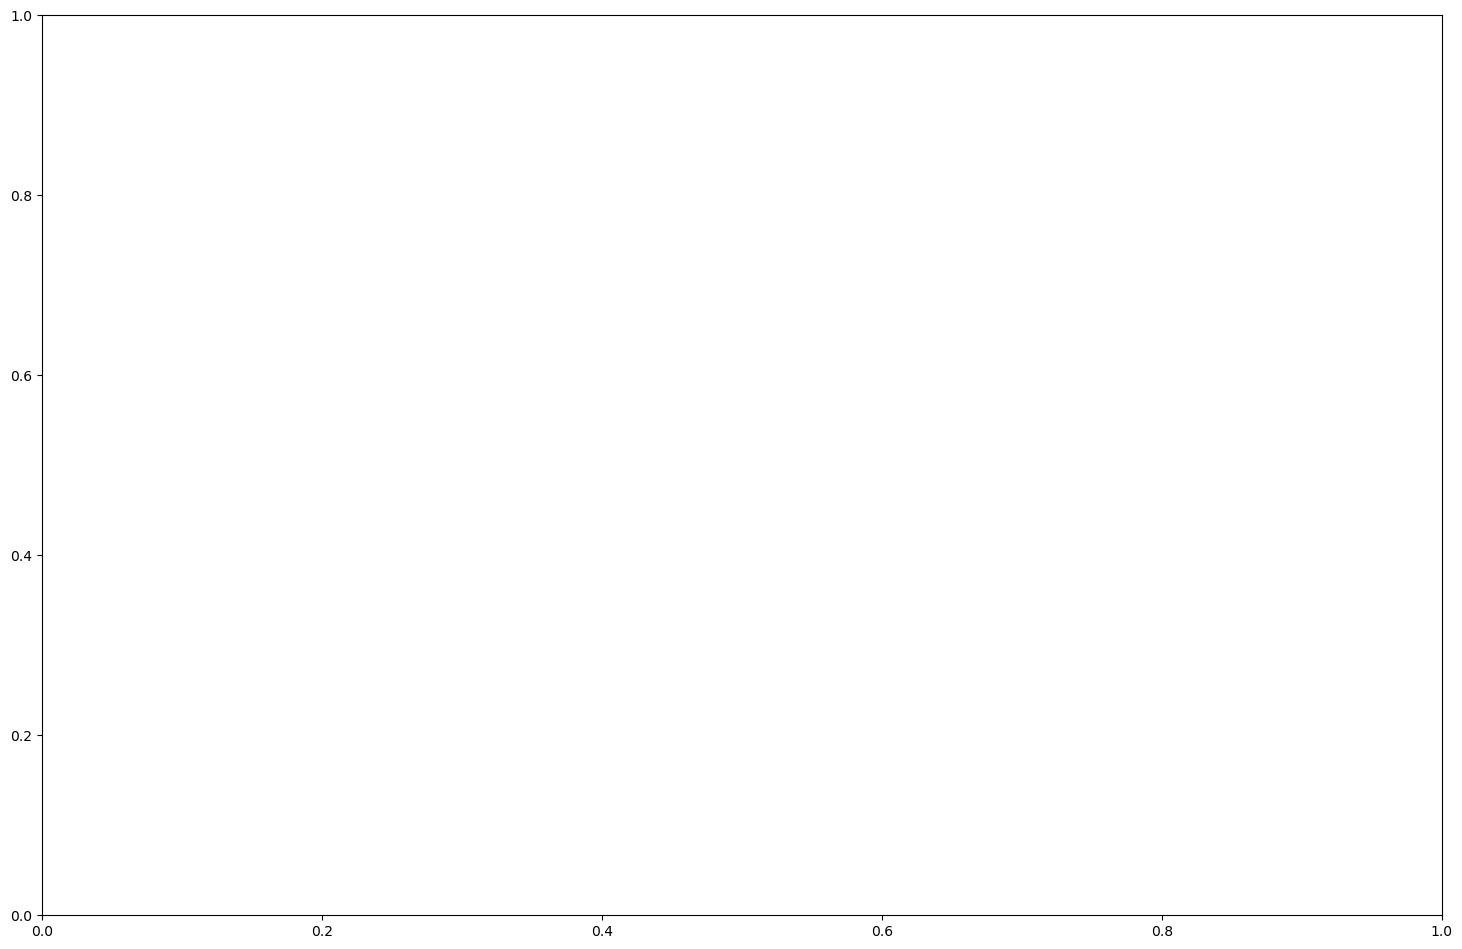

In [22]:
fig = plt.figure(figsize = (14, 9))
#colors = np.linspace(0, 1, len(graph.nodes))
layout = nx.spring_layout(graph, k=0.70, iterations=60)
graph.remove_nodes_from(list(nx.isolates(graph)))

nx.draw(graph, 
        node_size  = 30,
        #node_color = colors,
        pos = layout, 
        node_color = node_dict,
        edge_color = 'g')
fig.set_facecolor('k')